# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [2]:
import pandas as pd
from pysentimiento import create_analyzer #!pip install pysentimiento
from collections import Counter, defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

  Using cached pysentimiento-0.7.3-py3-none-any.whl.metadata (7.7 kB)
  Using cached datasets-3.4.1-py3-none-any.whl.metadata (19 kB)
  Using cached emoji-2.14.1-py3-none-any.whl.metadata (5.7 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached xxhash-3.5.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py311-none-any.whl.metadata (7.2 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.me

## Variables globales

In [28]:
DATASETS_NAME = {
    'IBEREVAL_MISOGYNY_2018_TRAIN':'ibereval_misogyny2018_es_train.csv',
    'IBEREVAL_MISOGYNY_2018_TEST':'ibereval_misogyny2018_es_test.csv',
}
DATASETS_DELIMITERS = {
    'IBEREVAL_MISOGYNY_2018':','
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### IBEREVAL MISOGYNY 2018

In [29]:
df_ibereval = pd.read_csv ( DATASETS_NAME['IBEREVAL_MISOGYNY_2018_TRAIN'],
        skiprows=1,
        header=None,
        names = ["_", "id", "text", "misogynous", "misogyny_category", "target"],
        delimiter=DATASETS_DELIMITERS['IBEREVAL_MISOGYNY_2018'])
df_ibereval = df_ibereval.drop('_', axis=1)

----------------------------

## Emotion Analysis


-----------------------------------------------

### Todos los tweets

-----------------------------------------------


In [30]:
df_ibereval.head()

,id,text,misogynous,misogyny_category,target
0,1,Módulo 01 Invitados Directivos del Sindicato '...,0,0,0
1,2,"@Causafiebres Claro, es que ha puesto imbécil ...",0,0,0
2,3,@Nanchinho A ver si haces algo que sirva para ...,1,discredit,active
3,4,@Rafhyta86 @ElDesmadre__ Habe pasame el video ...,1,discredit,passive
4,5,@Otb_35 Que te calles so guarra.,1,dominance,active


In [31]:
emotion_analyzer = create_analyzer("emotion", lang="es")

In [32]:
#Ejemplo de la documentacion
emotion_analyzer.predict("omg")

AnalyzerOutput(output=surprise, probas={surprise: 0.752, joy: 0.151, others: 0.049, fear: 0.021, sadness: 0.016, disgust: 0.007, anger: 0.004})

In [33]:
def analyze_emotion(text):
    result = emotion_analyzer.predict(text.lower())
    emotion = result.output
    probabilities = result.probas

    print("\n-----------------------")
    print(f"Texto analizado: {text}")
    print(f"Emoción detectada: {emotion}")
    print(f"Probabilidades: {probabilities}")

    return emotion, probabilities, text

In [34]:
text_data = df_ibereval['text'].tolist()
results = [analyze_emotion(text) for text in tqdm(text_data)]

  0%|          | 5/3307 [00:00<01:13, 45.02it/s]


-----------------------
Texto analizado: Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3
Emoción detectada: others
Probabilidades: {'others': 0.9815187454223633, 'joy': 0.0013672540662810206, 'sadness': 0.0013585332781076431, 'anger': 0.00588965741917491, 'surprise': 0.0041065881960093975, 'disgust': 0.002112339483574033, 'fear': 0.0036468347534537315}

-----------------------
Texto analizado: @Causafiebres Claro, es que ha puesto imbécil y muchas se han dado por aludidas, por eso ahora están con ella a acoso y derribo.
Emoción detectada: anger
Probabilidades: {'others': 0.3795000910758972, 'joy': 0.004119607154279947, 'sadness': 0.009710158221423626, 'anger': 0.5471256971359253, 'surprise': 0.004352930001914501, 'disgust': 0.052624769508838654, 'fear': 0.0025667534209787846}

-----------------------
Texto analizado: @Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbija

  1%|          | 17/3307 [00:00<01:04, 51.04it/s]


-----------------------
Texto analizado: -Mujer: Bésame una vez y te pertenecere para siempre? -Hombre: Ostia! Gracias por la advertencia!
Emoción detectada: others
Probabilidades: {'others': 0.7465941309928894, 'joy': 0.0768192857503891, 'sadness': 0.003851936198771, 'anger': 0.028901979327201843, 'surprise': 0.12466120719909668, 'disgust': 0.008944978937506676, 'fear': 0.010226398706436157}

-----------------------
Texto analizado: Miss perra: Valentinaaa amo mucho tu icon y header son re lindos,te mereces todo con tus ídolos y te mereces tanto abrazar a camila & ariana *al igual que todos tus ídolos*tu cuenta en general es perfecta y una de mis favoritas, eres una personita muy especial para mi+
Emoción detectada: joy
Probabilidades: {'others': 0.010186818428337574, 'joy': 0.9862472414970398, 'sadness': 0.0013600584352388978, 'anger': 0.0005703166825696826, 'surprise': 0.0006232858286239207, 'disgust': 0.0005548526532948017, 'fear': 0.00045745281386189163}

-----------------------


  1%|          | 30/3307 [00:00<00:58, 55.92it/s]


-----------------------
Texto analizado: @eduardoc60 @RuiDeAzevedo411 Rui si tu eres una perra enamorada
Emoción detectada: others
Probabilidades: {'others': 0.971402108669281, 'joy': 0.019642703235149384, 'sadness': 0.0010718087432906032, 'anger': 0.0016973346937447786, 'surprise': 0.004402766935527325, 'disgust': 0.0008510805782862008, 'fear': 0.0009322622790932655}

-----------------------
Texto analizado: @dsilvao Más que seguro que muchos nacieron producto de acoso y hasta violación 😒. Personalmente, nunca he tenido problemas para conquistar sin recurrir a la intimidación.
Emoción detectada: others
Probabilidades: {'others': 0.9751093983650208, 'joy': 0.002487287623807788, 'sadness': 0.014184773899614811, 'anger': 0.004394621588289738, 'surprise': 0.001120569184422493, 'disgust': 0.0017307797679677606, 'fear': 0.0009725005947984755}

-----------------------
Texto analizado: @BedMM @NayBetania Tú eres la culpable, perra >:v
Emoción detectada: anger
Probabilidades: {'others': 0.148

  1%|▏         | 43/3307 [00:00<00:55, 58.88it/s]


-----------------------
Texto analizado: Y yo atorado en el tráfico, claramente tu eres la perra de esta relación. https://t.co/2CaxQqwHqQ
Emoción detectada: others
Probabilidades: {'others': 0.9533678889274597, 'joy': 0.005906670354306698, 'sadness': 0.017200708389282227, 'anger': 0.002097769407555461, 'surprise': 0.017335496842861176, 'disgust': 0.001084163668565452, 'fear': 0.0030072322115302086}

-----------------------
Texto analizado: Nada más vulgar y de mala educación entrar a mi casa y gritarme sin saber de que me habla. TE MERECES EL INFIERNO PERRA.
Emoción detectada: anger
Probabilidades: {'others': 0.0027055307291448116, 'joy': 0.0010328679345548153, 'sadness': 0.0019577513448894024, 'anger': 0.8323725461959839, 'surprise': 0.0012898462591692805, 'disgust': 0.15894672274589539, 'fear': 0.0016947775147855282}

-----------------------
Texto analizado: @birarxs nono claro que no, callate q mientras tenga alcohol vos tragas perra
Emoción detectada: others
Probabilidades: {'oth

  2%|▏         | 55/3307 [00:00<00:56, 58.03it/s]


-----------------------
Texto analizado: @KilvettZ Cállate tú vende patria hijo de tu maldita perra madre q te trajo al mundo.. te hubieras ido con todo y placenta al infierno
Emoción detectada: anger
Probabilidades: {'others': 0.003453505225479603, 'joy': 0.0014201827580109239, 'sadness': 0.002847488969564438, 'anger': 0.880511999130249, 'surprise': 0.0008872173493728042, 'disgust': 0.10946781188249588, 'fear': 0.0014117942191660404}

-----------------------
Texto analizado: @pauli_lovagnini JAJAJAJAJAJAJA cállate perra 😂. Lo que debe ser ese video 🤢, we
Emoción detectada: others
Probabilidades: {'others': 0.6186683177947998, 'joy': 0.012519117444753647, 'sadness': 0.028280993923544884, 'anger': 0.1738692820072174, 'surprise': 0.02897983230650425, 'disgust': 0.1302921026945114, 'fear': 0.007390288636088371}

-----------------------
Texto analizado: @AgathaBribli Te lo mereces, por usar uñas de GUARRA
Emoción detectada: anger
Probabilidades: {'others': 0.3381114900112152, 'joy': 0.016

  2%|▏         | 68/3307 [00:01<00:54, 59.49it/s]


-----------------------
Texto analizado: @Alexaladyekt Q perra tan cojible eres puta yo ya m eh culeado a varias putas d elektra pero se nota q tu eres especial seria rico chiquitearte y darte a beber mis Miados y mis mocos
Emoción detectada: others
Probabilidades: {'others': 0.830612063407898, 'joy': 0.06520624458789825, 'sadness': 0.0238704364746809, 'anger': 0.03219754248857498, 'surprise': 0.01481995452195406, 'disgust': 0.024153010919690132, 'fear': 0.009140711277723312}

-----------------------
Texto analizado: @vanessagirona @KRLS @mossos Vienes a las mías..., 'políticos' no España, con Franco eso no pasaba teníais lo que queríais, todos por igual, el fanatismo por la independencia llegó después con atontaos a los que votamos, yo soy de c's por innovar no por o
Emoción detectada: anger
Probabilidades: {'others': 0.08234426379203796, 'joy': 0.014395144768059254, 'sadness': 0.016261186450719833, 'anger': 0.8317171931266785, 'surprise': 0.0008359432104043663, 'disgust': 0.05355774

  2%|▏         | 82/3307 [00:01<00:54, 58.70it/s]


-----------------------
Texto analizado: @Guru_socket @joaquinbarucco La mejor forma de dormirte es pegarte un cachetazo, en la cara dormido... (Pensala) 😠 🙆...
Emoción detectada: others
Probabilidades: {'others': 0.9783594012260437, 'joy': 0.0012543592602014542, 'sadness': 0.0033177172299474478, 'anger': 0.012897155247628689, 'surprise': 0.0013496949104592204, 'disgust': 0.002335658296942711, 'fear': 0.0004860787303186953}

-----------------------
Texto analizado: @beleeeennnn_ sos más perra vos que ella callate
Emoción detectada: anger
Probabilidades: {'others': 0.1583327203989029, 'joy': 0.006535234861075878, 'sadness': 0.009839131496846676, 'anger': 0.7358709573745728, 'surprise': 0.005827027373015881, 'disgust': 0.07887525111436844, 'fear': 0.004719732794910669}

-----------------------
Texto analizado: Cinder eres una hija de la grandísima puta y te mereces lo peor. Y te lo vas a llevar, zorra de mierda.
Emoción detectada: anger
Probabilidades: {'others': 0.0018343724077567458, 

  3%|▎         | 94/3307 [00:01<00:57, 56.21it/s]


-----------------------
Texto analizado: @Relatofeminista Hemos empezado de puta madre, si seguimos este paso llegaremos a las cuevas antes de que rajoy diga la próxima gilipollez
Emoción detectada: anger
Probabilidades: {'others': 0.07821527123451233, 'joy': 0.0029735788702964783, 'sadness': 0.006649203598499298, 'anger': 0.8224114775657654, 'surprise': 0.01502473559230566, 'disgust': 0.06482704728841782, 'fear': 0.009898671880364418}

-----------------------
Texto analizado: @m_wesner1 Te mereces todo lo que está bien, que lindo verte así perra 🙌🏽💖
Emoción detectada: joy
Probabilidades: {'others': 0.011034375056624413, 'joy': 0.9851639270782471, 'sadness': 0.0017404056852683425, 'anger': 0.00045736844185739756, 'surprise': 0.0006822540308348835, 'disgust': 0.0005389982834458351, 'fear': 0.0003826131287496537}

-----------------------
Texto analizado: Ains... ya no queda buen machismo como el de antes...
Emoción detectada: others
Probabilidades: {'others': 0.663461446762085, 'joy': 0

  3%|▎         | 106/3307 [00:01<00:59, 53.71it/s]


-----------------------
Texto analizado: A ver cielo, ¿sabe tu coño a la polla de mi marido?, porque si es así... también me lo comeré muy a menudo https://t.co/xrqIBf4VMq
Emoción detectada: others
Probabilidades: {'others': 0.9663019180297852, 'joy': 0.006951984018087387, 'sadness': 0.002897484926506877, 'anger': 0.011283764615654945, 'surprise': 0.0037641271483153105, 'disgust': 0.004649010021239519, 'fear': 0.004151694476604462}

-----------------------
Texto analizado: @anaisbernal Pásalo muy bien,te lo mereces 😘😘
Emoción detectada: joy
Probabilidades: {'others': 0.018988555297255516, 'joy': 0.9739171266555786, 'sadness': 0.002078827004879713, 'anger': 0.000773976556956768, 'surprise': 0.0013632222544401884, 'disgust': 0.0016194393392652273, 'fear': 0.0012589169200509787}

-----------------------
Texto analizado: @HuxGeneraI « hijo de perra. Por supuesto no lo haría, solo el muy bastardo se lo merecía por intentar siempre menospreciarle .... Si los golpes no funcionaban, habría de

  3%|▎         | 112/3307 [00:02<01:01, 52.00it/s]


-----------------------
Texto analizado: Que es una Mujer embarazada de dos nenas y un varon? Un kit de limpieza con instrucciones.
Emoción detectada: others
Probabilidades: {'others': 0.9785526990890503, 'joy': 0.002056034514680505, 'sadness': 0.0008832821622490883, 'anger': 0.0010738344863057137, 'surprise': 0.014444166794419289, 'disgust': 0.0009364988654851913, 'fear': 0.0020534947980195284}

-----------------------
Texto analizado: ¿Cuál es la peor desgracia para una mujer? Parir un varón, porque después de tener un cerebro dentro durante 9 meses, van y se lo sacan.
Emoción detectada: anger
Probabilidades: {'others': 0.004601324442774057, 'joy': 0.0008331838180311024, 'sadness': 0.03935142233967781, 'anger': 0.7367334365844727, 'surprise': 0.0021979487501084805, 'disgust': 0.21241603791713715, 'fear': 0.0038667188491672277}

-----------------------
Texto analizado: @anaisbernal La Mariló Montero es una hija de puta machista!
Emoción detectada: anger
Probabilidades: {'others': 0.0

  4%|▎         | 123/3307 [00:02<01:04, 49.00it/s]


-----------------------
Texto analizado: @Andrefcarmona @ValeeJurado Tu eres una perra
Emoción detectada: others
Probabilidades: {'others': 0.9434756636619568, 'joy': 0.006916693411767483, 'sadness': 0.00285693584010005, 'anger': 0.029657965525984764, 'surprise': 0.006342893932014704, 'disgust': 0.008313752710819244, 'fear': 0.0024360462557524443}

-----------------------
Texto analizado: @BeeluArzola callate puta mal parida perra re culia inconciente callada deberias estar maldita
Emoción detectada: anger
Probabilidades: {'others': 0.006406835746020079, 'joy': 0.001712430501356721, 'sadness': 0.00181202357634902, 'anger': 0.8964805603027344, 'surprise': 0.0014687031507492065, 'disgust': 0.09021197259426117, 'fear': 0.0019074496813118458}

-----------------------
Texto analizado: @erices16_ Cállate vos wacha trola deja de confundir las hormonas puta
Emoción detectada: anger
Probabilidades: {'others': 0.18823504447937012, 'joy': 0.008297514170408249, 'sadness': 0.0071549443528056145, '

  4%|▍         | 138/3307 [00:02<00:52, 60.09it/s]


-----------------------
Texto analizado: Tengo frío en mis piernitas.... ahhh pero quería venir en perra enseñando pierna no?
Emoción detectada: others
Probabilidades: {'others': 0.9098376035690308, 'joy': 0.02158263325691223, 'sadness': 0.015375372022390366, 'anger': 0.010672897100448608, 'surprise': 0.007307812105864286, 'disgust': 0.003870522603392601, 'fear': 0.03135327249765396}

-----------------------
Texto analizado: Todos estan negados a enseñarme a manejar hijos de puta ya los voy a atropellar tarde o temprano
Emoción detectada: anger
Probabilidades: {'others': 0.002519849222153425, 'joy': 0.0009005391038954258, 'sadness': 0.002750188810750842, 'anger': 0.899807333946228, 'surprise': 0.0007719379500485957, 'disgust': 0.09089887887239456, 'fear': 0.002351263305172324}

-----------------------
Texto analizado: Una violación cada 8 horas en españa Más de 1000 asesinatos machistas desde 2003 Todas hemos sufrido acoso callejero alguna vez Pero oye, son casos aislados y somos unas

  5%|▍         | 156/3307 [00:02<00:44, 70.74it/s]


-----------------------
Texto analizado: @angela15rubio Callate y sacate la puta eso
Emoción detectada: anger
Probabilidades: {'others': 0.015181547030806541, 'joy': 0.0014545258600264788, 'sadness': 0.0021254972089082003, 'anger': 0.9272646307945251, 'surprise': 0.0019125890685245395, 'disgust': 0.050152793526649475, 'fear': 0.0019084092928096652}

-----------------------
Texto analizado: Una mujer es tildada de zorra, buscafama etc y automáticamente está mintiendo, se le falta el respeto y se le cree al hombre. Cualquier semejanza con lo que consumimos todas las noches, es pura casualidad.
Emoción detectada: anger
Probabilidades: {'others': 0.3130306601524353, 'joy': 0.0016905228840187192, 'sadness': 0.01859346404671669, 'anger': 0.5526659488677979, 'surprise': 0.007587447762489319, 'disgust': 0.1023806482553482, 'fear': 0.004051349591463804}

-----------------------
Texto analizado: @nick17buero Opaa jajaja comemela entonces ajajaj
Emoción detectada: others
Probabilidades: {'others

  5%|▌         | 173/3307 [00:02<00:41, 75.33it/s]


-----------------------
Texto analizado: ¿Y si dejas de alimentar la cultura de la violación y el acoso mejor? Uno viste la hueá que se le antoje https://t.co/77QrEgbIzF
Emoción detectada: anger
Probabilidades: {'others': 0.24332575500011444, 'joy': 0.002852547215297818, 'sadness': 0.025542480871081352, 'anger': 0.6771847605705261, 'surprise': 0.002007771050557494, 'disgust': 0.04699484631419182, 'fear': 0.0020918671507388353}

-----------------------
Texto analizado: @Emol No apruebo hechos como la violación o el acoso sexual, pero el riesgo de este tipo de campañas es que se pasa de hacer conciencia frente a un hecho determinado a un fanatismo extremo, en la que pagan 'justos por pecadores'.
Emoción detectada: anger
Probabilidades: {'others': 0.010076748207211494, 'joy': 0.0004120264493394643, 'sadness': 0.013132723048329353, 'anger': 0.8654245734214783, 'surprise': 0.00107458361890167, 'disgust': 0.10571199655532837, 'fear': 0.004167316015809774}

-----------------------
Texto anal

  6%|▌         | 189/3307 [00:03<00:41, 75.43it/s]


-----------------------
Texto analizado: @ami_abud callate gorda babosa igual q tu perra
Emoción detectada: anger
Probabilidades: {'others': 0.025259071961045265, 'joy': 0.004086319822818041, 'sadness': 0.0028201157692819834, 'anger': 0.8248738050460815, 'surprise': 0.0021781527902930975, 'disgust': 0.1383199542760849, 'fear': 0.0024625828955322504}

-----------------------
Texto analizado: Porque ladra tanto mi perra? La puta madre cállate un poco
Emoción detectada: anger
Probabilidades: {'others': 0.0388275571167469, 'joy': 0.006898796185851097, 'sadness': 0.003105649957433343, 'anger': 0.8962742686271667, 'surprise': 0.011071763932704926, 'disgust': 0.034286655485630035, 'fear': 0.0095352903008461}

-----------------------
Texto analizado: @SrtoAdriGH abusaba de él, es una zorra merecía morir.
Emoción detectada: anger
Probabilidades: {'others': 0.0033527761697769165, 'joy': 0.0011436138302087784, 'sadness': 0.004032221622765064, 'anger': 0.7207071781158447, 'surprise': 0.0017985746

  6%|▋         | 207/3307 [00:03<00:38, 80.07it/s]


-----------------------
Texto analizado: @justlikecams callate camila y dame seguidores perra
Emoción detectada: anger
Probabilidades: {'others': 0.11029626429080963, 'joy': 0.003926483448594809, 'sadness': 0.004622170701622963, 'anger': 0.7879742383956909, 'surprise': 0.003561768913641572, 'disgust': 0.08565312623977661, 'fear': 0.003965897485613823}

-----------------------
Texto analizado: @EJCJ @MartinaSotoPose No creo que nadie confunda acoso con seducción ni violación con fantasia sexual.
Emoción detectada: others
Probabilidades: {'others': 0.9893885254859924, 'joy': 0.0004718627315014601, 'sadness': 0.002141914563253522, 'anger': 0.0030936456751078367, 'surprise': 0.002122089732438326, 'disgust': 0.0015687556006014347, 'fear': 0.0012132806004956365}

-----------------------
Texto analizado: Es la hora de la siesta. ¿Cómo se dice 'siesta' en femenino? Fregar los platos.
Emoción detectada: others
Probabilidades: {'others': 0.9856473207473755, 'joy': 0.01005746703594923, 'sadness'

  7%|▋         | 224/3307 [00:03<00:39, 77.55it/s]


-----------------------
Texto analizado: O Panamá es muy chico, o tu eres muy perra.
Emoción detectada: others
Probabilidades: {'others': 0.47691068053245544, 'joy': 0.0626835823059082, 'sadness': 0.1549385040998459, 'anger': 0.20068639516830444, 'surprise': 0.006109101232141256, 'disgust': 0.07572849094867706, 'fear': 0.02294325828552246}

-----------------------
Texto analizado: @Barbijaputa este pequeñajo lleva dos días pegado a mi por culpa de los putos petardos https://t.co/4jBvYLFG3O
Emoción detectada: anger
Probabilidades: {'others': 0.013959481380879879, 'joy': 0.003446926362812519, 'sadness': 0.006043172441422939, 'anger': 0.9201013445854187, 'surprise': 0.0033544600009918213, 'disgust': 0.04495658725500107, 'fear': 0.00813810620456934}

-----------------------
Texto analizado: ESTA MUJER ES UNA VERDADERA PERRA......SERA QUE SE EMBRIAGA CON LA SANGRE QUE DERRAMA EL PUEBLO HUMIDE ARGENTINO? https://t.co/InR3jvSOYm
Emoción detectada: others
Probabilidades: {'others': 0.87481391

  7%|▋         | 241/3307 [00:03<00:38, 79.28it/s]


-----------------------
Texto analizado: @el_pais Más d 17 denuncias por acoso sexual incluyendo Una violacion a su propia esposa y una relación promiscua con su hija Ivanka.Universidad y fundación Trump en NY cerrados por fraude y lavado d dinero,Siete bancarrotas,este delincuente tiene d todo 
Emoción detectada: anger
Probabilidades: {'others': 0.009782228618860245, 'joy': 0.0022146599367260933, 'sadness': 0.007412879262119532, 'anger': 0.5842405557632446, 'surprise': 0.013098017312586308, 'disgust': 0.3702959418296814, 'fear': 0.01295565813779831}

-----------------------
Texto analizado: @TNFamosos Uy pero que cochino el que acoso a la fea está. No se le cree nada a la imbécil está maju creo se llama. Un asco y mentirosa la mina
Emoción detectada: anger
Probabilidades: {'others': 0.0022137193009257317, 'joy': 0.0009367851889692247, 'sadness': 0.0021179979667067528, 'anger': 0.7446105480194092, 'surprise': 0.0019506925018504262, 'disgust': 0.24630749225616455, 'fear': 0.00186279066

  8%|▊         | 257/3307 [00:03<00:38, 78.59it/s]


-----------------------
Texto analizado: @salvameoficial @BelenEstebanM Tu eres una HDP,MALA GUARRA ODIABLE EL SER MAS VIL SINVERGÜENZA DESGRACIADA DROGADICTA DE MIERDA BelenEstebanM
Emoción detectada: anger
Probabilidades: {'others': 0.002536372747272253, 'joy': 0.0018875794485211372, 'sadness': 0.0022888490930199623, 'anger': 0.7112776041030884, 'surprise': 0.0014139724662527442, 'disgust': 0.27860939502716064, 'fear': 0.0019863226916640997}

-----------------------
Texto analizado: Lisa agradece que tenes un dueño con corazón porque te mereces que te ahorque perra hdp😡
Emoción detectada: anger
Probabilidades: {'others': 0.04395683482289314, 'joy': 0.004750566091388464, 'sadness': 0.0072024171240627766, 'anger': 0.8267703056335449, 'surprise': 0.0022465360816568136, 'disgust': 0.11297864466905594, 'fear': 0.0020946511067450047}

-----------------------
Texto analizado: @SoyDas117 @LuckasDroiidYT1 @BrandonGaming6 @LlinxaYT Y tu eres mi esposa ve a la cocina zorra >:v
Emoción detectad

  8%|▊         | 274/3307 [00:04<00:38, 78.33it/s]


-----------------------
Texto analizado: Esto me recordó a la señora que vi ayer en el super, enseñándole a la hija de unos 4 años a cantar 'que perra que perra, que perra mi amiga' https://t.co/nOksvasXHP
Emoción detectada: others
Probabilidades: {'others': 0.7977967858314514, 'joy': 0.11142516136169434, 'sadness': 0.015090611763298512, 'anger': 0.0031418693251907825, 'surprise': 0.06162078678607941, 'disgust': 0.0022222937550395727, 'fear': 0.008702538907527924}

-----------------------
Texto analizado: Tu puta madre, cállate ya. Fue epica. https://t.co/OGatK3lBaa
Emoción detectada: anger
Probabilidades: {'others': 0.05198542773723602, 'joy': 0.002113368595018983, 'sadness': 0.004663052037358284, 'anger': 0.901430070400238, 'surprise': 0.007131305988878012, 'disgust': 0.031337589025497437, 'fear': 0.0013391987886279821}

-----------------------
Texto analizado: Que guarra tienes que ser en el catre — Cuando quiero con quien quiero https://t.co/nBUSE7ejJb
Emoción detectada: others
Pr

  9%|▉         | 291/3307 [00:04<00:38, 77.80it/s]


-----------------------
Texto analizado: @kolderiu19 Pero decir que entras a un barrio y que te meten una polla en la garganta jajajaja
Emoción detectada: others
Probabilidades: {'others': 0.9182209968566895, 'joy': 0.023138435557484627, 'sadness': 0.0036564611364156008, 'anger': 0.027039101347327232, 'surprise': 0.019178571179509163, 'disgust': 0.007534791249781847, 'fear': 0.001231599599123001}

-----------------------
Texto analizado: @el_pais La educación y la cultura tiene mucho peso y sí acoso y violación son crímenes y cada país e individuo lo evalúan de formas diferentes... Y los casamientos de infantes, la pedofilia, la trata de personas, etc. Demasiados crímenes sin atender.
Emoción detectada: anger
Probabilidades: {'others': 0.0048282211646437645, 'joy': 0.00029600533889606595, 'sadness': 0.010934176854789257, 'anger': 0.8820236921310425, 'surprise': 0.000992701156064868, 'disgust': 0.09897324442863464, 'fear': 0.0019519509514793754}

-----------------------
Texto analizado

  9%|▉         | 308/3307 [00:04<00:38, 77.51it/s]


-----------------------
Texto analizado: me estresa que me hablen mientras escucho música CALLATE LA PUTA MADRE CALLATE NO ME HABLES MAS
Emoción detectada: anger
Probabilidades: {'others': 0.010882154107093811, 'joy': 0.0013776608975604177, 'sadness': 0.0014635893749073148, 'anger': 0.9558412432670593, 'surprise': 0.002398370997980237, 'disgust': 0.021789541468024254, 'fear': 0.006247461773455143}

-----------------------
Texto analizado: esas jotillas ridículas de biografías pedorras de #twitter y fotos enseñando la panochita de perra sucia deberían adjuntarle: jota, inventada y posona; pinches guangas.
Emoción detectada: anger
Probabilidades: {'others': 0.0031197720672935247, 'joy': 0.0006593267899006605, 'sadness': 0.0023671428207308054, 'anger': 0.9202762842178345, 'surprise': 0.0008888390148058534, 'disgust': 0.07127052545547485, 'fear': 0.001418147818185389}

-----------------------
Texto analizado: Le estoy enseñando a árabes decir “pinche puta” 😂😂😂😂 ¿En que momento me volví la

 10%|▉         | 325/3307 [00:04<00:37, 79.78it/s]


-----------------------
Texto analizado: @tamaraasavio jajajajajaj soy imbecil tremeno acoso a tu tuiti pobre ajajajjaa yo + <3
Emoción detectada: others
Probabilidades: {'others': 0.788181722164154, 'joy': 0.1696115881204605, 'sadness': 0.003979838453233242, 'anger': 0.006455943454056978, 'surprise': 0.025050530210137367, 'disgust': 0.004429380875080824, 'fear': 0.0022910265251994133}

-----------------------
Texto analizado: Otra puta vez enseñando prioridades.
Emoción detectada: anger
Probabilidades: {'others': 0.020373310893774033, 'joy': 0.0015755878994241357, 'sadness': 0.009751354344189167, 'anger': 0.9453510046005249, 'surprise': 0.003971376456320286, 'disgust': 0.01667374186217785, 'fear': 0.0023036033380776644}

-----------------------
Texto analizado: Antonio Caballero y como ser de mal gusto e ignorante a la vez. Claro que no es lo mismo acoso sexual y violación pero hay varias conductas que componen la violencia sexual.
Emoción detectada: anger
Probabilidades: {'others': 

 10%|█         | 342/3307 [00:05<00:37, 79.86it/s]


-----------------------
Texto analizado: como me caga que me digan te recomiendo una pelicula y me la empiecen a contar. si te pregunto adelante si no callate la puta boca!
Emoción detectada: anger
Probabilidades: {'others': 0.004992487374693155, 'joy': 0.0011545419692993164, 'sadness': 0.0016975103644654155, 'anger': 0.9685077667236328, 'surprise': 0.0012209918349981308, 'disgust': 0.020788580179214478, 'fear': 0.0016380808083340526}

-----------------------
Texto analizado: -Mamá, mamá, ¿por qué la novia va vestida de blanco? -Porque es el día más feliz de su vida. -¿Y por qué el novio va vestido de negro?
Emoción detectada: others
Probabilidades: {'others': 0.8368251323699951, 'joy': 0.13300658762454987, 'sadness': 0.00912008062005043, 'anger': 0.007380171213299036, 'surprise': 0.008587360382080078, 'disgust': 0.002360618906095624, 'fear': 0.0027200812473893166}

-----------------------
Texto analizado: La puta madre qe buena novia es esta piba Quiero una novia asi, esos regalos en

 11%|█         | 360/3307 [00:05<00:35, 83.13it/s]


-----------------------
Texto analizado: @Mzavalagc @RicardoAnayaC @lopezobrador_ Callate perra no tienes ningún derecho a ladrar, pudrete.
Emoción detectada: anger
Probabilidades: {'others': 0.01721647009253502, 'joy': 0.001822331571020186, 'sadness': 0.0020202510058879852, 'anger': 0.9071510434150696, 'surprise': 0.0012042929884046316, 'disgust': 0.06844408810138702, 'fear': 0.002141515491530299}

-----------------------
Texto analizado: @tinaletina Pero yo no quiero arriesgarme a que sea de ese 10% restante.
Emoción detectada: others
Probabilidades: {'others': 0.9662432670593262, 'joy': 0.0014818561030551791, 'sadness': 0.01871788501739502, 'anger': 0.0012535296846181154, 'surprise': 0.0038999561220407486, 'disgust': 0.0016550616128370166, 'fear': 0.0067485240288078785}

-----------------------
Texto analizado: Ahora resulta que la mujer es una bruja que lo trataba fatal y la otra es una guarra, feminismo marca Patiño and Cia.... #masqueamigus
Emoción detectada: anger
Probabilidade

 11%|█▏        | 378/3307 [00:05<00:35, 83.25it/s]


-----------------------
Texto analizado: Te quiero comer toda la polla — Pos eso hay que ganarselo primero almadepollo, soy el tipo de imbecil al que le pone que se lo pi... https://t.co/CKUjG9KmTV
Emoción detectada: anger
Probabilidades: {'others': 0.02610185369849205, 'joy': 0.004011860117316246, 'sadness': 0.0029474974144250154, 'anger': 0.8884274959564209, 'surprise': 0.0016359369037672877, 'disgust': 0.07554323971271515, 'fear': 0.0013321341248229146}

-----------------------
Texto analizado: Minimo denuncia por acoso sexual e intento de violacion telepatica https://t.co/ToVK3NlOtH
Emoción detectada: anger
Probabilidades: {'others': 0.418280690908432, 'joy': 0.0019711186178028584, 'sadness': 0.009509673342108727, 'anger': 0.4536358118057251, 'surprise': 0.025893637910485268, 'disgust': 0.06816791743040085, 'fear': 0.022541139274835587}

-----------------------
Texto analizado: Como me matas cuando te mueves así de lento, siento todo el recorrido y la presión de tu coño alrededor 

 12%|█▏        | 396/3307 [00:05<00:35, 82.58it/s]


-----------------------
Texto analizado: @camilaarbonaa8 Por acoso y violación a la intimidad
Emoción detectada: others
Probabilidades: {'others': 0.949913501739502, 'joy': 0.0014485256979241967, 'sadness': 0.0035157594829797745, 'anger': 0.02194822207093239, 'surprise': 0.007373621687293053, 'disgust': 0.008240780793130398, 'fear': 0.007559623569250107}

-----------------------
Texto analizado: @vikidonda Cállate Tilinga atorranta vergüenza da q x ser hija de puta,digo de montonera ocupes un cargo de diputada
Emoción detectada: anger
Probabilidades: {'others': 0.004503571894019842, 'joy': 0.001390255056321621, 'sadness': 0.003241531318053603, 'anger': 0.7347432971000671, 'surprise': 0.0018283834215253592, 'disgust': 0.251206636428833, 'fear': 0.0030863729771226645}

-----------------------
Texto analizado: @IrantzuVarela Hay dictadores que han hecho menos daño a la sociedad que tú, con tu pensamiento nazi. Coño ya! muy buen argumento
Emoción detectada: anger
Probabilidades: {'others'

 13%|█▎        | 414/3307 [00:05<00:34, 83.21it/s]


-----------------------
Texto analizado: Mi perra es lo más insoportable del mundo chabon. QUIERO DORMIR CALLATE
Emoción detectada: anger
Probabilidades: {'others': 0.05350188910961151, 'joy': 0.004310884978622198, 'sadness': 0.0037796124815940857, 'anger': 0.8786622881889343, 'surprise': 0.005180558655411005, 'disgust': 0.04962111636996269, 'fear': 0.004943615756928921}

-----------------------
Texto analizado: Al dueño borracho d este coche q m acabo d encontrar abandonado en una cuneta: mereces lo q t ha pasado hijo d puta. X suerte nadie se cruzó en tu camino. https://t.co/YlGaDuRUGw
Emoción detectada: anger
Probabilidades: {'others': 0.003182140178978443, 'joy': 0.002012285403907299, 'sadness': 0.006904168985784054, 'anger': 0.6909211277961731, 'surprise': 0.0011626604245975614, 'disgust': 0.29379868507385254, 'fear': 0.002018996747210622}

-----------------------
Texto analizado: -¿Que le compraste a tu mujer por San Valentín? -Un collar espectacular, y tu? -Nada, yo todavía la 

 13%|█▎        | 423/3307 [00:06<00:35, 81.85it/s]


-----------------------
Texto analizado: @pauliboggino @soyunaforra cállate perra de mierda culona
Emoción detectada: anger
Probabilidades: {'others': 0.011379148811101913, 'joy': 0.0021475523244589567, 'sadness': 0.0021570189855992794, 'anger': 0.9184710383415222, 'surprise': 0.0011861873790621758, 'disgust': 0.06295488029718399, 'fear': 0.0017040892271324992}

-----------------------
Texto analizado: Hacelo Reverendo hijo de puta! No mereces ser radical ni por herencia. https://t.co/KSV54XnXyY
Emoción detectada: anger
Probabilidades: {'others': 0.0019305750029161572, 'joy': 0.0011926994193345308, 'sadness': 0.0017190421931445599, 'anger': 0.8292312622070312, 'surprise': 0.0012516367714852095, 'disgust': 0.16326837241649628, 'fear': 0.001406440045684576}

-----------------------
Texto analizado: @infobae CALLATE HIJA DE PUTA !!!!! LADRONA Q QUERES LA PLATA DE LOS JUBILADOS PARA TUS OBRAS PARA USAR EN TU PROXIMA CAMPAÑA Y LA DE MUGRICIO
Emoción detectada: anger
Probabilidades: {'other

 13%|█▎        | 441/3307 [00:06<00:35, 80.61it/s]


-----------------------
Texto analizado: @LeticiaDolera Es la que interpreto a la hija de Arnold. Por aquel entonces tenia 14 años.
Emoción detectada: others
Probabilidades: {'others': 0.989654004573822, 'joy': 0.0032335123978555202, 'sadness': 0.0012556080473586917, 'anger': 0.0003870242217089981, 'surprise': 0.0038836065214127302, 'disgust': 0.0005015053902752697, 'fear': 0.0010846651857718825}

-----------------------
Texto analizado: a puta clase niña — Callate https://t.co/rS8rSnvmgp
Emoción detectada: anger
Probabilidades: {'others': 0.12211906909942627, 'joy': 0.005695446394383907, 'sadness': 0.0016709017800167203, 'anger': 0.8244983553886414, 'surprise': 0.006922575645148754, 'disgust': 0.035323616117239, 'fear': 0.003769974922761321}

-----------------------
Texto analizado: #RAWCL puta la wea, Cesaro merecia terminar el año campeon
Emoción detectada: others
Probabilidades: {'others': 0.9405320286750793, 'joy': 0.006672927178442478, 'sadness': 0.022427648305892944, 'anger': 0

 14%|█▍        | 459/3307 [00:06<00:35, 80.00it/s]


-----------------------
Texto analizado: @MasculinismoEsp A ti! Movimiento SEMEN!!
Emoción detectada: joy
Probabilidades: {'others': 0.0047983513213694096, 'joy': 0.99013352394104, 'sadness': 0.00024236012541223317, 'anger': 0.00035571944317780435, 'surprise': 0.0033209656830877066, 'disgust': 0.0005285441875457764, 'fear': 0.0006205578683875501}

-----------------------
Texto analizado: Hoy quiero denunciaaaaaaar A LA GENTE PUTO GUARRA QUE HUELE A SUDOR Y CHORIZO Y SE SUBE AL BUS DEJANDO A TOL MUNDO KO. Shame on you 🤬
Emoción detectada: anger
Probabilidades: {'others': 0.0021218066103756428, 'joy': 0.0016314670210704207, 'sadness': 0.0008820165530778468, 'anger': 0.8970857858657837, 'surprise': 0.001275822869502008, 'disgust': 0.09539229422807693, 'fear': 0.0016107400879263878}

-----------------------
Texto analizado: Eso y más mereces por perra
Emoción detectada: anger
Probabilidades: {'others': 0.1655001938343048, 'joy': 0.03587917611002922, 'sadness': 0.016664452850818634, 'anger

 14%|█▍        | 476/3307 [00:06<00:35, 79.29it/s]


-----------------------
Texto analizado: Y tú eres perra, ladrame JAJAJAJAJAJAJAJAJAAJJAJAJA
Emoción detectada: others
Probabilidades: {'others': 0.6536644697189331, 'joy': 0.05818142741918564, 'sadness': 0.006700619123876095, 'anger': 0.21778637170791626, 'surprise': 0.02542802318930626, 'disgust': 0.028868572786450386, 'fear': 0.009370501153171062}

-----------------------
Texto analizado: Para él tu eres la perra y según tú fue un caballero
Emoción detectada: others
Probabilidades: {'others': 0.9751335978507996, 'joy': 0.013931119814515114, 'sadness': 0.004228368401527405, 'anger': 0.0022340589202940464, 'surprise': 0.0027426390442997217, 'disgust': 0.0009612292633391917, 'fear': 0.0007689948542974889}

-----------------------
Texto analizado: @McctaraStefy Callate que nos amas perra en celos
Emoción detectada: others
Probabilidades: {'others': 0.5112788677215576, 'joy': 0.01447664201259613, 'sadness': 0.013554025441408157, 'anger': 0.4038514196872711, 'surprise': 0.004266573116183

 15%|█▍        | 494/3307 [00:06<00:35, 80.08it/s]


-----------------------
Texto analizado: @Soy_Elena_Sin_H @LeticiaDolera No tienes puta idea, está claro.
Emoción detectada: others
Probabilidades: {'others': 0.8288994431495667, 'joy': 0.002517516491934657, 'sadness': 0.006058706436306238, 'anger': 0.1459512710571289, 'surprise': 0.0022323208395391703, 'disgust': 0.012778714299201965, 'fear': 0.0015620975755155087}

-----------------------
Texto analizado: @CerGamer_ @DewcesUhc Bueno tú eres su perra, no yo.
Emoción detectada: others
Probabilidades: {'others': 0.9888781905174255, 'joy': 0.005292966496199369, 'sadness': 0.0020456097554415464, 'anger': 0.0018838273826986551, 'surprise': 0.0009166706004180014, 'disgust': 0.0005851886235177517, 'fear': 0.0003975504369009286}

-----------------------
Texto analizado: Porque las mujeres pierden la regla a los 50? Porque necesitan la sangre para las varices.
Emoción detectada: others
Probabilidades: {'others': 0.880011260509491, 'joy': 0.011171279475092888, 'sadness': 0.03620658814907074, '

 15%|█▌        | 512/3307 [00:07<00:35, 79.34it/s]


-----------------------
Texto analizado: Funcionaria denuncia acoso y violación en el Poder Judicial: 'Me violaron una docena de veces' - #AM1080 https://t.co/5N4L5I7KZH https://t.co/9ey5lGEz1r
Emoción detectada: others
Probabilidades: {'others': 0.8313445448875427, 'joy': 0.002766692079603672, 'sadness': 0.006506695877760649, 'anger': 0.08496266603469849, 'surprise': 0.019575193524360657, 'disgust': 0.03252013400197029, 'fear': 0.022324051707983017}

-----------------------
Texto analizado: Ni perra , ni puta, ni zorra nada de esa mierda LA MUJER ES MUJER Y SE RESPETA ASI TENGA MIL NOVIOS Y SE DIVIERTA CON ELLOS COMO SE LE DE LA HPTA GANA :) (Y)
Emoción detectada: anger
Probabilidades: {'others': 0.040646836161613464, 'joy': 0.005802743602544069, 'sadness': 0.0106807304546237, 'anger': 0.8808640837669373, 'surprise': 0.002341215731576085, 'disgust': 0.05812200903892517, 'fear': 0.0015423514414578676}

-----------------------
Texto analizado: me acuerdo cuando le dije en anon callate 

 16%|█▌        | 530/3307 [00:07<00:34, 80.73it/s]


-----------------------
Texto analizado: O sea que aquí normalizas la violación y el acoso y aún así te crees el puto amo? Lo peor de todo es saber que tienes miles de seguidores que te aplauden
Emoción detectada: anger
Probabilidades: {'others': 0.0038540128152817488, 'joy': 0.0010381643660366535, 'sadness': 0.0027718355413526297, 'anger': 0.8694716095924377, 'surprise': 0.0031564270611852407, 'disgust': 0.11828610301017761, 'fear': 0.0014219182776287198}

-----------------------
Texto analizado: Citar un tuit no es acoso Decirle a alguien lo imbécil que es cuando dice una tontería tampoco Hacerle una cuenta parodia para reirse de ella todos lo días pues un poco si la verdad
Emoción detectada: anger
Probabilidades: {'others': 0.011427813209593296, 'joy': 0.0011400979710742831, 'sadness': 0.0027847541496157646, 'anger': 0.9047074913978577, 'surprise': 0.0018223667284473777, 'disgust': 0.0768813043832779, 'fear': 0.0012362223351374269}

-----------------------
Texto analizado: @azofemi

 17%|█▋        | 548/3307 [00:07<00:34, 79.47it/s]


-----------------------
Texto analizado: @LTLucasT Parece que ya se te pego lo imbecil de la algunas unidades de twitter.
Emoción detectada: anger
Probabilidades: {'others': 0.16557691991329193, 'joy': 0.001115629798732698, 'sadness': 0.01146196573972702, 'anger': 0.6948617100715637, 'surprise': 0.006158103235065937, 'disgust': 0.11541809886693954, 'fear': 0.0054075997322797775}

-----------------------
Texto analizado: Si a mi se me ocurre enseñar por twitter una conversación de whatsap con mi madre me manda a dormir a la caseta de mi perra.
Emoción detectada: others
Probabilidades: {'others': 0.9171357750892639, 'joy': 0.0207175612449646, 'sadness': 0.005931398365646601, 'anger': 0.02791275456547737, 'surprise': 0.01301273237913847, 'disgust': 0.01078404113650322, 'fear': 0.004505758173763752}

-----------------------
Texto analizado: @feminiciD10S @jimenaofficial Callate hijo de tu puta madre una mas con jimena y te parto tu madre
Emoción detectada: anger
Probabilidades: {'others':

 17%|█▋        | 565/3307 [00:07<00:33, 80.95it/s]


-----------------------
Texto analizado: toda la razón,tatita. Las mujeres son minoría (sucias perras) y el acoso es irrelevante (sucias feminazis) 🙄🤦 https://t.co/p73b0gasou
Emoción detectada: anger
Probabilidades: {'others': 0.0900544598698616, 'joy': 0.0031629290897399187, 'sadness': 0.009451735764741898, 'anger': 0.7977291941642761, 'surprise': 0.0012673598248511553, 'disgust': 0.09695857018232346, 'fear': 0.0013758438872173429}

-----------------------
Texto analizado: @quieromamarpene @calenton_madrid @Pito_maricon_ Vas a sentir como sé mueve mí polla en tú culo de putita para qué veas que tú amo no sé olvida nunca de darte tú ración de leche en ese maravilloso culo peludo de putita
Emoción detectada: others
Probabilidades: {'others': 0.6781079769134521, 'joy': 0.29172495007514954, 'sadness': 0.005122787784785032, 'anger': 0.012059852480888367, 'surprise': 0.005265301559120417, 'disgust': 0.0046327426098287106, 'fear': 0.0030864060390740633}

-----------------------
Texto analiz

 17%|█▋        | 574/3307 [00:07<00:33, 80.43it/s]


-----------------------
Texto analizado: Siempre hay una amiga del novio que por más inocente que sea para uno de novia es la perra hijueputa, que stress prro.
Emoción detectada: others
Probabilidades: {'others': 0.422463059425354, 'joy': 0.004974713549017906, 'sadness': 0.06803625077009201, 'anger': 0.32273316383361816, 'surprise': 0.07441171258687973, 'disgust': 0.04674481227993965, 'fear': 0.06063630431890488}

-----------------------
Texto analizado: @zvonimirsoldo @FOXSports_Chile No quería empezar el año puteando pero vo te mereces unas chuchas tonto sapo y la ctm rata perra culia :)
Emoción detectada: anger
Probabilidades: {'others': 0.020584017038345337, 'joy': 0.003259776160120964, 'sadness': 0.0027509399224072695, 'anger': 0.8920184969902039, 'surprise': 0.0010686620371416211, 'disgust': 0.07890833914279938, 'fear': 0.0014097390230745077}

-----------------------
Texto analizado: STRANGER THINGS MERECÍA GANAR HIJOS DE MIL PUTA ME CHUPAN LA PIJA TODOS #GoldenGlobes2018
Emoció

 18%|█▊        | 592/3307 [00:08<00:33, 80.85it/s]


-----------------------
Texto analizado: Por qué las mujeres tienen el agujero del culo y el del coño tan juntos?Para poder agarrarlas como un pack de cerveza.
Emoción detectada: others
Probabilidades: {'others': 0.4725792109966278, 'joy': 0.010060330852866173, 'sadness': 0.042053576558828354, 'anger': 0.340011328458786, 'surprise': 0.03967633098363876, 'disgust': 0.0639801174402237, 'fear': 0.031639087945222855}

-----------------------
Texto analizado: Jejeje 'Puta Madre .... No me lo saques' jejeje tú eres lo máximo Kendall https://t.co/8cDbJPVYJq
Emoción detectada: joy
Probabilidades: {'others': 0.12655659019947052, 'joy': 0.8399603366851807, 'sadness': 0.0007746526971459389, 'anger': 0.0019258031388744712, 'surprise': 0.02860245294868946, 'disgust': 0.0010590271558612585, 'fear': 0.001121181296184659}

-----------------------
Texto analizado: Merecido después de dos semanas enseñando la ruta más perra en busca la historia de fedex 😌😌😌 https://t.co/b1rwNUrA4o
Emoción detectada: jo

 18%|█▊        | 610/3307 [00:08<00:32, 81.84it/s]


-----------------------
Texto analizado: @martii_belen10 hija de puta cállate te vas a un crucero deja de quejarte
Emoción detectada: anger
Probabilidades: {'others': 0.04019925370812416, 'joy': 0.0037566537503153086, 'sadness': 0.0031815089751034975, 'anger': 0.9071478247642517, 'surprise': 0.003677388885989785, 'disgust': 0.03950204700231552, 'fear': 0.002535363892093301}

-----------------------
Texto analizado: 'Me pegó un puñetazo en la cara y acabé en el suel', así ha contado Esther, profesora, el acoso que sufrió. Escúchalo con @ExpositoCOPE https://t.co/JtEQ0FpwjN
Emoción detectada: others
Probabilidades: {'others': 0.5952617526054382, 'joy': 0.014255712740123272, 'sadness': 0.023264653980731964, 'anger': 0.19541044533252716, 'surprise': 0.03683001175522804, 'disgust': 0.10771195590496063, 'fear': 0.027265481650829315}

-----------------------
Texto analizado: @alyzaid_duarte Callate perra la amaneciiii
Emoción detectada: others
Probabilidades: {'others': 0.8100765943527222, '

 19%|█▉        | 628/3307 [00:08<00:33, 79.01it/s]


-----------------------
Texto analizado: @CFKArgentina Cállate ladrona hija de puta... Caraduras
Emoción detectada: anger
Probabilidades: {'others': 0.0023057491052895784, 'joy': 0.0015175013104453683, 'sadness': 0.0014843097887933254, 'anger': 0.8491711020469666, 'surprise': 0.0011974802473559976, 'disgust': 0.14246265590190887, 'fear': 0.0018612550338730216}

-----------------------
Texto analizado: @IaraPicatto1 Callate que yo tmb te extraño perra
Emoción detectada: others
Probabilidades: {'others': 0.5216367840766907, 'joy': 0.04241549223661423, 'sadness': 0.0361715666949749, 'anger': 0.3455753028392792, 'surprise': 0.006809485610574484, 'disgust': 0.038941096514463425, 'fear': 0.008450274355709553}

-----------------------
Texto analizado: #HaceMuchoQue no te callas
Emoción detectada: others
Probabilidades: {'others': 0.9364509582519531, 'joy': 0.004123582039028406, 'sadness': 0.004699018783867359, 'anger': 0.03383368253707886, 'surprise': 0.008083708584308624, 'disgust': 0.01051

 20%|█▉        | 645/3307 [00:08<00:33, 80.14it/s]


-----------------------
Texto analizado: @nikolas79jf Imbécil nivel escoria de alcantarilla
Emoción detectada: anger
Probabilidades: {'others': 0.0028794414829462767, 'joy': 0.001663881354033947, 'sadness': 0.002164745470508933, 'anger': 0.7154037356376648, 'surprise': 0.0020242328755557537, 'disgust': 0.2735931873321533, 'fear': 0.002270753961056471}

-----------------------
Texto analizado: Yo veo a mujeres destruidas por acoso laboral y callejero. Otras con depresión debido a violación sexual o maltrato físico. Y conocí a varias que se suicidaron por este tipo de comportamientos machistas. Vas a seguir con tu show pobre? https://t.co/JE6MEgvIh4
Emoción detectada: anger
Probabilidades: {'others': 0.003707361640408635, 'joy': 0.0013715422246605158, 'sadness': 0.25193238258361816, 'anger': 0.5244600772857666, 'surprise': 0.0010419610189273953, 'disgust': 0.21439404785633087, 'fear': 0.003092625644057989}

-----------------------
Texto analizado: Qué bueno que vives lejos por qué tengo

 20%|██        | 662/3307 [00:09<00:33, 79.62it/s]


-----------------------
Texto analizado: Que te vv mi puta vida, cállate, alejate ptm
Emoción detectada: anger
Probabilidades: {'others': 0.03151123225688934, 'joy': 0.0055969711393117905, 'sadness': 0.008765675127506256, 'anger': 0.910389244556427, 'surprise': 0.0032101324759423733, 'disgust': 0.0354895181953907, 'fear': 0.005037122871726751}

-----------------------
Texto analizado: @xIvan_lhdp -Azoto tu cara- Comemela
Emoción detectada: others
Probabilidades: {'others': 0.9095454812049866, 'joy': 0.02377072535455227, 'sadness': 0.0036491642240434885, 'anger': 0.03946882113814354, 'surprise': 0.01120026595890522, 'disgust': 0.0081850066781044, 'fear': 0.004180578514933586}

-----------------------
Texto analizado: @jxshstalker Mi polla en tu culo es lo que hay Pero no porque no soy activa
Emoción detectada: others
Probabilidades: {'others': 0.9845229387283325, 'joy': 0.009174334816634655, 'sadness': 0.0013407014776021242, 'anger': 0.001979510299861431, 'surprise': 0.0011184137547388

 21%|██        | 679/3307 [00:09<00:33, 79.36it/s]


-----------------------
Texto analizado: Vendida, @IndiraHuilca, tienes cara para demostrar tu hipocresía, mejor cállate, perra. https://t.co/mLwCXla1nn
Emoción detectada: anger
Probabilidades: {'others': 0.0033114326652139425, 'joy': 0.0011579019483178854, 'sadness': 0.002677083248272538, 'anger': 0.8869155049324036, 'surprise': 0.0010632261401042342, 'disgust': 0.10354716330766678, 'fear': 0.0013276430545374751}

-----------------------
Texto analizado: RT SEMEN!! Una ayuda para expandir un movimiento necesario @ElMachistaQamas
Emoción detectada: joy
Probabilidades: {'others': 0.4638424813747406, 'joy': 0.5184612274169922, 'sadness': 0.0010439255274832249, 'anger': 0.002020749729126692, 'surprise': 0.01002509519457817, 'disgust': 0.0017257747240364552, 'fear': 0.0028807506896555424}

-----------------------
Texto analizado: @juanbrujox @darias171 @TSJ_Legitimo @CybernetVzla @jcsosazpurua Dr. En que materia lo enseñaron ese vocabulario de perra de burdel?
Emoción detectada: others
Pr

 21%|██        | 697/3307 [00:09<00:32, 81.24it/s]


-----------------------
Texto analizado: A mi amigo le dijo PUTA pero él no deja de enseñar el pito en Twitter! 🙄
Emoción detectada: others
Probabilidades: {'others': 0.8389376401901245, 'joy': 0.014201825484633446, 'sadness': 0.005476605147123337, 'anger': 0.11323628574609756, 'surprise': 0.008732802234590054, 'disgust': 0.017767781391739845, 'fear': 0.0016470392001792789}

-----------------------
Texto analizado: @huerguita5 @EnLuchaMujeres @Relatofeminista Vaya pelis te montas, mírate la puta cabeza primero y preocúpate de los demás después. Abusar y explotar no entran dentro de hacer lo q quiera y ser libre. Ale! A fregar!
Emoción detectada: anger
Probabilidades: {'others': 0.005722430068999529, 'joy': 0.0038382727652788162, 'sadness': 0.0026044745463877916, 'anger': 0.9276400208473206, 'surprise': 0.001028341823257506, 'disgust': 0.05838858336210251, 'fear': 0.0007777819409966469}

-----------------------
Texto analizado: @WilfredoNc @diegobuenavent1 @dcabellor @alejabolivarian @

 22%|██▏       | 715/3307 [00:09<00:32, 79.24it/s]


-----------------------
Texto analizado: @JakyMemes Si tu eres tan perra que te comes hasta la tela https://t.co/jOLpF8BNo6
Emoción detectada: others
Probabilidades: {'others': 0.9485018253326416, 'joy': 0.004424797836691141, 'sadness': 0.0020490754395723343, 'anger': 0.01927206851541996, 'surprise': 0.017810683697462082, 'disgust': 0.004403491038829088, 'fear': 0.0035380665212869644}

-----------------------
Texto analizado: @3LigasEn10Anos @alvaroojeda80 Tu eres el alemán tonto que usa el traductor porque no tiene ni puta idea de hablar español y que dice gilipolleces en Youtube? Viva España que es y será siempre tu país🇪🇸🇪🇸🇪🇸!!
Emoción detectada: anger
Probabilidades: {'others': 0.05606697499752045, 'joy': 0.06710748374462128, 'sadness': 0.00465642474591732, 'anger': 0.8121797442436218, 'surprise': 0.002212716033682227, 'disgust': 0.0567590594291687, 'fear': 0.0010175789939239621}

-----------------------
Texto analizado: Perra, tú eres un ángel que por la manzana peca
Emoción dete

 22%|██▏       | 732/3307 [00:09<00:32, 79.99it/s]


-----------------------
Texto analizado: No te mereces que te responda pero aún así, lo voy a hacer. No me conoces en absoluto para decir que soy una zorra. Que uses eso como insulto, ya dice mucho de ti. Estoy segura de que un tío como tú, que va diciendo “zorra” a una tía sin razón, también tiene tías a patadas. https://t.co/wLuQpKxWkx
Emoción detectada: anger
Probabilidades: {'others': 0.010351295582950115, 'joy': 0.001211601309478283, 'sadness': 0.0037917199078947306, 'anger': 0.8650403022766113, 'surprise': 0.0008139641722664237, 'disgust': 0.11776752024888992, 'fear': 0.0010235612280666828}

-----------------------
Texto analizado: @ronuevo @FCBarcelona_es Bobo hijo de perra, usted cree que va a enseñarle a Messi o llega a aprender del más grande?
Emoción detectada: anger
Probabilidades: {'others': 0.01692507229745388, 'joy': 0.0027940028812736273, 'sadness': 0.008200488053262234, 'anger': 0.8605598211288452, 'surprise': 0.004767287522554398, 'disgust': 0.10468872636556625, 'fea

 23%|██▎       | 749/3307 [00:10<00:32, 79.65it/s]


-----------------------
Texto analizado: Pasear a la perra en tacones es #glamour y el resto son tonterías
Emoción detectada: others
Probabilidades: {'others': 0.5239425301551819, 'joy': 0.45827317237854004, 'sadness': 0.0023134860675781965, 'anger': 0.009414395317435265, 'surprise': 0.0030276423785835505, 'disgust': 0.0023677931167185307, 'fear': 0.0006609766278415918}

-----------------------
Texto analizado: @LeticiaDolera @ofdachurch Si no fuera porque no tiene ni puta gracia, me reiría
Emoción detectada: others
Probabilidades: {'others': 0.8450156450271606, 'joy': 0.07658912986516953, 'sadness': 0.012044486589729786, 'anger': 0.04282131791114807, 'surprise': 0.004810556769371033, 'disgust': 0.016175687313079834, 'fear': 0.002543139271438122}

-----------------------
Texto analizado: una chica dijo que no le gustaron los chistes sobre acoso y violación en el video de Rubén y esto le contestaban algunos de sus fans https://t.co/F2SKl21D4B
Emoción detectada: others
Probabilidades: {

 23%|██▎       | 766/3307 [00:10<00:31, 81.67it/s]


-----------------------
Texto analizado: @caaamicastilloo Callate vos qué no me hablaste más puta
Emoción detectada: anger
Probabilidades: {'others': 0.07991896569728851, 'joy': 0.00714739877730608, 'sadness': 0.005530534312129021, 'anger': 0.8541192412376404, 'surprise': 0.0035951100289821625, 'disgust': 0.04749402031302452, 'fear': 0.002194739645346999}

-----------------------
Texto analizado: @nyaruko__chan Acoso , violacion , me da bastante igual , yo no voy a entrar en el trapo de querer o no la pena de muerte pero ser MACHISTA por no quererla es un poco equisde no?
Emoción detectada: anger
Probabilidades: {'others': 0.00856659933924675, 'joy': 0.0014683844055980444, 'sadness': 0.005455543752759695, 'anger': 0.8473190069198608, 'surprise': 0.0018541126046329737, 'disgust': 0.13335192203521729, 'fear': 0.0019844791386276484}

-----------------------
Texto analizado: @bebesymas Pelotuda deberiar juzgarte x abandononde persona. Hija de puta no mereces tener hijos. Ojala sigas siend

 24%|██▎       | 784/3307 [00:10<00:31, 81.00it/s]


-----------------------
Texto analizado: @EsDeNegritos un RT para difundir SEMEN! Movimiento machista internacional. Únete como activista!!
Emoción detectada: others
Probabilidades: {'others': 0.8362053632736206, 'joy': 0.14116941392421722, 'sadness': 0.0024154509883373976, 'anger': 0.010266343131661415, 'surprise': 0.004803796298801899, 'disgust': 0.0032104356214404106, 'fear': 0.0019291328499093652}

-----------------------
Texto analizado: @LaRetuerka @mivecinayyo @MonederoJC Tú eres un hijo de perra!!!
Emoción detectada: anger
Probabilidades: {'others': 0.0037900139577686787, 'joy': 0.001819309894926846, 'sadness': 0.0014220307348296046, 'anger': 0.8827329874038696, 'surprise': 0.0018216692842543125, 'disgust': 0.10696308314800262, 'fear': 0.0014508793829008937}

-----------------------
Texto analizado: ¿Cuántas veces se ríe una mujer con un chiste? Tres veces: cuando se lo cuentan, cuando se lo explican y cuando lo entiende.
Emoción detectada: others
Probabilidades: {'others': 0.

 24%|██▍       | 793/3307 [00:10<00:32, 78.56it/s]


-----------------------
Texto analizado: @PaolaruizR02 @mery_1502 Lo mereces pero quedando con nosotras perra mala
Emoción detectada: anger
Probabilidades: {'others': 0.3002428114414215, 'joy': 0.011973164975643158, 'sadness': 0.01606161519885063, 'anger': 0.5985305309295654, 'surprise': 0.0038977274671196938, 'disgust': 0.06687382608652115, 'fear': 0.0024203050415962934}

-----------------------
Texto analizado: @parejamadrid31 Uuiifffff me encanta cómo me gustaría follarte bien tu coño y culo
Emoción detectada: others
Probabilidades: {'others': 0.5238277912139893, 'joy': 0.30365899205207825, 'sadness': 0.00888742133975029, 'anger': 0.009370632469654083, 'surprise': 0.10080736130475998, 'disgust': 0.01929500699043274, 'fear': 0.03415274620056152}

-----------------------
Texto analizado: @marbellalga ESA PERRA NO LO MERECÍA 😭😭😭
Emoción detectada: sadness
Probabilidades: {'others': 0.009239550679922104, 'joy': 0.000968699692748487, 'sadness': 0.9827593564987183, 'anger': 0.00396088277

 25%|██▍       | 811/3307 [00:10<00:31, 80.31it/s]


-----------------------
Texto analizado: @generoenaccion @Barbijaputa A mi anterior perra guía la teniamos que atar para que no se escapara del panico que le daba. Charley al menos lo lleva mejor.
Emoción detectada: others
Probabilidades: {'others': 0.9411566257476807, 'joy': 0.019346436485648155, 'sadness': 0.02244483307003975, 'anger': 0.00295749818906188, 'surprise': 0.003700442612171173, 'disgust': 0.0029496930073946714, 'fear': 0.007444535847753286}

-----------------------
Texto analizado: Las acusaciones sobre acoso sexual y violación contra el magnate de Hollywood Harvey Weinstein abrieron la caja de pandora https://t.co/CFxuNqcCdE
Emoción detectada: others
Probabilidades: {'others': 0.9061810970306396, 'joy': 0.0021732181776314974, 'sadness': 0.004086241126060486, 'anger': 0.0041502988897264, 'surprise': 0.04661351069808006, 'disgust': 0.007328405976295471, 'fear': 0.029467260465025902}

-----------------------
Texto analizado: @SirMagusMedivh // *Se queda callada como una pe

 25%|██▌       | 829/3307 [00:11<00:31, 78.94it/s]


-----------------------
Texto analizado: CACHO GUARRA QUE TE CALLES YA Y ME DEJES ESTUDIAR https://t.co/YKoWtvaRwB
Emoción detectada: anger
Probabilidades: {'others': 0.018159741535782814, 'joy': 0.001813162351027131, 'sadness': 0.0010892454301938415, 'anger': 0.9368447065353394, 'surprise': 0.002099171979352832, 'disgust': 0.038052406162023544, 'fear': 0.0019414935959503055}

-----------------------
Texto analizado: Hoy @ArandinaCF clama contra el #abusosexual tras el caso de los ex jugadores del club. #sucesos #Arandina https://t.co/yyg9ASxWlQ
Emoción detectada: others
Probabilidades: {'others': 0.9831762313842773, 'joy': 0.0006706747808493674, 'sadness': 0.003978137858211994, 'anger': 0.0034407235216349363, 'surprise': 0.003358470741659403, 'disgust': 0.0015527167124673724, 'fear': 0.003823075443506241}

-----------------------
Texto analizado: #Aranda se manifiesta contra los #abusos #sexuales en los prolegómenos del #partido entre el #Arandina y el #Numancia B https://t.co/lExhKT

 26%|██▌       | 846/3307 [00:11<00:30, 81.04it/s]


-----------------------
Texto analizado: @lortegadiaz Perra maldita tú eres la primera en la@hoguera por crímenes de lesa humanidad perra maldita
Emoción detectada: anger
Probabilidades: {'others': 0.004849911667406559, 'joy': 0.0015145709039643407, 'sadness': 0.0020097389351576567, 'anger': 0.8673916459083557, 'surprise': 0.0013759952271357179, 'disgust': 0.12088173627853394, 'fear': 0.0019763396121561527}

-----------------------
Texto analizado: @Placedalia1 Tu eres mas de Estar guarra
Emoción detectada: others
Probabilidades: {'others': 0.9805321097373962, 'joy': 0.0066878399811685085, 'sadness': 0.0021018809638917446, 'anger': 0.005642868112772703, 'surprise': 0.002153438748791814, 'disgust': 0.0016681328415870667, 'fear': 0.0012137863086536527}

-----------------------
Texto analizado: -¿cual es el vehículo de una mujer? -la aspiradora.
Emoción detectada: others
Probabilidades: {'others': 0.9827526807785034, 'joy': 0.00748600484803319, 'sadness': 0.0010197783121839166, 'anger': 

 26%|██▌       | 864/3307 [00:11<00:29, 82.75it/s]


-----------------------
Texto analizado: @s0ymia JAJAJA YA CÁLLATE PERRA DRAMÁTICA DAS PENA Y RISA
Emoción detectada: others
Probabilidades: {'others': 0.40970930457115173, 'joy': 0.025912506505846977, 'sadness': 0.033094536513090134, 'anger': 0.3981327414512634, 'surprise': 0.006620029453188181, 'disgust': 0.1177552342414856, 'fear': 0.008775696158409119}

-----------------------
Texto analizado: @_AgustinPereyra Me spoileaste, no mereces vivir la puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.00654329638928175, 'joy': 0.0011695441789925098, 'sadness': 0.003978578373789787, 'anger': 0.9018076062202454, 'surprise': 0.0016697798855602741, 'disgust': 0.08331075310707092, 'fear': 0.001520468620583415}

-----------------------
Texto analizado: Pinche Astrid perra hasta en mis sueños eres tonta No te lo mereces 🙄
Emoción detectada: anger
Probabilidades: {'others': 0.099055714905262, 'joy': 0.005389085039496422, 'sadness': 0.009109658189117908, 'anger': 0.8261234760284424,

 27%|██▋       | 882/3307 [00:11<00:29, 81.81it/s]


-----------------------
Texto analizado: Me preguntaron por qué mi perro tiene collar rosado y mi perra uno verde. 'No será al revés?'. No amis porfa callate.
Emoción detectada: anger
Probabilidades: {'others': 0.4324600100517273, 'joy': 0.006491121370345354, 'sadness': 0.01023774966597557, 'anger': 0.49126136302948, 'surprise': 0.009223139844834805, 'disgust': 0.04042104259133339, 'fear': 0.009905649349093437}

-----------------------
Texto analizado: COMO PUTA MADRE ME EMPERRAN ESAS PUTAS DE INSTAGRAM QUE CON 1,000 FOLLOWERS Y POR ENSEÑAR EL CULO SE AUTOPROCLAMAN FIGURAS PÚBLICAS, PINCHES PERRAS SIN AMOR LAS ODIO PUTAS PENDEJAS
Emoción detectada: anger
Probabilidades: {'others': 0.0023452220484614372, 'joy': 0.0007129572331905365, 'sadness': 0.002063311170786619, 'anger': 0.9313639402389526, 'surprise': 0.001349118072539568, 'disgust': 0.06016018986701965, 'fear': 0.0020052918698638678}

-----------------------
Texto analizado: @logela También he visto usar “escarceos amorosos” para

 27%|██▋       | 900/3307 [00:11<00:29, 81.45it/s]


-----------------------
Texto analizado: @joeldavid26 On tu eres muy perra
Emoción detectada: others
Probabilidades: {'others': 0.9818277955055237, 'joy': 0.004735100083053112, 'sadness': 0.0012488348875194788, 'anger': 0.002504932228475809, 'surprise': 0.007032542955130339, 'disgust': 0.0010463943472132087, 'fear': 0.0016043817158788443}

-----------------------
Texto analizado: @CorpoRosaBlanca @paulitagarciag @BluRadioCo Alias el paisa, te mereces es una carcel debajo de la tierra. Hijo de perra, chanda.
Emoción detectada: anger
Probabilidades: {'others': 0.004406479187309742, 'joy': 0.001470178016461432, 'sadness': 0.002634969539940357, 'anger': 0.7422477006912231, 'surprise': 0.002021034248173237, 'disgust': 0.24437662959098816, 'fear': 0.0028429918456822634}

-----------------------
Texto analizado: Basura escoria energúmeno mierda podrido estúpido capullo imbécil soplapollas
Emoción detectada: anger
Probabilidades: {'others': 0.0031126183457672596, 'joy': 0.002470339648425579, 

 28%|██▊       | 917/3307 [00:12<00:30, 78.40it/s]


-----------------------
Texto analizado: @SergioRamos Hundido ? Tu como los gorrinos, te mezclas con la mierda,bueno tu eres la mierda, hijo de puta. Das asco como persona eres escoria. Sólo eres basura
Emoción detectada: anger
Probabilidades: {'others': 0.0025546103715896606, 'joy': 0.0017495827050879598, 'sadness': 0.0044523910619318485, 'anger': 0.6486338973045349, 'surprise': 0.0011397647904232144, 'disgust': 0.33974578976631165, 'fear': 0.0017239125445485115}

-----------------------
Texto analizado: @JonatanViale @Intratablestv Cállate lacra hijo de puta. Mercenario, forro indigno
Emoción detectada: anger
Probabilidades: {'others': 0.0030319399666041136, 'joy': 0.0013583592372015119, 'sadness': 0.0015297872014343739, 'anger': 0.8548518419265747, 'surprise': 0.001068258541636169, 'disgust': 0.1368005871772766, 'fear': 0.0013592488830909133}

-----------------------
Texto analizado: @Valeria_Martell @NopaIep Si, estoy de acuerdo. A ningún hombre le pasaría por la cabeza que una mu

 28%|██▊       | 925/3307 [00:12<00:32, 72.56it/s]


-----------------------
Texto analizado: #HaceMuchoQue no tienes derechos #Honey...
Emoción detectada: others
Probabilidades: {'others': 0.996436357498169, 'joy': 0.0007212057244032621, 'sadness': 0.0008221500902436674, 'anger': 0.0007388808880932629, 'surprise': 0.0006621620850637555, 'disgust': 0.00027825249708257616, 'fear': 0.0003411591751500964}

-----------------------
Texto analizado: Esta noche se sale de fiesta. Si alguno pretende ligar con alguna mujer ya sabéis el dicho: Sábado sabadete, un polvete y al garete.
Emoción detectada: others
Probabilidades: {'others': 0.9645213484764099, 'joy': 0.02547321282327175, 'sadness': 0.004117137286812067, 'anger': 0.0016515410970896482, 'surprise': 0.0026909909211099148, 'disgust': 0.001051281113177538, 'fear': 0.0004944998072460294}

-----------------------
Texto analizado: Le cuento a Magali algo que me hizo llorar y la estúpida me dice 'se lo merecía, por zorra le pasa' Aveces la odio tanto jajaj
Emoción detectada: anger
Probabilidad

 28%|██▊       | 940/3307 [00:12<00:37, 63.43it/s]


-----------------------
Texto analizado: Chaval equipos que piensan con la parte imbécil de la polla chaval
Emoción detectada: anger
Probabilidades: {'others': 0.01828206516802311, 'joy': 0.0015928581124171615, 'sadness': 0.002925112145021558, 'anger': 0.9397380352020264, 'surprise': 0.0012570341350510716, 'disgust': 0.0346933975815773, 'fear': 0.001511434675194323}

-----------------------
Texto analizado: SEMEN. Difundamos un movimiento necesario. http://t.co/P6hfGRZ0Tm
Emoción detectada: others
Probabilidades: {'others': 0.9747310876846313, 'joy': 0.009080027230083942, 'sadness': 0.007368476130068302, 'anger': 0.0026053355541080236, 'surprise': 0.002766411518678069, 'disgust': 0.0009256941848434508, 'fear': 0.0025229633320122957}

-----------------------
Texto analizado: @kleopatreus Tú eres bien perra 😂😂💪🏽
Emoción detectada: others
Probabilidades: {'others': 0.8933964967727661, 'joy': 0.09688016772270203, 'sadness': 0.0014324883231893182, 'anger': 0.003999168053269386, 'surprise':

 29%|██▊       | 947/3307 [00:12<00:38, 60.63it/s]


-----------------------
Texto analizado: -Veis chicas? Nunca hay que tener piedad con estas putas. Hay que educarlas en todo momento y enseñarles para lo que sirven: para nuestra diversión. Le voy a reventar su culo de puta mientras te lo come, y por su bien, espero que se esfuerce o no podrá se
Emoción detectada: anger
Probabilidades: {'others': 0.35649555921554565, 'joy': 0.027354039251804352, 'sadness': 0.01512964814901352, 'anger': 0.5551879405975342, 'surprise': 0.0028119913768023252, 'disgust': 0.040727660059928894, 'fear': 0.002293161815032363}

-----------------------
Texto analizado: En Akinato esta Jenna , esta la mama de Ty , esta Ty pero no esta supadre ven comemela
Emoción detectada: others
Probabilidades: {'others': 0.975077211856842, 'joy': 0.013231071643531322, 'sadness': 0.0038351172115653753, 'anger': 0.002448882209137082, 'surprise': 0.0020075824577361345, 'disgust': 0.0017684702761471272, 'fear': 0.0016316813416779041}

-----------------------
Texto analizado: @ppk

 29%|██▉       | 961/3307 [00:12<00:37, 62.38it/s]


-----------------------
Texto analizado: @GustavoBruzone No digas tonterías. HAY QUE DEFENDER A LOS JUBILADOS DE EDTOS REPRESORES PROVOCSDORES SINIESTROS HIJOS DR PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.0023653910029679537, 'joy': 0.0007356519345194101, 'sadness': 0.001433848519809544, 'anger': 0.9149004817008972, 'surprise': 0.0006023290916346014, 'disgust': 0.07900675386190414, 'fear': 0.0009556196164339781}

-----------------------
Texto analizado: @acciomalfxy JAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJAJA LA PUTA MADRE TE LO MERECES POR USARME COMO MEME SIEMPRE
Emoción detectada: others
Probabilidades: {'others': 0.8411163091659546, 'joy': 0.10294988006353378, 'sadness': 0.004677304998040199, 'anger': 0.02680899016559124, 'surprise': 0.016081245616078377, 'disgust': 0.006556961219757795, 'fear': 0.0018092767568305135}

-----------------------
Texto analizado: Y tú eres una perra como dice Joss Stone https://t.co/cDRan4DaSa
Emoción detectada: others
Prob

 29%|██▉       | 975/3307 [00:13<00:36, 63.28it/s]


-----------------------
Texto analizado: @KelvexM @JessiiJG @zDeprooz_ @JenniferELM1 tú eres mi oveja puta
Emoción detectada: others
Probabilidades: {'others': 0.978721022605896, 'joy': 0.013802696950733662, 'sadness': 0.0006367116584442556, 'anger': 0.0028158763889223337, 'surprise': 0.0023327821400016546, 'disgust': 0.0007879032636992633, 'fear': 0.0009030280052684247}

-----------------------
Texto analizado: @jamp____16 Eso ya se sabe amiga y también el que dice que una mujer es una puta Eso segnfica que el es narigón y puto asco Pero yo respeto a todas las mujeres
Emoción detectada: anger
Probabilidades: {'others': 0.04072226583957672, 'joy': 0.002786782803013921, 'sadness': 0.00742280064150691, 'anger': 0.7258462309837341, 'surprise': 0.0014806337421759963, 'disgust': 0.22002871334552765, 'fear': 0.0017124800942838192}

-----------------------
Texto analizado: @DVDFRRP @niluspc @sextaNoticias Imbécil dice!! Luego vais de educados y pacíficos y sois auténtica escoria....basura
Em

 30%|██▉       | 989/3307 [00:13<00:36, 63.10it/s]


-----------------------
Texto analizado: @psicohongo Eres escoria, vergüenza me daria ser tu o tener que ver algo con una persona tan imbecil como tu, fuese o no un idol no quita que fuese una persona y merece tu respeto igual que  cualquier otra asique haznos a todos un favor y borra el tweet o
Emoción detectada: anger
Probabilidades: {'others': 0.002784821903333068, 'joy': 0.0007697343244217336, 'sadness': 0.003598310286179185, 'anger': 0.7905446290969849, 'surprise': 0.0009130182443186641, 'disgust': 0.19992287456989288, 'fear': 0.001466692890971899}

-----------------------
Texto analizado: @vntiat Maldita la puta que la parió, que es esta asquerosidad perra sucia. Debería sacarse la mierda que tiene en la cabeza hija de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.00223030848428607, 'joy': 0.0013577989302575588, 'sadness': 0.001389796263538301, 'anger': 0.8134703040122986, 'surprise': 0.0021957685239613056, 'disgust': 0.17702224850654602, 'fear': 0.0023337218444794

 30%|███       | 1003/3307 [00:13<00:36, 63.53it/s]


-----------------------
Texto analizado: ¿Cuándo viajará la mujer a la Luna? Cuando se tenga que limpiar.
Emoción detectada: others
Probabilidades: {'others': 0.9804661870002747, 'joy': 0.0016347455093637109, 'sadness': 0.00742173008620739, 'anger': 0.00154008436948061, 'surprise': 0.0072123706340789795, 'disgust': 0.0005549709894694388, 'fear': 0.0011699332389980555}

-----------------------
Texto analizado: @ChicoMaravillx Y tú eres bien puta, me ofreces el culo.
Emoción detectada: others
Probabilidades: {'others': 0.6875030398368835, 'joy': 0.012708541937172413, 'sadness': 0.014980978332459927, 'anger': 0.22966326773166656, 'surprise': 0.008229679428040981, 'disgust': 0.04043484851717949, 'fear': 0.006479619536548853}

-----------------------
Texto analizado: @eljueves Los ultras son escoria, cierto, pero no todos llevan tirantes con la bandera d españa, s os ve el plumero demasiado
Emoción detectada: anger
Probabilidades: {'others': 0.004067232366651297, 'joy': 0.00141124450601637

 31%|███       | 1017/3307 [00:13<00:37, 61.39it/s]


-----------------------
Texto analizado: Ayer me estaba muriendo de una perra infección en la garganta y hoy me la peló, ya estoy mejor. 😎
Emoción detectada: others
Probabilidades: {'others': 0.7892448306083679, 'joy': 0.09993527084589005, 'sadness': 0.058976300060749054, 'anger': 0.024903416633605957, 'surprise': 0.00842146947979927, 'disgust': 0.008266132324934006, 'fear': 0.010252568870782852}

-----------------------
Texto analizado: @exitosape Que tal hija de puta está perra, para ir de acusete con un superior e infringiendo la ley.
Emoción detectada: anger
Probabilidades: {'others': 0.0024015845265239477, 'joy': 0.0008241444593295455, 'sadness': 0.0014461150858551264, 'anger': 0.8640074729919434, 'surprise': 0.0029183884616941214, 'disgust': 0.1259656548500061, 'fear': 0.002436684677377343}

-----------------------
Texto analizado: Deja de estar chingando, estúpida. Tú eres la zorra que se acuesta con quien sea aunque le den diez centavos. https://t.co/yCe73qIbmE
Emoción detecta

 31%|███       | 1024/3307 [00:14<00:41, 55.58it/s]


-----------------------
Texto analizado: Ahí esta mi hermosa perra enseñando el culo a todos https://t.co/xMPojsEqMi
Emoción detectada: joy
Probabilidades: {'others': 0.4237388074398041, 'joy': 0.561462938785553, 'sadness': 0.0053183287382125854, 'anger': 0.0031753466464579105, 'surprise': 0.002837700303643942, 'disgust': 0.002101804595440626, 'fear': 0.0013650290202349424}

-----------------------
Texto analizado: @SrLunatik ¿A que me suda la polla tu opinión? Eres imbécil y hay que decírtelo.
Emoción detectada: anger
Probabilidades: {'others': 0.0051284004002809525, 'joy': 0.0016405022470280528, 'sadness': 0.00180681177880615, 'anger': 0.9252464175224304, 'surprise': 0.0007435432053171098, 'disgust': 0.06438175588846207, 'fear': 0.0010525735560804605}

-----------------------
Texto analizado: me saqué un 9 en el final de biología para vos hija de puta q no me quisiste promocionar por unas centésimas EN TU CARA Y EN TU CANCHA
Emoción detectada: anger
Probabilidades: {'others': 0.0600

 31%|███▏      | 1036/3307 [00:14<00:42, 53.26it/s]


-----------------------
Texto analizado: @Hugo_Gutierrez_ Te mereces que te agarremos a patas en la zorra, gargajos y combos en el hocico viejo culiao, ojalá no te cruces en mi camino
Emoción detectada: anger
Probabilidades: {'others': 0.0192936472594738, 'joy': 0.0015390922781080008, 'sadness': 0.0027229052502661943, 'anger': 0.8470807075500488, 'surprise': 0.001847409293986857, 'disgust': 0.1244649738073349, 'fear': 0.0030512050725519657}

-----------------------
Texto analizado: Zaira Navas: Este año se realizó una reforma a la legislación sobre acoso sexual y violación en contra de la niñez y adolescencia. @CONNA_ES https://t.co/SoAFDcO9YY
Emoción detectada: others
Probabilidades: {'others': 0.9952747821807861, 'joy': 0.0007830405374988914, 'sadness': 0.0009534833952784538, 'anger': 0.000754259992390871, 'surprise': 0.0012761616380885243, 'disgust': 0.00035287131322547793, 'fear': 0.0006054198602214456}

-----------------------
Texto analizado: @mlagvaz callate guarra
Emoción dete

 32%|███▏      | 1048/3307 [00:14<00:43, 51.75it/s]


-----------------------
Texto analizado: @gliclazida @dotfanny @el_pais Pero el escenario que describe no es de acoso. Es de violación y asesinos
Emoción detectada: anger
Probabilidades: {'others': 0.13510079681873322, 'joy': 0.0010965934488922358, 'sadness': 0.016634512692689896, 'anger': 0.6830281615257263, 'surprise': 0.0036081410944461823, 'disgust': 0.1511676162481308, 'fear': 0.00936426967382431}

-----------------------
Texto analizado: @timethyheller Kyc el ocico Si es ridiculo pero te lo mereces pinche zorra >:D
Emoción detectada: anger
Probabilidades: {'others': 0.19554626941680908, 'joy': 0.01395048201084137, 'sadness': 0.008145674131810665, 'anger': 0.6968042254447937, 'surprise': 0.004808897618204355, 'disgust': 0.07816480845212936, 'fear': 0.0025796748232096434}

-----------------------
Texto analizado: @EternoBlanco_ Cállate perra por un partido no hay vergüenza para alguien que lleva 5 titulos
Emoción detectada: anger
Probabilidades: {'others': 0.015162779949605465, 'j

 32%|███▏      | 1060/3307 [00:14<00:43, 51.07it/s]


-----------------------
Texto analizado: Iusport: << El israelí Gilady seguirá en el COI pese a las acusaciones de acoso y violación https://t.co/bW9ogxSuz3 >> https://t.co/pDTlcX2V77
Emoción detectada: others
Probabilidades: {'others': 0.9906931519508362, 'joy': 0.0008147486369125545, 'sadness': 0.0011794378515332937, 'anger': 0.0011895331554114819, 'surprise': 0.003687493968755007, 'disgust': 0.0008953598444350064, 'fear': 0.0015402534045279026}

-----------------------
Texto analizado: Que mierda tienen en la cabeza cuando creen que una violacion o situacion de acoso que les estan contando ES MENTIRA????? O sea,son joda gente
Emoción detectada: anger
Probabilidades: {'others': 0.0016566059784963727, 'joy': 0.0004594548954628408, 'sadness': 0.0057702744379639626, 'anger': 0.8768365979194641, 'surprise': 0.006023315247148275, 'disgust': 0.10447575896978378, 'fear': 0.004777918569743633}

-----------------------
Texto analizado: @Pantolomeo Si no tuviéramos probabilidades de ser vícti

 32%|███▏      | 1066/3307 [00:14<00:45, 48.79it/s]


-----------------------
Texto analizado: Decirle la verdad en la cara a un idiota y que esa verdad le duela tanto que llegue al punto de pegarte un puño es de las cosas más satisfactorias que hice esta semana. #SorryNotSorry.
Emoción detectada: anger
Probabilidades: {'others': 0.23399770259857178, 'joy': 0.03954619541764259, 'sadness': 0.1624821573495865, 'anger': 0.4933697581291199, 'surprise': 0.005540686659514904, 'disgust': 0.06305139511823654, 'fear': 0.0020121748093515635}

-----------------------
Texto analizado: Operadores de Pick Me App denuncian acoso y violación a derechos https://t.co/WSI7sj114h https://t.co/KpwNSyO9np
Emoción detectada: others
Probabilidades: {'others': 0.923977792263031, 'joy': 0.0007258622208610177, 'sadness': 0.0026639618445187807, 'anger': 0.049338579177856445, 'surprise': 0.007270358502864838, 'disgust': 0.009929018095135689, 'fear': 0.006094508804380894}

-----------------------
Texto analizado: la familia de mi novia es lo mejor qué hay la puta mad

 33%|███▎      | 1082/3307 [00:15<00:36, 61.01it/s]


-----------------------
Texto analizado: @FabSopee la perra y pega cuernos del grupo @JeonYumii la callada pero peligrosa @NakamotoNanii le vale verga y rompe corazones https://t.co/KcNU6wPoVu
Emoción detectada: others
Probabilidades: {'others': 0.9256349205970764, 'joy': 0.013669980689883232, 'sadness': 0.00394529290497303, 'anger': 0.03610013425350189, 'surprise': 0.003727206028997898, 'disgust': 0.014199024066329002, 'fear': 0.0027234540320932865}

-----------------------
Texto analizado: El ser humano es una vida inteligente, salvo la excepción que tiene la regla.
Emoción detectada: others
Probabilidades: {'others': 0.9903448224067688, 'joy': 0.005332669708877802, 'sadness': 0.0023866647388786077, 'anger': 0.0005678299930877984, 'surprise': 0.0007375669083558023, 'disgust': 0.00035315414424985647, 'fear': 0.00027736974880099297}

-----------------------
Texto analizado: Y si es así como creo que es tu eres la mas falsa en toda la puta historia de las falsas mi madre si no ...
Emoc

 33%|███▎      | 1099/3307 [00:15<00:31, 70.31it/s]


-----------------------
Texto analizado: tú callate mamaguebo que eres rolo e' puta
Emoción detectada: anger
Probabilidades: {'others': 0.07654314488172531, 'joy': 0.006154004950076342, 'sadness': 0.004547586664557457, 'anger': 0.842013955116272, 'surprise': 0.004763332661241293, 'disgust': 0.06197163462638855, 'fear': 0.004006385803222656}

-----------------------
Texto analizado: @ReSidentG1RL @BlendFreshon Cállate perra
Emoción detectada: anger
Probabilidades: {'others': 0.03841814398765564, 'joy': 0.0024799769744277, 'sadness': 0.0028005398344248533, 'anger': 0.9051352739334106, 'surprise': 0.0025423956103622913, 'disgust': 0.04654955491423607, 'fear': 0.0020741357002407312}

-----------------------
Texto analizado: @gabrielboric @patricionavia Puta que te CAGARON 'Y yo creo que tú eres un burgués que se cree revolucionario. Pero a la hora de los qui’hubo, terminas votando por la NM. Ojalá algún día te toque ganarte el sueldo, se siente bien.' 😂🤣 Boric al igual que
Emoción detecta

 34%|███▎      | 1116/3307 [00:15<00:28, 75.90it/s]


-----------------------
Texto analizado: @tresaaad Te lo mereces perra asquerosa
Emoción detectada: anger
Probabilidades: {'others': 0.015195525251328945, 'joy': 0.0032981669064611197, 'sadness': 0.0032164419535547495, 'anger': 0.7612562775611877, 'surprise': 0.002228539902716875, 'disgust': 0.21267859637737274, 'fear': 0.002126474631950259}

-----------------------
Texto analizado: @MrDashGD Que se te pegue mi polla en tu culo avers
Emoción detectada: others
Probabilidades: {'others': 0.9364984631538391, 'joy': 0.026935910806059837, 'sadness': 0.0015233877347782254, 'anger': 0.02157260663807392, 'surprise': 0.005475188605487347, 'disgust': 0.005482935346662998, 'fear': 0.002511495491489768}

-----------------------
Texto analizado: No voy a llorar y decir que no merezco esto porque es probable que lo merezcaPOR ZORRA
Emoción detectada: sadness
Probabilidades: {'others': 0.09921243786811829, 'joy': 0.028565263375639915, 'sadness': 0.6759371161460876, 'anger': 0.13035066425800323, 'sur

 34%|███▍      | 1134/3307 [00:15<00:27, 78.62it/s]


-----------------------
Texto analizado: Tengo una memoria de puta madre para tonterías tipo acordarme de los libros mangas etc de cualquier mierda que pase. Pero después siempre me olvidó de las cosas que no son esas en 5 minutos
Emoción detectada: anger
Probabilidades: {'others': 0.4200964570045471, 'joy': 0.0494530163705349, 'sadness': 0.016370650380849838, 'anger': 0.45909422636032104, 'surprise': 0.015634587034583092, 'disgust': 0.03041691891849041, 'fear': 0.008934170939028263}

-----------------------
Texto analizado: Que sea un 2018 en el que de una puta vez traigamos la copa, por Argentina, por vos Lionel que te lo mereces más que nadie
Emoción detectada: joy
Probabilidades: {'others': 0.12073951959609985, 'joy': 0.8440073728561401, 'sadness': 0.008961298502981663, 'anger': 0.018840577453374863, 'surprise': 0.0017573963850736618, 'disgust': 0.0040939426980912685, 'fear': 0.0015999001916497946}

-----------------------
Texto analizado: @ te sigo amando pero no lo mereces, perr

 35%|███▍      | 1151/3307 [00:15<00:27, 77.78it/s]


-----------------------
Texto analizado: @Eliaek @SempreLamateixa @gabrielrufian @psoedeandalucia Y tú eres alcaldesa pues vete a la puta 💩 y mira que no me gusta Susana pero menos me gustais la banda de desgraciaos independentistas iros a la 💩
Emoción detectada: anger
Probabilidades: {'others': 0.0021553505212068558, 'joy': 0.0020341183990240097, 'sadness': 0.0021024001762270927, 'anger': 0.814643144607544, 'surprise': 0.0006923138862475753, 'disgust': 0.17701348662376404, 'fear': 0.0013591506285592914}

-----------------------
Texto analizado: @reginabanda06 tú eres una zorra
Emoción detectada: anger
Probabilidades: {'others': 0.1054290160536766, 'joy': 0.0042000641115009785, 'sadness': 0.005052946042269468, 'anger': 0.7546058893203735, 'surprise': 0.004472699481993914, 'disgust': 0.12270506471395493, 'fear': 0.0035343067720532417}

-----------------------
Texto analizado: No tengo ninguna bronca sobre las actrices hablalndo del machismo, acoso y violación en Hollywood (como una man

 35%|███▌      | 1168/3307 [00:16<00:28, 76.15it/s]


-----------------------
Texto analizado: @Kristian__Perry Jajajajajaj 😂 tu eres el que maneja, yo la copiloto y Ale la perra 🌚
Emoción detectada: others
Probabilidades: {'others': 0.5520821809768677, 'joy': 0.43978673219680786, 'sadness': 0.0008898553787730634, 'anger': 0.0010614279890432954, 'surprise': 0.0046472507528960705, 'disgust': 0.0008461804245598614, 'fear': 0.0006863519665785134}

-----------------------
Texto analizado: @Silvanapeix @theladyshae @Barbijaputa Claro, y loca del coño también se refiere a un estado mental. Consejos vendo, que para mi no tengo.
Emoción detectada: others
Probabilidades: {'others': 0.5114319920539856, 'joy': 0.004035101737827063, 'sadness': 0.019565239548683167, 'anger': 0.3992117643356323, 'surprise': 0.003316415473818779, 'disgust': 0.05862847715616226, 'fear': 0.0038110383320599794}

-----------------------
Texto analizado: ¿Que ves? RT una hoja de papel Fav Tetas http://t.co/lkrM1XHyWA
Emoción detectada: others
Probabilidades: {'others': 0.98

 36%|███▌      | 1185/3307 [00:16<00:27, 77.71it/s]


-----------------------
Texto analizado: @EPN @revistaQP @sebastianpinera callate mexicano hijo de perra,
Emoción detectada: anger
Probabilidades: {'others': 0.005334402900189161, 'joy': 0.0015957746654748917, 'sadness': 0.0015918713761493564, 'anger': 0.9033005237579346, 'surprise': 0.001342413597740233, 'disgust': 0.08537169545888901, 'fear': 0.001463279826566577}

-----------------------
Texto analizado: @manuelrosalesg, eres otra escoria, en la cara tan espantosa que tienes en estos momentos, se aprecia la mierda que llevas por dentro! Y si eres socialistas qué haces en el imperio? Ojalá y no te dejen disfrutar nada! Sucio traidor!
Emoción detectada: anger
Probabilidades: {'others': 0.0018968298099935055, 'joy': 0.0013900026679039001, 'sadness': 0.0036055180244147778, 'anger': 0.7343384027481079, 'surprise': 0.0009436039836145937, 'disgust': 0.256331205368042, 'fear': 0.001494412194006145}

-----------------------
Texto analizado: @la_patilla Desgraciado hijo de perra cantante pan

 36%|███▋      | 1202/3307 [00:16<00:26, 79.74it/s]


-----------------------
Texto analizado: Mi papá me acaba de enseñar un video de una perra estresada y me dijo que era yo. 🙄🙄
Emoción detectada: others
Probabilidades: {'others': 0.9403045177459717, 'joy': 0.006962368730455637, 'sadness': 0.01373882032930851, 'anger': 0.0022543922532349825, 'surprise': 0.02368716150522232, 'disgust': 0.0022914439905434847, 'fear': 0.010761287063360214}

-----------------------
Texto analizado: @DanieLaCevaLloG @juaneloayza49 Y ahora ??? Persecución, violacion de derechos humanos, hostigamiento, acoso sexual, envidia .... que mismo será ! Semejante tranquila y buena gente está chica del nuevo partido 35RC ( Ratas 🐀 corruptas), si son gente de h
Emoción detectada: anger
Probabilidades: {'others': 0.0028218282386660576, 'joy': 0.00072690867818892, 'sadness': 0.002381370635703206, 'anger': 0.7593070864677429, 'surprise': 0.002849995857104659, 'disgust': 0.23034580051898956, 'fear': 0.00156695069745183}

-----------------------
Texto analizado: Y tu eres u

 37%|███▋      | 1218/3307 [00:16<00:26, 79.10it/s]


-----------------------
Texto analizado: Somos animales: tú eres una perra y yo la ladilla que no se quiere despegar de esa totona.
Emoción detectada: others
Probabilidades: {'others': 0.9143213629722595, 'joy': 0.005968552548438311, 'sadness': 0.010937975719571114, 'anger': 0.05115129053592682, 'surprise': 0.005187460221350193, 'disgust': 0.007918434217572212, 'fear': 0.004514902364462614}

-----------------------
Texto analizado: Ya hice copy-paste del mismo mensaje a toda la gente que se merecía un saludito en este año con mi perra a upa aullando como un lobo, así que me voy a ir a dormir. Saludos a todos.
Emoción detectada: others
Probabilidades: {'others': 0.9625228643417358, 'joy': 0.010703942738473415, 'sadness': 0.018452132120728493, 'anger': 0.005789247807115316, 'surprise': 0.0007564151892438531, 'disgust': 0.0013577539939433336, 'fear': 0.00041767695802263916}

-----------------------
Texto analizado: @quintoemperador Si zoro es la polla no es culpa nuestra 😂⚔️🗡
Emoción det

 37%|███▋      | 1234/3307 [00:17<00:27, 74.99it/s]


-----------------------
Texto analizado: Qué ridículas la puta madre me da sarna leerlas
Emoción detectada: anger
Probabilidades: {'others': 0.005142597481608391, 'joy': 0.0017647999338805676, 'sadness': 0.003495974000543356, 'anger': 0.7181624174118042, 'surprise': 0.003503022249788046, 'disgust': 0.262520968914032, 'fear': 0.005410220939666033}

-----------------------
Texto analizado: @TiaFeminazi te equivocas, significa Svete Ea Mfregar Ela Ncocina.
Emoción detectada: others
Probabilidades: {'others': 0.9906108975410461, 'joy': 0.0025151476729661226, 'sadness': 0.002241171896457672, 'anger': 0.0021428908221423626, 'surprise': 0.001295357709750533, 'disgust': 0.0006597405881620944, 'fear': 0.0005347199039533734}

-----------------------
Texto analizado: Por suerte no le gustan los tatuajes, más vale q no te hagas ninguno en la cara porque te pego @ValenEtchegoye2 https://t.co/lNUgeyqlRp
Emoción detectada: others
Probabilidades: {'others': 0.9357381463050842, 'joy': 0.00330323353409

 38%|███▊      | 1251/3307 [00:17<00:26, 77.63it/s]


-----------------------
Texto analizado: Me quiero dormir y el vecino de aca puso musica para toda la cuadra, encima canta. Callate hijo de puta quien te mintio y te dijo que cantas bien
Emoción detectada: anger
Probabilidades: {'others': 0.054648369550704956, 'joy': 0.006113087292760611, 'sadness': 0.00517229363322258, 'anger': 0.885591983795166, 'surprise': 0.004087497014552355, 'disgust': 0.04011903330683708, 'fear': 0.004267795942723751}

-----------------------
Texto analizado: - Deseo que los hombres se mueran por machirulos y opresores. + Y yo deseo pegarte una hostia con la mano abierta por imbécil y me contengo.
Emoción detectada: anger
Probabilidades: {'others': 0.002817785134539008, 'joy': 0.0032496689818799496, 'sadness': 0.0030409623868763447, 'anger': 0.7786133289337158, 'surprise': 0.0006429204950109124, 'disgust': 0.20988573133945465, 'fear': 0.0017495566280558705}

-----------------------
Texto analizado: Yo a mi perra: tú eres mi regalo de reyes ♡ Mi madre: *con cara

 38%|███▊      | 1267/3307 [00:17<00:26, 75.87it/s]


-----------------------
Texto analizado: Hoy he tenido que aguantar en clase a mi compañero de enfrente mirando toda la puta hora coños y tetas y enseñandoselas al de al lado en plan 'mira que hetero soy unga unga' vamos que le ha faltado pajearse Niño, para venir a esto a clase quédate en tu puta casa
Emoción detectada: anger
Probabilidades: {'others': 0.00869512278586626, 'joy': 0.0032712032552808523, 'sadness': 0.0026484483387321234, 'anger': 0.9513524174690247, 'surprise': 0.003169082570821047, 'disgust': 0.029443036764860153, 'fear': 0.0014206363121047616}

-----------------------
Texto analizado: Madura colombiana quiere leche en la cara - #TetasPequeñas tetillas, come mi polla, chupar las pollas, comiendosela, chupa la verga, comiendome la polla, chupa, gargantas, chicas https://t.co/t3mPuTiQDs
Emoción detectada: others
Probabilidades: {'others': 0.834579586982727, 'joy': 0.10366535186767578, 'sadness': 0.01094062253832817, 'anger': 0.01929648406803608, 'surprise': 0.0137707544

 39%|███▉      | 1283/3307 [00:17<00:26, 76.31it/s]


-----------------------
Texto analizado: Jajaja jaja volvieron y la dejaron y ahí si me busca jajaja esa mujer es la puta cagada
Emoción detectada: anger
Probabilidades: {'others': 0.25490447878837585, 'joy': 0.048977527767419815, 'sadness': 0.017326293513178825, 'anger': 0.36028265953063965, 'surprise': 0.10548558831214905, 'disgust': 0.20670369267463684, 'fear': 0.006319805514067411}

-----------------------
Texto analizado: cuando no tengo a nico mi novia es mi perra https://t.co/29fdEJWVjN
Emoción detectada: others
Probabilidades: {'others': 0.9269351363182068, 'joy': 0.06703411042690277, 'sadness': 0.0028902539052069187, 'anger': 0.0008998289704322815, 'surprise': 0.0011057282099500299, 'disgust': 0.0004358107689768076, 'fear': 0.0006991479895077646}

-----------------------
Texto analizado: 'COMO???? NO NO NO PUEDE SER QUE CARAJO NO MERECIA ESO QUE HIJO DE PUTA' la reaccion de mi tia con >>>las series Mi hermano con >>>sus videojuegos Y yo con >>>los libros Diferent place same f

 39%|███▉      | 1299/3307 [00:17<00:26, 76.44it/s]


-----------------------
Texto analizado: @danneo @Manualcom @CercaniasMadrid @fomentogob La perra gorda pa ti. Y x esa regla de 3 tu eres culpable de la caja b del pp, las privatizaciones y la precariedad laboral junto con educación q sufre España, xq tienes tu la culpa, sencillo, xq lo digo yo.
Emoción detectada: anger
Probabilidades: {'others': 0.007621366530656815, 'joy': 0.0033871771302074194, 'sadness': 0.006094926968216896, 'anger': 0.9075143337249756, 'surprise': 0.00036469241604208946, 'disgust': 0.07429153472185135, 'fear': 0.0007259639678522944}

-----------------------
Texto analizado: Perro que perra y cobarde que eres pedacito de mierda es lo que tu eres VI O LA DOR.
Emoción detectada: anger
Probabilidades: {'others': 0.002723526442423463, 'joy': 0.0014376523904502392, 'sadness': 0.002565427217632532, 'anger': 0.7996172904968262, 'surprise': 0.0012462215963751078, 'disgust': 0.1907625049352646, 'fear': 0.0016474616713821888}

-----------------------
Texto analizado: Hola,

 40%|███▉      | 1315/3307 [00:18<00:28, 69.96it/s]


-----------------------
Texto analizado: @_yxko @realDazhDeMicy te pego un ca;aso en la cara prra >:v
Emoción detectada: others
Probabilidades: {'others': 0.9282676577568054, 'joy': 0.011125223711133003, 'sadness': 0.002266497816890478, 'anger': 0.031260836869478226, 'surprise': 0.008959411643445492, 'disgust': 0.014397377148270607, 'fear': 0.0037229734007269144}

-----------------------
Texto analizado: @javi_nolasquez Haha ay cállate si aquí el que es la perra sexual de los profes eres tú! Y 20 pero en la cola ojete !
Emoción detectada: anger
Probabilidades: {'others': 0.024373790249228477, 'joy': 0.0043410914950072765, 'sadness': 0.002882273867726326, 'anger': 0.9111145734786987, 'surprise': 0.0026383011136204004, 'disgust': 0.05370994657278061, 'fear': 0.0009400381823070347}

-----------------------
Texto analizado: @SpoilerFailman @LostEthereal Emmm si llamar 'perra' a una MUJER es con cariño, yo me hago monje budista 😂😂
Emoción detectada: others
Probabilidades: {'others': 0.6132

 40%|████      | 1323/3307 [00:18<00:29, 67.08it/s]


-----------------------
Texto analizado: @Antweetmoral tú cállate hija de perra https://t.co/rHAD9hosVI
Emoción detectada: anger
Probabilidades: {'others': 0.01135752908885479, 'joy': 0.0019778218120336533, 'sadness': 0.0016925298841670156, 'anger': 0.9342270493507385, 'surprise': 0.0020675952546298504, 'disgust': 0.046599339693784714, 'fear': 0.002078121295198798}

-----------------------
Texto analizado: claro y tu eres UN CERDO MARICO POCETA LA PUTA QUE TE CAGO TEN VERGUENZA BURROCERDO ERES UN POBRE GUEBON QUE HABLA SIN CONOCER EL SIGNIFICADO DE LAS PALABRAS PURO CALETRE LETRINA ERES TÚ https://t.co/aRQoaPEsbG
Emoción detectada: anger
Probabilidades: {'others': 0.009706852026283741, 'joy': 0.0011060470715165138, 'sadness': 0.0032332094851881266, 'anger': 0.8691242933273315, 'surprise': 0.0014776738826185465, 'disgust': 0.11388004571199417, 'fear': 0.0014718316961079836}

-----------------------
Texto analizado: Perra traidora!!!!! No te lo mereces!!!!!! https://t.co/C522UHHAjl
Emoc

 40%|████      | 1339/3307 [00:18<00:28, 69.43it/s]


-----------------------
Texto analizado: @diarioas Le pega primero en la cara 'tonto la polla'
Emoción detectada: anger
Probabilidades: {'others': 0.16596941649913788, 'joy': 0.011286523193120956, 'sadness': 0.0024645908270031214, 'anger': 0.7154023051261902, 'surprise': 0.009229598566889763, 'disgust': 0.09145619720220566, 'fear': 0.004191422834992409}

-----------------------
Texto analizado: @Friedducha Coincido contigo en casi todo, hay muchas formas d violación y acoso sexual. La educación es mala, los medios masivos y todo esta sexualizado, 1 violador merece la muerte, pero x mirar, yo he visto tu perfil, en algunas fotos estas desnuda y n
Emoción detectada: anger
Probabilidades: {'others': 0.026675058528780937, 'joy': 0.0009714897605590522, 'sadness': 0.05359223484992981, 'anger': 0.7174878120422363, 'surprise': 0.0014737435849383473, 'disgust': 0.19640566408634186, 'fear': 0.0033939657732844353}

-----------------------
Texto analizado: @Zenghelis @_Soletita Las dos somos rubi

 41%|████      | 1354/3307 [00:18<00:33, 59.16it/s]


-----------------------
Texto analizado: Tener un grupo de 28 miembros ayudo en algo al fin, COMEMELA HAIN
Emoción detectada: others
Probabilidades: {'others': 0.819980263710022, 'joy': 0.07333937287330627, 'sadness': 0.011028474196791649, 'anger': 0.06649652868509293, 'surprise': 0.010312484577298164, 'disgust': 0.01750154234468937, 'fear': 0.0013414480490610003}

-----------------------
Texto analizado: @agoan2009 aaaaa cállate q t voy a tener miedoooo si sacamos los trapos al sol t mato perra pq me has abandonada jajajajajajajaja nos vemos el miercoles si es q no t vas al lago etc etc ❤❤❤
Emoción detectada: others
Probabilidades: {'others': 0.5896310806274414, 'joy': 0.063105009496212, 'sadness': 0.019174793735146523, 'anger': 0.238266259431839, 'surprise': 0.019264819100499153, 'disgust': 0.047514643520116806, 'fear': 0.023043492808938026}

-----------------------
Texto analizado: @AgustinGregok Cállate hijo de perra 🙃
Emoción detectada: anger
Probabilidades: {'others': 0.00935229

 41%|████      | 1361/3307 [00:18<00:35, 55.18it/s]


-----------------------
Texto analizado: qué mierdas hace mi perra ladrando a estas horas... tía cállate
Emoción detectada: anger
Probabilidades: {'others': 0.03522579371929169, 'joy': 0.010446373373270035, 'sadness': 0.0017474873457103968, 'anger': 0.8843753337860107, 'surprise': 0.02496059238910675, 'disgust': 0.0338197723031044, 'fear': 0.009424646385014057}

-----------------------
Texto analizado: @Andrea_Mush Mami ellas son pendejas tú eres fabulosa (léase en tono de soy bien perra)
Emoción detectada: others
Probabilidades: {'others': 0.9771230220794678, 'joy': 0.006228285375982523, 'sadness': 0.0029927603900432587, 'anger': 0.009471417404711246, 'surprise': 0.0023293031845241785, 'disgust': 0.0010653403587639332, 'fear': 0.0007898600888438523}

-----------------------
Texto analizado: @rouco64 @BauviJc @okdiario Esta lo hace para dar en la cara que sale con las sullas ....toda la escoria le viene bien
Emoción detectada: anger
Probabilidades: {'others': 0.017144978046417236, 'jo

 42%|████▏     | 1373/3307 [00:19<00:35, 54.72it/s]


-----------------------
Texto analizado: Mucho estado pero en la cara no me decis nada, andas más que pilla que me la banco de one, zorra
Emoción detectada: anger
Probabilidades: {'others': 0.080784372985363, 'joy': 0.00796827394515276, 'sadness': 0.013430910184979439, 'anger': 0.778779923915863, 'surprise': 0.005095633678138256, 'disgust': 0.10868454724550247, 'fear': 0.005256280768662691}

-----------------------
Texto analizado: @KaaSeeeR Q ya lo sabemos callate ya puta
Emoción detectada: anger
Probabilidades: {'others': 0.05743556097149849, 'joy': 0.0033543184399604797, 'sadness': 0.003703855909407139, 'anger': 0.862962543964386, 'surprise': 0.002995686139911413, 'disgust': 0.0665317103266716, 'fear': 0.0030162446200847626}

-----------------------
Texto analizado: @TetasHD Movimiento SEMEN RT please!
Emoción detectada: others
Probabilidades: {'others': 0.9415292739868164, 'joy': 0.03593597561120987, 'sadness': 0.002543617971241474, 'anger': 0.0030177044682204723, 'surprise': 0.01

 42%|████▏     | 1387/3307 [00:19<00:32, 59.34it/s]


-----------------------
Texto analizado: @NalgonaTw1 Deliciosa tetas para comemela a besoo
Emoción detectada: others
Probabilidades: {'others': 0.469567209482193, 'joy': 0.27192145586013794, 'sadness': 0.023388409987092018, 'anger': 0.02235184609889984, 'surprise': 0.11483872681856155, 'disgust': 0.03547323867678642, 'fear': 0.0624590665102005}

-----------------------
Texto analizado: @Ializar @lauradlcalle @VenACenarTV Es incierto! Te olvidaste lo de ZORRA! Pero bueno si tú eres feliz así adelante! No voy há gastar mis energias cn alguien cm tú por alguien cm Carolina. Solo daba mi opinión! No me vale la pena. Buenas noches
Emoción detectada: anger
Probabilidades: {'others': 0.3809211552143097, 'joy': 0.039401035755872726, 'sadness': 0.11711705476045609, 'anger': 0.40478822588920593, 'surprise': 0.0027881802525371313, 'disgust': 0.05385622754693031, 'fear': 0.0011281813494861126}

-----------------------
Texto analizado: @eugravano sos una persona re linda siempre estas para todos, 

 42%|████▏     | 1402/3307 [00:19<00:29, 65.17it/s]


-----------------------
Texto analizado: ¿Ya les he contado que si fuera rica/millonaria sería toda una PERRA?, Yisus me está enseñando humildad... Y no he aprendido mucho ldvdd.
Emoción detectada: others
Probabilidades: {'others': 0.5681356191635132, 'joy': 0.316641241312027, 'sadness': 0.07717334479093552, 'anger': 0.01483794953674078, 'surprise': 0.008800405077636242, 'disgust': 0.0053924210369586945, 'fear': 0.009018969722092152}

-----------------------
Texto analizado: @NetflixES Una serie genial, que habla de tabús que poco a poco dejan de serlo: el suicidio, la violación y el acoso escolar.
Emoción detectada: others
Probabilidades: {'others': 0.9568686485290527, 'joy': 0.025938302278518677, 'sadness': 0.006313585676252842, 'anger': 0.00392574118450284, 'surprise': 0.003141928929835558, 'disgust': 0.002425201004371047, 'fear': 0.0013867145171388984}

-----------------------
Texto analizado: @pichula_sad weón la perra que tengo se puso a ladrar y ahora está callada, tengo miedo 

 43%|████▎     | 1418/3307 [00:19<00:26, 71.38it/s]


-----------------------
Texto analizado: [13/12 19:53] Maga Zorra💘: Amiga te mereces esto y más, ojala este pibe valga la pena y te llene de sonrisas [13/12 19:53] Maga Zorra💘: Q te corra la tanga y no el RIMMEL NO LA PUEDO NO AMAR
Emoción detectada: joy
Probabilidades: {'others': 0.03431597724556923, 'joy': 0.9556090831756592, 'sadness': 0.002579845255240798, 'anger': 0.0011813308810815215, 'surprise': 0.0035840668715536594, 'disgust': 0.001439649029634893, 'fear': 0.0012899725697934628}

-----------------------
Texto analizado: @Jota_linares En Argentina pasa lo mismo la mujer es una puta.investigan la familia.y nunca al agresor.en 2017 moría una mujer cada 23 horas
Emoción detectada: anger
Probabilidades: {'others': 0.19523188471794128, 'joy': 0.0050061712972819805, 'sadness': 0.07576827704906464, 'anger': 0.5247308611869812, 'surprise': 0.007737886626273394, 'disgust': 0.18424613773822784, 'fear': 0.007278759498149157}

-----------------------
Texto analizado: Me ha parecido una p

 43%|████▎     | 1433/3307 [00:20<00:27, 68.06it/s]


-----------------------
Texto analizado: QUE OS FOLLEN A TODOS VEO PORNO EN MI CASA Y ME JALO EL GANSO CON UN MONTON DE VIEJAS Y MI NOVIA ES UNA GUARRA
Emoción detectada: anger
Probabilidades: {'others': 0.11298976838588715, 'joy': 0.04019446298480034, 'sadness': 0.006442996673285961, 'anger': 0.6269459128379822, 'surprise': 0.0031796307303011417, 'disgust': 0.20348025858402252, 'fear': 0.00676690973341465}

-----------------------
Texto analizado: @LunaUrlure @guapilla_vanesa GUARRA mejor busca alguien que te ponga mirando para Cuenca, que es lo que te hace falta, Guarrilla
Emoción detectada: others
Probabilidades: {'others': 0.5063740015029907, 'joy': 0.023278091102838516, 'sadness': 0.007688135374337435, 'anger': 0.42611128091812134, 'surprise': 0.003210973460227251, 'disgust': 0.03057694062590599, 'fear': 0.0027606033254414797}

-----------------------
Texto analizado: GRAVISIMO, PERSECUCION Y ACOSO, VIOLACION DE DDHH. REGIMEN IMPIDE SALIDA DE NIÑOS VENEZOLANOS A REENCONTRARSE CON

 44%|████▍     | 1448/3307 [00:20<00:26, 69.21it/s]


-----------------------
Texto analizado: @FeerChavela_ Obvio tu eres mi mejor amiga por siempre y para siempre, zorra
Emoción detectada: others
Probabilidades: {'others': 0.7507198452949524, 'joy': 0.21364568173885345, 'sadness': 0.004679414909332991, 'anger': 0.01845758594572544, 'surprise': 0.005747671704739332, 'disgust': 0.004884085617959499, 'fear': 0.0018657190958037972}

-----------------------
Texto analizado: @BamAlondra ya cállate perra loca, no son los nervios. Sólo no se me da ser cursi. #perroanimal
Emoción detectada: others
Probabilidades: {'others': 0.8024511933326721, 'joy': 0.021444212645292282, 'sadness': 0.011504304595291615, 'anger': 0.14899319410324097, 'surprise': 0.0033546851482242346, 'disgust': 0.007008199580013752, 'fear': 0.005244208965450525}

-----------------------
Texto analizado: Las mujeres tb son libres de ligarse a los hombres. El asunto es cómo se hace. La violacion ,el acoso ,el abuso no es la forma. https://t.co/4YA52foBA0
Emoción detectada: other

 44%|████▍     | 1464/3307 [00:20<00:26, 69.16it/s]


-----------------------
Texto analizado: perra estúpida diciendo esas tonterías en mi tl no señor
Emoción detectada: anger
Probabilidades: {'others': 0.026712492108345032, 'joy': 0.0026891096495091915, 'sadness': 0.003819603705778718, 'anger': 0.9134362936019897, 'surprise': 0.005178821738809347, 'disgust': 0.04494888335466385, 'fear': 0.0032147634774446487}

-----------------------
Texto analizado: @Barbijaputa Yo ya a la mínima me pido médica para todo. Cansada de tanto imbécil que como este, dice que hace mucho... Mucho para su privilegio.
Emoción detectada: anger
Probabilidades: {'others': 0.0017694408306851983, 'joy': 0.00043580413330346346, 'sadness': 0.0021632718853652477, 'anger': 0.9329809546470642, 'surprise': 0.0005231495015323162, 'disgust': 0.061049044132232666, 'fear': 0.0010783859761431813}

-----------------------
Texto analizado: @ShailynYanika jajajajajaja si tu eres una perra EL SIEMPRE SERÁ CABRON
Emoción detectada: others
Probabilidades: {'others': 0.8649682402610

 45%|████▍     | 1481/3307 [00:20<00:24, 74.36it/s]


-----------------------
Texto analizado: #PartyChilensisFtAñoNuevo cállate perra qlia
Emoción detectada: anger
Probabilidades: {'others': 0.1111999899148941, 'joy': 0.013489490374922752, 'sadness': 0.006653057876974344, 'anger': 0.7791617512702942, 'surprise': 0.005315640941262245, 'disgust': 0.07853558659553528, 'fear': 0.005644465330988169}

-----------------------
Texto analizado: Hoy a la mañana la perra ladraba y sabrina le gritaba callate hija de puta omg madrazaaa
Emoción detectada: others
Probabilidades: {'others': 0.3971398174762726, 'joy': 0.09742990136146545, 'sadness': 0.0058325910940766335, 'anger': 0.25723710656166077, 'surprise': 0.15013949573040009, 'disgust': 0.04638001695275307, 'fear': 0.04584113880991936}

-----------------------
Texto analizado: Es que no sois conscientes algunos de lo mal que lo pasan los perros por culpa de los petardos de la polla
Emoción detectada: anger
Probabilidades: {'others': 0.0030618389137089252, 'joy': 0.0009331635665148497, 'sadness':

 45%|████▌     | 1489/3307 [00:20<00:27, 65.89it/s]


-----------------------
Texto analizado: @Kinoli7 Hubiera sido mejor que no enseñaran nada en el trailer,hubiera sido la puta ostia llegar a esa parte jugando y encontrarte con todo el percal XDDDD
Emoción detectada: others
Probabilidades: {'others': 0.8285321593284607, 'joy': 0.03078296221792698, 'sadness': 0.007269400171935558, 'anger': 0.009686392731964588, 'surprise': 0.11521320044994354, 'disgust': 0.003972668666392565, 'fear': 0.004543188493698835}

-----------------------
Texto analizado: LA PUTA MADRE POR FINN CHIELLINI PURO LOCO GRACIAS BENATIA TE MERECES EL PINCHE CIELO #ForzaJuve Vamos Juventus
Emoción detectada: joy
Probabilidades: {'others': 0.02044336311519146, 'joy': 0.9715486764907837, 'sadness': 0.0003162775537930429, 'anger': 0.0006628299597650766, 'surprise': 0.0061038099229335785, 'disgust': 0.0005437244544737041, 'fear': 0.0003812282520812005}

-----------------------
Texto analizado: @Relatofeminista 'A mí sólo me gustan las tías si son guarras'. Para mí está cla

 45%|████▌     | 1504/3307 [00:21<00:26, 68.03it/s]


-----------------------
Texto analizado: Le voy a enseñar a la perra de mi amiga a jugar al uno
Emoción detectada: others
Probabilidades: {'others': 0.5283637046813965, 'joy': 0.438732773065567, 'sadness': 0.008113931864500046, 'anger': 0.006721995770931244, 'surprise': 0.008518068119883537, 'disgust': 0.004930321592837572, 'fear': 0.004619153216481209}

-----------------------
Texto analizado: Hijo de puta, te crees la victima siempre y no te das cuenta que te mereces muchas cosas que te pasan, ni te das cuenta del daño que haces guevon https://t.co/UkHyw3KaTs
Emoción detectada: anger
Probabilidades: {'others': 0.0017332951538264751, 'joy': 0.0007722383597865701, 'sadness': 0.003976702224463224, 'anger': 0.8674841523170471, 'surprise': 0.0008450650493614376, 'disgust': 0.12375970184803009, 'fear': 0.0014289087848737836}

-----------------------
Texto analizado: Obviamente he llegado a tu perfil a causa del tweet del imbecil ese que te llama guarra Seguro que ya lo sabes pero aún así 

 46%|████▌     | 1511/3307 [00:21<00:29, 61.52it/s]


-----------------------
Texto analizado: @ValencianosHoy @DrodriguezVen Delci es una puta,pero tu eres una prepago de 5 pesos piaso mierda
Emoción detectada: anger
Probabilidades: {'others': 0.005659195128828287, 'joy': 0.001619618502445519, 'sadness': 0.0026309508830308914, 'anger': 0.8149455189704895, 'surprise': 0.0010658805258572102, 'disgust': 0.1726146787405014, 'fear': 0.0014641351299360394}

-----------------------
Texto analizado: @Untrust666 Cállate ok? Se aman déjalos, vida solo hay una perra.
Emoción detectada: others
Probabilidades: {'others': 0.6904688477516174, 'joy': 0.01990532875061035, 'sadness': 0.033734649419784546, 'anger': 0.22518526017665863, 'surprise': 0.002218174049630761, 'disgust': 0.026360344141721725, 'fear': 0.002127448795363307}

-----------------------
Texto analizado: @AgusMariano17 @astrobrix @saintlean asi le digo a tu mami callate perra
Emoción detectada: anger
Probabilidades: {'others': 0.39346516132354736, 'joy': 0.017252689227461815, 'sadness': 

 46%|████▌     | 1525/3307 [00:21<00:29, 60.03it/s]


-----------------------
Texto analizado: @Maritza05484697 TÚ eres la super RE QUE IDIOTA ¡¡DIOS TE MALDIGA Y TE DESTRUYA ERES GRAN MIERDA PENDEJA PUTA JODIDA DEL RE PUTO MIERDA GOBIERNO, DIOS MALDIGA Y MANDE AL INFIERNO A TODOS LOS QUE FIRMARON ESA PUTA LEY, DIOS TE LLENE EL CULO DE CÁNCER RE MI
Emoción detectada: anger
Probabilidades: {'others': 0.0017971303313970566, 'joy': 0.0016449573449790478, 'sadness': 0.0025397895369678736, 'anger': 0.8128892183303833, 'surprise': 0.001462464570067823, 'disgust': 0.17726340889930725, 'fear': 0.0024030276108533144}

-----------------------
Texto analizado: @javosss @elcolombiano @JuanManSantos Mas asesino eres tu y tu perra madre malparido no mereces seguir viviendo en este país hdp se ve q apoyas asesinos y eres cómplice de crimines no sirves para un culo
Emoción detectada: anger
Probabilidades: {'others': 0.0019410173408687115, 'joy': 0.001195161952637136, 'sadness': 0.0024606247898191214, 'anger': 0.834942638874054, 'surprise': 0.00079204107

 47%|████▋     | 1538/3307 [00:21<00:30, 58.36it/s]


-----------------------
Texto analizado: @andahazi Rata ya te va a tocar y en tu familia una enfermedad lenta y cruel es lo que te mereces hijo de una perra porque de ahí venís,nada dura para siempre Divertite ahora ya llegará la hora...
Emoción detectada: anger
Probabilidades: {'others': 0.009423632174730301, 'joy': 0.0036658141762018204, 'sadness': 0.009033300913870335, 'anger': 0.7408249974250793, 'surprise': 0.0010727382032200694, 'disgust': 0.23427629470825195, 'fear': 0.0017031775787472725}

-----------------------
Texto analizado: Vuelvan ahre quiero un novio asi, mi novia es una zorra y estoy enojada asi que quiero uno asi ahr mentira https://t.co/hi5JPVcgs2
Emoción detectada: others
Probabilidades: {'others': 0.7951686382293701, 'joy': 0.02265826426446438, 'sadness': 0.03647463023662567, 'anger': 0.08541248738765717, 'surprise': 0.005691458936780691, 'disgust': 0.045364860445261, 'fear': 0.009229670278728008}

-----------------------
Texto analizado: Va una mujer tonta, valga

 47%|████▋     | 1550/3307 [00:21<00:32, 53.59it/s]


-----------------------
Texto analizado: @EsperancitaUrib @iCharly_Co @Marianiniecheve Cállate perra hppp mamerta
Emoción detectada: anger
Probabilidades: {'others': 0.011846675537526608, 'joy': 0.002607643371447921, 'sadness': 0.002041107974946499, 'anger': 0.9249590635299683, 'surprise': 0.002653592498973012, 'disgust': 0.05327934771776199, 'fear': 0.0026126140728592873}

-----------------------
Texto analizado: @LeticiaDolera @garrido_aura No puedo creer que esto sea verdad. No entiendo que coño pasa en el mundo
Emoción detectada: surprise
Probabilidades: {'others': 0.012548085302114487, 'joy': 0.002035341691225767, 'sadness': 0.004418533761054277, 'anger': 0.0511612668633461, 'surprise': 0.8832563757896423, 'disgust': 0.01733008213341236, 'fear': 0.0292502474039793}

-----------------------
Texto analizado: yo creoque mereces un castigo por zorra no? *con el cigarro en la mano*(md) https://t.co/yH1uBFPbFl
Emoción detectada: anger
Probabilidades: {'others': 0.2162950485944748, 'joy

 47%|████▋     | 1556/3307 [00:22<00:37, 47.24it/s]


-----------------------
Texto analizado: Cada vez me gusta más mi cuerpo, que pasa??soy una guarra por enseñar las piernas?? una provocadora por una foto en toalla?? el problema no es mío, publico lo que me gusta.
Emoción detectada: others
Probabilidades: {'others': 0.636120080947876, 'joy': 0.1604905128479004, 'sadness': 0.024270223453640938, 'anger': 0.12940089404582977, 'surprise': 0.021648060530424118, 'disgust': 0.021893994882702827, 'fear': 0.006176211405545473}

-----------------------
Texto analizado: @lortegadiaz TU ERES CULPABLE DE ESTA DESGRACIA Y QUIERES LAVARTE TU CARA MALDITA PERRA @lortegadiaz HÁBLALE AL MUNDO DEL GRAN FRAUDE A LA NACIÓN. UNA IMAGEN VALE MÁS QUE MIL PALABRAS. https://t.co/xFsTdrAtUA
Emoción detectada: anger
Probabilidades: {'others': 0.0025518445763736963, 'joy': 0.0008745086961425841, 'sadness': 0.003275661962106824, 'anger': 0.8298460841178894, 'surprise': 0.0007871797424741089, 'disgust': 0.16118954122066498, 'fear': 0.0014750974951311946}

---------

 47%|████▋     | 1568/3307 [00:22<00:34, 50.84it/s]


-----------------------
Texto analizado: @ricardodeulsa @lopezobrador_ CALLATE HIJO DE PERRA
Emoción detectada: anger
Probabilidades: {'others': 0.007377146743237972, 'joy': 0.0014796507311984897, 'sadness': 0.0013824737397953868, 'anger': 0.9040548205375671, 'surprise': 0.0015446565812453628, 'disgust': 0.08262915909290314, 'fear': 0.0015321229584515095}

-----------------------
Texto analizado: @JulioBorges Tu también rata asquerosa vendido hijo de perra mereces otros cońazos
Emoción detectada: anger
Probabilidades: {'others': 0.003041751217097044, 'joy': 0.0016227633459493518, 'sadness': 0.0021191108971834183, 'anger': 0.7881664037704468, 'surprise': 0.0011199965374544263, 'disgust': 0.20235459506511688, 'fear': 0.001575378468260169}

-----------------------
Texto analizado: Mi mamá está dándole la callada de hocico más perra a mi papá, WHAT A QUEEN
Emoción detectada: joy
Probabilidades: {'others': 0.44989728927612305, 'joy': 0.4572463035583496, 'sadness': 0.003977378364652395, 'an

 48%|████▊     | 1580/3307 [00:22<00:34, 50.33it/s]


-----------------------
Texto analizado: @emahallak17 @claudiociviello Callate la boca la puta madre. . . . . . . . . DEJÁ DE RECORDARME QUE TIRAMOS 3 PALOS VERDES Y MEDIO A LA BASURA POR PERRUZZI, Y QUE ENCIMA BOCA NO VA A PODER RECUPERAR LO 'INVERTIDO' 😒
Emoción detectada: anger
Probabilidades: {'others': 0.001426486880518496, 'joy': 0.0005882950499653816, 'sadness': 0.001935623586177826, 'anger': 0.9479804635047913, 'surprise': 0.00045003651757724583, 'disgust': 0.047055553644895554, 'fear': 0.0005635115667246282}

-----------------------
Texto analizado: @TroyanovichD callate hijo de puta q vos te diste cuenta hace 5 meses máximo
Emoción detectada: anger
Probabilidades: {'others': 0.007635107263922691, 'joy': 0.001056564855389297, 'sadness': 0.0027189163956791162, 'anger': 0.8802722096443176, 'surprise': 0.0026264775078743696, 'disgust': 0.10389021039009094, 'fear': 0.0018004253506660461}

-----------------------
Texto analizado: Te mereces alguien tan HAIKUE PUTA CARAJO DE MIERDA

 48%|████▊     | 1592/3307 [00:22<00:33, 51.05it/s]


-----------------------
Texto analizado: Mi gfa me dijo que era una perra y le dije que 'ah fíjate, tu eres mi mamá', si amigos ya pueden pasar a visitarme estoy en la cama 13 del ISSSTE.
Emoción detectada: others
Probabilidades: {'others': 0.9651358723640442, 'joy': 0.019756609573960304, 'sadness': 0.005034271627664566, 'anger': 0.002473055385053158, 'surprise': 0.004016547463834286, 'disgust': 0.0015580944018438458, 'fear': 0.0020256631541997194}

-----------------------
Texto analizado: Le canto canciones de amor a mi perra y me mira como diciendo callate estúpida 💛💛💛
Emoción detectada: others
Probabilidades: {'others': 0.7361403703689575, 'joy': 0.05483468249440193, 'sadness': 0.017102347686886787, 'anger': 0.15739449858665466, 'surprise': 0.004445868544280529, 'disgust': 0.024660274386405945, 'fear': 0.005422060377895832}

-----------------------
Texto analizado: RENZO Y LA CONCHETUMADRE!!! HIJO DE PERRA!!!! MERECES LA MUERTE MÁS CRUEL DE LA@PUTA VIDA, MARICON CULIAO. #Revelacion

 48%|████▊     | 1603/3307 [00:23<00:35, 47.92it/s]


-----------------------
Texto analizado: A mí no me mires con esos ojos que te como toda la boca. — Comemela. https://t.co/7L2yeCsIMN
Emoción detectada: anger
Probabilidades: {'others': 0.09552051872015, 'joy': 0.0022869152016937733, 'sadness': 0.004428718704730272, 'anger': 0.8248652815818787, 'surprise': 0.0022909604012966156, 'disgust': 0.0673539787530899, 'fear': 0.0032535488717257977}

-----------------------
Texto analizado: @jotavicio Jajajajaja, yo sé que tú eres la perra pero en está ocasión hablaba de tu hermana.
Emoción detectada: others
Probabilidades: {'others': 0.9312077164649963, 'joy': 0.061511386185884476, 'sadness': 0.0024758875370025635, 'anger': 0.0009216999751515687, 'surprise': 0.0028765066526830196, 'disgust': 0.000391773646697402, 'fear': 0.0006150297704152763}

-----------------------
Texto analizado: ¿Que es una mujer inteligente? -un travesti.
Emoción detectada: others
Probabilidades: {'others': 0.9606267809867859, 'joy': 0.018260298296809196, 'sadness': 0.0

 49%|████▉     | 1614/3307 [00:23<00:36, 46.12it/s]


-----------------------
Texto analizado: @MartuPerez_ O el de los flacos cuando te vienen a decir de todo, o sea, si tu novia es una zorra problema de ustedes no mio...
Emoción detectada: anger
Probabilidades: {'others': 0.01203244086354971, 'joy': 0.0006178368348628283, 'sadness': 0.0037109083496034145, 'anger': 0.9199876189231873, 'surprise': 0.0016910101985558867, 'disgust': 0.060041606426239014, 'fear': 0.0019185993587598205}

-----------------------
Texto analizado: @caamibotella Callate puta , vamos a hacer algo q me aburro
Emoción detectada: others
Probabilidades: {'others': 0.5868485569953918, 'joy': 0.013835632242262363, 'sadness': 0.007257311139255762, 'anger': 0.3596470057964325, 'surprise': 0.006577113643288612, 'disgust': 0.02098747342824936, 'fear': 0.004846896510571241}

-----------------------
Texto analizado: @IvanaYojanan “Hijos de la gran puta, salgan enseñando la purrunga ustedes” exclamó la bella y muy inteligente “máster” 🤔
Emoción detectada: anger
Probabilidades

 49%|████▉     | 1624/3307 [00:23<00:35, 47.11it/s]


-----------------------
Texto analizado: Luego de las acusaciones de acoso y violación sexual en contra del productor de cine, la diseñadora podría obtener… https://t.co/tD1qWtNWx9
Emoción detectada: others
Probabilidades: {'others': 0.9842396974563599, 'joy': 0.0006227185949683189, 'sadness': 0.0014651978854089975, 'anger': 0.001989098498597741, 'surprise': 0.006769129540771246, 'disgust': 0.0010149177396669984, 'fear': 0.00389921385794878}

-----------------------
Texto analizado: @greedyaja no u callate cono perra yana
Emoción detectada: others
Probabilidades: {'others': 0.7885428667068481, 'joy': 0.005527267698198557, 'sadness': 0.004188590217381716, 'anger': 0.1775358021259308, 'surprise': 0.005755155812948942, 'disgust': 0.0157668124884367, 'fear': 0.002683512633666396}

-----------------------
Texto analizado: @pavoacuerda Aqui son acosadores porque les mandan un dm... las haría hablar con una victima de acoso o violación a estas infradotadas para que dejen de hablar estupidece

 49%|████▉     | 1635/3307 [00:23<00:33, 49.95it/s]


-----------------------
Texto analizado: @laragarcia3 CALLATE QUE LO ÚNICO QUE NO TE HAGO ES LA TAREA PERRA DESPUÉS SOY UN A M O R
Emoción detectada: anger
Probabilidades: {'others': 0.26724952459335327, 'joy': 0.005752759985625744, 'sadness': 0.007351718842983246, 'anger': 0.6810530424118042, 'surprise': 0.002356018638238311, 'disgust': 0.033639173954725266, 'fear': 0.0025978193152695894}

-----------------------
Texto analizado: @Adriadpg @maxzgz @buszaragoza Toda la razón deberían limpiar más, y la gente ser menos guarra y no tirar mierda al bus, comer dentro, poner los pies encima de los asientos, tirar papelitos.....
Emoción detectada: anger
Probabilidades: {'others': 0.012605035677552223, 'joy': 0.0020684078335762024, 'sadness': 0.003744176123291254, 'anger': 0.9465577602386475, 'surprise': 0.000670640729367733, 'disgust': 0.03333733230829239, 'fear': 0.0010166075080633163}

-----------------------
Texto analizado: @Poyuelox @FaunaFeminazi Gracias compañero! Hay que dejar claro 

 50%|████▉     | 1647/3307 [00:23<00:31, 52.02it/s]


-----------------------
Texto analizado: Se habla mucho del debate de anoche. ¿Podría SEMEN algún día participar en la política? http://t.co/CAyIM7lw3X
Emoción detectada: others
Probabilidades: {'others': 0.9935046434402466, 'joy': 0.0008797930204309523, 'sadness': 0.0009708455763757229, 'anger': 0.00010771788220154122, 'surprise': 0.0036748384591192007, 'disgust': 0.00014227238716557622, 'fear': 0.0007199642132036388}

-----------------------
Texto analizado: @Marialupe__ Si me pasó. La perra de la ex de mi novio hacia lo mismo lo chistoso es que el sabe que pongo & que no. Todas ridículas.
Emoción detectada: anger
Probabilidades: {'others': 0.24781468510627747, 'joy': 0.008897715248167515, 'sadness': 0.016962653025984764, 'anger': 0.614851176738739, 'surprise': 0.010656165890395641, 'disgust': 0.09736727923154831, 'fear': 0.0034503526985645294}

-----------------------
Texto analizado: Hay varias paginas de feministas a las que deberia darles verguenza exponer sus ideas ya que no ti

 50%|████▉     | 1653/3307 [00:24<00:34, 47.44it/s]


-----------------------
Texto analizado: @sofialorennzo Ya, ni los hombres somos todos malos, ni las mujeres son todas una putas, simplemente hay muchas putas y muchos hijos de puta pero no todos somos así, creo que concordamos en eso jaja
Emoción detectada: others
Probabilidades: {'others': 0.7228639721870422, 'joy': 0.042189840227365494, 'sadness': 0.019541017711162567, 'anger': 0.1645226776599884, 'surprise': 0.005757551174610853, 'disgust': 0.04326248914003372, 'fear': 0.0018624431686475873}

-----------------------
Texto analizado: Esta chica denuncia una violación invisibilizada y lo que os preocupa es que diga que el agresor tenía polla. Sois imbéciles. https://t.co/ZeBi9EIIR1
Emoción detectada: anger
Probabilidades: {'others': 0.0007339982548728585, 'joy': 0.0006941388128325343, 'sadness': 0.0018535265699028969, 'anger': 0.9121564030647278, 'surprise': 0.0010876443702727556, 'disgust': 0.08212283253669739, 'fear': 0.0013514664024114609}

-----------------------
Texto analizado

 50%|█████     | 1663/3307 [00:24<00:35, 46.49it/s]


-----------------------
Texto analizado: @LeonDeJapon Jajajajajaja tu eres uno, diego jajajajajaja mentira perra perra perrraaaaaaaaaa de mierda jajaja ♡
Emoción detectada: joy
Probabilidades: {'others': 0.3881891369819641, 'joy': 0.5451948642730713, 'sadness': 0.0030760501977056265, 'anger': 0.040346335619688034, 'surprise': 0.008669673465192318, 'disgust': 0.013212405145168304, 'fear': 0.0013115033507347107}

-----------------------
Texto analizado: Y en que quedó lo del acoso, violación y etcéteras de hace 2 semanas? Se hizo denuncia a la policía? O todo se fue en el timeline como siempre? Si alguien me actualiza porf!!! 🧐
Emoción detectada: anger
Probabilidades: {'others': 0.22430360317230225, 'joy': 0.0010732129449024796, 'sadness': 0.02390926331281662, 'anger': 0.6738504767417908, 'surprise': 0.017870889976620674, 'disgust': 0.046804722398519516, 'fear': 0.012187886983156204}

-----------------------
Texto analizado: Cuando veo otra puta que llega a tw a enseñar las chichis para

 51%|█████     | 1673/3307 [00:24<00:41, 39.59it/s]


-----------------------
Texto analizado: @prssrx yo podría ser un terrorista e ir facilmente en burkini por la playa sin ser detectado, acercarme a tu familia mataros a todos.
Emoción detectada: anger
Probabilidades: {'others': 0.009234188124537468, 'joy': 0.0020623200107365847, 'sadness': 0.0037862604949623346, 'anger': 0.5643064379692078, 'surprise': 0.0027252717409282923, 'disgust': 0.4121377766132355, 'fear': 0.0057477792724967}

-----------------------
Texto analizado: @AlejoIgoa @igoaftbau BIAN LA PUTA MADRE TE LO MERECES MAS QUE A NADIE
Emoción detectada: others
Probabilidades: {'others': 0.514498770236969, 'joy': 0.01700551249086857, 'sadness': 0.020647063851356506, 'anger': 0.37652063369750977, 'surprise': 0.008386966772377491, 'disgust': 0.05914346128702164, 'fear': 0.00379761029034853}

-----------------------
Texto analizado: @daleleoncl Golazo en la cara de la zorra AlexiZ ZáncheZ, que estaba en el estadio esa tarde, y que quería que Cobreloa fuera campeón... no sin antes

 51%|█████     | 1683/3307 [00:24<00:37, 43.55it/s]


-----------------------
Texto analizado: @anaisbernal Es un completo imbécil al que le siguen muchos como él que tratan por todos los medios de tergiversar una realidad que no les conviene.
Emoción detectada: anger
Probabilidades: {'others': 0.0017342630308121443, 'joy': 0.0005466382717713714, 'sadness': 0.0023625202011317015, 'anger': 0.8550601005554199, 'surprise': 0.000518541201017797, 'disgust': 0.13861289620399475, 'fear': 0.0011650510132312775}

-----------------------
Texto analizado: @AldoGarFer Tu eres mi perra en beer pong
Emoción detectada: others
Probabilidades: {'others': 0.9764515161514282, 'joy': 0.01715235784649849, 'sadness': 0.0011734409490600228, 'anger': 0.0010738165583461523, 'surprise': 0.0025848427321761847, 'disgust': 0.000547032046597451, 'fear': 0.0010169710731133819}

-----------------------
Texto analizado: le tengo que enseñar a mi perra a cerrar la puerta porque la abre y no se da cuenta de quE TENGO EL AIRE PRENDIDO
Emoción detectada: others
Probabilidad

 51%|█████     | 1688/3307 [00:25<01:07, 23.89it/s]


-----------------------
Texto analizado: 'Nel, perro. Cállate. Vete a la verga. Voy a dirigir Star Wars, perra.' Y así es como con comentarios sobre su grandiosidad, Trevorrow defendía The Book of Henry y logro conseguir a actores del calibre de Naomi Watts y... Naomi Watts, ¿por qué?
Emoción detectada: anger
Probabilidades: {'others': 0.2796335816383362, 'joy': 0.012165986932814121, 'sadness': 0.01895267888903618, 'anger': 0.6567766666412354, 'surprise': 0.004866063129156828, 'disgust': 0.026298044249415398, 'fear': 0.0013069349806755781}

-----------------------
Texto analizado: 'Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Emoción detectada: others
Probabilidades: {'others': 0.983191192150116, 'joy': 0.004547714721411467, 'sadness': 0.0004293301026336849, 'anger': 0.0007835203432478011, 'surprise': 0.008786090649664402, 'disgust': 0.0004501533694565296, 'fear': 0.0018119922606274486}

-----------------------
Texto anal

 51%|█████▏    | 1696/3307 [00:25<01:02, 25.80it/s]


-----------------------
Texto analizado: @cristinabernxl Y bien que hace. No eres ninguna guarra por enseñar tu precioso cuerpo. Eres preciosa y los que piensen lo contrario, fuera. 🙄💕
Emoción detectada: joy
Probabilidades: {'others': 0.29605749249458313, 'joy': 0.599618673324585, 'sadness': 0.02017117105424404, 'anger': 0.06600610166788101, 'surprise': 0.002414701972156763, 'disgust': 0.014453708194196224, 'fear': 0.001278106588870287}

-----------------------
Texto analizado: @NunkMasKK CALLATE IMBÉCIL. LA GENTE MARCHA CONTRA EL GOBIERNO HIJO DE PUTA QUE TENEMOS 😒
Emoción detectada: anger
Probabilidades: {'others': 0.004059915896505117, 'joy': 0.0013362913159653544, 'sadness': 0.001982008572667837, 'anger': 0.9311205148696899, 'surprise': 0.0007652350468561053, 'disgust': 0.05970499664545059, 'fear': 0.0010311385849490762}

-----------------------
Texto analizado: @Raviolsquad callate se me ve perfecta perra
Emoción detectada: others
Probabilidades: {'others': 0.6090165972709656, 'j

 51%|█████▏    | 1702/3307 [00:25<00:50, 31.61it/s]


-----------------------
Texto analizado: @montcavazos tu eres mi hermana perra
Emoción detectada: others
Probabilidades: {'others': 0.9627874493598938, 'joy': 0.02109309658408165, 'sadness': 0.001279671210795641, 'anger': 0.005161936394870281, 'surprise': 0.006627621129155159, 'disgust': 0.0017191905062645674, 'fear': 0.0013310866197571158}

-----------------------
Texto analizado: Típica respuesta de gorda...: http://t.co/E4VgERSomC
Emoción detectada: others
Probabilidades: {'others': 0.9232986569404602, 'joy': 0.0047623575665056705, 'sadness': 0.00511915935203433, 'anger': 0.054763976484537125, 'surprise': 0.0032096439972519875, 'disgust': 0.007182271685451269, 'fear': 0.0016639254754409194}

-----------------------
Texto analizado: @_Noel_Pereira2 Definitivamente tú eres un grandísimo hijo de puta, el coño de tu madre! Si el escenario es Negro para ti es Blanco. Siempre juzgando a dividir y llevar la contraria. Te propongo algo, deja que te coja un Burro con los ojos azules
Emoción

 52%|█████▏    | 1713/3307 [00:25<00:52, 30.50it/s]


-----------------------
Texto analizado: El problema sieeeeempre del alumno. No es que los alumnos no quieran aprender, es que no tienes ni puta idea de cómo tratarles y enseñarles.
Emoción detectada: anger
Probabilidades: {'others': 0.12103787809610367, 'joy': 0.002713704714551568, 'sadness': 0.019879471510648727, 'anger': 0.8226619362831116, 'surprise': 0.00120842014439404, 'disgust': 0.029244529083371162, 'fear': 0.003254042938351631}

-----------------------
Texto analizado: @IrantzuVarela A ver si es que te piensas que el problema es solo de los hombres, lo cuales no todos son así, porque las mujeres sois incluso peores, e incluso entre vosotras mismas. Madura anda, que aun te queda camino por recorrer.
Emoción detectada: anger
Probabilidades: {'others': 0.010873441584408283, 'joy': 0.0008117641555145383, 'sadness': 0.005379921291023493, 'anger': 0.9281727075576782, 'surprise': 0.0012559151509776711, 'disgust': 0.052102625370025635, 'fear': 0.0014035814674571157}

---------------

 52%|█████▏    | 1723/3307 [00:26<00:41, 38.08it/s]


-----------------------
Texto analizado: @KLAN_YAKUZA que rico .. follarte hasta dejar mi leche chorreando en tu culo waoo
Emoción detectada: others
Probabilidades: {'others': 0.5716522336006165, 'joy': 0.2348269522190094, 'sadness': 0.02980571985244751, 'anger': 0.015082999132573605, 'surprise': 0.09243833273649216, 'disgust': 0.021092034876346588, 'fear': 0.03510173782706261}

-----------------------
Texto analizado: @incredi_boi Por lo del productor que acusaron varias actrices de violacion o acoso. Una dijo que meryl sabia y no dijo nada, Meryl despues dijo que era mentira que nunca supo nada y ahora en eeuu hay pegados carteles en contra de ella
Emoción detectada: anger
Probabilidades: {'others': 0.3064841032028198, 'joy': 0.001980004832148552, 'sadness': 0.029072629287838936, 'anger': 0.44573357701301575, 'surprise': 0.029767466709017754, 'disgust': 0.1535188853740692, 'fear': 0.03344334661960602}

-----------------------
Texto analizado: @ChuySibillaO Tú eres perra y borracha!


 52%|█████▏    | 1728/3307 [00:26<00:42, 37.52it/s]


-----------------------
Texto analizado: @beyondthesvn no lo eres. callate jode. hostia puta ya no te digo la gira que estoy intentando sacar maldito
Emoción detectada: anger
Probabilidades: {'others': 0.007389426231384277, 'joy': 0.0024023985024541616, 'sadness': 0.0010376950958743691, 'anger': 0.9391587376594543, 'surprise': 0.0017903689295053482, 'disgust': 0.046957824379205704, 'fear': 0.0012635356979444623}

-----------------------
Texto analizado: @VilxSouvenir El de perra me luce pero tu eres tan perra que ni te agarra. Te quiero bebé, el proceso está siendo increíble, el siguiente paso es que yo te maquillaje, vas a quedar perfecta.
Emoción detectada: joy
Probabilidades: {'others': 0.06132294982671738, 'joy': 0.9305362105369568, 'sadness': 0.0025072547141462564, 'anger': 0.0009757186053320765, 'surprise': 0.0029044293332844973, 'disgust': 0.0008942479616962373, 'fear': 0.0008592188823968172}

-----------------------
Texto analizado: @PuTitaTrevi Las dos preciosas pero tu eres 

 52%|█████▏    | 1733/3307 [00:26<00:52, 29.96it/s]


-----------------------
Texto analizado: @Darkeph Ella es más bonita, tú eres más perra.
Emoción detectada: others
Probabilidades: {'others': 0.9348540306091309, 'joy': 0.04831640422344208, 'sadness': 0.010408789850771427, 'anger': 0.00329796364530921, 'surprise': 0.0014985541347414255, 'disgust': 0.0009681166266091168, 'fear': 0.0006560776964761317}

-----------------------
Texto analizado: @Barbijaputa A mi perra me la tienen frita!!
Emoción detectada: anger
Probabilidades: {'others': 0.019454920664429665, 'joy': 0.004152548033744097, 'sadness': 0.0012510690139606595, 'anger': 0.9198744893074036, 'surprise': 0.005660670809447765, 'disgust': 0.04422464594244957, 'fear': 0.005381681490689516}

-----------------------
Texto analizado: @julipozzi33 @Iruustevenot7 Cállate puta
Emoción detectada: anger
Probabilidades: {'others': 0.03412758186459541, 'joy': 0.001925277290865779, 'sadness': 0.0024130293168127537, 'anger': 0.9150135517120361, 'surprise': 0.0019103201339021325, 'disgust': 0.0

 53%|█████▎    | 1737/3307 [00:26<01:01, 25.66it/s]


-----------------------
Texto analizado: @Barbijaputa Cómo que no? El mítico 'y mi coño lo disfruta' jajajaja.
Emoción detectada: joy
Probabilidades: {'others': 0.34183433651924133, 'joy': 0.572150707244873, 'sadness': 0.001358192996121943, 'anger': 0.0035281279124319553, 'surprise': 0.077916219830513, 'disgust': 0.0016387514770030975, 'fear': 0.0015736635541543365}

-----------------------
Texto analizado: @ClaseObreraSXX @PayLark4 @Relatofeminista Si no estoy apoyando su ideologia soy un machista hijo de puta asesino resentido social
Emoción detectada: anger
Probabilidades: {'others': 0.00405149906873703, 'joy': 0.0017278642626479268, 'sadness': 0.002468483755365014, 'anger': 0.7419856190681458, 'surprise': 0.0009454547544009984, 'disgust': 0.24700447916984558, 'fear': 0.0018166021909564734}

-----------------------
Texto analizado: @fidgetspintana callate perra tonta
Emoción detectada: anger
Probabilidades: {'others': 0.04369913786649704, 'joy': 0.005213516298681498, 'sadness': 0.0

 53%|█████▎    | 1743/3307 [00:27<01:04, 24.37it/s]


-----------------------
Texto analizado: @Antoo_1704 Estuve 7 HORAS ayudando a mi perra para que tenga a los perritos, hace 2 DÍAS que no dormía jajaja me lo merecía
Emoción detectada: joy
Probabilidades: {'others': 0.45026546716690063, 'joy': 0.5006656050682068, 'sadness': 0.02225787378847599, 'anger': 0.007908654399216175, 'surprise': 0.013133197091519833, 'disgust': 0.002443107543513179, 'fear': 0.003326065605506301}

-----------------------
Texto analizado: Le pone la polla en la cara a su madre para ver si reacciona https://t.co/6aJ0D8DwJP #videosxxxmaduras #milf #mom #mature #maduras #maduritas #xxx https://t.co/hRjN9RzAUJ
Emoción detectada: others
Probabilidades: {'others': 0.9274477362632751, 'joy': 0.052001647651195526, 'sadness': 0.0021895093377679586, 'anger': 0.003275135764852166, 'surprise': 0.0097520612180233, 'disgust': 0.0025028132367879152, 'fear': 0.0028310867492109537}

-----------------------
Texto analizado: Sois igual de sucios, hijos de puta y vais predicando va

 53%|█████▎    | 1749/3307 [00:27<01:02, 25.11it/s]


-----------------------
Texto analizado: Pobre JP no se merecia ser traicionado de esa forma tan ruin y sucia, esa zorra que iba de enamorada pero luego lo vota traicio... — Pero si Ashley no iba de enamorada, JP era un perrito faldero de Chrissy así que nose donde ves q... https://t.co/WjlNyOf1HE
Emoción detectada: anger
Probabilidades: {'others': 0.005443019792437553, 'joy': 0.0012913023820146918, 'sadness': 0.16384220123291016, 'anger': 0.5207295417785645, 'surprise': 0.0009993654675781727, 'disgust': 0.30483004450798035, 'fear': 0.002864523557946086}

-----------------------
Texto analizado: Después de casi 13 días, veo de vuelta a mi perro y está cabreado conmigo y pasa de mi el hijo de perra. No te mereces el pienso
Emoción detectada: anger
Probabilidades: {'others': 0.0046392581425607204, 'joy': 0.0035632101353257895, 'sadness': 0.001574095105752349, 'anger': 0.9330088496208191, 'surprise': 0.0016231006011366844, 'disgust': 0.05402941629290581, 'fear': 0.001562044257298112}

--

 53%|█████▎    | 1755/3307 [00:27<01:06, 23.49it/s]


-----------------------
Texto analizado: -¿Por que una mujer se alegra al acabar en 6 meses un puzle de 4 piezas? -Porque en la caja ponia de 2 a 3 años.
Emoción detectada: others
Probabilidades: {'others': 0.6835784316062927, 'joy': 0.29084038734436035, 'sadness': 0.01017847191542387, 'anger': 0.004785280209034681, 'surprise': 0.007122860290110111, 'disgust': 0.002006861148402095, 'fear': 0.0014877559151500463}

-----------------------
Texto analizado: Si me da arrechera una mujer doble moral diciéndole perra a otra y la mardeta también es alta perra. Cállate mmgva que tambien le metes a la puteria pero te la das de santa.
Emoción detectada: anger
Probabilidades: {'others': 0.0025271358899772167, 'joy': 0.0010798271978273988, 'sadness': 0.003555349539965391, 'anger': 0.9047579169273376, 'surprise': 0.0012868144549429417, 'disgust': 0.08471868932247162, 'fear': 0.0020741678308695555}

-----------------------
Texto analizado: @RickyJavier2001 @sofiavianeylh @davidpepi00 Cállate perra
E

 53%|█████▎    | 1762/3307 [00:27<00:56, 27.59it/s]


-----------------------
Texto analizado: Tápate las tetas pedazo de guarra — No quiero y no soy una guarra por enseñarlas Sorrynotsorry https://t.co/BhBgoMB85e
Emoción detectada: anger
Probabilidades: {'others': 0.086686871945858, 'joy': 0.016133885830640793, 'sadness': 0.004515064414590597, 'anger': 0.8253620266914368, 'surprise': 0.004252494778484106, 'disgust': 0.059660907834768295, 'fear': 0.003388785757124424}

-----------------------
Texto analizado: @Faventinaa Tú eres perra sólo conmigo.
Emoción detectada: others
Probabilidades: {'others': 0.9864519834518433, 'joy': 0.007844522595405579, 'sadness': 0.0019175793277099729, 'anger': 0.0017196489498019218, 'surprise': 0.0011945138685405254, 'disgust': 0.000351146562024951, 'fear': 0.0005206568748690188}

-----------------------
Texto analizado: Legendario productor de hip-hop es acusado de acoso sexual y violación https://t.co/AgkVh50UPU https://t.co/dfhHkSV1JU
Emoción detectada: others
Probabilidades: {'others': 0.982080996036529

 53%|█████▎    | 1765/3307 [00:27<00:56, 27.06it/s]


-----------------------
Texto analizado: mi novia es más puta que la tuya
Emoción detectada: others
Probabilidades: {'others': 0.8855341076850891, 'joy': 0.017550671473145485, 'sadness': 0.007302664220333099, 'anger': 0.05495741590857506, 'surprise': 0.007105796132236719, 'disgust': 0.023668695241212845, 'fear': 0.003880622796714306}

-----------------------
Texto analizado: @ConCiliaFlores @NicolasMaduro Jajajaja cállate maldita perra de mierda ladrona de bancos
Emoción detectada: anger
Probabilidades: {'others': 0.01225031167268753, 'joy': 0.0035380662884563208, 'sadness': 0.0018629111582413316, 'anger': 0.8662669062614441, 'surprise': 0.002271526725962758, 'disgust': 0.11196581274271011, 'fear': 0.0018444543238729239}

-----------------------
Texto analizado: @PrincipeVaron @_Brix__ @Re152005 @Barbijaputa @Yiyefly Coño que callados estáis 😂😂😂😂😂
Emoción detectada: others
Probabilidades: {'others': 0.90248042345047, 'joy': 0.023936482146382332, 'sadness': 0.0056251282803714275, 'ange

 54%|█████▎    | 1771/3307 [00:28<00:57, 26.56it/s]


-----------------------
Texto analizado: @NathalyMendieta Imbecil te lo merecías. Agradéceme perra https://t.co/Dn3lcV4A4z
Emoción detectada: anger
Probabilidades: {'others': 0.006273090373724699, 'joy': 0.0017700325697660446, 'sadness': 0.003436878090724349, 'anger': 0.8220590353012085, 'surprise': 0.001718594809062779, 'disgust': 0.16317182779312134, 'fear': 0.0015705123078078032}

-----------------------
Texto analizado: 'Lavar los platos reduce el estrés' http://t.co/YXDqWsdx4Z Les vendrá bien después de pensar más de 10 min seguidos (Tampoco hará milagros)
Emoción detectada: others
Probabilidades: {'others': 0.9809892773628235, 'joy': 0.014138617552816868, 'sadness': 0.0016657947562634945, 'anger': 0.0009309216402471066, 'surprise': 0.0013634924544021487, 'disgust': 0.0003068737278226763, 'fear': 0.0006051611853763461}

-----------------------
Texto analizado: @davidpepi00 Cállate perra que estás igual
Emoción detectada: anger
Probabilidades: {'others': 0.33664387464523315, 'joy'

 54%|█████▍    | 1779/3307 [00:28<00:46, 32.87it/s]


-----------------------
Texto analizado: ajsjsjdks mi mamá me vino a enseñar su delineador y yo que perra que perra que perra mi amiga y se ENOJÓ wtf gabriela es buen plan
Emoción detectada: others
Probabilidades: {'others': 0.7589195966720581, 'joy': 0.0526096485555172, 'sadness': 0.0100044971331954, 'anger': 0.019903769716620445, 'surprise': 0.1433095484972, 'disgust': 0.007593934424221516, 'fear': 0.007659018039703369}

-----------------------
Texto analizado: Y tú eres una perra racista con un enorme sentimiento de inferioridad. Por eso tienes que venir a Twitter buscando protagonismo a costa de soltar mierda aprovechando una desgracia. Deseo que esta sea la última noche de tu vida que te vayas a dormir. https://t.co/yVb67xlIoD
Emoción detectada: anger
Probabilidades: {'others': 0.0020564936567097902, 'joy': 0.0010103272506967187, 'sadness': 0.0030977134592831135, 'anger': 0.8219603896141052, 'surprise': 0.000768025522120297, 'disgust': 0.16981692612171173, 'fear': 0.0012902161106

 54%|█████▍    | 1789/3307 [00:28<00:39, 38.57it/s]


-----------------------
Texto analizado: @lortegadiaz Coño eh tu madre maldita perra pudrete mamagueba Tu eres culpable
Emoción detectada: anger
Probabilidades: {'others': 0.00631625484675169, 'joy': 0.0019162464886903763, 'sadness': 0.002446844708174467, 'anger': 0.8874689936637878, 'surprise': 0.002604775596410036, 'disgust': 0.09655361622571945, 'fear': 0.00269323424436152}

-----------------------
Texto analizado: buen decia mi abuelo ... la mas callada y la que dice que no es la mas puta https://t.co/ULtqZfVmTh
Emoción detectada: others
Probabilidades: {'others': 0.9609116911888123, 'joy': 0.009819678030908108, 'sadness': 0.005744720343500376, 'anger': 0.01319065410643816, 'surprise': 0.0032276788260787725, 'disgust': 0.0049038417637348175, 'fear': 0.0022018118761479855}

-----------------------
Texto analizado: @PauCastorena Mejor escúpeme en la cara maldita escoria
Emoción detectada: anger
Probabilidades: {'others': 0.005220768507570028, 'joy': 0.0010717466939240694, 'sadness':

 54%|█████▍    | 1801/3307 [00:28<00:33, 45.44it/s]


-----------------------
Texto analizado: ¿Qué es una mujer encima de una vaca? Una vaca de dos pisos
Emoción detectada: others
Probabilidades: {'others': 0.9740259051322937, 'joy': 0.0029033164028078318, 'sadness': 0.0007038661278784275, 'anger': 0.0009645330137573183, 'surprise': 0.01935596950352192, 'disgust': 0.0004466086393222213, 'fear': 0.0015997850568965077}

-----------------------
Texto analizado: @Alemanas2017C mi polla quiere follar tu coño fuerte https://t.co/erY4lQbx1e
Emoción detectada: others
Probabilidades: {'others': 0.9331032037734985, 'joy': 0.04743196815252304, 'sadness': 0.0021793777123093605, 'anger': 0.004049153067171574, 'surprise': 0.005937222391366959, 'disgust': 0.002766419667750597, 'fear': 0.004532656632363796}

-----------------------
Texto analizado: @elultrafunk @adelarosa_espn tu puta madre no te queria ofender.pero te lo mereces.
Emoción detectada: anger
Probabilidades: {'others': 0.25662171840667725, 'joy': 0.0062706684693694115, 'sadness': 0.0094848

 55%|█████▍    | 1812/3307 [00:28<00:31, 47.16it/s]


-----------------------
Texto analizado: @elespanolcom @Barbijaputa @lorenagm7 @elespanolcom @lorenagm7 Demostrando la clase de escoria que son.
Emoción detectada: anger
Probabilidades: {'others': 0.0032194454688578844, 'joy': 0.0008991413633339107, 'sadness': 0.006371688563376665, 'anger': 0.6813253164291382, 'surprise': 0.001067692181095481, 'disgust': 0.30558672547340393, 'fear': 0.001529951929114759}

-----------------------
Texto analizado: @F_7_Burastero No seas tan glotón y comemela despacito
Emoción detectada: others
Probabilidades: {'others': 0.5113131999969482, 'joy': 0.011809710413217545, 'sadness': 0.004869171883910894, 'anger': 0.405416339635849, 'surprise': 0.012836170382797718, 'disgust': 0.03882407024502754, 'fear': 0.014931455254554749}

-----------------------
Texto analizado: @Marti_Navarro16 @Liiila_lu Cállate no nos saludaste por que tenías un pedo pedo de la puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.3564930856227875, 'joy': 0.00628936290740

 55%|█████▌    | 1823/3307 [00:29<00:29, 50.02it/s]


-----------------------
Texto analizado: @donchetoalaire si de por sí la jente anda confundida en esto días i usted enseñando eso perra falla de san Andrés ya detónate
Emoción detectada: anger
Probabilidades: {'others': 0.43060070276260376, 'joy': 0.002819022862240672, 'sadness': 0.03020496666431427, 'anger': 0.4760584533214569, 'surprise': 0.012298368848860264, 'disgust': 0.03200589492917061, 'fear': 0.01601256988942623}

-----------------------
Texto analizado: @Relatofeminista Pero que ridiculas sois enceder la tv y verlo con vuestros ojos
Emoción detectada: anger
Probabilidades: {'others': 0.004112931899726391, 'joy': 0.0011984253069385886, 'sadness': 0.0037117679603397846, 'anger': 0.8764795660972595, 'surprise': 0.002150941174477339, 'disgust': 0.11067730188369751, 'fear': 0.0016690241172909737}

-----------------------
Texto analizado: @Arthur_Zh69 CÓMO QUE TE FOLLAS A UNA PERRA Y OLVIDAS SU NOMBRE:0 Sí, bebé, me gusta mucho tu inglés, podrías enseñarme un poco
Emoción detectad

 55%|█████▌    | 1834/3307 [00:29<00:30, 47.59it/s]


-----------------------
Texto analizado: - ¿Cuál es tu problema? - Mi novia es tremenda perra !!! https://t.co/2urGCRqisC
Emoción detectada: anger
Probabilidades: {'others': 0.19367040693759918, 'joy': 0.01953454315662384, 'sadness': 0.003383964765816927, 'anger': 0.7219192981719971, 'surprise': 0.019508223980665207, 'disgust': 0.03670738264918327, 'fear': 0.005276128649711609}

-----------------------
Texto analizado: @MrKalimotxo @DisorientedDuck @DayoScript Si, pero el acoso y asesinato por resistirse a una violación es mucho más grande en la población femenina que en la masculina. A las mujeres se les mata más por el simple hecho de que aún existen enfermos que sólo
Emoción detectada: anger
Probabilidades: {'others': 0.0032372022978961468, 'joy': 0.00045826591667719185, 'sadness': 0.0192592553794384, 'anger': 0.837753176689148, 'surprise': 0.0005188523791730404, 'disgust': 0.1369863748550415, 'fear': 0.0017867677379399538}

-----------------------
Texto analizado: @Roberto81160710

 56%|█████▌    | 1844/3307 [00:29<00:33, 43.50it/s]


-----------------------
Texto analizado: @Natsumi_muscle ━ No es nada y también mi verga estará dentro de ti atravesando tu útero ❤. Tu eres la zorra y el saco de semen preferido de todos, me encantaría masacrarla sin ningún límite, que bonita perra eres. https://t.co/Si5ev8eVY2
Emoción detectada: others
Probabilidades: {'others': 0.9297580122947693, 'joy': 0.027390798553824425, 'sadness': 0.009881632402539253, 'anger': 0.023009663447737694, 'surprise': 0.0028378090355545282, 'disgust': 0.005373879801481962, 'fear': 0.0017481758259236813}

-----------------------
Texto analizado: @leonelabeleenn ah callate puta
Emoción detectada: others
Probabilidades: {'others': 0.5944269895553589, 'joy': 0.0269866231828928, 'sadness': 0.010750366374850273, 'anger': 0.3014613687992096, 'surprise': 0.02770211361348629, 'disgust': 0.033604513853788376, 'fear': 0.005068054888397455}

-----------------------
Texto analizado: @MaiiiiraIb 😱 noo callate perra que estoy buscando algo para poder dormir jajaj


 56%|█████▌    | 1854/3307 [00:29<00:31, 45.69it/s]


-----------------------
Texto analizado: @Despeinaooo @sndrthrrr_ que te calles roger joder puta hostia mierda joder
Emoción detectada: anger
Probabilidades: {'others': 0.009200174361467361, 'joy': 0.002043852349743247, 'sadness': 0.0008495821384713054, 'anger': 0.9446763396263123, 'surprise': 0.0014545002486556768, 'disgust': 0.040529441088438034, 'fear': 0.0012459830613806844}

-----------------------
Texto analizado: Joder nena fóllame como tu sabes, muévete sobre mi, aprieta mi polla con tu coño sin piedad, te abrazo, pego tus pezones contra mi pecho mientras te beso, tus gemidos en mi boca https://t.co/nbXmKAT2Pd
Emoción detectada: others
Probabilidades: {'others': 0.8114476799964905, 'joy': 0.06849966198205948, 'sadness': 0.007021003868430853, 'anger': 0.0628451257944107, 'surprise': 0.021560214459896088, 'disgust': 0.009897416457533836, 'fear': 0.018728863447904587}

-----------------------
Texto analizado: es un acoso, no una violación en sí me parece https://t.co/N1tpjzrDak
E

 56%|█████▋    | 1865/3307 [00:30<00:30, 46.96it/s]


-----------------------
Texto analizado: Vais a publicar también ese vídeo en el que canta adan: mi novia es sevillista y es una puta más?? https://t.co/hiza6qzM7S
Emoción detectada: anger
Probabilidades: {'others': 0.4503210484981537, 'joy': 0.0044684442691504955, 'sadness': 0.011238261125981808, 'anger': 0.4649108648300171, 'surprise': 0.012445726431906223, 'disgust': 0.05324959009885788, 'fear': 0.0033660512417554855}

-----------------------
Texto analizado: @andygallego1 tu eres d siempre zorra
Emoción detectada: others
Probabilidades: {'others': 0.7546961903572083, 'joy': 0.014826671220362186, 'sadness': 0.0059879254549741745, 'anger': 0.1760675609111786, 'surprise': 0.006863046903163195, 'disgust': 0.03753666579723358, 'fear': 0.004021999426186085}

-----------------------
Texto analizado: @HanzoHattori23 @eldiarioes @Barbijaputa Y sobre cómo 'distinguir y separar CLARAMENTE' lo que es violación y acoso de aquello que no lo es: https://t.co/kPxlVR65JG
Emoción detectada: others


 57%|█████▋    | 1875/3307 [00:30<00:30, 46.83it/s]


-----------------------
Texto analizado: @Pipescorcia te amo mi hermano, tu eres mi única perra fiel
Emoción detectada: joy
Probabilidades: {'others': 0.028768736869096756, 'joy': 0.9668594598770142, 'sadness': 0.0012102564796805382, 'anger': 0.0006386958411894739, 'surprise': 0.0010784845799207687, 'disgust': 0.0007398537709377706, 'fear': 0.000704535108525306}

-----------------------
Texto analizado: Hay gente imbécil y luego está la que le echa la culpa a DolarToday de que el país esté como la escoria más grande que se haya podido parir.
Emoción detectada: anger
Probabilidades: {'others': 0.0012162966886535287, 'joy': 0.0006989038665778935, 'sadness': 0.0040398514829576015, 'anger': 0.8492286801338196, 'surprise': 0.0006544246571138501, 'disgust': 0.14305613934993744, 'fear': 0.0011056625517085195}

-----------------------
Texto analizado: ¿Que harian los hombres sin las mujeres? Pues domesticar otro animal y esta vez no enseñarle a hablar.
Emoción detectada: others
Probabilidades

 57%|█████▋    | 1885/3307 [00:30<00:31, 45.78it/s]


-----------------------
Texto analizado: @more_amuntvlc @RLibrero13 @NataGarcia__ @Danielalayala @filipeluis @alvaroalemany @diarioas Comemela tu que la tengo como tú campo de fútbol messstalla
Emoción detectada: others
Probabilidades: {'others': 0.8743453025817871, 'joy': 0.055520109832286835, 'sadness': 0.0019882353954017162, 'anger': 0.054126039147377014, 'surprise': 0.00492935860529542, 'disgust': 0.007116645108908415, 'fear': 0.001974239246919751}

-----------------------
Texto analizado: @mis2centavos De timerman ni puta idea que le pasa, pero videla se merecía morir asi, como la mierda que fue, y entre la mierda.
Emoción detectada: anger
Probabilidades: {'others': 0.003568582935258746, 'joy': 0.0009689554572105408, 'sadness': 0.019509917125105858, 'anger': 0.5163679122924805, 'surprise': 0.0013959973584860563, 'disgust': 0.4553282558917999, 'fear': 0.0028604299295693636}

-----------------------
Texto analizado: ¿Por qué las modelos tienen una neurona más que los caballos? Para

 57%|█████▋    | 1895/3307 [00:30<00:31, 44.28it/s]


-----------------------
Texto analizado: @rioroma16 @magoskyper Tu callate pinche zorra lo que es mio nadie lo prueba antes que yo perra monjita
Emoción detectada: anger
Probabilidades: {'others': 0.030488401651382446, 'joy': 0.0034716336522251368, 'sadness': 0.003396356012672186, 'anger': 0.8806328177452087, 'surprise': 0.0024275961332023144, 'disgust': 0.07716404646635056, 'fear': 0.0024191467091441154}

-----------------------
Texto analizado: La vida es puta Y la mujer es una señora
Emoción detectada: others
Probabilidades: {'others': 0.961829662322998, 'joy': 0.013142785057425499, 'sadness': 0.00811344850808382, 'anger': 0.008299946784973145, 'surprise': 0.002585675800219178, 'disgust': 0.00382536300458014, 'fear': 0.002203055890277028}

-----------------------
Texto analizado: @InesVelo Ay ya callate mejor perra ve a decir eso afuera de Twitter https://t.co/YpqgWtzB07
Emoción detectada: anger
Probabilidades: {'others': 0.45112860202789307, 'joy': 0.004616660997271538, 'sadness':

 57%|█████▋    | 1900/3307 [00:30<00:32, 43.11it/s]


-----------------------
Texto analizado: @ivanantoniocam3 @FutbolStarsCF Para qué no lees, tu eres el hijo de perra
Emoción detectada: anger
Probabilidades: {'others': 0.015065467916429043, 'joy': 0.0011653377441689372, 'sadness': 0.0018163828644901514, 'anger': 0.9135782718658447, 'surprise': 0.002005224348977208, 'disgust': 0.06497552990913391, 'fear': 0.0013938237680122256}

-----------------------
Texto analizado: Cuatro bomberos en EEUU suspendidos por acoso homofóbico y tentativa de violación a un recluta https://t.co/7VrzGkPp5q vía @MenMagazineGay
Emoción detectada: others
Probabilidades: {'others': 0.8702190518379211, 'joy': 0.0033553128596395254, 'sadness': 0.005859582219272852, 'anger': 0.05375447869300842, 'surprise': 0.022141899913549423, 'disgust': 0.02009407803416252, 'fear': 0.024575648829340935}

-----------------------
Texto analizado: Sabes porque las mujeres van vestidas de blanco el dia de la boda ; para hacer juego con el microondas,la nevera,la lavadora...
Emoció

 58%|█████▊    | 1911/3307 [00:31<00:32, 42.44it/s]


-----------------------
Texto analizado: @esquivelgerardo Las expresiones del imbecil @ferbelaunzaran son reflejo de lo es el @PRDMexico una escoria, recuerden no votar por ellos
Emoción detectada: anger
Probabilidades: {'others': 0.0030000940896570683, 'joy': 0.0007740325527265668, 'sadness': 0.004232033155858517, 'anger': 0.747231662273407, 'surprise': 0.0005710638361051679, 'disgust': 0.24296151101589203, 'fear': 0.0012295364867895842}

-----------------------
Texto analizado: @JorgeCalabres Tú eres lo peor del mundo grandísimo hijo de perra
Emoción detectada: anger
Probabilidades: {'others': 0.002613421529531479, 'joy': 0.0014794939197599888, 'sadness': 0.0016671988414600492, 'anger': 0.8365246653556824, 'surprise': 0.0013849748065695167, 'disgust': 0.15469306707382202, 'fear': 0.0016372358659282327}

-----------------------
Texto analizado: @FacundoV_ @Imsitx cállate virgen chuggeaste como perra
Emoción detectada: anger
Probabilidades: {'others': 0.06318315863609314, 'joy': 0.005

 58%|█████▊    | 1922/3307 [00:31<00:31, 44.34it/s]


-----------------------
Texto analizado: @elespectador Pues por eso. ¿Decir que el acoso no es tan violento como la violación no le parece violento?
Emoción detectada: others
Probabilidades: {'others': 0.9221277236938477, 'joy': 0.0008347465773113072, 'sadness': 0.005275212228298187, 'anger': 0.047628503292798996, 'surprise': 0.010691442526876926, 'disgust': 0.009644614532589912, 'fear': 0.003797736018896103}

-----------------------
Texto analizado: Oye puta @perrenkes callate ya por favor
Emoción detectada: anger
Probabilidades: {'others': 0.01626606471836567, 'joy': 0.0009824956068769097, 'sadness': 0.0014702468179166317, 'anger': 0.9379346370697021, 'surprise': 0.0015811497578397393, 'disgust': 0.03952869027853012, 'fear': 0.0022367502097040415}

-----------------------
Texto analizado: Me mama cuestionar a mis profesores 😂 no sean pendejos y sepan que están enseñando no se aprendan una puta guía 😂🤷🏻‍♂️
Emoción detectada: anger
Probabilidades: {'others': 0.0855342298746109, 'joy':

 58%|█████▊    | 1933/3307 [00:31<00:29, 46.40it/s]


-----------------------
Texto analizado: @TorakitoJ y una polla JAJJAJAAJAJAJAJ esa es mia imbecil que me pongo nervioso (en serio)
Emoción detectada: others
Probabilidades: {'others': 0.6038990020751953, 'joy': 0.19280989468097687, 'sadness': 0.002814158098772168, 'anger': 0.15243569016456604, 'surprise': 0.021198727190494537, 'disgust': 0.02123115584254265, 'fear': 0.00561137730255723}

-----------------------
Texto analizado: @patty_m_i Jajajajajaja que perra cállate // resolución de 2018 poner atención
Emoción detectada: others
Probabilidades: {'others': 0.8883541822433472, 'joy': 0.011027788743376732, 'sadness': 0.0018644495867192745, 'anger': 0.07158232480287552, 'surprise': 0.017757700756192207, 'disgust': 0.007410216145217419, 'fear': 0.0020032748579978943}

-----------------------
Texto analizado: @NicolasdelCano @aquisiclaudia Callate hijo de puta pelotudo cómplice de la derecha! Llamaste a votar en blanco porque decías que eran lo mismo sorete! Acá tenés 'lo mismo' ahora fo

 59%|█████▉    | 1944/3307 [00:31<00:28, 48.20it/s]


-----------------------
Texto analizado: @ShawnMendessArg Y bueno mamita no es culpa de nosotras que la tomemos con zorra cuando la vemos con cameron shawn y ahora con jack en modo cariñoso :v
Emoción detectada: others
Probabilidades: {'others': 0.9028391242027283, 'joy': 0.0033271578140556812, 'sadness': 0.01774297095835209, 'anger': 0.06579044461250305, 'surprise': 0.002598484745249152, 'disgust': 0.006745065096765757, 'fear': 0.0009567891247570515}

-----------------------
Texto analizado: @letra_escarlata @Zurine3 Pero qué coño está pasando con los hombres, algunos deben creer q la veda está abierta. Exigiimos MANO DURA!!!
Emoción detectada: anger
Probabilidades: {'others': 0.00633717468008399, 'joy': 0.0005563732702285051, 'sadness': 0.0022528499830514193, 'anger': 0.9397355914115906, 'surprise': 0.015372108668088913, 'disgust': 0.03041589818894863, 'fear': 0.005330037325620651}

-----------------------
Texto analizado: @NThundurus No tienes globitos en tu perfil, que te follen z

 59%|█████▉    | 1954/3307 [00:32<00:28, 47.33it/s]


-----------------------
Texto analizado: @Fraanpereyra_ No es culpa miiiia uooo, la zorra de tu novia quiere arrancar
Emoción detectada: others
Probabilidades: {'others': 0.48185455799102783, 'joy': 0.03328384459018707, 'sadness': 0.01670582965016365, 'anger': 0.3929937779903412, 'surprise': 0.01877889223396778, 'disgust': 0.04730047658085823, 'fear': 0.009082685224711895}

-----------------------
Texto analizado: Frases sin sentido: Adriana Lastra 'Soy una mujer, no me interrumpas' https://t.co/dGCM2WbHKb
Emoción detectada: others
Probabilidades: {'others': 0.8474622964859009, 'joy': 0.0009353149216622114, 'sadness': 0.001959539018571377, 'anger': 0.13236725330352783, 'surprise': 0.0033022421412169933, 'disgust': 0.011347195133566856, 'fear': 0.0026261983439326286}

-----------------------
Texto analizado: @As_TomasRoncero @diarioas Pero cállate hijo de la gran puta,si no te van a invitar a 'el faro' antes te tirarian por la Bahía con lastre al cuello...payaso
Emoción detectada: ange

 59%|█████▉    | 1964/3307 [00:32<00:28, 46.78it/s]


-----------------------
Texto analizado: @TitoHunterLoL puto homófobo de mierda te voy a meter la polla en la garganta para que no vuelvas a decir gilipolleces
Emoción detectada: anger
Probabilidades: {'others': 0.003415220882743597, 'joy': 0.0020139161497354507, 'sadness': 0.0010489672422409058, 'anger': 0.8870067000389099, 'surprise': 0.0010855169966816902, 'disgust': 0.10386481881141663, 'fear': 0.001564897713251412}

-----------------------
Texto analizado: @cosecharoja Me parece una aberración la violación y el acoso, creo que a las denuncias frente a la ley y/o a los medios hay que hacerla inmediatamente para q se tomen medidas in situ y no tiempo después, con sólo el hecho viralizar y escrachar a la perso
Emoción detectada: anger
Probabilidades: {'others': 0.001989776734262705, 'joy': 0.00029853213345631957, 'sadness': 0.0027989873196929693, 'anger': 0.9053614139556885, 'surprise': 0.0011826377594843507, 'disgust': 0.08692353963851929, 'fear': 0.0014451602473855019}

----------

 60%|█████▉    | 1969/3307 [00:32<00:29, 45.44it/s]


-----------------------
Texto analizado: Nos jodieron en el Bernabéu, pero se merecían un día como hoy! Puta Sevilla Vamosssss @Cristina_garm 💚💚🔝⚽️⚽️⚽️⚽️⚽️
Emoción detectada: joy
Probabilidades: {'others': 0.02685784175992012, 'joy': 0.9672734141349792, 'sadness': 0.0014624353498220444, 'anger': 0.0020493019837886095, 'surprise': 0.0013526323018595576, 'disgust': 0.000773874344304204, 'fear': 0.0002306349779246375}

-----------------------
Texto analizado: Novia me hizo papas fritas esta mujer es todo lo que esta bien la puta madreeeeeeeeeee
Emoción detectada: joy
Probabilidades: {'others': 0.20496182143688202, 'joy': 0.6872453093528748, 'sadness': 0.004230534192174673, 'anger': 0.010920361615717411, 'surprise': 0.07545030862092972, 'disgust': 0.006793963722884655, 'fear': 0.010397680103778839}

-----------------------
Texto analizado: @la_patilla Callate infeliz eres una perra de los cubanos
Emoción detectada: anger
Probabilidades: {'others': 0.008031634613871574, 'joy': 0.0017281566

 60%|█████▉    | 1979/3307 [00:32<00:29, 44.51it/s]


-----------------------
Texto analizado: @lusiluu24 @SurgicalGolem @muriRooster Callate perra mira la foto de perfil que tienes tu quieres que te cojan y te olvidas de el
Emoción detectada: anger
Probabilidades: {'others': 0.15026094019412994, 'joy': 0.005044122692197561, 'sadness': 0.0066603380255401134, 'anger': 0.7683267593383789, 'surprise': 0.0018670766148716211, 'disgust': 0.06605212390422821, 'fear': 0.0017886010464280844}

-----------------------
Texto analizado: Y en la cara de muchos venezolanos amiga mia! Miserable @RicardoSanchezX eres una escoria https://t.co/fWUXi1dGfY
Emoción detectada: anger
Probabilidades: {'others': 0.0026522353291511536, 'joy': 0.0012992459814995527, 'sadness': 0.00418210681527853, 'anger': 0.7455341219902039, 'surprise': 0.0010276960674673319, 'disgust': 0.24394260346889496, 'fear': 0.0013620966346934438}

-----------------------
Texto analizado: #ninjasdelcholloenp RETO: te reto a pegarte en la cara la mayor cantidad de ganchos de ropa( no vas a s

 60%|██████    | 1991/3307 [00:32<00:26, 48.93it/s]


-----------------------
Texto analizado: Le tuve que enseñar mi Whatsapp al técnico de AT&T y ahora sabe que soy puta
Emoción detectada: others
Probabilidades: {'others': 0.7133755087852478, 'joy': 0.013487867079675198, 'sadness': 0.010334491729736328, 'anger': 0.16750659048557281, 'surprise': 0.03494700789451599, 'disgust': 0.05175752565264702, 'fear': 0.008591076359152794}

-----------------------
Texto analizado: @ignaciodover comemela hso y si cojemos ahi nomas no pasa nada ahre
Emoción detectada: others
Probabilidades: {'others': 0.9373844265937805, 'joy': 0.02425646223127842, 'sadness': 0.006268688011914492, 'anger': 0.011209658347070217, 'surprise': 0.00855492614209652, 'disgust': 0.008207409642636776, 'fear': 0.0041184378787875175}

-----------------------
Texto analizado: @ferdiazgil @ilseCeroUno01 @Compotita Exacto. Guarra y egoísta, que el que venga detrás se busque la vida.
Emoción detectada: anger
Probabilidades: {'others': 0.0046752565540373325, 'joy': 0.0025428954977542

 61%|██████    | 2001/3307 [00:33<00:27, 47.01it/s]


-----------------------
Texto analizado: Cuatro mujeres señalan a Paul Haggis como culpable en casos de acoso sexual y violación https://t.co/yM2auMrrSr https://t.co/L9i0r96uUF
Emoción detectada: others
Probabilidades: {'others': 0.9441949129104614, 'joy': 0.0013941824436187744, 'sadness': 0.0027160905301570892, 'anger': 0.016649601981043816, 'surprise': 0.015555462799966335, 'disgust': 0.009577571414411068, 'fear': 0.009912271983921528}

-----------------------
Texto analizado: Tu novia es una guarra — ya ves macho, me deja la cama llena de migas de las croquetas https://t.co/X5GS4RgAWh
Emoción detectada: others
Probabilidades: {'others': 0.7837435007095337, 'joy': 0.08295191079378128, 'sadness': 0.004797513596713543, 'anger': 0.10384269058704376, 'surprise': 0.003760262858122587, 'disgust': 0.017973365262150764, 'fear': 0.0029307811055332422}

-----------------------
Texto analizado: @DrballackJuanma @policia Por supuesto que no todos son así,la mayoría son como el como la escoria d

 61%|██████    | 2012/3307 [00:33<00:26, 48.47it/s]


-----------------------
Texto analizado: @backsideval35 Jajajaja 😁 yo sé tú eres esa perra 🐩 que termina mordiendo el santa 🎅
Emoción detectada: others
Probabilidades: {'others': 0.6185941100120544, 'joy': 0.3726559579372406, 'sadness': 0.001474010874517262, 'anger': 0.000995370326563716, 'surprise': 0.004815261345356703, 'disgust': 0.0005678836605511606, 'fear': 0.0008973898948170245}

-----------------------
Texto analizado: Dustin Hoffman se enfrenta a nuevas acusaciones de acoso y violación https://t.co/5Oz6Sm7kNo Cinemanía #cine #peliculas https://t.co/C4JzaxSTIj
Emoción detectada: others
Probabilidades: {'others': 0.9861801266670227, 'joy': 0.0006942134932614863, 'sadness': 0.0009736334322951734, 'anger': 0.00245395814999938, 'surprise': 0.004519531037658453, 'disgust': 0.0017362612998113036, 'fear': 0.0034421756863594055}

-----------------------
Texto analizado: @martinezlleixa @1daniel197 Callate hijo de perra
Emoción detectada: anger
Probabilidades: {'others': 0.007377146743

 61%|██████    | 2022/3307 [00:33<00:27, 46.36it/s]


-----------------------
Texto analizado: Ojalá la 'Puta sevillista' de tu novia te mande donde te mereces. @antonioadan13
Emoción detectada: anger
Probabilidades: {'others': 0.22134819626808167, 'joy': 0.015986112877726555, 'sadness': 0.007614400703459978, 'anger': 0.6437531113624573, 'surprise': 0.00393267348408699, 'disgust': 0.10315441340208054, 'fear': 0.0042111072689294815}

-----------------------
Texto analizado: Hijo de puta, ojalá te violen en la puta cárcel hasta matarte, mereces sufrir eres un hijo de puta https://t.co/hfrhAS1CmK
Emoción detectada: anger
Probabilidades: {'others': 0.001555657829158008, 'joy': 0.0016387359937652946, 'sadness': 0.0031709244940429926, 'anger': 0.7757254242897034, 'surprise': 0.0012720099184662104, 'disgust': 0.21442949771881104, 'fear': 0.0022076768800616264}

-----------------------
Texto analizado: @ComicsGodfather Sos crack, ojalá tengas un 2018 de la puta madre. Te lo mereces.
Emoción detectada: joy
Probabilidades: {'others': 0.00500712171

 61%|██████▏   | 2032/3307 [00:33<00:28, 45.38it/s]


-----------------------
Texto analizado: @RanguGamer Tú puedes rangu si pudiste con la zorra de Dahlia podrás con esta tú eres el phoniex de la vida real
Emoción detectada: others
Probabilidades: {'others': 0.9655870795249939, 'joy': 0.028789855539798737, 'sadness': 0.0014277985319495201, 'anger': 0.0007665060693398118, 'surprise': 0.0027155866846442223, 'disgust': 0.00031937280436977744, 'fear': 0.0003937992441933602}

-----------------------
Texto analizado: @R9Soldado @CiudadanosCs @InesArrimadas Cállate la puta boca y dedícate a lo tuyo, aunque se te da igual de mal que la politica
Emoción detectada: anger
Probabilidades: {'others': 0.006454724818468094, 'joy': 0.0012593648862093687, 'sadness': 0.002331080846488476, 'anger': 0.945094108581543, 'surprise': 0.00038181518903002143, 'disgust': 0.043612200766801834, 'fear': 0.0008667052024975419}

-----------------------
Texto analizado: @Vale_Landeyra @letianabadiannn Cállate no me hagas hablar la puta madre
Emoción detectada: anger
P

 62%|██████▏   | 2043/3307 [00:34<00:26, 47.58it/s]


-----------------------
Texto analizado: @FerIglesias sos un tremendo hijo de puta te mereces la peor mierda. salu2
Emoción detectada: anger
Probabilidades: {'others': 0.002900635590776801, 'joy': 0.001841926365159452, 'sadness': 0.0027202575001865625, 'anger': 0.6849385499954224, 'surprise': 0.0012645359383895993, 'disgust': 0.30407825112342834, 'fear': 0.0022559307981282473}

-----------------------
Texto analizado: No mereces usar un meme de Saitama para esta puta mierda. https://t.co/E1Vv1NPnEX
Emoción detectada: anger
Probabilidades: {'others': 0.0022379630245268345, 'joy': 0.0006073894910514355, 'sadness': 0.0025338460691273212, 'anger': 0.9086846709251404, 'surprise': 0.0006640173960477114, 'disgust': 0.0845111533999443, 'fear': 0.000760891824029386}

-----------------------
Texto analizado: I want to write you a song se merecia mas y la puta madre la letra es lo mas hermoso y la melodia es paz total la concha de la lora SE MERECIA MAS
Emoción detectada: others
Probabilidades: 

 62%|██████▏   | 2053/3307 [00:34<00:27, 46.18it/s]


-----------------------
Texto analizado: @sarahernandezp Que te calles quejica hostia puta si mola
Emoción detectada: anger
Probabilidades: {'others': 0.14738737046718597, 'joy': 0.010480178520083427, 'sadness': 0.0013904074439778924, 'anger': 0.7644827961921692, 'surprise': 0.011924675665795803, 'disgust': 0.06032818555831909, 'fear': 0.004006418865174055}

-----------------------
Texto analizado: @Saselandia Callate de una puta vez ignorante de mierda,q no tienes ni el EGB,BURRO,si el the last of us,ya el primero le da mil vueltas al puto zelda y para colmo ahora tenemos q aturar a otra ignorante retrogada en tu canal
Emoción detectada: anger
Probabilidades: {'others': 0.0025308853946626186, 'joy': 0.0009780947584658861, 'sadness': 0.0014918253291398287, 'anger': 0.9279471635818481, 'surprise': 0.0010224432917311788, 'disgust': 0.06501418352127075, 'fear': 0.0010154342744499445}

-----------------------
Texto analizado: @SamBelenn Callate vos sos una puta reprimida ajajaajaa
Emoción

 62%|██████▏   | 2065/3307 [00:34<00:24, 51.45it/s]


-----------------------
Texto analizado: Me caga que los hombres digan que una mujer es 'puta' o la insulten con ese tipo de palabras denigrantes. ¿Neta son hombres o intento de...?
Emoción detectada: anger
Probabilidades: {'others': 0.001958338776603341, 'joy': 0.0005501562263816595, 'sadness': 0.002153881825506687, 'anger': 0.9465560913085938, 'surprise': 0.0010731598595157266, 'disgust': 0.04637269303202629, 'fear': 0.0013356703566387296}

-----------------------
Texto analizado: Las voces de las mujeres son mi puta debilidad 😍 ( Obvio que no cualquiera )
Emoción detectada: others
Probabilidades: {'others': 0.9271928668022156, 'joy': 0.021302973851561546, 'sadness': 0.004342169035226107, 'anger': 0.011608539149165154, 'surprise': 0.021180132403969765, 'disgust': 0.004112243186682463, 'fear': 0.010261069051921368}

-----------------------
Texto analizado: Vos brasilero de mierda t mereces lo peor como podes burlarte del submarino hijo de puta.
Emoción detectada: anger
Probabilidades

 63%|██████▎   | 2076/3307 [00:34<00:25, 47.50it/s]


-----------------------
Texto analizado: @bubyeckmann @EviBlink21 @RubenGHRV Como eres tan plasta niña. Callate ya la puta boca mojabragas, ridicula
Emoción detectada: anger
Probabilidades: {'others': 0.0030015467200428247, 'joy': 0.0009972166735678911, 'sadness': 0.0019782795570790768, 'anger': 0.944631814956665, 'surprise': 0.0012420911807566881, 'disgust': 0.046795208007097244, 'fear': 0.0013538768980652094}

-----------------------
Texto analizado: @hectorbecerrilr Cállate mantenido por el pueblo , Hijo de Puta ; a ver si te dan trabajo en Chiclayo te odian , Cagada
Emoción detectada: anger
Probabilidades: {'others': 0.004145659971982241, 'joy': 0.0012142420746386051, 'sadness': 0.001906059798784554, 'anger': 0.8928954601287842, 'surprise': 0.0006321605760604143, 'disgust': 0.09820947796106339, 'fear': 0.0009969844250008464}

-----------------------
Texto analizado: @sorluciacaram Que dios me perdone, pero TÚ eres una hija de Satanás, solo una hija de puta puede hacer semejante co

 63%|██████▎   | 2086/3307 [00:34<00:25, 47.94it/s]


-----------------------
Texto analizado: Tu puta madre pinche chamaco, mejor cállate
Emoción detectada: anger
Probabilidades: {'others': 0.11645398288965225, 'joy': 0.005207376088947058, 'sadness': 0.00636197067797184, 'anger': 0.8188033699989319, 'surprise': 0.006317306309938431, 'disgust': 0.04236200451850891, 'fear': 0.0044939820654690266}

-----------------------
Texto analizado: @auronplay Tú eres subnormal, ya te dije que ni puta gracia.
Emoción detectada: anger
Probabilidades: {'others': 0.01244894228875637, 'joy': 0.0025313228834420443, 'sadness': 0.0021590518299490213, 'anger': 0.9124763607978821, 'surprise': 0.0015073962276801467, 'disgust': 0.06769324839115143, 'fear': 0.001183588639833033}

-----------------------
Texto analizado: @Ivinortiz @KingRuckFules @vteodosio @_AguustinaR @IvannCai_ callate hijo de puta pendejo, solo duas copas del mundo VERGUENZA DE LATINO AMERICA!
Emoción detectada: anger
Probabilidades: {'others': 0.0157155804336071, 'joy': 0.003910945728421211,

 63%|██████▎   | 2096/3307 [00:35<00:25, 47.04it/s]


-----------------------
Texto analizado: @Zurine3 @vmm7773 Sabeis de alquien q apruebe que su mujer, hij@, madre 'trabaje' de puta para poder pagar la hipoteca? Por saber.
Emoción detectada: others
Probabilidades: {'others': 0.9036838412284851, 'joy': 0.0029141155537217855, 'sadness': 0.014386049471795559, 'anger': 0.01612675189971924, 'surprise': 0.03138088807463646, 'disgust': 0.008535783737897873, 'fear': 0.022972553968429565}

-----------------------
Texto analizado: @JLozanoA @RicardoAnayaC Si ese Wey es un lacayo tú eres la puta del PRI
Emoción detectada: others
Probabilidades: {'others': 0.6269761323928833, 'joy': 0.007408361881971359, 'sadness': 0.005849616136401892, 'anger': 0.28460222482681274, 'surprise': 0.003815040225163102, 'disgust': 0.06812358647584915, 'fear': 0.00322512723505497}

-----------------------
Texto analizado: Ramos es lo peor y todavía se queja el gran hijo de puta, se merecía la roja por cerdo.
Emoción detectada: anger
Probabilidades: {'others': 0.001703

 64%|██████▍   | 2110/3307 [00:35<00:20, 57.90it/s]


-----------------------
Texto analizado: Menuda puta mierda...Otra vez ha vuelto a ganar Cepeda cuando no se lo merecía #OTGala7
Emoción detectada: anger
Probabilidades: {'others': 0.0075620124116539955, 'joy': 0.004103300627321005, 'sadness': 0.004288645926862955, 'anger': 0.9368166923522949, 'surprise': 0.0077414000406861305, 'disgust': 0.038650766015052795, 'fear': 0.000837173021864146}

-----------------------
Texto analizado: @hramosallup Maldito hijo de puta, tu eres cómplice de toda esta vagabundería, falso, vendido, arrastrado, cierra ese pico que ya nadie te cree, políticamente estás muerto basura.
Emoción detectada: anger
Probabilidades: {'others': 0.0021026786416769028, 'joy': 0.0011732392013072968, 'sadness': 0.0019283315632492304, 'anger': 0.8427921533584595, 'surprise': 0.0009962820913642645, 'disgust': 0.1494821459054947, 'fear': 0.0015252053271979094}

-----------------------
Texto analizado: Es que nadie va a ser capaz de no cagarla de una puta vez? Coño ya con las to

 64%|██████▍   | 2123/3307 [00:35<00:22, 52.00it/s]


-----------------------
Texto analizado: @PabloMijangos41 @DeniseDresserG Cállate tú hijo de puta si no te gusta ábrete
Emoción detectada: anger
Probabilidades: {'others': 0.007377076428383589, 'joy': 0.0012999693863093853, 'sadness': 0.0015696354676038027, 'anger': 0.9272409677505493, 'surprise': 0.0009640469215810299, 'disgust': 0.06030590087175369, 'fear': 0.0012424193555489182}

-----------------------
Texto analizado: @Everfetts Cállate y respóndeme perra
Emoción detectada: anger
Probabilidades: {'others': 0.042651329189538956, 'joy': 0.0028726819436997175, 'sadness': 0.0026592935901135206, 'anger': 0.9115932583808899, 'surprise': 0.002580931643024087, 'disgust': 0.03461842983961105, 'fear': 0.003024154342710972}

-----------------------
Texto analizado: @Lolo__Caggiano callate y retoma la puta serie
Emoción detectada: anger
Probabilidades: {'others': 0.025667451322078705, 'joy': 0.0027046839240938425, 'sadness': 0.0017787510296329856, 'anger': 0.9407803416252136, 'surprise': 0.0

 64%|██████▍   | 2129/3307 [00:35<00:24, 47.73it/s]


-----------------------
Texto analizado: QUE HERMOSA MUJER ES NORMANI LA PUTA MADRE
Emoción detectada: surprise
Probabilidades: {'others': 0.09760669618844986, 'joy': 0.14900143444538116, 'sadness': 0.015646889805793762, 'anger': 0.03531940281391144, 'surprise': 0.6586424708366394, 'disgust': 0.019135305657982826, 'fear': 0.024647824466228485}

-----------------------
Texto analizado: @DaamiWeht @LuViera_Carp La puta madre Damián cállate jajajaja
Emoción detectada: anger
Probabilidades: {'others': 0.46368810534477234, 'joy': 0.010950373485684395, 'sadness': 0.005320470314472914, 'anger': 0.4640924334526062, 'surprise': 0.021272601559758186, 'disgust': 0.03187015280127525, 'fear': 0.0028058653697371483}

-----------------------
Texto analizado: O todo es coincidencia o la puta madre que chica es Catamarca, no se
Emoción detectada: others
Probabilidades: {'others': 0.643664538860321, 'joy': 0.009266098961234093, 'sadness': 0.013592081144452095, 'anger': 0.006003223825246096, 'surprise':

 65%|██████▍   | 2140/3307 [00:35<00:23, 48.77it/s]


-----------------------
Texto analizado: Se lo merecía. Lo crack que es, aguante flor vignaaaaaaaa, la puta madre
Emoción detectada: joy
Probabilidades: {'others': 0.018318086862564087, 'joy': 0.9690821766853333, 'sadness': 0.000727557810023427, 'anger': 0.0014237475115805864, 'surprise': 0.008687338791787624, 'disgust': 0.001105033210478723, 'fear': 0.000656135322060436}

-----------------------
Texto analizado: @eduardoamadeo CALLATE PELOTUDO FORRO HIJO DE PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.0066300323233008385, 'joy': 0.0015272737946361303, 'sadness': 0.001362767186947167, 'anger': 0.9127056002616882, 'surprise': 0.0017690365202724934, 'disgust': 0.07400613278150558, 'fear': 0.001999076223000884}

-----------------------
Texto analizado: @miccalvente Jajajajaj callateee, en serio? Que hijos de puta
Emoción detectada: anger
Probabilidades: {'others': 0.0503646582365036, 'joy': 0.007236655801534653, 'sadness': 0.004924660082906485, 'anger': 0.7358914613723755, 

 65%|██████▌   | 2151/3307 [00:36<00:23, 48.97it/s]


-----------------------
Texto analizado: La vida es una puta mierda a veces... Justo acaba de regresar, se merecia lo mejor despues de toda la mierda que paso... Se me parte el corazon... #AnimoPaige #ThankYouPaige https://t.co/dO4ZUubUgf
Emoción detectada: sadness
Probabilidades: {'others': 0.006105006672441959, 'joy': 0.0017921053804457188, 'sadness': 0.7975824475288391, 'anger': 0.15545427799224854, 'surprise': 0.0009083187323994935, 'disgust': 0.03578418493270874, 'fear': 0.0023736252915114164}

-----------------------
Texto analizado: Sabes provocar eructos aposta sin necesidad de beber cocacola ni nada con gas? — Sois una puta pesadilla. https://t.co/e8arK9voDg
Emoción detectada: anger
Probabilidades: {'others': 0.0060821943916380405, 'joy': 0.0013020115438848734, 'sadness': 0.0011459335219115019, 'anger': 0.8970515727996826, 'surprise': 0.0024719738867133856, 'disgust': 0.09068246930837631, 'fear': 0.0012638317421078682}

-----------------------
Texto analizado: @andahazi Un bu

 65%|██████▌   | 2161/3307 [00:36<00:24, 46.74it/s]


-----------------------
Texto analizado: @camibessnalian Callate porfavor ya atacaste a los dos hija de puta
Emoción detectada: anger
Probabilidades: {'others': 0.012744084000587463, 'joy': 0.0013845767825841904, 'sadness': 0.001535075600259006, 'anger': 0.9243060350418091, 'surprise': 0.0013780330773442984, 'disgust': 0.057103149592876434, 'fear': 0.0015490088844671845}

-----------------------
Texto analizado: JAJAJAJAJ RE HIJA DE PUTA LA MINA, TIPO: AY NO MERECES QUE TE SIGA, NO BUENO MEJOR SI AHRE https://t.co/PHvoHFOVV3
Emoción detectada: others
Probabilidades: {'others': 0.7710323333740234, 'joy': 0.004529521334916353, 'sadness': 0.016596844419836998, 'anger': 0.11298494040966034, 'surprise': 0.04293086752295494, 'disgust': 0.04510796442627907, 'fear': 0.006817586254328489}

-----------------------
Texto analizado: 2018 será mi perra y no me voy a quedar callada como otras personas, ya basta, guarden éste maldito tweet.
Emoción detectada: anger
Probabilidades: {'others': 0.12476

 66%|██████▌   | 2171/3307 [00:36<00:24, 45.58it/s]


-----------------------
Texto analizado: Puta, deja de enseñarme el tenedor. Hacía apenas cinco minutos había tenido fuerza suficiente para clavárselo y ahora no la tenía ni para mirarlo. ¿Qué hacíamos? Me echo a reír entre dientes.
Emoción detectada: others
Probabilidades: {'others': 0.8796837329864502, 'joy': 0.004763066302984953, 'sadness': 0.006134702358394861, 'anger': 0.09634559601545334, 'surprise': 0.005677078850567341, 'disgust': 0.005888285581022501, 'fear': 0.0015075586270540953}

-----------------------
Texto analizado: Buah chaval se me han saltado las lagrimas de lo bien que lo ha hecho. ANA WAR ERES LA PUTA AMA TIA TE MERECES TODO Y ESTAMOS ORGULLOSOS DE TI JODER #OTDirecto16D
Emoción detectada: joy
Probabilidades: {'others': 0.0015796312363818288, 'joy': 0.9838699698448181, 'sadness': 0.0006721981917507946, 'anger': 0.0009228857816196978, 'surprise': 0.011185730807483196, 'disgust': 0.0010434279683977365, 'fear': 0.0007262160070240498}

-----------------------
Texto an

 66%|██████▌   | 2181/3307 [00:36<00:25, 44.43it/s]


-----------------------
Texto analizado: MI GANADORA GRACIAS! TE LO MERECES!!! ERES LA PUTA VOZ ❤ @AlbaGilLaVoz #FinalLaVoz
Emoción detectada: joy
Probabilidades: {'others': 0.001446947455406189, 'joy': 0.9948368072509766, 'sadness': 0.00022143688693176955, 'anger': 0.00036782692768611014, 'surprise': 0.0023494542110711336, 'disgust': 0.0004983684630133212, 'fear': 0.00027922738809138536}

-----------------------
Texto analizado: @CaELiKe @ElChamoSalas YA CALLATE PUTA VIEJA DRAMATICA
Emoción detectada: anger
Probabilidades: {'others': 0.0430406890809536, 'joy': 0.0022321774158626795, 'sadness': 0.002668643370270729, 'anger': 0.908563494682312, 'surprise': 0.0022664295975118876, 'disgust': 0.039261266589164734, 'fear': 0.001967289485037327}

-----------------------
Texto analizado: @Ketonto Jajja no digas tonterías. Jordi le ha respondido de puta madre.
Emoción detectada: others
Probabilidades: {'others': 0.9320278167724609, 'joy': 0.051256295293569565, 'sadness': 0.0008933512726798654

 66%|██████▋   | 2191/3307 [00:37<00:26, 42.59it/s]


-----------------------
Texto analizado: Comemela toda!! Vía #VecinaBella https://t.co/920PCltyXa
Emoción detectada: anger
Probabilidades: {'others': 0.26304319500923157, 'joy': 0.01117355190217495, 'sadness': 0.00252201477997005, 'anger': 0.6655681729316711, 'surprise': 0.014577626250684261, 'disgust': 0.0394403375685215, 'fear': 0.0036751553416252136}

-----------------------
Texto analizado: NADIE me tiene paciencia, nadie me quiere enseñar a jugar al truco man son tremendos forros de mierda hijos de puta los cago odiando a todos
Emoción detectada: anger
Probabilidades: {'others': 0.002329148817807436, 'joy': 0.0009948606602847576, 'sadness': 0.002342379419133067, 'anger': 0.8985966444015503, 'surprise': 0.0008080152911134064, 'disgust': 0.09300503134727478, 'fear': 0.0019238655222579837}

-----------------------
Texto analizado: Yao caverga te comiste 2 piñas por hijo de mil puta y te mereces mucho mas que eso forro
Emoción detectada: anger
Probabilidades: {'others': 0.00346947554

 67%|██████▋   | 2201/3307 [00:37<00:25, 42.99it/s]


-----------------------
Texto analizado: CUANDO ESTÁS DE NOVIA ES NORMAL QUE UNA PERSONA SE PONGA TANNNNN HIJA DE PUTA??????
Emoción detectada: anger
Probabilidades: {'others': 0.04032157361507416, 'joy': 0.004335752688348293, 'sadness': 0.0072093247435987, 'anger': 0.7500280737876892, 'surprise': 0.09428126364946365, 'disgust': 0.081322081387043, 'fear': 0.022501876577734947}

-----------------------
Texto analizado: @Droidcraft_YT @CriistianDraw @httpsJoao_ @La_Avionetah callate hijo de tu puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.014438754878938198, 'joy': 0.0019360198639333248, 'sadness': 0.0017566651804372668, 'anger': 0.9405428767204285, 'surprise': 0.0025136899203062057, 'disgust': 0.03675428032875061, 'fear': 0.0020577460527420044}

-----------------------
Texto analizado: @SergioMassa @GracielaCamano @PatoBullrich Discúlpame pero ya me cansaste corrupto hijo de puta cállate y volvé al tigre.si te aceptan porque saliste tercero te acordas
Emoción detecta

 67%|██████▋   | 2213/3307 [00:37<00:22, 47.88it/s]


-----------------------
Texto analizado: @andremarinpuig pobre pendejo ,,,la se merecía el recibimiento era tu puta madre
Emoción detectada: others
Probabilidades: {'others': 0.45789995789527893, 'joy': 0.005521681159734726, 'sadness': 0.26847508549690247, 'anger': 0.1837802529335022, 'surprise': 0.012416510842740536, 'disgust': 0.06833145767450333, 'fear': 0.0035749610979110003}

-----------------------
Texto analizado: @Rescock bueno pero callate la puta boca no?
Emoción detectada: anger
Probabilidades: {'others': 0.02981259860098362, 'joy': 0.002386948326602578, 'sadness': 0.0015191992279142141, 'anger': 0.9235550165176392, 'surprise': 0.002898379461839795, 'disgust': 0.037929508835077286, 'fear': 0.001898380694910884}

-----------------------
Texto analizado: @juanma_rguez pues blokea a quien te de la gana comepollas de florentino gordo q no ves la puta realidad callate ya botijo
Emoción detectada: anger
Probabilidades: {'others': 0.006500838790088892, 'joy': 0.0021086442284286022

 67%|██████▋   | 2218/3307 [00:37<00:24, 43.76it/s]


-----------------------
Texto analizado: Inés arrimadas cállate la puta boca de una vez me dijo el mundo estaba kung fu bailando
Emoción detectada: anger
Probabilidades: {'others': 0.014095128513872623, 'joy': 0.002384142018854618, 'sadness': 0.001182731706649065, 'anger': 0.9452663064002991, 'surprise': 0.0021791451144963503, 'disgust': 0.03259330987930298, 'fear': 0.0022991786245256662}

-----------------------
Texto analizado: @celesteborghi5 callate q le paso a mili, m paso ami, faltas vos gorda puta todo es posible
Emoción detectada: others
Probabilidades: {'others': 0.9164968132972717, 'joy': 0.02083882875740528, 'sadness': 0.012913291342556477, 'anger': 0.03529483079910278, 'surprise': 0.005700551439076662, 'disgust': 0.006784333381801844, 'fear': 0.0019714233931154013}

-----------------------
Texto analizado: @ArmadaEspaola TU ERES UNA PUTA DE NOM GUARRA.
Emoción detectada: anger
Probabilidades: {'others': 0.19091543555259705, 'joy': 0.013366006314754486, 'sadness': 0.0041456

 67%|██████▋   | 2230/3307 [00:37<00:22, 48.47it/s]


-----------------------
Texto analizado: @steeficorrea Outfit***** puta cállate jajaja
Emoción detectada: others
Probabilidades: {'others': 0.6304861307144165, 'joy': 0.023859886452555656, 'sadness': 0.005529844667762518, 'anger': 0.3062591552734375, 'surprise': 0.013921591453254223, 'disgust': 0.01778077334165573, 'fear': 0.0021626390516757965}

-----------------------
Texto analizado: No puedo creer que recién me doy cuenta de lo hija de puta que era con personas que no se merecían mi mal carácter.
Emoción detectada: anger
Probabilidades: {'others': 0.01099269650876522, 'joy': 0.020199177786707878, 'sadness': 0.30391278862953186, 'anger': 0.3826727569103241, 'surprise': 0.12154974788427353, 'disgust': 0.1161571815609932, 'fear': 0.044515591114759445}

-----------------------
Texto analizado: Miriam se merecía estar entre los tres favoritos me cago en la puta #OTGala9
Emoción detectada: anger
Probabilidades: {'others': 0.2076832801103592, 'joy': 0.03746361285448074, 'sadness': 0.0202

 68%|██████▊   | 2240/3307 [00:38<00:24, 43.03it/s]


-----------------------
Texto analizado: Jajajajajajjajajajajajajjaa ay Dios la mujer es maldad me voy de aqui, que puta pavera.
Emoción detectada: others
Probabilidades: {'others': 0.363808810710907, 'joy': 0.018777484074234962, 'sadness': 0.024195320904254913, 'anger': 0.10391329228878021, 'surprise': 0.3559425473213196, 'disgust': 0.08627568185329437, 'fear': 0.047086864709854126}

-----------------------
Texto analizado: @_felipemelo_ En el futbol mundial hemos visto a muchos jugadores con carácter de hijo de puta y tú eres el más grande de esta categoría de futbolista! Ojalá te matan muy pronto en las calles de las favellas de Río!
Emoción detectada: anger
Probabilidades: {'others': 0.011599499732255936, 'joy': 0.003225895809009671, 'sadness': 0.007839132100343704, 'anger': 0.790585458278656, 'surprise': 0.0016472635325044394, 'disgust': 0.1838231086730957, 'fear': 0.0012796781957149506}

-----------------------
Texto analizado: Si llamas “así” a tu mujer es normal que pase de tu

 68%|██████▊   | 2245/3307 [00:38<00:28, 36.95it/s]


-----------------------
Texto analizado: Y eso traducido sería 'para la concha tuya que me estás spoileando todo y voy re atrás callate la puta que te parió'. https://t.co/BBRqDHCJ7B
Emoción detectada: anger
Probabilidades: {'others': 0.06351060420274734, 'joy': 0.0015109265223145485, 'sadness': 0.002959098434075713, 'anger': 0.8998039960861206, 'surprise': 0.00484500452876091, 'disgust': 0.024022532626986504, 'fear': 0.0033478622790426016}

-----------------------
Texto analizado: @perradesatan @iamjoseAM Pues tengo todo el día del señor libre. Y como tú eres una perra del ángel caído he pensado que podíamos hacerlo frente a una iglesia.
Emoción detectada: others
Probabilidades: {'others': 0.9931695461273193, 'joy': 0.002275119535624981, 'sadness': 0.0024884541053324938, 'anger': 0.0002502398856449872, 'surprise': 0.0011253912234678864, 'disgust': 0.0001511299196863547, 'fear': 0.0005402619717642665}

-----------------------
Texto analizado: @MilenkaRo @cositodelabic Cállate hija de 

 68%|██████▊   | 2253/3307 [00:38<00:32, 32.70it/s]


-----------------------
Texto analizado: 1ro De Enero Accidentado Hmanito Y Familia PREOCUpaDos...Hay Q Ser Muy HIJOS DE PUTA PARA PROVOCAR UN ACCIDENTE Y ABANDONAR A LOS DAÑADOS...
Emoción detectada: anger
Probabilidades: {'others': 0.0008826609700918198, 'joy': 0.0006489832303486764, 'sadness': 0.020174043253064156, 'anger': 0.8391530513763428, 'surprise': 0.0012059276923537254, 'disgust': 0.13567648828029633, 'fear': 0.002258766209706664}

-----------------------
Texto analizado: pero callate puta no nos vemos hace meses y ahora que me voy me querés ver ME CAES MAL AGUSTINA https://t.co/PnQkCwktmY
Emoción detectada: anger
Probabilidades: {'others': 0.008854901418089867, 'joy': 0.0011509995674714446, 'sadness': 0.003303644945845008, 'anger': 0.9398015737533569, 'surprise': 0.0016464507207274437, 'disgust': 0.04364233464002609, 'fear': 0.001600149436853826}

-----------------------
Texto analizado: @osorio_nicoo Cállate perra, me contestas a las 11 de la noche
Emoción detectada: ange

 68%|██████▊   | 2261/3307 [00:38<00:32, 31.93it/s]


-----------------------
Texto analizado: Dicen que pa cada hija eh puta nace un hijo eh puta,y yo creo que tú eres el mío🎤🤫
Emoción detectada: others
Probabilidades: {'others': 0.9116842150688171, 'joy': 0.018759803846478462, 'sadness': 0.007308749947696924, 'anger': 0.03831341117620468, 'surprise': 0.007951361127197742, 'disgust': 0.012506755068898201, 'fear': 0.003475656034424901}

-----------------------
Texto analizado: @Nbenitezzzz Callate mentiroso hijo de re mil puta
Emoción detectada: anger
Probabilidades: {'others': 0.004956168122589588, 'joy': 0.0017295469297096133, 'sadness': 0.0015237461775541306, 'anger': 0.8593659400939941, 'surprise': 0.0015542989131063223, 'disgust': 0.12891562283039093, 'fear': 0.001954627688974142}

-----------------------
Texto analizado: @dsmolansky De verdad q tu eres tremendo MAMÁ HUEVO HIJO E PUTA hipócrita q eres cómplice con fredy Guevara de todo esto apoyando este maldito gobierno cabrón
Emoción detectada: anger
Probabilidades: {'others': 0.0

 68%|██████▊   | 2265/3307 [00:39<00:49, 21.08it/s]


-----------------------
Texto analizado: @MQuevedoF tú eres un pedofilo y eres un burro dirigiendo a burros y tú madre es una puta arrastrada
Emoción detectada: anger
Probabilidades: {'others': 0.003989166114479303, 'joy': 0.0011278947349637747, 'sadness': 0.0017144627636298537, 'anger': 0.8312147259712219, 'surprise': 0.0010871458798646927, 'disgust': 0.1593230962753296, 'fear': 0.0015436066314578056}

-----------------------
Texto analizado: Solo me encanta provocarlo. ser su puta especial. ser su niña en sus piernas. ser tan dama cuando gime. ser tan esencial en su vida ser su señora mi señor. Natacha https://t.co/LGv12FGWaV
Emoción detectada: others
Probabilidades: {'others': 0.5975167155265808, 'joy': 0.38486671447753906, 'sadness': 0.0035007204860448837, 'anger': 0.0032973468769341707, 'surprise': 0.005429268814623356, 'disgust': 0.0031402003951370716, 'fear': 0.00224908534437418}

-----------------------
Texto analizado: @todonoticias Callate ladrona hija de puta! Anda a dar ca

 69%|██████▊   | 2268/3307 [00:39<01:01, 16.99it/s]


-----------------------
Texto analizado: @nanuvignistalov @jiminvodka Piba tu eres pendeja alv callate la puta madre te gustaría que alguien le deseara la muerte a tu madre? Es que mas idiota y no vivís
Emoción detectada: anger
Probabilidades: {'others': 0.01043406780809164, 'joy': 0.0015378666575998068, 'sadness': 0.004019135143607855, 'anger': 0.8893130421638489, 'surprise': 0.002558688400313258, 'disgust': 0.09044704586267471, 'fear': 0.0016902165953069925}

-----------------------
Texto analizado: @eliasricci22 Vos en ese estado no me podes decir nada asi callate la puta que te pario😑😑
Emoción detectada: anger
Probabilidades: {'others': 0.02262415923178196, 'joy': 0.000755218556150794, 'sadness': 0.0019555084872990847, 'anger': 0.9310513734817505, 'surprise': 0.0016345110489055514, 'disgust': 0.04057573899626732, 'fear': 0.0014034241903573275}

-----------------------
Texto analizado: Encima que ya estoy cagado mi hermano habla dormido,hijo de puta cállate
Emoción detectada: anger

 69%|██████▉   | 2277/3307 [00:39<00:48, 21.24it/s]


-----------------------
Texto analizado: Puta wna. Cállate. Si sé, pero tu sabí po... encuentro tierno hasta cuando chocan los niños entre ellos. Y esto... esto no sé... es una mezcla de emociones, me dejó sin palabras po... hasta incoherente... idk solo quiero que lo abracen :( https://t.co/zKKqNTXgMP
Emoción detectada: others
Probabilidades: {'others': 0.4367435574531555, 'joy': 0.01385103166103363, 'sadness': 0.3567008972167969, 'anger': 0.1482848972082138, 'surprise': 0.017787715420126915, 'disgust': 0.019392451271414757, 'fear': 0.007239418104290962}

-----------------------
Texto analizado: @FCaced Callate ya enserio me cago en toda tu puta madre que dominas sobre tu hermano pero prq eres una mierda hijo de la gran sorrita
Emoción detectada: anger
Probabilidades: {'others': 0.0033297536429017782, 'joy': 0.0009610435809008777, 'sadness': 0.001107961405068636, 'anger': 0.9336379170417786, 'surprise': 0.0008441559039056301, 'disgust': 0.05904683843255043, 'fear': 0.0010724115418270

 69%|██████▉   | 2287/3307 [00:40<00:35, 28.98it/s]


-----------------------
Texto analizado: @chechechacon Tu eres una puta sentenciada y estas con concha en el congreso. Mentiste en tu cv y a las justas terminaste primaria. No te hagas la santa hipocrita de cuarta
Emoción detectada: anger
Probabilidades: {'others': 0.002459114883095026, 'joy': 0.001140881096944213, 'sadness': 0.002324203262105584, 'anger': 0.8757193088531494, 'surprise': 0.0009248768328689039, 'disgust': 0.11609085649251938, 'fear': 0.0013408211525529623}

-----------------------
Texto analizado: CREO QUE LA FRASE QUE HE DICHO MÁS EN ESTE 2017 HA SIDO: 'MÍRATE THE OFFICE ' SEGUIDA POR ' QUE TE CALLES LA PUTA BOCA; Y MIRES THE OFFICE'
Emoción detectada: others
Probabilidades: {'others': 0.9030024409294128, 'joy': 0.01784472167491913, 'sadness': 0.004454189445823431, 'anger': 0.06316670775413513, 'surprise': 0.004344369750469923, 'disgust': 0.005690045189112425, 'fear': 0.0014975889353081584}

-----------------------
Texto analizado: @snchvic Te lo mereces... Por puta
E

 69%|██████▉   | 2291/3307 [00:40<00:38, 26.71it/s]


-----------------------
Texto analizado: @PatoBullrich hija de puta, asesina, pará con la represión!! Hasta piedras tiran los gendarmes, mereces la muerte momia hija de puta
Emoción detectada: anger
Probabilidades: {'others': 0.0022358442656695843, 'joy': 0.0013402909971773624, 'sadness': 0.0017136738169938326, 'anger': 0.8428441882133484, 'surprise': 0.0012176570016890764, 'disgust': 0.14887723326683044, 'fear': 0.0017711558612063527}

-----------------------
Texto analizado: @CandeeLucero_ @MLauttaro Cállate puta
Emoción detectada: anger
Probabilidades: {'others': 0.03412758186459541, 'joy': 0.001925277290865779, 'sadness': 0.0024130293168127537, 'anger': 0.9150135517120361, 'surprise': 0.0019103201339021325, 'disgust': 0.04289594292640686, 'fear': 0.0017143337754532695}

-----------------------
Texto analizado: @CaroPapaleo Cállate Yegua Puta Culiada hija de Montoneros Mal Paridos
Emoción detectada: anger
Probabilidades: {'others': 0.002716624643653631, 'joy': 0.0015262976521626115

 69%|██████▉   | 2298/3307 [00:40<00:38, 26.00it/s]


-----------------------
Texto analizado: Si algún día tengo una hija lo primero que voy a enseñarle es a trabajar, para que no tenga que andar de puta para que le regalen todo.
Emoción detectada: anger
Probabilidades: {'others': 0.30155348777770996, 'joy': 0.054333459585905075, 'sadness': 0.03254089504480362, 'anger': 0.5323614478111267, 'surprise': 0.004351032432168722, 'disgust': 0.06280532479286194, 'fear': 0.012054326944053173}

-----------------------
Texto analizado: Que injusto... hijos de puta no merecíais ni el empate xd @CDeportivoLugo
Emoción detectada: anger
Probabilidades: {'others': 0.02716755121946335, 'joy': 0.011230042204260826, 'sadness': 0.12810859084129333, 'anger': 0.7120245695114136, 'surprise': 0.0021091438829898834, 'disgust': 0.11748448759317398, 'fear': 0.0018756226636469364}

-----------------------
Texto analizado: Hay que hacer las cosas callada la boca la puta madre.
Emoción detectada: anger
Probabilidades: {'others': 0.007803170010447502, 'joy': 0.000692

 70%|██████▉   | 2306/3307 [00:40<00:34, 28.67it/s]


-----------------------
Texto analizado: @luciia1906 @iFerryUHC callate perra malparida >:v ok no
Emoción detectada: anger
Probabilidades: {'others': 0.09342733025550842, 'joy': 0.005341376643627882, 'sadness': 0.004116434138268232, 'anger': 0.8019993305206299, 'surprise': 0.004959139507263899, 'disgust': 0.08560669422149658, 'fear': 0.004549792036414146}

-----------------------
Texto analizado: @MashiRafael Vergüenza mundial dan ! Ratas! 🐀 y vos correa hijo de puta no te mereces la ciudadanía ecuatoriana igual q ese Jorge Glas! Repudio total a la mañoseria y caretucada de tu gobierno!
Emoción detectada: anger
Probabilidades: {'others': 0.0013545353431254625, 'joy': 0.0013186208670958877, 'sadness': 0.002436914248391986, 'anger': 0.7463332414627075, 'surprise': 0.0008203208562918007, 'disgust': 0.24633359909057617, 'fear': 0.00140275526791811}

-----------------------
Texto analizado: @Anilinda007 Callate bot hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.01207993

 70%|██████▉   | 2310/3307 [00:41<00:36, 27.27it/s]


-----------------------
Texto analizado: Odiame pero al mirarte a un espejo recuerda: yo soy agil y atractivo, tú eres una puta cerda Y es que tienes tanta tonteria y tienes tanta maldad, que en algun sitio de tu cuerpo se tiene que acumular
Emoción detectada: anger
Probabilidades: {'others': 0.013196303509175777, 'joy': 0.001086678123101592, 'sadness': 0.005359281320124865, 'anger': 0.881172239780426, 'surprise': 0.0009137574234046042, 'disgust': 0.09686670452356339, 'fear': 0.0014050647150725126}

-----------------------
Texto analizado: Mi mamá me desperto para ayudar a alex con el minecraft, la puta que me pario quien me vino a enseñarle jugar
Emoción detectada: others
Probabilidades: {'others': 0.394264280796051, 'joy': 0.06547036021947861, 'sadness': 0.02236413024365902, 'anger': 0.37519553303718567, 'surprise': 0.0736166313290596, 'disgust': 0.04511474445462227, 'fear': 0.02397431619465351}

-----------------------
Texto analizado: @auronplay @Esteban_Alva_ Jajaj que gracioso k

 70%|███████   | 2316/3307 [00:41<00:36, 27.29it/s]


-----------------------
Texto analizado: Ya os la enseñare ya hijos de puta
Emoción detectada: anger
Probabilidades: {'others': 0.02023824118077755, 'joy': 0.011000617407262325, 'sadness': 0.0036631361581385136, 'anger': 0.8641000390052795, 'surprise': 0.0022140194196254015, 'disgust': 0.09663254022598267, 'fear': 0.002151442226022482}

-----------------------
Texto analizado: Alfred se merecía estar nominado en serio. Qué puta vergüenza #OTGala9
Emoción detectada: anger
Probabilidades: {'others': 0.03211161121726036, 'joy': 0.004304535686969757, 'sadness': 0.012948672287166119, 'anger': 0.7961531281471252, 'surprise': 0.07100117206573486, 'disgust': 0.0804300531744957, 'fear': 0.003050766186788678}

-----------------------
Texto analizado: Pobre no casa un fulbo y el resto ni puta idea de ingles. Mi deber como ciudadana es enseñarle palabras como culia y ocote
Emoción detectada: anger
Probabilidades: {'others': 0.18011701107025146, 'joy': 0.0032235290855169296, 'sadness': 0.063547894

 70%|███████   | 2324/3307 [00:41<00:33, 29.77it/s]


-----------------------
Texto analizado: Mi primito insulta con 'Puto, Maricon, Puta' PENDEJO DE MIERDA CALLATE
Emoción detectada: anger
Probabilidades: {'others': 0.01097531896084547, 'joy': 0.004296076949685812, 'sadness': 0.0023631600197404623, 'anger': 0.8767771124839783, 'surprise': 0.002199034206569195, 'disgust': 0.1006498709321022, 'fear': 0.002739386400207877}

-----------------------
Texto analizado: @_Gxbxh @Dianbanana_ perra estupida ahora tu eres la gorda
Emoción detectada: anger
Probabilidades: {'others': 0.018758226186037064, 'joy': 0.002229988807812333, 'sadness': 0.002557849744334817, 'anger': 0.9181602001190186, 'surprise': 0.0026384873781353235, 'disgust': 0.05373247340321541, 'fear': 0.0019227538723498583}

-----------------------
Texto analizado: @JordiWild @Frank_Cuesta Anda cállate la puta boca subnormal que te ha pegado un zasca que se ha escuchado desde allí.
Emoción detectada: anger
Probabilidades: {'others': 0.018986158072948456, 'joy': 0.002262960420921445,

 71%|███████   | 2332/3307 [00:41<00:31, 30.63it/s]


-----------------------
Texto analizado: @TehSinapsis Suele pasar, te tengo que enseñar uno donde 600 comentarios de 700 me dicen lo mismo, qué puta risa!!
Emoción detectada: joy
Probabilidades: {'others': 0.19914188981056213, 'joy': 0.7577536106109619, 'sadness': 0.0021589300595223904, 'anger': 0.006478134077042341, 'surprise': 0.028896678239107132, 'disgust': 0.003032629145309329, 'fear': 0.0025382277090102434}

-----------------------
Texto analizado: @icmp_0 @lachicaperoncha @MaEmiliaSoria CALLATE PUTA DEL ORTO XQ NO TE VAS A LA RECALCADA CONCHA DE TU MADRE
Emoción detectada: anger
Probabilidades: {'others': 0.009453467093408108, 'joy': 0.0016388737130910158, 'sadness': 0.0020024823024868965, 'anger': 0.9285401105880737, 'surprise': 0.001980312168598175, 'disgust': 0.05401775613427162, 'fear': 0.002366978907957673}

-----------------------
Texto analizado: El video de Faby enseñandole a abrir un champagne a Agos JAJAJAJAJAJAJAJAJAJA la puta madre que buen videoo
Emoción detectada:

 71%|███████   | 2340/3307 [00:42<00:29, 33.21it/s]


-----------------------
Texto analizado: y tú eres mayorcita para meterte en tu puta vida y no insultar a la gente que come lo que les sale de la punta del nabo (vegano) https://t.co/ipAAuAEoaN
Emoción detectada: anger
Probabilidades: {'others': 0.005438684485852718, 'joy': 0.0010030692210420966, 'sadness': 0.0022596700582653284, 'anger': 0.9567147493362427, 'surprise': 0.0010874703293666244, 'disgust': 0.03235970437526703, 'fear': 0.0011366828111931682}

-----------------------
Texto analizado: me pone MUY nerviosa la gente que hace unboxings de álbumes y se queda media hora enseñando la portada y cada puta página colega
Emoción detectada: anger
Probabilidades: {'others': 0.0023530195467174053, 'joy': 0.0008477424271404743, 'sadness': 0.001189222326502204, 'anger': 0.9516660571098328, 'surprise': 0.0014845255063846707, 'disgust': 0.039174046367406845, 'fear': 0.0032853586599230766}

-----------------------
Texto analizado: La puta madre no quiero parar de llorar cuando Mica escribe a

 71%|███████   | 2349/3307 [00:42<00:27, 35.27it/s]


-----------------------
Texto analizado: @guillen95_J Cállate la puta boca que te voy a reventar a hostias, payaso. (?)
Emoción detectada: anger
Probabilidades: {'others': 0.006448378320783377, 'joy': 0.0015589010436087847, 'sadness': 0.0009027650230564177, 'anger': 0.9462435245513916, 'surprise': 0.0013783650938421488, 'disgust': 0.0422406867146492, 'fear': 0.0012273757020011544}

-----------------------
Texto analizado: @velaskus_ @baessys que te calles la puta boca y si está opinando lo mismo que tú no te pongas a sacarle la puntilla a todo que pareces retrasada, eso.
Emoción detectada: anger
Probabilidades: {'others': 0.004823361989110708, 'joy': 0.001348080113530159, 'sadness': 0.0012457944685593247, 'anger': 0.9609106779098511, 'surprise': 0.0009956072317436337, 'disgust': 0.02945629321038723, 'fear': 0.001220175065100193}

-----------------------
Texto analizado: @Matrisuu @RaccoonLover_ @Soniban_69 que te calles hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 

 71%|███████▏  | 2358/3307 [00:42<00:23, 39.69it/s]


-----------------------
Texto analizado: @paco_sanz Ostia tio, si tienes tuister. Tú eres un auténtico sinvergüenza y un hijo de la gran puta jeta. Los que de verdad hemos sufrido tumores cerebrales te deseamos un tormentoso 2018. La policía te jodió tu repugnante negocio.
Emoción detectada: anger
Probabilidades: {'others': 0.0013170347083359957, 'joy': 0.0011032302863895893, 'sadness': 0.0018415363738313317, 'anger': 0.8269699811935425, 'surprise': 0.0008497557719238102, 'disgust': 0.1666262149810791, 'fear': 0.001292229862883687}

-----------------------
Texto analizado: “Mi novia es sevillista y es una puta más”: el polémico cántico del portero del Betis https://t.co/nwWUJuZtqO https://t.co/Ba5fcySx7L
Emoción detectada: others
Probabilidades: {'others': 0.9803727865219116, 'joy': 0.002568212803453207, 'sadness': 0.0009069763473235071, 'anger': 0.011049751192331314, 'surprise': 0.0019737635739147663, 'disgust': 0.0023317027371376753, 'fear': 0.0007967626443132758}

-----------------

 72%|███████▏  | 2368/3307 [00:42<00:21, 42.99it/s]


-----------------------
Texto analizado: @palomaaguf que te calles macho que puta plasta la tia esta
Emoción detectada: anger
Probabilidades: {'others': 0.004589489195495844, 'joy': 0.0017566191963851452, 'sadness': 0.000901276187505573, 'anger': 0.9010841846466064, 'surprise': 0.002733627101406455, 'disgust': 0.08707060664892197, 'fear': 0.001864194986410439}

-----------------------
Texto analizado: @Justin_ori42 Callate la boca que pareces mas gobernada vos que yo y eso que supuestamente estas sola, ni a la plaza salis perra
Emoción detectada: anger
Probabilidades: {'others': 0.019435778260231018, 'joy': 0.0020068141166120768, 'sadness': 0.005821347702294588, 'anger': 0.8693658709526062, 'surprise': 0.0021357228979468346, 'disgust': 0.09812387824058533, 'fear': 0.003110539400950074}

-----------------------
Texto analizado: odio que me recuerden que mañana Agustín cumple veinticuatro años, o sea LA PUTA MADRE CALLATE QUE SUFRO PELOTUDA.
Emoción detectada: anger
Probabilidades: {'ot

 72%|███████▏  | 2378/3307 [00:42<00:20, 44.31it/s]


-----------------------
Texto analizado: Yo no te discuto como sacar una muela así que cállate la puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.09873533248901367, 'joy': 0.007072788663208485, 'sadness': 0.004815390799194574, 'anger': 0.8392770886421204, 'surprise': 0.009098240174353123, 'disgust': 0.03577122464776039, 'fear': 0.005229936446994543}

-----------------------
Texto analizado: – Querer es poder. – Entonces puedo que te calles la puta boca.
Emoción detectada: anger
Probabilidades: {'others': 0.3293232321739197, 'joy': 0.012805063277482986, 'sadness': 0.0034413388930261135, 'anger': 0.6141892075538635, 'surprise': 0.00613207696005702, 'disgust': 0.029413631185889244, 'fear': 0.00469543132930994}

-----------------------
Texto analizado: @RubnTjar Callate puta camille 0-8 mientras tiras una base entera. Fedeer de mierda. HIJUEPUTA MALPARIO WEBON
Emoción detectada: anger
Probabilidades: {'others': 0.002541526220738888, 'joy': 0.0010337173007428646, 'sadness'

 72%|███████▏  | 2383/3307 [00:43<00:22, 41.02it/s]


-----------------------
Texto analizado: @soyasisoydelgi Sos una hija de puta no te mereces otras palabras
Emoción detectada: anger
Probabilidades: {'others': 0.005342393647879362, 'joy': 0.001188243506476283, 'sadness': 0.0022063874639570713, 'anger': 0.821906328201294, 'surprise': 0.00234834011644125, 'disgust': 0.16465532779693604, 'fear': 0.0023529939353466034}

-----------------------
Texto analizado: @agos_goroso CALLATE HIJA DE PUTA JAJAJAJAJAJAJAJAJAJA
Emoción detectada: anger
Probabilidades: {'others': 0.33850109577178955, 'joy': 0.03328060358762741, 'sadness': 0.006240521091967821, 'anger': 0.5255792737007141, 'surprise': 0.026614099740982056, 'disgust': 0.06311453133821487, 'fear': 0.0066698212176561356}

-----------------------
Texto analizado: @SalvadorAlianza Puta semejante culero, deja de estar jodiendo, una verguiada de mereces
Emoción detectada: anger
Probabilidades: {'others': 0.018092669546604156, 'joy': 0.0016419616295024753, 'sadness': 0.0020903439726680517, 'ange

 72%|███████▏  | 2393/3307 [00:43<00:21, 43.39it/s]


-----------------------
Texto analizado: @coronilhartmann @TarekWiliamSaab tu eres un angelito hijo hijo de la gran puta con ese apellido
Emoción detectada: anger
Probabilidades: {'others': 0.022199474275112152, 'joy': 0.001891059335321188, 'sadness': 0.0034073463175445795, 'anger': 0.809607982635498, 'surprise': 0.0030500278808176517, 'disgust': 0.15731358528137207, 'fear': 0.0025305822491645813}

-----------------------
Texto analizado: Si no me devuelven el follow LES VOY A METER EL DEDO PULGAR POR EL AGUJERO DEL CULO PEDAZO DE HIJO DE PUTA MERECES MORIR TARADO ahre, IGUAL SI
Emoción detectada: anger
Probabilidades: {'others': 0.004797428846359253, 'joy': 0.002113751135766506, 'sadness': 0.0024638036265969276, 'anger': 0.8187596201896667, 'surprise': 0.001352673745714128, 'disgust': 0.16831086575984955, 'fear': 0.002201839117333293}

-----------------------
Texto analizado: @izargorri93 @A3Noticias Tú lo lo único que te mereces es lo que comes, puta bafofia, a parte igual también d

 73%|███████▎  | 2403/3307 [00:43<00:20, 43.29it/s]


-----------------------
Texto analizado: @DalasReview Uy niño cierra el pico de una puta vez! Ya entendimos que tu eres el bueno de todo y que un poco mas y hasta el gato es malo sabes ¿porque en vez de inventarte una historia que sabes que es mentira porque no dices la verdad? ¿Temes perder seg
Emoción detectada: anger
Probabilidades: {'others': 0.00456831231713295, 'joy': 0.0005855195922777057, 'sadness': 0.001985837472602725, 'anger': 0.9615525007247925, 'surprise': 0.0008491923799738288, 'disgust': 0.02941407635807991, 'fear': 0.0010445723310112953}

-----------------------
Texto analizado: Y tú eres una puta mierda que solo sirves para decir gilipollas y q gente como tú te den la razón, que vivan las fiestas y más las d pueblo https://t.co/FlfTcshHQD
Emoción detectada: anger
Probabilidades: {'others': 0.0027153990231454372, 'joy': 0.0022482904605567455, 'sadness': 0.0021004709415137768, 'anger': 0.8609172701835632, 'surprise': 0.0007004459039308131, 'disgust': 0.13045120239257812

 73%|███████▎  | 2413/3307 [00:43<00:20, 44.22it/s]


-----------------------
Texto analizado: 😧¿De donde salió este pendejo?!. Un reflejo de la escoria social que abunda por todos lados... Pinche imbécil https://t.co/iuIK00DVdA
Emoción detectada: anger
Probabilidades: {'others': 0.0023525292053818703, 'joy': 0.0013490102719515562, 'sadness': 0.0030619334429502487, 'anger': 0.7659884095191956, 'surprise': 0.0035399573389440775, 'disgust': 0.22090071439743042, 'fear': 0.002807448385283351}

-----------------------
Texto analizado: 'Ya lo tenia compa, al chile me agarraron, le iba a dar en su puta madre'... Cállate joto y dale un vergazo...
Emoción detectada: others
Probabilidades: {'others': 0.5425902009010315, 'joy': 0.01001419685781002, 'sadness': 0.0068216389045119286, 'anger': 0.39974257349967957, 'surprise': 0.006812297273427248, 'disgust': 0.029221290722489357, 'fear': 0.004797769244760275}

-----------------------
Texto analizado: @MonicaComesana Con ese lacito callate la puta boca mejor
Emoción detectada: anger
Probabilidades: {'o

 73%|███████▎  | 2424/3307 [00:43<00:18, 47.97it/s]


-----------------------
Texto analizado: @SuspendemeeEsta @ReplicantGirl Ni siquiera puedes entender la puta ironía, en serio cállate ya anda
Emoción detectada: anger
Probabilidades: {'others': 0.008174825459718704, 'joy': 0.0007648504106327891, 'sadness': 0.0020740199834108353, 'anger': 0.9678984880447388, 'surprise': 0.0014241528697311878, 'disgust': 0.018546199426054955, 'fear': 0.0011174008250236511}

-----------------------
Texto analizado: Esta pendeja me esta trabando la cabeza. CALLATE LA PUTA MADRE
Emoción detectada: anger
Probabilidades: {'others': 0.015081915073096752, 'joy': 0.0016389042139053345, 'sadness': 0.0026186516042798758, 'anger': 0.9354011416435242, 'surprise': 0.0034290598705410957, 'disgust': 0.03699440136551857, 'fear': 0.004835894796997309}

-----------------------
Texto analizado: Yo llego atender alguna llamada del tlf de mi papá y llega hablar una mujer es que le mento la madre a esa puta
Emoción detectada: others
Probabilidades: {'others': 0.5596750378608

 74%|███████▎  | 2434/3307 [00:44<00:19, 44.11it/s]


-----------------------
Texto analizado: Beautyful reminder que Julian Casablancas no fue acusado de ningún acoso ni violación oki casamosno
Emoción detectada: others
Probabilidades: {'others': 0.8318708539009094, 'joy': 0.10071422159671783, 'sadness': 0.011394022963941097, 'anger': 0.019604090601205826, 'surprise': 0.014950781129300594, 'disgust': 0.01644056662917137, 'fear': 0.005025523714721203}

-----------------------
Texto analizado: @lautigarciaaa jajajajajajajajajajajajaajjaja callate hijo de puta y venite a casa por ese fernet
Emoción detectada: others
Probabilidades: {'others': 0.7751150131225586, 'joy': 0.047227643430233, 'sadness': 0.006284972652792931, 'anger': 0.12035787105560303, 'surprise': 0.01797005534172058, 'disgust': 0.03023645654320717, 'fear': 0.002808051649481058}

-----------------------
Texto analizado: @TareckPSUV Si tu eres otro delincuente hijo de puta porque o sales del país porque sabes, lo que te pasa si dejas Venezuela maldito delincuente Horita te sie

 74%|███████▍  | 2445/3307 [00:44<00:18, 47.22it/s]


-----------------------
Texto analizado: La Gendarmería fue directo a provocar, son unos hijos de puta. Hay que bajar a este gobierno de mierda
Emoción detectada: anger
Probabilidades: {'others': 0.0011359809432178736, 'joy': 0.0009490602533333004, 'sadness': 0.0015207113465294242, 'anger': 0.8235868811607361, 'surprise': 0.0010420192265883088, 'disgust': 0.16978122293949127, 'fear': 0.001984080532565713}

-----------------------
Texto analizado: @_Martinowo_ Cállate tonto pasemos un buen año que seguro que nos va de puta madre hazte caso
Emoción detectada: anger
Probabilidades: {'others': 0.1278608739376068, 'joy': 0.01279850397258997, 'sadness': 0.00393809424713254, 'anger': 0.8144271969795227, 'surprise': 0.003641947405412793, 'disgust': 0.03496736288070679, 'fear': 0.0023660045117139816}

-----------------------
Texto analizado: @Lucas_Castel Te amo la puta madre. Te mereces todo esto❤
Emoción detectada: joy
Probabilidades: {'others': 0.011367592960596085, 'joy': 0.983409881591796

 74%|███████▍  | 2455/3307 [00:44<00:19, 43.76it/s]


-----------------------
Texto analizado: @srtaalegre_ Siiii jajjajajajjajajaja yo te iba a enseñar pero vivís lejos nde puta.
Emoción detectada: others
Probabilidades: {'others': 0.7792326807975769, 'joy': 0.17253614962100983, 'sadness': 0.0074188122525811195, 'anger': 0.022939803078770638, 'surprise': 0.009278075769543648, 'disgust': 0.006004219874739647, 'fear': 0.0025902448687702417}

-----------------------
Texto analizado: @fantunezg @Sesteante La d Aranburu fue top. Como merecía. Lo q es una puta verguenza es q una leyenda como Darko no lo haya recibido todavía.
Emoción detectada: anger
Probabilidades: {'others': 0.04084981232881546, 'joy': 0.006244919262826443, 'sadness': 0.062055908143520355, 'anger': 0.7697045207023621, 'surprise': 0.010341205634176731, 'disgust': 0.10931408405303955, 'fear': 0.0014895625645294785}

-----------------------
Texto analizado: @DarkPunisher00 @mauriciomacri CALLATE BOLIVIANO K ,LA RECONCHA DE TU PUTA MADRE ,UDS QUISIERON QUEBRAR Y HACER MIERDA EL

 75%|███████▍  | 2466/3307 [00:44<00:18, 45.84it/s]


-----------------------
Texto analizado: @eldestapeweb @mauriciomacri Cállate hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.009019105695188046, 'joy': 0.0013603412080556154, 'sadness': 0.0012949586380273104, 'anger': 0.9252265095710754, 'surprise': 0.001437479630112648, 'disgust': 0.06030949577689171, 'fear': 0.0013521350920200348}

-----------------------
Texto analizado: @Troi_2_Tata que puta novia??? tu eres mi novia!!
Emoción detectada: anger
Probabilidades: {'others': 0.2497965693473816, 'joy': 0.014017636887729168, 'sadness': 0.004931860603392124, 'anger': 0.6014499664306641, 'surprise': 0.09320395439863205, 'disgust': 0.030333414673805237, 'fear': 0.006266609765589237}

-----------------------
Texto analizado: Porque mierda no se mueren hijos de puta,micaela se lo merecía más que todos los fracasados esos
Emoción detectada: anger
Probabilidades: {'others': 0.0023253578692674637, 'joy': 0.001140264212153852, 'sadness': 0.005322664976119995, 'anger': 0.810301

 75%|███████▍  | 2476/3307 [00:45<00:19, 42.16it/s]


-----------------------
Texto analizado: Cepeda es el que peor lo hace de toda la puta academia. Hace muchas semanas que merecía estar fuera.
Emoción detectada: anger
Probabilidades: {'others': 0.01173094566911459, 'joy': 0.0010345535119995475, 'sadness': 0.004738252144306898, 'anger': 0.9137328863143921, 'surprise': 0.0024219132028520107, 'disgust': 0.06488979607820511, 'fear': 0.0014516747323796153}

-----------------------
Texto analizado: Me mata cuando en el celular te sale 'alarma pérdida' cuando te quedas dormido YA SE QUE ME QUEDÉ DORMIDA HIJO DE PUTA CALLATE
Emoción detectada: anger
Probabilidades: {'others': 0.11636809259653091, 'joy': 0.00672173360362649, 'sadness': 0.003174928016960621, 'anger': 0.7918853759765625, 'surprise': 0.020231790840625763, 'disgust': 0.049022261053323746, 'fear': 0.012595764361321926}

-----------------------
Texto analizado: -Hey Fonsi - QUE VERGA QUERES DEMI, LA PUTA MADRE YA PASÓ, CALLATE.
Emoción detectada: anger
Probabilidades: {'others': 0.3

 75%|███████▌  | 2486/3307 [00:45<00:19, 42.35it/s]


-----------------------
Texto analizado: @Kaetunga Puta bida en verdad. Aunque me tienes que enseñar arcopoli cuando vuelva pls
Emoción detectada: others
Probabilidades: {'others': 0.9132452607154846, 'joy': 0.025694843381643295, 'sadness': 0.010614749044179916, 'anger': 0.033730264753103256, 'surprise': 0.009006558917462826, 'disgust': 0.004678892903029919, 'fear': 0.0030293676536530256}

-----------------------
Texto analizado: La puta madre Fede y laurita se merecían ganar
Emoción detectada: anger
Probabilidades: {'others': 0.07599814236164093, 'joy': 0.003802662016823888, 'sadness': 0.019755076617002487, 'anger': 0.7497003674507141, 'surprise': 0.04555143043398857, 'disgust': 0.09945512562990189, 'fear': 0.005737214349210262}

-----------------------
Texto analizado: @A_Bermejo Han echo de puta madre en enseñarte ahora vamos unos pocos a tomar algo jajajajaja
Emoción detectada: joy
Probabilidades: {'others': 0.31928467750549316, 'joy': 0.6651619672775269, 'sadness': 0.003440119093

 75%|███████▌  | 2496/3307 [00:45<00:18, 43.30it/s]


-----------------------
Texto analizado: @abc_es Hijos de puta! Que en la tierra vive más gente! Enseñarnos la polla y quién encule con más dolor al otro gana. Y el que más gana... El resto del mundo! Anormales!
Emoción detectada: anger
Probabilidades: {'others': 0.0011877696961164474, 'joy': 0.0017269715899601579, 'sadness': 0.0027937893755733967, 'anger': 0.8954815864562988, 'surprise': 0.0007094648899510503, 'disgust': 0.09711407124996185, 'fear': 0.0009863936575129628}

-----------------------
Texto analizado: Me tiene re podrido toda con eso de 'tu novia es una puta, no tenes que estar con ella, es alta zorra' y bla bla bla Si no conocen no opinen la concha de la lora , si tanto huevos les da decirlo dígamelo a mí Te podrido de los pelotudos que hablan sin saber
Emoción detectada: anger
Probabilidades: {'others': 0.0018466506153345108, 'joy': 0.0007087436388246715, 'sadness': 0.00187952711712569, 'anger': 0.9426971077919006, 'surprise': 0.0007230332121253014, 'disgust': 0.0507711

 76%|███████▌  | 2506/3307 [00:45<00:17, 45.53it/s]


-----------------------
Texto analizado: Raoul la primera ves nominado y la actitud de puta pena cuando mas de una ves se merecia estarlo #OTGala7
Emoción detectada: anger
Probabilidades: {'others': 0.16558364033699036, 'joy': 0.027169328182935715, 'sadness': 0.13235384225845337, 'anger': 0.5253750681877136, 'surprise': 0.07424045354127884, 'disgust': 0.07095899432897568, 'fear': 0.004318695981055498}

-----------------------
Texto analizado: @KarenLoveNow Qué buenos vídeos! Eso y más te mereces por puta y caliente. Todavía te faltó uno más en la boca.
Emoción detectada: others
Probabilidades: {'others': 0.5669071078300476, 'joy': 0.3031241297721863, 'sadness': 0.00944093894213438, 'anger': 0.05071314796805382, 'surprise': 0.03995827957987785, 'disgust': 0.022255022078752518, 'fear': 0.0076013063080608845}

-----------------------
Texto analizado: ¿Quién les dijo qué una mujer es puta por tener una vida sexual activa? ¿En qué pinche siglo viven?
Emoción detectada: anger
Probabilidades

 76%|███████▌  | 2511/3307 [00:45<00:18, 43.00it/s]


-----------------------
Texto analizado: @jhasmani_campos Cállate hijo de tu puta madre, traicionero cabrón te vas al Salqui cabrón, te tenía como ídolo ahora te deseo la muerte, traicionero, vergüenza pendejo. Maldito pasaste la vereda.
Emoción detectada: anger
Probabilidades: {'others': 0.003512986935675144, 'joy': 0.0016628258163109422, 'sadness': 0.0025750668719410896, 'anger': 0.8826684951782227, 'surprise': 0.0009930607629939914, 'disgust': 0.10749326646327972, 'fear': 0.001094238949008286}

-----------------------
Texto analizado: @FilmusDaniel @A24COM Esto lo provocaron uds, manga de hijos de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.001103377784602344, 'joy': 0.0007483652443625033, 'sadness': 0.002270733704790473, 'anger': 0.8573837876319885, 'surprise': 0.0006529436795972288, 'disgust': 0.1364702433347702, 'fear': 0.0013705500168725848}

-----------------------
Texto analizado: Que gente mas desubicada la que tiene plata, no te enseñaron a saludar de chico 

 76%|███████▌  | 2521/3307 [00:46<00:19, 41.35it/s]


-----------------------
Texto analizado: Grabenselo en la cabeza Baekhyun no es ninguna gata ni puta ni zorra ni es mujer es hombre saben gracias
Emoción detectada: anger
Probabilidades: {'others': 0.17669177055358887, 'joy': 0.004622338805347681, 'sadness': 0.01756005920469761, 'anger': 0.6564589738845825, 'surprise': 0.0055730692110955715, 'disgust': 0.13196857273578644, 'fear': 0.007125196047127247}

-----------------------
Texto analizado: 17. tú eres un hijo de la gran puta la vd, haces cosas muy feas con motivos que más vale que sean de peso (confío que sí) pero luego hablo contigo y se me pasa todo porque sueltas una tontería y ya me alegras?? me veo reflejada o algo, en fin tu sangre es sucia pero no más que yo
Emoción detectada: anger
Probabilidades: {'others': 0.003744759364053607, 'joy': 0.0013978717615827918, 'sadness': 0.0041798860765993595, 'anger': 0.8781355619430542, 'surprise': 0.000883915345184505, 'disgust': 0.11083127558231354, 'fear': 0.000826666597276926}

------

 77%|███████▋  | 2532/3307 [00:46<00:17, 45.17it/s]


-----------------------
Texto analizado: @eldestapeweb VAGO HIJO DE PUTA. ALGUIEN SE TIENE QUE VENGAR DE VOS. TENES QUE PAGAR TODAS UNA POR UNA. MERECES LO PEOR
Emoción detectada: anger
Probabilidades: {'others': 0.00208927970379591, 'joy': 0.0011863404652103782, 'sadness': 0.0023453368339687586, 'anger': 0.7486748695373535, 'surprise': 0.0014867716236039996, 'disgust': 0.2420521080493927, 'fear': 0.0021652760915458202}

-----------------------
Texto analizado: Trabajé 12 horas,me merecía tomarme el colectivo vacío y con aire. La puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.06338972598314285, 'joy': 0.005540619138628244, 'sadness': 0.020990047603845596, 'anger': 0.8274766802787781, 'surprise': 0.026270117610692978, 'disgust': 0.047273747622966766, 'fear': 0.009059025906026363}

-----------------------
Texto analizado: @D3STR0_ @FCBarcelona_es Soy cule y antiperico, pero tú eres un hijo de la gran puta
Emoción detectada: anger
Probabilidades: {'others': 0.0093524344

 77%|███████▋  | 2542/3307 [00:46<00:17, 43.98it/s]


-----------------------
Texto analizado: @voz_populi Vete a tomar por culo gilipollas, tu Felipe tendrías q estar en la puta mina y cállate la boca!! Que no tienes ni idea aquí en España sigue estando la misma puta dictadura solamente que adornada con consumismo.
Emoción detectada: anger
Probabilidades: {'others': 0.0023675255943089724, 'joy': 0.0013145064003765583, 'sadness': 0.0016045579686760902, 'anger': 0.9411298036575317, 'surprise': 0.0006578027969226241, 'disgust': 0.052020225673913956, 'fear': 0.0009056238923221827}

-----------------------
Texto analizado: @moillorens Como escuece perro. Vete a chuparla a Artur Más o a tu Puta madre ya y callate.
Emoción detectada: anger
Probabilidades: {'others': 0.0028593114111572504, 'joy': 0.0016274845693260431, 'sadness': 0.0016104448586702347, 'anger': 0.9082216620445251, 'surprise': 0.0006582857458852232, 'disgust': 0.08393783122301102, 'fear': 0.0010849545942619443}

-----------------------
Texto analizado: @mundodeportivo Callate fi

 77%|███████▋  | 2552/3307 [00:46<00:17, 42.72it/s]


-----------------------
Texto analizado: @doblepesexual tu eres lindísima puta anormal de mierda
Emoción detectada: anger
Probabilidades: {'others': 0.03351466730237007, 'joy': 0.008060176856815815, 'sadness': 0.004060482606291771, 'anger': 0.8512058258056641, 'surprise': 0.005762807093560696, 'disgust': 0.09459434449672699, 'fear': 0.0028017021249979734}

-----------------------
Texto analizado: Que pena que haya gente tan hija de puta capaz de abandonar a un perro en plena calle. Un tiro en la cabeza es lo que mereceis
Emoción detectada: anger
Probabilidades: {'others': 0.0008651937823742628, 'joy': 0.0008578126435168087, 'sadness': 0.006452129688113928, 'anger': 0.7369094491004944, 'surprise': 0.0011678708251565695, 'disgust': 0.2519087791442871, 'fear': 0.0018387787276878953}

-----------------------
Texto analizado: @BerserkerSaiyan @CellMagnifico Tu callate TREMENDA PINCHE PUTA, no tienes derecho de opinar porque tu user es una mierda chupa vergas de caballo!
Emoción detectada: 

 78%|███████▊  | 2563/3307 [00:47<00:17, 41.71it/s]


-----------------------
Texto analizado: 1- no se pintan para crear un efecto en ti 2- por merecer os mereceis una puta mierda https://t.co/88AN9WNs1i
Emoción detectada: anger
Probabilidades: {'others': 0.0021397951059043407, 'joy': 0.000659693730995059, 'sadness': 0.002552051329985261, 'anger': 0.8641469478607178, 'surprise': 0.000736015907023102, 'disgust': 0.12860752642154694, 'fear': 0.0011579778511077166}

-----------------------
Texto analizado: @lopezdoriga Tu eres la puta del gobierno y del @PRI_Nacional y no soy bot...
Emoción detectada: others
Probabilidades: {'others': 0.7402935028076172, 'joy': 0.01673671416938305, 'sadness': 0.0020564973820000887, 'anger': 0.20134028792381287, 'surprise': 0.0044274176470935345, 'disgust': 0.031664859503507614, 'fear': 0.0034807666670531034}

-----------------------
Texto analizado: @angelic07790105 @Rubiu5 Callate puta fea https://t.co/PPPoBTGu9a
Emoción detectada: anger
Probabilidades: {'others': 0.09727306663990021, 'joy': 0.00323829590

 78%|███████▊  | 2568/3307 [00:47<00:18, 39.02it/s]


-----------------------
Texto analizado: @Revolucion3_0 Cierto tú eres un hijo de puta más ratero y corrupto de este narcoestado y AMLO es decente hasta la comparación ofende!
Emoción detectada: anger
Probabilidades: {'others': 0.005271380767226219, 'joy': 0.0023039632942527533, 'sadness': 0.0025265230797231197, 'anger': 0.8374789357185364, 'surprise': 0.0011793907033279538, 'disgust': 0.15038751065731049, 'fear': 0.0008522567804902792}

-----------------------
Texto analizado: #A24 Rossi la reprecionla provocaron ustedes golpista hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.003840426914393902, 'joy': 0.0012753764167428017, 'sadness': 0.0015994980931282043, 'anger': 0.8343963027000427, 'surprise': 0.0009297276264987886, 'disgust': 0.15631698071956635, 'fear': 0.001641690032556653}

-----------------------
Texto analizado: @joseantoniokast @TrinidadMaria17 Cállate re concha de tu madre hijo de perra con caca @biobio @Chileokulto @Cooperativa
Emoción detectada: ang

 78%|███████▊  | 2577/3307 [00:47<00:19, 38.28it/s]


-----------------------
Texto analizado: @alicia_sebastia @AresCases CALLATE PUTA FACHAA!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.029738737270236015, 'joy': 0.0038241720758378506, 'sadness': 0.0014559555565938354, 'anger': 0.8932833671569824, 'surprise': 0.0022267401218414307, 'disgust': 0.06768476217985153, 'fear': 0.0017862546956166625}

-----------------------
Texto analizado: Quiero que el pibe me diga “ tu eres mi puta la mejor que mama “ jaaja ahre
Emoción detectada: others
Probabilidades: {'others': 0.8986691236495972, 'joy': 0.08499982953071594, 'sadness': 0.0030830989126116037, 'anger': 0.0018110002856701612, 'surprise': 0.0059819892048835754, 'disgust': 0.002454992849379778, 'fear': 0.0029999602120369673}

-----------------------
Texto analizado: @DanyanCatSQ Sos alta puta igual que arigameplays, solo quieren vistas enseñando el culo y tetas, asco de mujeres
Emoción detectada: anger
Probabilidades: {'others': 0.004602999426424503, 'joy': 0.001190370996482670

 78%|███████▊  | 2587/3307 [00:47<00:16, 42.44it/s]


-----------------------
Texto analizado: EL ORGULLO QUE SIENTO🏼ES INMENSO, SOS ÚNICO💙 Te lo re mereces porque sos un actorazo de la puta madre https://t.co/Q4FEJabwVX
Emoción detectada: joy
Probabilidades: {'others': 0.0010623589623719454, 'joy': 0.9939647316932678, 'sadness': 0.00041041121585294604, 'anger': 0.00034361964208073914, 'surprise': 0.0029156154487282038, 'disgust': 0.0006707512075081468, 'fear': 0.0006325360736809671}

-----------------------
Texto analizado: @sxualphantasies no creo que nadie merezca pensar en el suicidio, pero por otra parte, hijas de la gran puta, en qué pensaban
Emoción detectada: anger
Probabilidades: {'others': 0.0013757990673184395, 'joy': 0.0004225884040351957, 'sadness': 0.00457924697548151, 'anger': 0.8894656896591187, 'surprise': 0.00148398382589221, 'disgust': 0.10062733292579651, 'fear': 0.0020453808829188347}

-----------------------
Texto analizado: @DalasReview Chabon cállate un rato la re puta que te parió, que tipo idiota y ventajero que

 79%|███████▊  | 2601/3307 [00:48<00:13, 53.17it/s]


-----------------------
Texto analizado: Lo tuyo y lo mio no es oficial pero tu no eres cualquier puta tu eres especial.
Emoción detectada: others
Probabilidades: {'others': 0.9762212634086609, 'joy': 0.00879246648401022, 'sadness': 0.006138361990451813, 'anger': 0.0038421922363340855, 'surprise': 0.0016674407524988055, 'disgust': 0.00226576067507267, 'fear': 0.0010725655592978}

-----------------------
Texto analizado: Santi: estoy aburrido Tia: por qué no trajiste tu pista así jugabas? David: Cállate hija de puta de pedo que lo hicimos olvidar😂 #MerryChristmas
Emoción detectada: others
Probabilidades: {'others': 0.6490549445152283, 'joy': 0.2699795961380005, 'sadness': 0.015592198818922043, 'anger': 0.05192088708281517, 'surprise': 0.004311501048505306, 'disgust': 0.007060288917273283, 'fear': 0.002080664038658142}

-----------------------
Texto analizado: @xAlexJuegaJuego No necesariamente por enseñar de más en una foto signifique que sea puta, creo que necesitas familiarizarte un 

 79%|███████▉  | 2616/3307 [00:48<00:11, 61.25it/s]


-----------------------
Texto analizado: a veces quiero opinar algo pero me doy cuenta que no tengo ni puta idea del tema y antes de decir cualquier cosa mejor me quedo callada
Emoción detectada: others
Probabilidades: {'others': 0.5512037873268127, 'joy': 0.00829511508345604, 'sadness': 0.08117540180683136, 'anger': 0.2536700963973999, 'surprise': 0.009484943002462387, 'disgust': 0.06800365447998047, 'fear': 0.02816702611744404}

-----------------------
Texto analizado: @elisacarrio Que gorda hija de puta. Te mereces ser jubilada de la minima. Forra de mierda
Emoción detectada: anger
Probabilidades: {'others': 0.003835700685158372, 'joy': 0.0013706735335290432, 'sadness': 0.0020352881401777267, 'anger': 0.8238351941108704, 'surprise': 0.0017758305184543133, 'disgust': 0.1651214063167572, 'fear': 0.002025879453867674}

-----------------------
Texto analizado: HIJO DE MIL PUTA. HAY QUE ENSEÑARLO A VOLAR A ÉL POR SER UNA MIERDA, QUE BRONCA WEON https://t.co/Sm3Vgeph3p
Emoción detectada:

 80%|███████▉  | 2632/3307 [00:48<00:09, 68.58it/s]


-----------------------
Texto analizado: Me he pasado toda mi puta vida teniendo que enseñar el carnet para demostrar que tengo la nacionalidad y que nací aquí. He tenido que decir dos veces o tres mi nombre. Porque María del Carmen con mi cara como que no.
Emoción detectada: anger
Probabilidades: {'others': 0.014709086157381535, 'joy': 0.0012069832300767303, 'sadness': 0.005147135816514492, 'anger': 0.939415693283081, 'surprise': 0.0035407240502536297, 'disgust': 0.034865401685237885, 'fear': 0.001114974613301456}

-----------------------
Texto analizado: @elisacarrio Cállate gorda hija de puta, las veces que te vi entrar en la iglesia de Av Santa Fe, no haberte mandado a la concha de tu madre . Chupa pija de represores chaqueños.
Emoción detectada: anger
Probabilidades: {'others': 0.001806589774787426, 'joy': 0.000946328102145344, 'sadness': 0.0017477484652772546, 'anger': 0.8769298791885376, 'surprise': 0.0006404547020792961, 'disgust': 0.11675681173801422, 'fear': 0.00117216259241

 80%|████████  | 2646/3307 [00:48<00:11, 56.79it/s]


-----------------------
Texto analizado: Adan: mi novia es sevillista, y es una puta mas..ahi claro que sii el señorio y la caballerosidad que le enseñaron en la cantera del Real de Madrid. Eso se mama desde chiquitito jeje⚽👍
Emoción detectada: joy
Probabilidades: {'others': 0.06348411738872528, 'joy': 0.9310061931610107, 'sadness': 0.0010830519022420049, 'anger': 0.002119094366207719, 'surprise': 0.0012418115511536598, 'disgust': 0.000821070687379688, 'fear': 0.00024455913808196783}

-----------------------
Texto analizado: @Epic339YT DAME MI PUTA CUENTAAAA!!!!!! TU ERES EL MENTIROSO TUS SORTEOS SON FAKE
Emoción detectada: anger
Probabilidades: {'others': 0.002800343092530966, 'joy': 0.0008400845690630376, 'sadness': 0.0010399690363556147, 'anger': 0.94366455078125, 'surprise': 0.00091596256243065, 'disgust': 0.049825653433799744, 'fear': 0.0009134110878221691}

-----------------------
Texto analizado: Hay muchos votantes de Cambiemos q de chicos parece q no les enseñaron q ser hijos

 80%|████████  | 2652/3307 [00:48<00:12, 51.32it/s]


-----------------------
Texto analizado: @TheGotzReport El hijo de puta quiso estirar el pase al arquero hasta el último momento, merecía ser gol y que lo maten.
Emoción detectada: anger
Probabilidades: {'others': 0.002493757288902998, 'joy': 0.0007468544063158333, 'sadness': 0.0021821027621626854, 'anger': 0.9027597904205322, 'surprise': 0.0018799155950546265, 'disgust': 0.08858690410852432, 'fear': 0.0013506539398804307}

-----------------------
Texto analizado: 'Tu mujer es muy linda para verla con un solo ojo' la puta madre jajajajajajajjajaj
Emoción detectada: others
Probabilidades: {'others': 0.8583670854568481, 'joy': 0.0492684468626976, 'sadness': 0.0244602058082819, 'anger': 0.02194754034280777, 'surprise': 0.03361177444458008, 'disgust': 0.006821006536483765, 'fear': 0.005523924715816975}

-----------------------
Texto analizado: @Josesan67864527 @peIirubia Tu eres un hijo de puta. Error ir por la calle sola????
Emoción detectada: anger
Probabilidades: {'others': 0.004039700

 81%|████████  | 2664/3307 [00:49<00:13, 48.06it/s]


-----------------------
Texto analizado: Qué basura de vecinos, asquerosos, mezquinos e hijos de la gran puta que tienen que inventarse que el vecino hace ruido y van y llaman a la CNP para que se presenten aquí, en mi puta puerta, hace una media hora porque les apetece molestar al vecino de arriba.
Emoción detectada: anger
Probabilidades: {'others': 0.0011254883138462901, 'joy': 0.0005842343089170754, 'sadness': 0.0014433759497478604, 'anger': 0.9453554749488831, 'surprise': 0.0007832926348783076, 'disgust': 0.04943161457777023, 'fear': 0.001276548719033599}

-----------------------
Texto analizado: 'Cada palabra que has dicho está mal' es el nuevo 'Tú cállate, que no tienes ni puta idea'.
Emoción detectada: anger
Probabilidades: {'others': 0.38834449648857117, 'joy': 0.00473587354645133, 'sadness': 0.006066787522286177, 'anger': 0.5702775120735168, 'surprise': 0.0025183320976793766, 'disgust': 0.024334311485290527, 'fear': 0.003722666297107935}

-----------------------
Texto analiza

 81%|████████  | 2674/3307 [00:49<00:14, 44.24it/s]


-----------------------
Texto analizado: @Nosolopam Regalé el libro a mi hija de 14 años y no veas qué éxito...Le está encantando. Gracias de corazón, Pamela. A seguir currando. Feliz año! !
Emoción detectada: joy
Probabilidades: {'others': 0.0005990006611682475, 'joy': 0.9962117671966553, 'sadness': 0.000326434092130512, 'anger': 0.00030684334342367947, 'surprise': 0.0013938224874436855, 'disgust': 0.0007280863937921822, 'fear': 0.00043406031909398735}

-----------------------
Texto analizado: Maradona neta es un hijo de puta, ya hiciste lo que hiciste en tu tiempo, ya cállate la boca
Emoción detectada: anger
Probabilidades: {'others': 0.0068213376216590405, 'joy': 0.0010991834569722414, 'sadness': 0.0022990761790424585, 'anger': 0.9188862442970276, 'surprise': 0.0012656465405598283, 'disgust': 0.06864845752716064, 'fear': 0.000980065786279738}

-----------------------
Texto analizado: es una puta gilipollez alarmarse asi, enserio que hay de malo? no esta desnuda no tiene nada que en

 81%|████████  | 2684/3307 [00:49<00:13, 46.19it/s]


-----------------------
Texto analizado: Eres la puta ama — Por eso soy tú esposa, porqué tu eres el puto amo. https://t.co/Cr2RVekPUO
Emoción detectada: joy
Probabilidades: {'others': 0.028904985636472702, 'joy': 0.9634660482406616, 'sadness': 0.00024010107154026628, 'anger': 0.0009720296948216856, 'surprise': 0.005083293654024601, 'disgust': 0.0007683321600779891, 'fear': 0.0005652118124999106}

-----------------------
Texto analizado: @clau_benedito @yaoecabrera Callate pendejo mogolico de mierda hijo de mil puta la concha de tu prima zorra chupa pija
Emoción detectada: anger
Probabilidades: {'others': 0.007138166576623917, 'joy': 0.0019243793794885278, 'sadness': 0.0015535183483734727, 'anger': 0.9010160565376282, 'surprise': 0.0018997978186234832, 'disgust': 0.08423398435115814, 'fear': 0.0022341038566082716}

-----------------------
Texto analizado: @edward18jgm @PunishedLivinx Tu eres el gilipollas que no has tocado un libro de historia en tu puta vida y vas de listo sin saber 

 81%|████████▏ | 2694/3307 [00:49<00:13, 46.62it/s]


-----------------------
Texto analizado: @realmadrid @Benzema Ya retirate hijo de tu puta madre solo das pena en el campo no mereces estar en este equipo solo por que te ha de cojer el pelón de entrenador
Emoción detectada: anger
Probabilidades: {'others': 0.020194293931126595, 'joy': 0.0013154720654711127, 'sadness': 0.0201058778911829, 'anger': 0.8682861328125, 'surprise': 0.0006537308800034225, 'disgust': 0.08828651160001755, 'fear': 0.0011579229030758142}

-----------------------
Texto analizado: @pgmenorca @paulagonu Tal vez te suena dice la hija de la gran puta si te conoce hasta sin gafas mira callate
Emoción detectada: anger
Probabilidades: {'others': 0.08328668773174286, 'joy': 0.004416028503328562, 'sadness': 0.002229309407994151, 'anger': 0.771830141544342, 'surprise': 0.01479976437985897, 'disgust': 0.11932562291622162, 'fear': 0.004112375900149345}

-----------------------
Texto analizado: @Cinemascomics @BenAffleck Puta mierda Ben affleck es actor que se deje de tontería

 82%|████████▏ | 2704/3307 [00:50<00:13, 44.00it/s]


-----------------------
Texto analizado: ANALIZO LA SITUACIÓN POLÍTICA DE VENEZUELA Y NO ENCUENTRO ENTRE TANTO HIJO DE PUTA A NADIE QUE MEREZCA LA PRESIDENCIA DE VENEZUELA EN 2018, NI GOBIERNO, NI OPOSICIÓN RATAS DE LA MISMA MADRIGUERA, CAIMANES DEL MISMO POZO. TAL VEZ DIOS NOS SALVE O NOS INVADAN LOS MARINES...
Emoción detectada: anger
Probabilidades: {'others': 0.004634881392121315, 'joy': 0.000491870625410229, 'sadness': 0.007564368657767773, 'anger': 0.7104684114456177, 'surprise': 0.004094892181456089, 'disgust': 0.26735764741897583, 'fear': 0.005387923680245876}

-----------------------
Texto analizado: @aurelionuno @lopezobrador_ @JoseAMeadeK Cállate hijo de puta no sabes ler para empezar pendejo de miarda
Emoción detectada: anger
Probabilidades: {'others': 0.015513928607106209, 'joy': 0.0022396892309188843, 'sadness': 0.0017781825736165047, 'anger': 0.93378084897995, 'surprise': 0.001997861545532942, 'disgust': 0.04327206686139107, 'fear': 0.0014174284879118204}

-------------

 82%|████████▏ | 2714/3307 [00:50<00:14, 40.72it/s]


-----------------------
Texto analizado: @LuisitoComunica @auronplay Pues tu eres un hijo de puta que te haces pasar por @AbrahamMateo 😡😡😡😂😂
Emoción detectada: anger
Probabilidades: {'others': 0.11273841559886932, 'joy': 0.00837836042046547, 'sadness': 0.003588422667235136, 'anger': 0.7628256678581238, 'surprise': 0.0032228915952146053, 'disgust': 0.10781911760568619, 'fear': 0.001427095616236329}

-----------------------
Texto analizado: Hijo de puta, y tú además has jugado con la selección. No te mereces el respeto de ningun español. Perro. https://t.co/OM5lzbJuSE
Emoción detectada: anger
Probabilidades: {'others': 0.001826129388064146, 'joy': 0.0011695283465087414, 'sadness': 0.0022082526702433825, 'anger': 0.8734146356582642, 'surprise': 0.0008509457111358643, 'disgust': 0.11959896236658096, 'fear': 0.0009315413190051913}

-----------------------
Texto analizado: Mira que su ex era una chica de puta madre pero esta mujer es muy pedante 🙃
Emoción detectada: anger
Probabilidades: {'

 82%|████████▏ | 2719/3307 [00:50<00:15, 38.83it/s]


-----------------------
Texto analizado: Cuando valen dice que esa chica es mas puta jajajaja almenos nos llevamos bien odiando a la misma persona
Emoción detectada: others
Probabilidades: {'others': 0.8979332447052002, 'joy': 0.028100116178393364, 'sadness': 0.029581962153315544, 'anger': 0.026294292882084846, 'surprise': 0.005301854107528925, 'disgust': 0.011264894157648087, 'fear': 0.001523607294075191}

-----------------------
Texto analizado: Tú cállate pinché puta y ve a darle de tragar a tu asquerosa bendición, ramera de mierda. https://t.co/8WAh67Bjuk
Emoción detectada: anger
Probabilidades: {'others': 0.0037550353445112705, 'joy': 0.001515012700110674, 'sadness': 0.001994424732401967, 'anger': 0.9068136215209961, 'surprise': 0.0009449105709791183, 'disgust': 0.0836847648024559, 'fear': 0.0012921716552227736}

-----------------------
Texto analizado: @Albert_Rivera @manuelvalls Cállate tu puta boca cabron de mierda
Emoción detectada: anger
Probabilidades: {'others': 0.00431369

 82%|████████▏ | 2728/3307 [00:50<00:14, 40.85it/s]


-----------------------
Texto analizado: @Markitus_PM @LenVGC Joder que te calles ostia puta
Emoción detectada: anger
Probabilidades: {'others': 0.03164369612932205, 'joy': 0.003330588573589921, 'sadness': 0.0009901040466502309, 'anger': 0.9158622026443481, 'surprise': 0.0028279132675379515, 'disgust': 0.04324217885732651, 'fear': 0.002103333128616214}

-----------------------
Texto analizado: Hoxe meu abuelo vaime enseñar a usar a escopeta e estou superemocionada 😍😍😍 a miña nai non lle fai puta gracia pero me da iwá
Emoción detectada: joy
Probabilidades: {'others': 0.11211096495389938, 'joy': 0.7815398573875427, 'sadness': 0.021677259355783463, 'anger': 0.0160913597792387, 'surprise': 0.024361347779631615, 'disgust': 0.020951613783836365, 'fear': 0.023267507553100586}

-----------------------
Texto analizado: A cuántos rechace x vos y salís a decir que soy una puta ¿Tus viejos te enseñaron a respetar a una mujer?
Emoción detectada: anger
Probabilidades: {'others': 0.01905751042068004

 83%|████████▎ | 2739/3307 [00:50<00:12, 44.99it/s]


-----------------------
Texto analizado: @diegocruzva @SiletiumNaturae De hombre a hombre: Cállate de una puta vez que no tienes ni puta idea
Emoción detectada: anger
Probabilidades: {'others': 0.008989376947283745, 'joy': 0.0009599108016118407, 'sadness': 0.000879031780641526, 'anger': 0.9590796232223511, 'surprise': 0.0015350007452070713, 'disgust': 0.02720664255321026, 'fear': 0.0013504625530913472}

-----------------------
Texto analizado: “Nena tú eres de lo más linda. Tienes cara de puta” QUEEEEEE JAHAJAJAJAJAJAJAJJAJAJAJAHAJAJAHAHAHAHAHAHAJAJ
Emoción detectada: others
Probabilidades: {'others': 0.7145888209342957, 'joy': 0.13767394423484802, 'sadness': 0.00812276266515255, 'anger': 0.04847417026758194, 'surprise': 0.0760025680065155, 'disgust': 0.010798532515764236, 'fear': 0.004339192062616348}

-----------------------
Texto analizado: @kmiiturria Cállate la boca y hablame hija de puta
Emoción detectada: anger
Probabilidades: {'others': 0.012309170328080654, 'joy': 0.001422382

 83%|████████▎ | 2750/3307 [00:51<00:11, 47.58it/s]


-----------------------
Texto analizado: Puta madre que paliza les metieron a los Kliver madre mía no merecían morir asi #lasmalcriadas
Emoción detectada: anger
Probabilidades: {'others': 0.007461645640432835, 'joy': 0.0025424379855394363, 'sadness': 0.004473056178539991, 'anger': 0.7686817049980164, 'surprise': 0.011732934974133968, 'disgust': 0.2013038843870163, 'fear': 0.0038043251261115074}

-----------------------
Texto analizado: @lNeko_ @xTiko98 Callate y metete party de una puta vez
Emoción detectada: anger
Probabilidades: {'others': 0.005181529093533754, 'joy': 0.0007966129342094064, 'sadness': 0.0010011307895183563, 'anger': 0.9457041025161743, 'surprise': 0.0010955360485240817, 'disgust': 0.044736817479133606, 'fear': 0.0014843107201159}

-----------------------
Texto analizado: @Miriamsexxx Me parece que sería bueno hacerte eso y más. Tu eres más caliente que esa puta.
Emoción detectada: others
Probabilidades: {'others': 0.9424959421157837, 'joy': 0.022226495668292046, 'sa

 83%|████████▎ | 2760/3307 [00:51<00:11, 47.11it/s]


-----------------------
Texto analizado: @abdalabucaram Hijo de puta...! 'Espero q me leas' tu eres el q tiene q estar preso rata maldita pronto t llegara la hora..! Espero y te quedes a afrontar tus actos como 'hombresito' si es q lo eres y no sales huyendo hdp..!
Emoción detectada: anger
Probabilidades: {'others': 0.002082746010273695, 'joy': 0.0015535845886915922, 'sadness': 0.0019634596537798643, 'anger': 0.8081469535827637, 'surprise': 0.0015572202391922474, 'disgust': 0.1826479583978653, 'fear': 0.002048029564321041}

-----------------------
Texto analizado: @tonialba te refieres a que como tu eres nacido de una puta,te da rabia que los demás no lo sean.Desde luego tienes cara de no haber conocido a tu padre.Mamarracho,cerdo,unineuronal,subnormal,patetico hijo de la gran puta y feo el cabron
Emoción detectada: anger
Probabilidades: {'others': 0.002079364378005266, 'joy': 0.0013476131716743112, 'sadness': 0.003284452250227332, 'anger': 0.8405146598815918, 'surprise': 0.0010225550

 84%|████████▍ | 2771/3307 [00:51<00:10, 50.06it/s]


-----------------------
Texto analizado: Amo a mi sobrina pero no puede tener esa voz de pito la puta madre. Callate un poquito o habla en modo mute no se. Igual te estimo
Emoción detectada: anger
Probabilidades: {'others': 0.4473032057285309, 'joy': 0.018608512356877327, 'sadness': 0.007190159056335688, 'anger': 0.46446317434310913, 'surprise': 0.007463246118277311, 'disgust': 0.04829422011971474, 'fear': 0.006677402649074793}

-----------------------
Texto analizado: @diegobossio CALLATE CINICO HIJO DE PUTA...YO TE VI APLAUDIR CUANDO LA KRETINA LOS LLAMABA CARANCHOS!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.003362922929227352, 'joy': 0.0023973393253982067, 'sadness': 0.0022216117940843105, 'anger': 0.8162899017333984, 'surprise': 0.0014864609111100435, 'disgust': 0.17275077104568481, 'fear': 0.0014909387100487947}

-----------------------
Texto analizado: @AndreiusArdilla Me flipa😍 Me tienes que enseñar a hacer pelo me cago en la puta JAJAJA
Emoción detectada: joy
Pr

 84%|████████▍ | 2782/3307 [00:51<00:10, 48.53it/s]


-----------------------
Texto analizado: No es a huevo venir con tus tops y enseñando en el gym pinche puta, vine a entrenar no a saber de qué manera te la puedo meter.
Emoción detectada: anger
Probabilidades: {'others': 0.23205159604549408, 'joy': 0.007239092141389847, 'sadness': 0.007513436023145914, 'anger': 0.7208040356636047, 'surprise': 0.004141306504607201, 'disgust': 0.025449853390455246, 'fear': 0.0028006755746901035}

-----------------------
Texto analizado: @elchiringuitotv Dais putisimo ASCO hijos de puta, no mereceis el respeto de nadie
Emoción detectada: anger
Probabilidades: {'others': 0.0012581852497532964, 'joy': 0.0011139960261061788, 'sadness': 0.0021126929204910994, 'anger': 0.7800819277763367, 'surprise': 0.0009161758935078979, 'disgust': 0.2126607894897461, 'fear': 0.0018562402110546827}

-----------------------
Texto analizado: dices que no eres otaku pero te viste un anime de 148 capitulos hola??????????????? — Cállate la puta madre https://t.co/g2Q88EbC3n
Emoc

 84%|████████▍ | 2787/3307 [00:52<00:12, 42.44it/s]


-----------------------
Texto analizado: @CarlosSalazarB @hcapriles TU ERES OTRO HIJO DE PUTA COMO EL CAPRILES
Emoción detectada: anger
Probabilidades: {'others': 0.007517469581216574, 'joy': 0.001553670852445066, 'sadness': 0.002275328617542982, 'anger': 0.7940806746482849, 'surprise': 0.0016449701506644487, 'disgust': 0.1911933422088623, 'fear': 0.0017345398664474487}

-----------------------
Texto analizado: Puta escoria es quien te hace sentir así de mal porque no te mereces sentirte así de mal. https://t.co/hQrn2h0fIA
Emoción detectada: anger
Probabilidades: {'others': 0.0014642383903265, 'joy': 0.0009593834984116256, 'sadness': 0.00401334511116147, 'anger': 0.8045362830162048, 'surprise': 0.0007693307707086205, 'disgust': 0.1865464597940445, 'fear': 0.0017109580803662539}

-----------------------
Texto analizado: @jonnycasals SON UNOS HIJOS DE PUTA SARAH SE MERECÍA SER UNA ARQUITECTA :(
Emoción detectada: anger
Probabilidades: {'others': 0.003671762766316533, 'joy': 0.0007925998

 84%|████████▍ | 2792/3307 [00:52<00:14, 36.03it/s]


-----------------------
Texto analizado: La vida misma te va a devolver lo que te mereces hijx de mil puta https://t.co/o1HJynajUU
Emoción detectada: anger
Probabilidades: {'others': 0.005535015370696783, 'joy': 0.0029526669532060623, 'sadness': 0.006475366652011871, 'anger': 0.845350444316864, 'surprise': 0.0021746347192674875, 'disgust': 0.1348974108695984, 'fear': 0.0026144913863390684}

-----------------------
Texto analizado: Llamar humor a decir 'Mi novia es sevillista y es una puta más' es insultar, principalmente y sobre todo, a las mujeres, y al humor también.
Emoción detectada: anger
Probabilidades: {'others': 0.0495263934135437, 'joy': 0.003552602604031563, 'sadness': 0.008920351043343544, 'anger': 0.8634471893310547, 'surprise': 0.0009866844629868865, 'disgust': 0.07244444638490677, 'fear': 0.0011222774628549814}

-----------------------
Texto analizado: YA CALLATE HIJO DE TU PUTA MADRE TENGO COSAS QUE HACER Y QUIERO DORMIRRRR PARA EVITARLAS
Emoción detectada: anger
Probab

 85%|████████▍ | 2800/3307 [00:52<00:16, 29.87it/s]


-----------------------
Texto analizado: Si tu eres San Puto, no quiere decir que ella sea una puta.
Emoción detectada: others
Probabilidades: {'others': 0.8519984483718872, 'joy': 0.016762932762503624, 'sadness': 0.029648134484887123, 'anger': 0.062475647777318954, 'surprise': 0.005602690391242504, 'disgust': 0.02912527695298195, 'fear': 0.004386877175420523}

-----------------------
Texto analizado: AY LOCO CALLATE, NO ATOMICES MAS LA PUTA MADRE PELOTUDO DEL ORTO
Emoción detectada: anger
Probabilidades: {'others': 0.00797880720347166, 'joy': 0.0010589997982606292, 'sadness': 0.0013017264427617192, 'anger': 0.9432194232940674, 'surprise': 0.001469705137424171, 'disgust': 0.04317524656653404, 'fear': 0.0017961196135729551}

-----------------------
Texto analizado: ¡Que este año sea bueno para quien se lo merezca y una puta mierda para el que no!
Emoción detectada: anger
Probabilidades: {'others': 0.01463937759399414, 'joy': 0.011661109514534473, 'sadness': 0.012435498647391796, 'anger

 85%|████████▍ | 2808/3307 [00:52<00:15, 31.67it/s]


-----------------------
Texto analizado: @chechechacon @ElardMelgarV Y tu prosesada hija de PUTA, Callate,fujimoristas de mrd nunca Mas.
Emoción detectada: anger
Probabilidades: {'others': 0.0021988507360219955, 'joy': 0.0013585672713816166, 'sadness': 0.001900216331705451, 'anger': 0.8347058296203613, 'surprise': 0.0007841633632779121, 'disgust': 0.1577790379524231, 'fear': 0.0012733127223327756}

-----------------------
Texto analizado: La mujer es LIBRE, puede vestirse, peinarse y comportarse como se le antoje y eso no te da derecho a llamarla 'puta'.
Emoción detectada: others
Probabilidades: {'others': 0.9350783228874207, 'joy': 0.02290535159409046, 'sadness': 0.005066976882517338, 'anger': 0.030034206807613373, 'surprise': 0.0020100055262446404, 'disgust': 0.003726244205608964, 'fear': 0.0011788653209805489}

-----------------------
Texto analizado: creo que soy trans... transpirado por el calor la puta madre frío volvé perdón por no valorarte como te mereces
Emoción detectada: o

 85%|████████▌ | 2812/3307 [00:53<00:20, 23.62it/s]


-----------------------
Texto analizado: Me voy a meter en un tema delicado pero ya fue, para mi si una mujer es 'puta' no está mal mientras no hiera a nadie, si es soltera y le gusta estar con 20 chabones diferentes solteros, todo bien, es diferente cuando se hiere a otra persona,tanto su pareja como la pareja del otro
Emoción detectada: anger
Probabilidades: {'others': 0.09722346067428589, 'joy': 0.004495770670473576, 'sadness': 0.11375085264444351, 'anger': 0.7008445858955383, 'surprise': 0.0033928819466382265, 'disgust': 0.07755844295024872, 'fear': 0.0027340056840330362}

-----------------------
Texto analizado: Esto es provocación. Hijo de puta. https://t.co/wkLpJPDiCq
Emoción detectada: anger
Probabilidades: {'others': 0.002899318002164364, 'joy': 0.0009691467857919633, 'sadness': 0.0011074994690716267, 'anger': 0.8771162033081055, 'surprise': 0.002146980492398143, 'disgust': 0.11410000920295715, 'fear': 0.0016608143923804164}

-----------------------
Texto analizado: estoy en 

 85%|████████▌ | 2815/3307 [00:53<00:26, 18.78it/s]


-----------------------
Texto analizado: @lizardoponce Cállate la puta madreee, ENVÍA BAILA FLOR AL 13013
Emoción detectada: anger
Probabilidades: {'others': 0.058469220995903015, 'joy': 0.005416662432253361, 'sadness': 0.0048245619982481, 'anger': 0.8873470425605774, 'surprise': 0.007636846508830786, 'disgust': 0.033307041972875595, 'fear': 0.0029986028093844652}

-----------------------
Texto analizado: @FlalaU_ @UnJoseHabla Callate puta
Emoción detectada: anger
Probabilidades: {'others': 0.03592604026198387, 'joy': 0.0019391606329008937, 'sadness': 0.002545577473938465, 'anger': 0.8988909125328064, 'surprise': 0.002038189209997654, 'disgust': 0.0567973256111145, 'fear': 0.0018628649413585663}


 85%|████████▌ | 2825/3307 [00:53<00:19, 25.29it/s]


-----------------------
Texto analizado: @_nerearivas_ Vos callate que por vos puse el 'tiene que ver al novio' puta
Emoción detectada: others
Probabilidades: {'others': 0.5499186515808105, 'joy': 0.01685195229947567, 'sadness': 0.013026461005210876, 'anger': 0.3789503276348114, 'surprise': 0.007635468151420355, 'disgust': 0.0308077372610569, 'fear': 0.0028093871660530567}

-----------------------
Texto analizado: @ximeenavega Puta siempre oe' No te olvides lo que siempre me has querido enseñar y por mensa no aprendo jaja
Emoción detectada: others
Probabilidades: {'others': 0.8733133673667908, 'joy': 0.07582121342420578, 'sadness': 0.006137861404567957, 'anger': 0.035739965736866, 'surprise': 0.004128825850784779, 'disgust': 0.003407861804589629, 'fear': 0.001450967974960804}

-----------------------
Texto analizado: K pesao eres hostia puta no ves la hora k esssss???? Callateeee laputa bocaaaaa
Emoción detectada: anger
Probabilidades: {'others': 0.014105357229709625, 'joy': 0.0057621

 86%|████████▌ | 2835/3307 [00:53<00:15, 30.24it/s]


-----------------------
Texto analizado: @pocologicos Más que grasa esa mujer es una hija de puta...
Emoción detectada: anger
Probabilidades: {'others': 0.008861877024173737, 'joy': 0.0014618965797126293, 'sadness': 0.0025896690785884857, 'anger': 0.7411376237869263, 'surprise': 0.0034937404561787844, 'disgust': 0.23916630446910858, 'fear': 0.003288806416094303}

-----------------------
Texto analizado: NO A VER CALLATE VALE ME CAGO EN LA PUTA SIGUE Y CALLATE VAMOS ESCRIBE BASTA DE DOLOR EN EL PECHO https://t.co/zydY3XNreX
Emoción detectada: anger
Probabilidades: {'others': 0.006304504349827766, 'joy': 0.0004959720536135137, 'sadness': 0.00288469810038805, 'anger': 0.9507782459259033, 'surprise': 0.0006823145668022335, 'disgust': 0.03767414391040802, 'fear': 0.0011800823267549276}

-----------------------
Texto analizado: Marco Arana @vozdelatierra, eres un hijo de puta. Mereces el olvido. Todo el día diciendo que esto es golpe y votaste a favor. Hijo de puta.
Emoción detectada: anger

 86%|████████▌ | 2839/3307 [00:54<00:17, 27.32it/s]


-----------------------
Texto analizado: En que momento esa niñita se volvió tan Puta?? Solo sube fotos enseñando las bubis
Emoción detectada: surprise
Probabilidades: {'others': 0.1165943592786789, 'joy': 0.016300491988658905, 'sadness': 0.03219516947865486, 'anger': 0.2955154478549957, 'surprise': 0.4008011221885681, 'disgust': 0.10141713172197342, 'fear': 0.037176232784986496}

-----------------------
Texto analizado: @MarhwissAlone @Imvxlgez Lo peor que ni da ni puta gracia LoL tu eres él único subnormal que le mira cara de eso pinche meco que le qlea
Emoción detectada: anger
Probabilidades: {'others': 0.013997264206409454, 'joy': 0.0020577292889356613, 'sadness': 0.00521997781470418, 'anger': 0.8681402802467346, 'surprise': 0.0013602760154753923, 'disgust': 0.10782448202371597, 'fear': 0.001400004024617374}

-----------------------
Texto analizado: @drawman675 @Otrafachamas1 @ForretsGump Tu no te mereces q yo me esfuerce en poner ni una #puta coma para q te ahogues al leer #basta

 86%|████████▌ | 2847/3307 [00:54<00:17, 26.68it/s]


-----------------------
Texto analizado: Lo bueno es que me dijo gracias y no callate puta como siempre 😰
Emoción detectada: others
Probabilidades: {'others': 0.8563657999038696, 'joy': 0.0866469070315361, 'sadness': 0.016712022945284843, 'anger': 0.027647173032164574, 'surprise': 0.004099044483155012, 'disgust': 0.0069710370153188705, 'fear': 0.0015580332837998867}

-----------------------
Texto analizado: Debería sacar un libro donde se cuente todas las veces que me han deseado la muerte por tonterías. (Esta puta payasa me deseo la muerte dos veces por un puto dibujo de mierda.Para echarse a reír.) https://t.co/jD7uY0cUMq
Emoción detectada: anger
Probabilidades: {'others': 0.0018957805586978793, 'joy': 0.0009944377234205604, 'sadness': 0.0016829217784106731, 'anger': 0.919980525970459, 'surprise': 0.0007820087485015392, 'disgust': 0.07391908019781113, 'fear': 0.0007452463614754379}

-----------------------
Texto analizado: @Berenjeno_ Te mereces todos los regalos del mundo berenjeno

 86%|████████▋ | 2853/3307 [00:54<00:17, 26.30it/s]


-----------------------
Texto analizado: @TSanchisG @DeluxeSabado @antena3com Tu eres un friki y un ladrón...paga lo q debes.Te vas a quedar en la puta calle.
Emoción detectada: anger
Probabilidades: {'others': 0.002381358528509736, 'joy': 0.0016210086178034544, 'sadness': 0.0020743259228765965, 'anger': 0.8406322598457336, 'surprise': 0.0010444376384839416, 'disgust': 0.1507921814918518, 'fear': 0.0014544574078172445}

-----------------------
Texto analizado: @JoseAGemio13 @ManuelPandolfo @Jose85hu Antes de inventar cállate la puta boca, no sabéis ni qué hacer ya. Escuece, escuece mucho!!!! https://t.co/h0OgLt3mDc
Emoción detectada: anger
Probabilidades: {'others': 0.0012928950600326061, 'joy': 0.0007411384140141308, 'sadness': 0.0026209219358861446, 'anger': 0.9148544669151306, 'surprise': 0.00045411617611534894, 'disgust': 0.07887736707925797, 'fear': 0.0011591073125600815}

-----------------------
Texto analizado: @mfp777 @CONCEPCINMARTNE @japtapias @LaVanguardia Que tonterías dic

 86%|████████▋ | 2859/3307 [00:54<00:17, 26.22it/s]


-----------------------
Texto analizado: -siempre yendo en contramano -Son todas diagonales la puta que lo parió Carla cállate Ya estaba re caliente papucho
Emoción detectada: anger
Probabilidades: {'others': 0.31290093064308167, 'joy': 0.011149327270686626, 'sadness': 0.0034596826881170273, 'anger': 0.6254599690437317, 'surprise': 0.014094666577875614, 'disgust': 0.02623574063181877, 'fear': 0.006699664983898401}

-----------------------
Texto analizado: @IgnCaceres87 @andresocanacope @eldesmarque_rbb Llamar 'puta' a una mujer es algo más que desafortunado pero allá vosotros...
Emoción detectada: anger
Probabilidades: {'others': 0.08825041353702545, 'joy': 0.006156218238174915, 'sadness': 0.20984476804733276, 'anger': 0.5187888741493225, 'surprise': 0.007879736833274364, 'disgust': 0.16574330627918243, 'fear': 0.003336729248985648}

-----------------------
Texto analizado: @Bertyn68 @3gerardpique @realmadrid La puta prensa siempre está callada 😡. Si fuese alguien del @realmadrid, est

 87%|████████▋ | 2862/3307 [00:54<00:17, 25.38it/s]


-----------------------
Texto analizado: @OficialYuri De hecho Dios vomita a los tibios. Y tu eres tibia. Hipócrita. Puta a escondidas. Doble moral. Ya estas vomitada https://t.co/noOHOXP11u
Emoción detectada: anger
Probabilidades: {'others': 0.0026979497633874416, 'joy': 0.0015101621393114328, 'sadness': 0.0034159934148192406, 'anger': 0.7826531529426575, 'surprise': 0.0009048607898876071, 'disgust': 0.20711739361286163, 'fear': 0.0017004578839987516}

-----------------------
Texto analizado: La puta madre el amor que siento por mi novia es increible seguro me muero de diabetes https://t.co/VOifSlTOyF
Emoción detectada: joy
Probabilidades: {'others': 0.0855153501033783, 'joy': 0.44803211092948914, 'sadness': 0.08845151215791702, 'anger': 0.013839310966432095, 'surprise': 0.19931331276893616, 'disgust': 0.023226957768201828, 'fear': 0.1416214257478714}

-----------------------
Texto analizado: @lovelysrivera LA PUTA MADRE MAR ME MORI GRACIAS TE QUIERO <3 Bue soy buena porque tu eres r

 87%|████████▋ | 2868/3307 [00:55<00:17, 25.53it/s]


-----------------------
Texto analizado: Feliz año a todo el mundo!! Menos a esos hijos de puta que hacen las bromas de 'no como desde el año pasado'. Mereceis plomo en pecho❤❤❤
Emoción detectada: anger
Probabilidades: {'others': 0.0033201156184077263, 'joy': 0.004253609571605921, 'sadness': 0.002694536931812763, 'anger': 0.8466798663139343, 'surprise': 0.00092763063730672, 'disgust': 0.14078257977962494, 'fear': 0.0013416295405477285}

-----------------------
Texto analizado: Okeyy puta envíame una enseñando un poco mas y te tradeo en Ebay por una nintendo switch que tengo ganas de jugar al super mario ( eso es que tienes mucho valor para mi) https://t.co/5yNotSLhmu
Emoción detectada: others
Probabilidades: {'others': 0.9304863214492798, 'joy': 0.05047379061579704, 'sadness': 0.004130498506128788, 'anger': 0.007202374283224344, 'surprise': 0.00424818554893136, 'disgust': 0.0019026612862944603, 'fear': 0.0015560600440949202}

-----------------------
Texto analizado: @diarioas @As_Toma

 87%|████████▋ | 2874/3307 [00:55<00:16, 25.92it/s]


-----------------------
Texto analizado: Quien te ha operado esos piños caballos que tiens? Ahh y déjà de reírte tanto y enseñar tu puta piñata @Kiko_Hernandez
Emoción detectada: anger
Probabilidades: {'others': 0.04366293549537659, 'joy': 0.004024449735879898, 'sadness': 0.0014975819503888488, 'anger': 0.9074069857597351, 'surprise': 0.0027951474767178297, 'disgust': 0.03893668204545975, 'fear': 0.0016762976301833987}

-----------------------
Texto analizado: @tv3cat, ese agujero lleno de hijos de puta. Os mereceis que gane Inés y cierre vuestra basura de televisión. https://t.co/K8Mmva5FOD
Emoción detectada: anger
Probabilidades: {'others': 0.0014231010572984815, 'joy': 0.0011411472223699093, 'sadness': 0.002065369626507163, 'anger': 0.7826653718948364, 'surprise': 0.0006774459616281092, 'disgust': 0.21053126454353333, 'fear': 0.0014963098801672459}

-----------------------
Texto analizado: @patricionavia @ferperezc Cállate weon vendió. Cómo si no trabajáramos hijo de la gran puta!


 87%|████████▋ | 2880/3307 [00:55<00:16, 25.40it/s]


-----------------------
Texto analizado: — Yo prefiero mandar audios de dos minutos por whatssap en vez de escribir. — Tú eres un hijo de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.0024784202687442303, 'joy': 0.0007427288219332695, 'sadness': 0.00122323096729815, 'anger': 0.904558539390564, 'surprise': 0.0009800402913242579, 'disgust': 0.08871500194072723, 'fear': 0.0013020382029935718}

-----------------------
Texto analizado: @pabloiria @focusings Pablo callate de una puta vez. Te has ganado otro strike.
Emoción detectada: anger
Probabilidades: {'others': 0.008804073557257652, 'joy': 0.0010498238261789083, 'sadness': 0.0007189952884800732, 'anger': 0.955577552318573, 'surprise': 0.0012192666763439775, 'disgust': 0.031580179929733276, 'fear': 0.0010501397773623466}

-----------------------
Texto analizado: @MChelowsky @zayndebnm Pero qué dices de hatear? Si no tienes ni puta idea cállate
Emoción detectada: anger
Probabilidades: {'others': 0.024528764188289642, 'joy':

 87%|████████▋ | 2886/3307 [00:55<00:16, 26.02it/s]


-----------------------
Texto analizado: Según mi abuela Natacha Jaitt se merecía que le pegue su ex. Por haberle hecho 'eso' a Latorre, por qué es puta, por qué salió tarde, por qué fue mala toda la vida. https://t.co/cMGdAYrkdC
Emoción detectada: anger
Probabilidades: {'others': 0.006131953559815884, 'joy': 0.001401070854626596, 'sadness': 0.008899742737412453, 'anger': 0.762388288974762, 'surprise': 0.001212734030559659, 'disgust': 0.21848155558109283, 'fear': 0.0014846503036096692}

-----------------------
Texto analizado: @_Dxku_ @goneguru4 Ti o cállate la puta boca y déjala en paz por que sabemos que no nos darás la razón así que dejemos el tema
Emoción detectada: anger
Probabilidades: {'others': 0.15128852427005768, 'joy': 0.0017689823871478438, 'sadness': 0.005001830868422985, 'anger': 0.8126601576805115, 'surprise': 0.0010824963683262467, 'disgust': 0.026832764968276024, 'fear': 0.0013651950284838676}

-----------------------
Texto analizado: Pero si no sabes una puta mierda 

 88%|████████▊ | 2896/3307 [00:56<00:12, 33.61it/s]


-----------------------
Texto analizado: @irreductibleUS Vale crack, defenderé a quien me salga de la polla no todos vamos a ser tan ignorantes como tú, hez.
Emoción detectada: anger
Probabilidades: {'others': 0.17094872891902924, 'joy': 0.025552917271852493, 'sadness': 0.005546834785491228, 'anger': 0.7431675791740417, 'surprise': 0.0018863922450691462, 'disgust': 0.051387131214141846, 'fear': 0.0015103635378181934}

-----------------------
Texto analizado: Este 2018 les he tuiteado como la puta verga que soy, ya se merecían mi regreso.
Emoción detectada: others
Probabilidades: {'others': 0.4245654046535492, 'joy': 0.012950451113283634, 'sadness': 0.11301150172948837, 'anger': 0.35033556818962097, 'surprise': 0.010085627436637878, 'disgust': 0.08272158354520798, 'fear': 0.006329867988824844}

-----------------------
Texto analizado: @ertenembaum callate infeliz hijo de puta, sos una mierda tenembaun, sos un hijo de puta y ahora te haces el solidario, andate a la puta que te pario mie

 88%|████████▊ | 2905/3307 [00:56<00:10, 37.78it/s]


-----------------------
Texto analizado: Mami no es que yo te quiera decir puta pero si tu eres bien putaputaputaputaputaputaaa 💣🎊
Emoción detectada: others
Probabilidades: {'others': 0.8613965511322021, 'joy': 0.09395507723093033, 'sadness': 0.0018939647125080228, 'anger': 0.009085622616112232, 'surprise': 0.027040768414735794, 'disgust': 0.0029593680519610643, 'fear': 0.003668634220957756}

-----------------------
Texto analizado: @3gerardpique Tú eres lo más hijo de puta que ha pisado la tierra. Fuera de la selección cabrón!
Emoción detectada: anger
Probabilidades: {'others': 0.0032574471551924944, 'joy': 0.001512533868663013, 'sadness': 0.0018118462758138776, 'anger': 0.9096415638923645, 'surprise': 0.001056766603142023, 'disgust': 0.08190469443798065, 'fear': 0.0008151396177709103}

-----------------------
Texto analizado: @JovesSCC @guardiacivil Estos miserables q pueden enseñar más q su puta basura nazionalista... No tienen mas nada q enseñar
Emoción detectada: anger
Probabilid

 88%|████████▊ | 2916/3307 [00:56<00:08, 44.44it/s]


-----------------------
Texto analizado: @JLozanoA @alelagunes TU ERES HECES LAME HUEVOS HIJO DE PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.003542059101164341, 'joy': 0.0013031276175752282, 'sadness': 0.001593047403730452, 'anger': 0.8706337809562683, 'surprise': 0.0010047118412330747, 'disgust': 0.12065348029136658, 'fear': 0.0012697576312348247}

-----------------------
Texto analizado: Que por poco lo NOMINAN os voy a matar!!!!!!! HIJOS DE PUTA! NO OS MERECÉIS MIS RESPETOS CABRONES LOSS QUE HABÉIS FALLADO HOY A ALFRED. CABRONES DE MIERDA!!!! #OTGala7
Emoción detectada: anger
Probabilidades: {'others': 0.0010353759862482548, 'joy': 0.0011673435801640153, 'sadness': 0.0014860143419355154, 'anger': 0.9282410144805908, 'surprise': 0.0009235165198333561, 'disgust': 0.06615665555000305, 'fear': 0.0009900188306346536}

-----------------------
Texto analizado: Adán: Mi novia es Sevillista y es una Puta más!!!! 👍👌 esto confirma que de pequeño te hicieron una lobotomía y clar

 88%|████████▊ | 2926/3307 [00:56<00:09, 40.03it/s]


-----------------------
Texto analizado: @Gersoto88 @goguevar @gobierno Ya cállate de una puta vez Gerardo
Emoción detectada: anger
Probabilidades: {'others': 0.011771582998335361, 'joy': 0.0009564730571582913, 'sadness': 0.0015963527839630842, 'anger': 0.9548185467720032, 'surprise': 0.0019506346434354782, 'disgust': 0.027069879695773125, 'fear': 0.001836526207625866}

-----------------------
Texto analizado: @FacuFernandez53 ay facu la puta madree Vas a crecer muchísimo mas, sos un genio y te mereces de todo Te amo🔆 Siempre juntos
Emoción detectada: joy
Probabilidades: {'others': 0.004916844889521599, 'joy': 0.9924692511558533, 'sadness': 0.0005261963815428317, 'anger': 0.0003299534146208316, 'surprise': 0.0009604559745639563, 'disgust': 0.000401327561121434, 'fear': 0.00039595048292540014}

-----------------------
Texto analizado: Jorge, cállate la puta boca xddd Dices eso de que lo de Rubén lo ha beneficiado como si hubiese quedado como víctima y haya ganado por eso cuando si ha g

 89%|████████▊ | 2931/3307 [00:57<00:09, 37.67it/s]


-----------------------
Texto analizado: @Christian_1903 HAS RECORTADO A GODÍN, HIJO DE PUTA, NO TE MERECES VIVIR
Emoción detectada: anger
Probabilidades: {'others': 0.0035851914435625076, 'joy': 0.0011599321151152253, 'sadness': 0.0016163932159543037, 'anger': 0.8900529742240906, 'surprise': 0.0009143471252173185, 'disgust': 0.1016325056552887, 'fear': 0.00103864842094481}

-----------------------
Texto analizado: @DrodriguezVen Cállate la jeta mardito feto ambulante. Te vas a morir como una perra hija de la gran puta.
Emoción detectada: anger
Probabilidades: {'others': 0.0024835907388478518, 'joy': 0.001311355154030025, 'sadness': 0.001959598623216152, 'anger': 0.8942141532897949, 'surprise': 0.0011542775901034474, 'disgust': 0.09690837562084198, 'fear': 0.0019686187151819468}

-----------------------
Texto analizado: @FulgencioBarrad Callate hijo de puta vee a lleida i me lo dices a la cara cerdo
Emoción detectada: anger
Probabilidades: {'others': 0.004810097627341747, 'joy': 0.001

 89%|████████▉ | 2941/3307 [00:57<00:09, 39.95it/s]


-----------------------
Texto analizado: Hay una chica que grita como la puta madre CALLATE POR DIOS #CNCOConSG
Emoción detectada: anger
Probabilidades: {'others': 0.2383730709552765, 'joy': 0.0037955818697810173, 'sadness': 0.002538936445489526, 'anger': 0.6502879858016968, 'surprise': 0.02602822333574295, 'disgust': 0.06241448223590851, 'fear': 0.01656174100935459}

-----------------------
Texto analizado: @amparolasheras @gabrielrufian Amparo un porro Amparo po zi😂😂😂era bastante mejor persona q tú pq tú eres una perra sarnosa ponte el chip por si te escapas https://t.co/aoxLoYaW95
Emoción detectada: others
Probabilidades: {'others': 0.7445062398910522, 'joy': 0.02275790460407734, 'sadness': 0.006281052716076374, 'anger': 0.1684514582157135, 'surprise': 0.0051248762756586075, 'disgust': 0.050160180777311325, 'fear': 0.0027183524798601866}

-----------------------
Texto analizado: ESTOY ENAMORADA DE COMO SUENA LA VOZ DE CAMILA EN CROWN, ESTA MUJER ES ARTE LA PUTA MADRE
Emoción detect

 89%|████████▉ | 2952/3307 [00:57<00:08, 43.69it/s]


-----------------------
Texto analizado: MORITE GOLPEADOR HIJO DE RE MIL PUTA NO TENDRÍAN NI QUE DARTE CÁMARA FORRO SOS UNA MIERDA. NO TE MERECES TENER UNA MINA COMO LAURA AL LADO.
Emoción detectada: anger
Probabilidades: {'others': 0.0022028880193829536, 'joy': 0.0010020487243309617, 'sadness': 0.0017908320296555758, 'anger': 0.8062065243721008, 'surprise': 0.0010922702495008707, 'disgust': 0.1860044002532959, 'fear': 0.0017009795410558581}

-----------------------
Texto analizado: Maduro grandisimo hijo de puta cállate la boca no te cansas de cagarla cada vez que abres la boca que tipo tan aberrante y pesado!!
Emoción detectada: anger
Probabilidades: {'others': 0.0023644219618290663, 'joy': 0.0009240411454811692, 'sadness': 0.0010353829711675644, 'anger': 0.8933815360069275, 'surprise': 0.0013575137127190828, 'disgust': 0.09929486364126205, 'fear': 0.0016422689659520984}

-----------------------
Texto analizado: Tiene lo que te mereces jodida rata. Eres un analfabeto y una lacra par

 90%|████████▉ | 2962/3307 [00:57<00:08, 43.07it/s]


-----------------------
Texto analizado: @Habubus_ PERO QUIEN ES. MATEO ahora tu eres mateo y m voy a la puta
Emoción detectada: others
Probabilidades: {'others': 0.9240288138389587, 'joy': 0.01546515803784132, 'sadness': 0.0016916384920477867, 'anger': 0.005399113055318594, 'surprise': 0.048979323357343674, 'disgust': 0.0022183319088071585, 'fear': 0.0022175388876348734}

-----------------------
Texto analizado: Sois sucia y puta basura, se merecía ser favorita Amaia con toda la razón del mundo
Emoción detectada: anger
Probabilidades: {'others': 0.002788316924124956, 'joy': 0.002481409115716815, 'sadness': 0.002222989918664098, 'anger': 0.7970972061157227, 'surprise': 0.0009216564940288663, 'disgust': 0.19334323704242706, 'fear': 0.0011452252510935068}

-----------------------
Texto analizado: @vikidonda Cállate negra de mierda. Tu jefe político se cago en el los jubilados cuando fue jefe de gabinete. Flor de hija de puta Sos
Emoción detectada: anger
Probabilidades: {'others': 0.0019

 90%|████████▉ | 2972/3307 [00:57<00:07, 45.45it/s]


-----------------------
Texto analizado: @anaisbernal Si eres imbécil ahora te jodes.
Emoción detectada: anger
Probabilidades: {'others': 0.0033456566743552685, 'joy': 0.001691016019321978, 'sadness': 0.0026282421313226223, 'anger': 0.9249957799911499, 'surprise': 0.0012909283395856619, 'disgust': 0.06481572240591049, 'fear': 0.001232635579071939}

-----------------------
Texto analizado: ya cállate puta ni eres oficial @exponatumachomx
Emoción detectada: anger
Probabilidades: {'others': 0.08141694962978363, 'joy': 0.002944889245554805, 'sadness': 0.0033756187185645103, 'anger': 0.8743406534194946, 'surprise': 0.00350965466350317, 'disgust': 0.03166649118065834, 'fear': 0.0027457198593765497}

-----------------------
Texto analizado: @fibertel le podrías enseñar a @TelefonicaComAr como dar un buen servicio? HACE DOS SEMANAS ESTOY SIN INTERNET LA PUTA MADRE
Emoción detectada: anger
Probabilidades: {'others': 0.021334202960133553, 'joy': 0.0008209692896343768, 'sadness': 0.0038180053234

 90%|█████████ | 2983/3307 [00:58<00:07, 45.74it/s]


-----------------------
Texto analizado: @XENlOH @damtehh Callate sapo conchetumare ijo la perra
Emoción detectada: anger
Probabilidades: {'others': 0.014376970939338207, 'joy': 0.0024030269123613834, 'sadness': 0.002514657098799944, 'anger': 0.9265304207801819, 'surprise': 0.0017925588181242347, 'disgust': 0.05034603178501129, 'fear': 0.0020362879149615765}

-----------------------
Texto analizado: ¿ no os pasa que cuando muchas tonterías se acumulan no parecen tonterías y estas de puta pena?
Emoción detectada: others
Probabilidades: {'others': 0.5915758609771729, 'joy': 0.04163908585906029, 'sadness': 0.1595185548067093, 'anger': 0.11447840929031372, 'surprise': 0.024516252800822258, 'disgust': 0.03570776432752609, 'fear': 0.032564159482717514}

-----------------------
Texto analizado: @FerranAixala Miss polígono... mira que q ciudadanos le tengo un asco tremendo, pero tú eres un hijo de puta con todas las letras. Q te jode que sea el partido más votado y se te nota. No rompas tu dn

 91%|█████████ | 2993/3307 [00:58<00:07, 43.12it/s]


-----------------------
Texto analizado: #parejainfelizSDP lq mujer es lesbiana puta
Emoción detectada: joy
Probabilidades: {'others': 0.005239162594079971, 'joy': 0.9915231466293335, 'sadness': 0.00047428064863197505, 'anger': 0.00041694147512316704, 'surprise': 0.0010696904500946403, 'disgust': 0.0007496774196624756, 'fear': 0.0005271290428936481}

-----------------------
Texto analizado: @ventiharmony MERECÍAN UNA PUTA BODA CON HIJOS ESA CASA QUE TOBY ESTABA CONSTRUYENDO LPM
Emoción detectada: anger
Probabilidades: {'others': 0.029572105035185814, 'joy': 0.0020577311515808105, 'sadness': 0.043512407690286636, 'anger': 0.7014554738998413, 'surprise': 0.11345630884170532, 'disgust': 0.10119039565324783, 'fear': 0.008755572140216827}

-----------------------
Texto analizado: @SheForStyles Callate ya pedazo de rata q esa serie es una puta mierda como tú q eres una mierda q vergüenza de programa #putoot
Emoción detectada: anger
Probabilidades: {'others': 0.0018124693306162953, 'joy': 0.

 91%|█████████ | 2998/3307 [00:58<00:07, 39.43it/s]


-----------------------
Texto analizado: el perro de mi vecina no para de ladrar la puta madre callatee
Emoción detectada: anger
Probabilidades: {'others': 0.06097375601530075, 'joy': 0.0077379001304507256, 'sadness': 0.0019825557246804237, 'anger': 0.8680897355079651, 'surprise': 0.009296993725001812, 'disgust': 0.04140990972518921, 'fear': 0.010509165935218334}

-----------------------
Texto analizado: @DIOSAYT @unaineira_04 @A_S_B_L_A_C_K Cállate perra
Emoción detectada: anger
Probabilidades: {'others': 0.0451207160949707, 'joy': 0.0033501198049634695, 'sadness': 0.0029740992467850447, 'anger': 0.8885937929153442, 'surprise': 0.0027928331401199102, 'disgust': 0.054218679666519165, 'fear': 0.002949759131297469}

-----------------------
Texto analizado: Neta que las morras que orinan 'de aguilita' me crean un issue bien cabrón. ¡¡¡ASÍ ENSUCIAN MÁS LA PUTA TAZA DEL BAÑO, RIDÍCULAS!!!
Emoción detectada: anger
Probabilidades: {'others': 0.004061064217239618, 'joy': 0.0007690814672969282

 91%|█████████ | 3008/3307 [00:58<00:07, 40.03it/s]


-----------------------
Texto analizado: @Republicana2018 Callate troll y la concha de tu puta madre. Dejá de decir pelotudeces que sólo te pueden creer los descebrados globoludos.
Emoción detectada: anger
Probabilidades: {'others': 0.0043105981312692165, 'joy': 0.0010194487404078245, 'sadness': 0.0013669823529198766, 'anger': 0.8905782103538513, 'surprise': 0.0009827889734879136, 'disgust': 0.10037493705749512, 'fear': 0.0013670743210241199}

-----------------------
Texto analizado: @total_paque tú eres gilipollas pava xDDDDDDDDDD si vas a casa de alguien no es su puta obligación hacerte comida distinta sabes nena que nadie es tu puto criado, a ver si con el tiempo empiezas a darte cuenta de que la vida real no es twitter, enga un be
Emoción detectada: anger
Probabilidades: {'others': 0.013365824706852436, 'joy': 0.002445671008899808, 'sadness': 0.0037915310822427273, 'anger': 0.9427145719528198, 'surprise': 0.001234510913491249, 'disgust': 0.03565271571278572, 'fear': 0.000795164029

 91%|█████████▏| 3018/3307 [00:59<00:07, 39.85it/s]


-----------------------
Texto analizado: @SergioNhur Dejate de tonterias, lo haces de puta madre. Rendirse nunca es una opción.
Emoción detectada: others
Probabilidades: {'others': 0.5141658186912537, 'joy': 0.025970587506890297, 'sadness': 0.012910313904285431, 'anger': 0.4282464385032654, 'surprise': 0.002270584926009178, 'disgust': 0.014599788933992386, 'fear': 0.0018364537972956896}

-----------------------
Texto analizado: @Taaaatiacosta Tatiana la puta q te parió, cállate las vas a sacar
Emoción detectada: anger
Probabilidades: {'others': 0.037917330861091614, 'joy': 0.0025312406942248344, 'sadness': 0.0017922569531947374, 'anger': 0.9197035431861877, 'surprise': 0.005151841789484024, 'disgust': 0.030530540272593498, 'fear': 0.002373279305174947}

-----------------------
Texto analizado: No es justificable pero... sufre el acoso de independentistas enseñándole lazos amarillos y dice que 'no se puede permitir' que eso pase en campaña... y ¿que haya candidatos encarcelados sí se p

 91%|█████████▏| 3023/3307 [00:59<00:07, 38.52it/s]


-----------------------
Texto analizado: @SoyPutoImbecil me he leido el mismo numero de enciclopedias que lo que te mide la polla
Emoción detectada: others
Probabilidades: {'others': 0.9788973331451416, 'joy': 0.002883815672248602, 'sadness': 0.0012104171328246593, 'anger': 0.0015637550968676805, 'surprise': 0.012472718022763729, 'disgust': 0.0006661111256107688, 'fear': 0.0023058680817484856}

-----------------------
Texto analizado: @pachalou23 @TSanchisG No digas más tonterías acoso no la veas y punto pero lo vuestro es asqueroso sólo sabéis insultar ni la conoces
Emoción detectada: anger
Probabilidades: {'others': 0.008751504123210907, 'joy': 0.0014476025244221091, 'sadness': 0.001994410529732704, 'anger': 0.8843622207641602, 'surprise': 0.0007221337873488665, 'disgust': 0.10201367735862732, 'fear': 0.0007084623211994767}

-----------------------
Texto analizado: @SoyPutoImbecil espero quw tengas mas de 9000 cm de polla
Emoción detectada: others
Probabilidades: {'others': 0.984895

 92%|█████████▏| 3033/3307 [00:59<00:07, 38.57it/s]


-----------------------
Texto analizado: @Aixaa_OK @Desivalen_ Dale zorra cállate
Emoción detectada: anger
Probabilidades: {'others': 0.19514602422714233, 'joy': 0.005551260430365801, 'sadness': 0.004200483672320843, 'anger': 0.7309576869010925, 'surprise': 0.00634481618180871, 'disgust': 0.05382443219423294, 'fear': 0.003975242841988802}

-----------------------
Texto analizado: @SandSuarez En serio qué imbéciles! Como si el acoso se acabara a punta de clases pedagógicas en un bus rojo que todo el mundo detesta usar sin importar la hora! Los acosos pasan 24/7 y en todas partes y solo la educación y cultura acabará con semejante c
Emoción detectada: anger
Probabilidades: {'others': 0.000923089450225234, 'joy': 0.00035101844696328044, 'sadness': 0.002434589434415102, 'anger': 0.931046187877655, 'surprise': 0.0006721741519868374, 'disgust': 0.06347277760505676, 'fear': 0.0011002271203324199}

-----------------------
Texto analizado: Cansado de la puta vida, tu eres el unico motivo por e

 92%|█████████▏| 3043/3307 [00:59<00:06, 40.56it/s]


-----------------------
Texto analizado: @ArnaldoOtegi @osakidetzaEJGV Los vascos son de Puta madre SIEMPRE. Tu eres un hideputa.
Emoción detectada: anger
Probabilidades: {'others': 0.004344615153968334, 'joy': 0.0022900847252458334, 'sadness': 0.0014078527456149459, 'anger': 0.8872211575508118, 'surprise': 0.00086407974595204, 'disgust': 0.10278907418251038, 'fear': 0.001083133858628571}

-----------------------
Texto analizado: @verxfem tonta de la polla dice anda cállate 1 ratico
Emoción detectada: anger
Probabilidades: {'others': 0.07139815390110016, 'joy': 0.01251310482621193, 'sadness': 0.0032136663794517517, 'anger': 0.8525152206420898, 'surprise': 0.00986593496054411, 'disgust': 0.045951131731271744, 'fear': 0.004542859736829996}

-----------------------
Texto analizado: @VicenteFoxQue @JoseAMeadeK Tu eres el pendejo que ofreció a sacar a las víboras del pri de los pinos, entoloachado hijo de puta???
Emoción detectada: anger
Probabilidades: {'others': 0.0036100386641919613, 'j

 92%|█████████▏| 3052/3307 [00:59<00:06, 39.34it/s]


-----------------------
Texto analizado: @ragaazza Pollaícas = polladas, tonterías, sinsentidos 😂😂
Emoción detectada: others
Probabilidades: {'others': 0.7477665543556213, 'joy': 0.061948105692863464, 'sadness': 0.0036993389949202538, 'anger': 0.12910249829292297, 'surprise': 0.020690932869911194, 'disgust': 0.03350525349378586, 'fear': 0.0032873358577489853}

-----------------------
Texto analizado: @ludmi526 Cállate zorra, me haces acordar a nuestro soldado caído @VickyDeamicis
Emoción detectada: anger
Probabilidades: {'others': 0.059706900268793106, 'joy': 0.003251386806368828, 'sadness': 0.005197220481932163, 'anger': 0.8683663010597229, 'surprise': 0.0016482712235301733, 'disgust': 0.060328930616378784, 'fear': 0.0015009174821898341}

-----------------------
Texto analizado: A todas mis primitas les enseñaron a decirme TIA! Es mi prima la puta madre, PRIMA
Emoción detectada: anger
Probabilidades: {'others': 0.2855888605117798, 'joy': 0.06931125372648239, 'sadness': 0.018887236714

 93%|█████████▎| 3061/3307 [01:00<00:06, 39.77it/s]


-----------------------
Texto analizado: #OTGala7 Hasta la puta polla ya tio... Lo siento pero Cepeda NO merecía quedarse joder
Emoción detectada: anger
Probabilidades: {'others': 0.003201590385288, 'joy': 0.0016454856377094984, 'sadness': 0.002549426630139351, 'anger': 0.954380214214325, 'surprise': 0.0012864095624536276, 'disgust': 0.03578478842973709, 'fear': 0.0011520907282829285}

-----------------------
Texto analizado: Cada puta semana igual. La puta carpeta. Estoy hasta el moño de Cepeda. No se merecía quedarse. Ojalá hagáis un poquito de autocrítica todos los que lo apoyais. #OTGala7
Emoción detectada: anger
Probabilidades: {'others': 0.0012577143497765064, 'joy': 0.0007844893843866885, 'sadness': 0.0014760447666049004, 'anger': 0.9514514803886414, 'surprise': 0.0009231893345713615, 'disgust': 0.04308975487947464, 'fear': 0.0010173078626394272}

-----------------------
Texto analizado: No tng ni puta idea de como coño cuentan los putos votos de vd mireya no se merecia nada de

 93%|█████████▎| 3071/3307 [01:00<00:05, 40.78it/s]


-----------------------
Texto analizado: Eso, y que la existencia de Internet también ha motivado a muchos imbéciles a extender su acoso. No es tan simple como «apagar la computadora». https://t.co/cyQgveuDSV
Emoción detectada: anger
Probabilidades: {'others': 0.0023646391928195953, 'joy': 0.00036684286897070706, 'sadness': 0.0032738735899329185, 'anger': 0.9332079291343689, 'surprise': 0.0003220416256226599, 'disgust': 0.05961189419031143, 'fear': 0.0008527659811079502}

-----------------------
Texto analizado: MÓNICA CÁLLATE YA LA PUTA BOCA #OTGala7
Emoción detectada: anger
Probabilidades: {'others': 0.007888205349445343, 'joy': 0.00219516409561038, 'sadness': 0.0015058385906741023, 'anger': 0.9562733769416809, 'surprise': 0.0023050340823829174, 'disgust': 0.028461039066314697, 'fear': 0.001371329533867538}

-----------------------
Texto analizado: Alfred esta en plan, tu eres gilipollas y no tienes ni puta idea de lo que dices
Emoción detectada: anger
Probabilidades: {'others': 0.1

 93%|█████████▎| 3082/3307 [01:00<00:04, 45.02it/s]


-----------------------
Texto analizado: @hectorbecerrilr Hola Héctor, con todo el respeto que te mereces, que profesión tienes hijo de puta?
Emoción detectada: anger
Probabilidades: {'others': 0.027425508946180344, 'joy': 0.000645462772808969, 'sadness': 0.00222188257612288, 'anger': 0.8982981443405151, 'surprise': 0.002541338326409459, 'disgust': 0.06725508719682693, 'fear': 0.0016125423135235906}

-----------------------
Texto analizado: @riotmaria un día lograremos hacer entender que puta o no puta toda mujer es puramente libre y que ni no serlo la hace más digna ni serlo la hace indigna. https://t.co/7hBKqILQcb
Emoción detectada: others
Probabilidades: {'others': 0.916405200958252, 'joy': 0.0495256744325161, 'sadness': 0.017967378720641136, 'anger': 0.01267118752002716, 'surprise': 0.0016372848767787218, 'disgust': 0.0013771788217127323, 'fear': 0.00041621082345955074}

-----------------------
Texto analizado: @sehzadeselim_mx ¿Acoso no estoy yo aquí para darte amor, fuerza y com

 93%|█████████▎| 3087/3307 [01:00<00:05, 43.98it/s]


-----------------------
Texto analizado: Hay un hijo de puta llamando a ofrecerme trabajo de scort, de casa de citas y un poco de tonterías. Es una estafa.!
Emoción detectada: anger
Probabilidades: {'others': 0.0014405945548787713, 'joy': 0.000521877605933696, 'sadness': 0.001043696072883904, 'anger': 0.9529302716255188, 'surprise': 0.0013088920386508107, 'disgust': 0.04113608971238136, 'fear': 0.0016186146531254053}

-----------------------
Texto analizado: 41. Me encantan los memes y las tonterias de twitter y Facebook, me parto la polla
Emoción detectada: joy
Probabilidades: {'others': 0.17344562709331512, 'joy': 0.4949488639831543, 'sadness': 0.0056340014562010765, 'anger': 0.24795052409172058, 'surprise': 0.015496470034122467, 'disgust': 0.055187027901411057, 'fear': 0.007337475661188364}

-----------------------
Texto analizado: Estoy odiando matemática tan hija de remil puta vas a ser para qué mierda existis NO VOY A ENSEÑAR DERIVADAS EN UN JARDIN DE INFANTES ENTENDELO
Emoción 

 94%|█████████▎| 3097/3307 [01:01<00:04, 42.53it/s]


-----------------------
Texto analizado: Ese momento incómodo en el que te acosan por wa y no sabes decir, cállate la puta boca y déjame estudiar que paso de tu cara hostias.🤗
Emoción detectada: anger
Probabilidades: {'others': 0.08669175952672958, 'joy': 0.003909108228981495, 'sadness': 0.002881411463022232, 'anger': 0.8693773150444031, 'surprise': 0.0030709283892065287, 'disgust': 0.030548660084605217, 'fear': 0.003520865458995104}

-----------------------
Texto analizado: @diegobossio @diputadospj Cállate gordo hijo de puta. Vos tampoco te vas a poder ni siquiera subir al helicóptero...
Emoción detectada: anger
Probabilidades: {'others': 0.004697691649198532, 'joy': 0.0010084615787491202, 'sadness': 0.0020403212402015924, 'anger': 0.8942884206771851, 'surprise': 0.0010628985473886132, 'disgust': 0.09568260610103607, 'fear': 0.0012195596937090158}

-----------------------
Texto analizado: @gekike ¡Cállate! Zorra insensible.
Emoción detectada: anger
Probabilidades: {'others': 0.00333

 94%|█████████▍| 3107/3307 [01:01<00:04, 42.85it/s]


-----------------------
Texto analizado: @CiroGomezL @JoseAMeadeK @RicardoAnayaC @lopezobrador Será esto el 'cállate chachalaca' que le costó perder ante @VicenteFoxQue la zorra?
Emoción detectada: others
Probabilidades: {'others': 0.5266255140304565, 'joy': 0.0044961231760680676, 'sadness': 0.011745434254407883, 'anger': 0.38805824518203735, 'surprise': 0.01592971570789814, 'disgust': 0.05101943016052246, 'fear': 0.002125478582456708}

-----------------------
Texto analizado: @valecmn @mauroveneno24 Veridico. En la calle 'rica mi amor' y uno: 'que le pasa imbécil' el de nuevo: 'o zorra malparida' 😒 #resentidos
Emoción detectada: anger
Probabilidades: {'others': 0.024147311225533485, 'joy': 0.0031830365769565105, 'sadness': 0.0061889030039310455, 'anger': 0.8734031319618225, 'surprise': 0.002782770898193121, 'disgust': 0.0880255401134491, 'fear': 0.002269293647259474}

-----------------------
Texto analizado: Ana se merecía una puta canción para lucirse después de como la ha dejado el

 94%|█████████▍| 3116/3307 [01:01<00:04, 39.16it/s]


-----------------------
Texto analizado: @Billyermo @borjagalvan este no me ha gustado, puta mierda... TU ERES CAPAZ DE ALGO MEJOR GUILLERMO.
Emoción detectada: anger
Probabilidades: {'others': 0.01127384789288044, 'joy': 0.0031625241972506046, 'sadness': 0.008066147565841675, 'anger': 0.8955132961273193, 'surprise': 0.0008334321901202202, 'disgust': 0.08055635541677475, 'fear': 0.00059442751808092}

-----------------------
Texto analizado: @LynaVallejosFan tu eres puta aquí , si no te gusta lyna tampoco para andarla insultando por el mundo estupida de mierda
Emoción detectada: anger
Probabilidades: {'others': 0.01226669643074274, 'joy': 0.001656046719290316, 'sadness': 0.0031532009597867727, 'anger': 0.9205455780029297, 'surprise': 0.0012441049329936504, 'disgust': 0.060036830604076385, 'fear': 0.0010974141769111156}

-----------------------
Texto analizado: @Piany_23 @flor_vigna @GonzaloGerber @LanziCarla La puta madre. “me dejaste callada, perdida enamorada, por eso quiero más quie

 94%|█████████▍| 3125/3307 [01:01<00:04, 38.58it/s]


-----------------------
Texto analizado: @lulitasanchez_ Cállate zorra envidiosa
Emoción detectada: anger
Probabilidades: {'others': 0.022418774664402008, 'joy': 0.00434318371117115, 'sadness': 0.0030514735262840986, 'anger': 0.8985967040061951, 'surprise': 0.0019569951109588146, 'disgust': 0.06732572615146637, 'fear': 0.002307083923369646}

-----------------------
Texto analizado: Tu no eres amiguera tu eres puta🤫
Emoción detectada: others
Probabilidades: {'others': 0.9669439196586609, 'joy': 0.004847420379519463, 'sadness': 0.003803033148869872, 'anger': 0.016026286408305168, 'surprise': 0.002600762527436018, 'disgust': 0.004866253584623337, 'fear': 0.0009122350020334125}

-----------------------
Texto analizado: @martharoldos @fevillavicencio @CleverJimenez69 Cállate zorra hdp
Emoción detectada: anger
Probabilidades: {'others': 0.010303843766450882, 'joy': 0.0018447727197781205, 'sadness': 0.001492610783316195, 'anger': 0.9054607152938843, 'surprise': 0.001679333858191967, 'disgust

 95%|█████████▍| 3129/3307 [01:01<00:05, 34.07it/s]


-----------------------
Texto analizado: @ileeerc Callate vos zorra
Emoción detectada: anger
Probabilidades: {'others': 0.06671454757452011, 'joy': 0.005723258014768362, 'sadness': 0.006227144505828619, 'anger': 0.8179957866668701, 'surprise': 0.00545275816693902, 'disgust': 0.09444214403629303, 'fear': 0.00344437500461936}

-----------------------
Texto analizado: @MaivePerez Llora te lo.mereces por zorra
Emoción detectada: anger
Probabilidades: {'others': 0.014840488322079182, 'joy': 0.002491910709068179, 'sadness': 0.009395969100296497, 'anger': 0.75141841173172, 'surprise': 0.0012886503245681524, 'disgust': 0.21855808794498444, 'fear': 0.002006457420065999}

-----------------------
Texto analizado: Ninguna mujer es tan santa como para no aprender a coger bien, ni tan puta como para no aprender a amar.
Emoción detectada: others
Probabilidades: {'others': 0.4876031279563904, 'joy': 0.013115057721734047, 'sadness': 0.1699860841035843, 'anger': 0.2692134976387024, 'surprise': 0.004927

 95%|█████████▍| 3140/3307 [01:02<00:04, 41.24it/s]


-----------------------
Texto analizado: @CGurisattiNTN24 @n3l4cli El Presidente manda tu eres una sirvienta y eso te duele eres resentida. Tienes un problema desde tu niñez.
Emoción detectada: anger
Probabilidades: {'others': 0.0421435683965683, 'joy': 0.003525505308061838, 'sadness': 0.021336296573281288, 'anger': 0.7341991662979126, 'surprise': 0.0008280696347355843, 'disgust': 0.1951504945755005, 'fear': 0.00281690270639956}

-----------------------
Texto analizado: @juliesart0rio JAJAJAJAJAJA cállate puta
Emoción detectada: others
Probabilidades: {'others': 0.6536767482757568, 'joy': 0.03227613866329193, 'sadness': 0.005526430439203978, 'anger': 0.2640104293823242, 'surprise': 0.012267794460058212, 'disgust': 0.029978347942233086, 'fear': 0.002264130860567093}

-----------------------
Texto analizado: @vickkysanchezz Cállate tu puta zorra 😒👅
Emoción detectada: anger
Probabilidades: {'others': 0.03807775303721428, 'joy': 0.0033824413549154997, 'sadness': 0.0022301608696579933, 'an

 95%|█████████▌| 3156/3307 [01:02<00:02, 57.49it/s]


-----------------------
Texto analizado: Peor castigo que Dios me dió de darme una madre tan hija de mil puta, mi viejo no se merecía irse al cielo está hija de puta se lo merecía
Emoción detectada: anger
Probabilidades: {'others': 0.002688695676624775, 'joy': 0.0019361063605174422, 'sadness': 0.012821558862924576, 'anger': 0.7603868246078491, 'surprise': 0.00230156141333282, 'disgust': 0.21612386405467987, 'fear': 0.003741314634680748}

-----------------------
Texto analizado: @NadiuReeb Vos callate zorra y devolveme la corona
Emoción detectada: anger
Probabilidades: {'others': 0.02591208927333355, 'joy': 0.0026238812133669853, 'sadness': 0.003499300219118595, 'anger': 0.8671712279319763, 'surprise': 0.002146852668374777, 'disgust': 0.09549245983362198, 'fear': 0.003154178149998188}

-----------------------
Texto analizado: Biennn rojoo la puta madreeeeeee!!!!! Felicidades a todos los diablos!!!! Se lo merecian con todo!!! @Independiente
Emoción detectada: joy
Probabilidades: {'other

 96%|█████████▌| 3172/3307 [01:02<00:02, 65.93it/s]


-----------------------
Texto analizado: @robertfelixrodz @agria_ @Mellowshyt Psss hoy vamos y como tu eres una puta te voy a regalar un trago
Emoción detectada: others
Probabilidades: {'others': 0.9810607433319092, 'joy': 0.010564066469669342, 'sadness': 0.0017365476815029979, 'anger': 0.0021836773958057165, 'surprise': 0.002530730562284589, 'disgust': 0.0013277237303555012, 'fear': 0.0005965394084341824}

-----------------------
Texto analizado: @Candee_765 Callate que las dos roncan como hijas de puta
Emoción detectada: anger
Probabilidades: {'others': 0.27136707305908203, 'joy': 0.013381388038396835, 'sadness': 0.004069437272846699, 'anger': 0.6276379823684692, 'surprise': 0.01931222528219223, 'disgust': 0.0541972741484642, 'fear': 0.010034662671387196}

-----------------------
Texto analizado: Amaia besa a Alfred y cuando recuerda q hay camaras dice q ha sido sin querer JAJJAJAJAJJA Esta chica es la polla 😂😂🙌🙌🙌 (Lo unico malo es q esa escena tenia q grabarse desde la otra camara 

 96%|█████████▋| 3188/3307 [01:02<00:01, 69.95it/s]


-----------------------
Texto analizado: || CALLATE LA BOK ZORRA MAL PARIDA https://t.co/Z6VDnK2Wa0
Emoción detectada: anger
Probabilidades: {'others': 0.007278424222022295, 'joy': 0.0018886718899011612, 'sadness': 0.001969230594113469, 'anger': 0.9052368402481079, 'surprise': 0.0016570893349125981, 'disgust': 0.0802837535738945, 'fear': 0.0016859720926731825}

-----------------------
Texto analizado: esque zorra callate y no opines plis
Emoción detectada: anger
Probabilidades: {'others': 0.07477017492055893, 'joy': 0.003235252108424902, 'sadness': 0.003065125085413456, 'anger': 0.8480137586593628, 'surprise': 0.00287821888923645, 'disgust': 0.0645872950553894, 'fear': 0.003450177377089858}

-----------------------
Texto analizado: AGUSTINA CALLATE LA PUTA MADRE LOCO
Emoción detectada: anger
Probabilidades: {'others': 0.036946289241313934, 'joy': 0.0028015421703457832, 'sadness': 0.0029222865123301744, 'anger': 0.9066935181617737, 'surprise': 0.005106427241116762, 'disgust': 0.0412864

 97%|█████████▋| 3204/3307 [01:03<00:01, 68.49it/s]


-----------------------
Texto analizado: @tu_bombon22 @PonquesitoRico Jajaja tu eres una puta seria? 😈 interesante
Emoción detectada: others
Probabilidades: {'others': 0.937932550907135, 'joy': 0.04500145465135574, 'sadness': 0.0005302157369442284, 'anger': 0.0007937729242257774, 'surprise': 0.013580163940787315, 'disgust': 0.0010311610531061888, 'fear': 0.001130683463998139}

-----------------------
Texto analizado: @Camilamelillan callate zorra me amas
Emoción detectada: anger
Probabilidades: {'others': 0.3981446921825409, 'joy': 0.015830758959054947, 'sadness': 0.007733942475169897, 'anger': 0.5053438544273376, 'surprise': 0.005006788764148951, 'disgust': 0.06385185569524765, 'fear': 0.004088139161467552}

-----------------------
Texto analizado: @DAViDav92 Cállate zorra, tú ya tienes a tus MB, deja a los míos👊🏼
Emoción detectada: anger
Probabilidades: {'others': 0.05724455416202545, 'joy': 0.005662070587277412, 'sadness': 0.0038800828624516726, 'anger': 0.8911392092704773, 'surpri

 97%|█████████▋| 3220/3307 [01:03<00:01, 72.36it/s]


-----------------------
Texto analizado: Ya pinché puta cállate!
Emoción detectada: anger
Probabilidades: {'others': 0.08627339452505112, 'joy': 0.013612448237836361, 'sadness': 0.00446306262165308, 'anger': 0.841804563999176, 'surprise': 0.014382567256689072, 'disgust': 0.03336869180202484, 'fear': 0.00609523244202137}

-----------------------
Texto analizado: @Cameeeeeeh CALLATE CAMILA LA PUTA MADRE.
Emoción detectada: anger
Probabilidades: {'others': 0.02001849189400673, 'joy': 0.0012238433118909597, 'sadness': 0.002212281571701169, 'anger': 0.94121915102005, 'surprise': 0.0029270246159285307, 'disgust': 0.030078599229454994, 'fear': 0.0023206155747175217}

-----------------------
Texto analizado: PERO CALLATE PUTA @Mausagus te amo
Emoción detectada: anger
Probabilidades: {'others': 0.32987692952156067, 'joy': 0.054274264723062515, 'sadness': 0.006797797977924347, 'anger': 0.5118310451507568, 'surprise': 0.01080631185323, 'disgust': 0.08142329752445221, 'fear': 0.004990359768271446

 98%|█████████▊| 3236/3307 [01:03<00:00, 72.59it/s]


-----------------------
Texto analizado: Zorra no es la que lleva el escote más pronunciado en la cena de Navidad de empresa....zorra es la que no bebe, para retransmitir todo lo que hicieron los demás el lunes.
Emoción detectada: anger
Probabilidades: {'others': 0.018961917608976364, 'joy': 0.002419447060674429, 'sadness': 0.0037312395870685577, 'anger': 0.90481036901474, 'surprise': 0.0011421942617744207, 'disgust': 0.06807117164134979, 'fear': 0.0008637350401841104}

-----------------------
Texto analizado: @ClaMoralesM No nos confundamos, muchas mujeres posan de victimas de acoso solo con una mirada, ridículas; ¿estas se habrán comparado con lo que sufrieron las guerrilleras en las Farc por ejemplo?
Emoción detectada: anger
Probabilidades: {'others': 0.0032728330697864294, 'joy': 0.00047509215073660016, 'sadness': 0.006506701931357384, 'anger': 0.9098976254463196, 'surprise': 0.001609795494005084, 'disgust': 0.07700226455926895, 'fear': 0.0012357003288343549}

--------------------

 98%|█████████▊| 3252/3307 [01:03<00:00, 74.13it/s]


-----------------------
Texto analizado: @telefenoticias CALLATE VIEJA ZORRA
Emoción detectada: anger
Probabilidades: {'others': 0.021089913323521614, 'joy': 0.0022001538891345263, 'sadness': 0.0026022375095635653, 'anger': 0.8836156725883484, 'surprise': 0.0024150521494448185, 'disgust': 0.08583573251962662, 'fear': 0.002241233130916953}

-----------------------
Texto analizado: @maylwino callate zorra maldita. supongo q estas celebrando en tu fundo o peor aun, en el fundo de un momio q te invito. ZORRA MOMIA
Emoción detectada: anger
Probabilidades: {'others': 0.004668367560952902, 'joy': 0.0013972350861877203, 'sadness': 0.0026077362708747387, 'anger': 0.8513217568397522, 'surprise': 0.0011599143035709858, 'disgust': 0.13752564787864685, 'fear': 0.0013193516060709953}

-----------------------
Texto analizado: 'es que con ese escote pareces una guarra', 'esa falda tan corta...', 'las medias de rejilla... (puta)' en fin.
Emoción detectada: anger
Probabilidades: {'others': 0.3410768806

 99%|█████████▉| 3268/3307 [01:03<00:00, 74.59it/s]


-----------------------
Texto analizado: @nanyfe @echarripablo1 Sabes que hija de puta?, te mereces que te pase a vos, que te agarre un gendarme enroscado, te vacie un gas pimienta en la cara, te manosee las tetas, el culo y la concha, y te tengan dos dias en cana mientras el juez allana tu domi
Emoción detectada: anger
Probabilidades: {'others': 0.0016630315221846104, 'joy': 0.000808751443400979, 'sadness': 0.002061600564047694, 'anger': 0.806086540222168, 'surprise': 0.0009655429748818278, 'disgust': 0.1862555593252182, 'fear': 0.0021589784882962704}

-----------------------
Texto analizado: Baby tu eres de verdad ninguno de esta puta son genuina. Son como las louis v feca echa en china
Emoción detectada: others
Probabilidades: {'others': 0.9655173420906067, 'joy': 0.008891268633306026, 'sadness': 0.006559872068464756, 'anger': 0.009197548031806946, 'surprise': 0.004355371464043856, 'disgust': 0.0037517212331295013, 'fear': 0.0017269072122871876}

-----------------------
Texto anali

 99%|█████████▉| 3284/3307 [01:04<00:00, 71.74it/s]


-----------------------
Texto analizado: @xSuzuHopkins @gimme5yens El de mi polla a granel. Que te calles, virgen.
Emoción detectada: anger
Probabilidades: {'others': 0.011283881962299347, 'joy': 0.0024611488915979862, 'sadness': 0.0012145941145718098, 'anger': 0.9104072451591492, 'surprise': 0.001035559456795454, 'disgust': 0.0725889578461647, 'fear': 0.001008659484796226}

-----------------------
Texto analizado: @juliamengo @leonvodoo Puta asquerosa cállate. Sino te gusta andate del pais
Emoción detectada: anger
Probabilidades: {'others': 0.004443744663149118, 'joy': 0.0009957075817510486, 'sadness': 0.0014968260657042265, 'anger': 0.8759407997131348, 'surprise': 0.000786590448115021, 'disgust': 0.11510809510946274, 'fear': 0.0012282415991649032}

-----------------------
Texto analizado: @sofiaarranz_ @carmela_garcia_ Callate zorra, ya tengo suficientes enemigos.
Emoción detectada: anger
Probabilidades: {'others': 0.055434271693229675, 'joy': 0.0040552797727286816, 'sadness': 0.003

100%|█████████▉| 3300/3307 [01:04<00:00, 71.99it/s]


-----------------------
Texto analizado: @beleen0 Cállate zorra que no fuiste capaz de contestar mi mensaje 😒
Emoción detectada: anger
Probabilidades: {'others': 0.016372716054320335, 'joy': 0.0020320334006100893, 'sadness': 0.0017602024599909782, 'anger': 0.942794144153595, 'surprise': 0.0012685507535934448, 'disgust': 0.034622713923454285, 'fear': 0.0011496584629639983}

-----------------------
Texto analizado: @infobae Me parecia una hueca. Ahora la creo una hija de puta. Como todas esas imbeciles que bastardean el acoso y la verdadera violencia de género
Emoción detectada: anger
Probabilidades: {'others': 0.001687015756033361, 'joy': 0.00111339648719877, 'sadness': 0.0022854008711874485, 'anger': 0.7724031805992126, 'surprise': 0.0013707345351576805, 'disgust': 0.2194899171590805, 'fear': 0.001650445512495935}

-----------------------
Texto analizado: @PabloAlgeo Cállate la concha de tu hermana puta
Emoción detectada: anger
Probabilidades: {'others': 0.015694450587034225, 'joy': 0

100%|██████████| 3307/3307 [01:04<00:00, 51.28it/s]


-----------------------
Texto analizado: @MissHedone La han llevado para decirle CÁLLATE LA PUTA BOCA FEMINISTA DE MIERDA
Emoción detectada: anger
Probabilidades: {'others': 0.035443015396595, 'joy': 0.0065375505946576595, 'sadness': 0.0020740628242492676, 'anger': 0.8681596517562866, 'surprise': 0.005241162143647671, 'disgust': 0.0798061192035675, 'fear': 0.0027384418062865734}

-----------------------
Texto analizado: @LesieuxAngelina Ladrona hija de puta! Del castigo que te mereces no te vas a poder escapar. Dios está en tofos lados. No tendrás paz
Emoción detectada: anger
Probabilidades: {'others': 0.0032044225372374058, 'joy': 0.0028921468183398247, 'sadness': 0.002913697622716427, 'anger': 0.7643183469772339, 'surprise': 0.0017415247857570648, 'disgust': 0.2222699075937271, 'fear': 0.002660004887729883}

-----------------------
Texto analizado: si no vas a aportar nada bueno, callate. ya hay demasiados hijos de puta para decirme todo lo q hago mal
Emoción detectada: anger
Probab

In [35]:
print(results[50])

('anger', {'others': 0.08308863639831543, 'joy': 0.004965720698237419, 'sadness': 0.005156031344085932, 'anger': 0.8118290305137634, 'surprise': 0.00797572173178196, 'disgust': 0.08178041875362396, 'fear': 0.005204423330724239}, '@palopascalee paloma cállate la boca que sos de flaca hija de perra una envidia')


In [36]:
total_emotion_counts = Counter()
examples_per_emotion = defaultdict(list)

In [37]:
for result in tqdm(results):
  if len(result) == 3:
    emotion, probabilities, text = result
  else:
    continue

  total_emotion_counts[emotion] += 1

  if len(examples_per_emotion[emotion]) < 10:
    examples_per_emotion[emotion].append(text)

total_texts = sum(total_emotion_counts.values())
overall_emotion_percentages = {sent: (count / total_texts) * 100 for sent, count in total_emotion_counts.items()}

print("\nDistribución de Emociones en los textos analizados:")
for emotion, percentage in overall_emotion_percentages.items():
    print(f"{emotion}: {percentage:.2f}%")

100%|██████████| 3307/3307 [00:00<00:00, 599548.88it/s]


Distribución de Emociones en los textos analizados:
others: 30.39%
anger: 62.99%
joy: 5.11%
fear: 0.12%
sadness: 0.94%
surprise: 0.36%
disgust: 0.09%


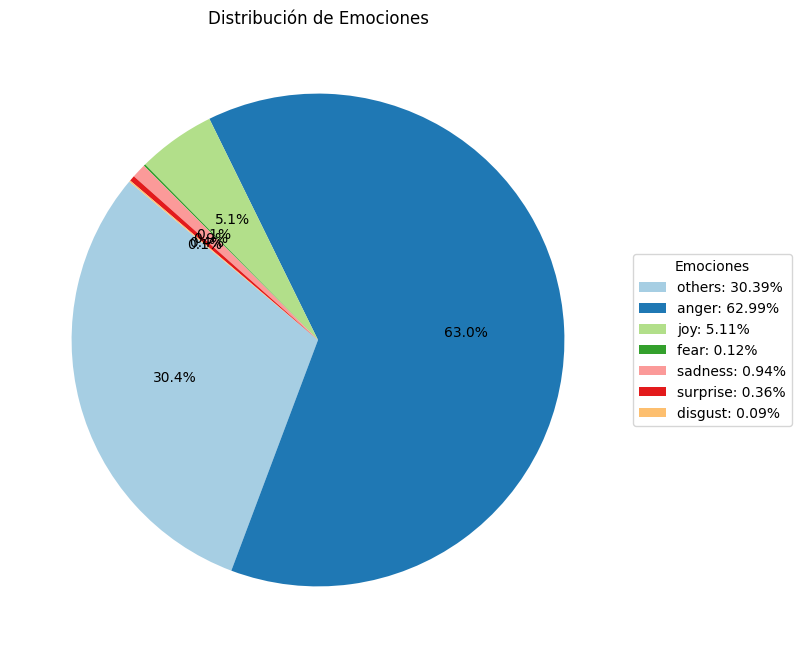

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_emotion_percentages.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Emociones")
legend_labels = [f"{emotion}: {percentage:.2f}%" for emotion, percentage in overall_emotion_percentages.items()]
ax.legend(wedges, legend_labels, title="Emociones", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [39]:
print("\nEjemplos de cada tipo de emocion:")
for sent_type, example in examples_per_emotion.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de emocion:
others: ["Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3", "@Rafhyta86 @ElDesmadre__ Habe pasame el video donde adan diga puta a las mujeres sevillistas...'MI NOVIA ES SEVILLISTA',no dice TODAS LAS SEVILLISTAS.", 'L- El mejor luegar para tener mi polla ahora mismo es en la garganta de Wicca, llenándome de babas', '@AngeAlvarez7 Callate perra, re despierta estoy', '-Mujer: Bésame una vez y te pertenecere para siempre? -Hombre: Ostia! Gracias por la advertencia!', "NINGUNA MUJER ES 'PUTA' ❗❗❗ https://t.co/cV0CQM5RIg", '@ShimaTrek dijo que el acoso no es tan grave porque al menos no es violación ?????', '@eduardoc60 @RuiDeAzevedo411 Rui si tu eres una perra enamorada', '@dsilvao Más que seguro que muchos nacieron producto de acoso y hasta violación 😒. Personalmente, nunca he tenido problemas para conquistar sin recurrir a la intimidación.', '@Wachit0 @100Akshat @_Midori

--------------------------------------------


-----------------------------------------------

### Tweets de misogynous

-----------------------------------------------


In [40]:
text_misogynous = [text for text in df_ibereval[df_ibereval["misogynous"] == 1]["text"].tolist()]
results_emotion_analysis_misogynous = [analyze_emotion(text) for text in tqdm(text_misogynous)]

  0%|          | 8/1649 [00:00<00:21, 76.87it/s]


-----------------------
Texto analizado: @Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbijaputa
Emoción detectada: anger
Probabilidades: {'others': 0.007829681970179081, 'joy': 0.0008873139158822596, 'sadness': 0.0018340416718274355, 'anger': 0.9328428506851196, 'surprise': 0.0018310382729396224, 'disgust': 0.05334293469786644, 'fear': 0.0014320847112685442}

-----------------------
Texto analizado: @Rafhyta86 @ElDesmadre__ Habe pasame el video donde adan diga puta a las mujeres sevillistas...'MI NOVIA ES SEVILLISTA',no dice TODAS LAS SEVILLISTAS.
Emoción detectada: others
Probabilidades: {'others': 0.9513394832611084, 'joy': 0.015878688544034958, 'sadness': 0.0032255775295197964, 'anger': 0.020510077476501465, 'surprise': 0.003587714396417141, 'disgust': 0.004190604668110609, 'fear': 0.0012679349165409803}

-----------------------
Texto analizado: @Otb_35 Que te calles so guarra.
Emoción detectada: anger
Probabilidades: {'others': 0.0154004646465182

  1%|          | 16/1649 [00:00<00:20, 78.37it/s]


-----------------------
Texto analizado: Y yo atorado en el tráfico, claramente tu eres la perra de esta relación. https://t.co/2CaxQqwHqQ
Emoción detectada: others
Probabilidades: {'others': 0.9533678889274597, 'joy': 0.005906670354306698, 'sadness': 0.017200708389282227, 'anger': 0.002097769407555461, 'surprise': 0.017335496842861176, 'disgust': 0.001084163668565452, 'fear': 0.0030072322115302086}

-----------------------
Texto analizado: Nada más vulgar y de mala educación entrar a mi casa y gritarme sin saber de que me habla. TE MERECES EL INFIERNO PERRA.
Emoción detectada: anger
Probabilidades: {'others': 0.0027055307291448116, 'joy': 0.0010328679345548153, 'sadness': 0.0019577513448894024, 'anger': 0.8323725461959839, 'surprise': 0.0012898462591692805, 'disgust': 0.15894672274589539, 'fear': 0.0016947775147855282}


  1%|▏         | 24/1649 [00:00<00:22, 70.73it/s]


-----------------------
Texto analizado: @birarxs nono claro que no, callate q mientras tenga alcohol vos tragas perra
Emoción detectada: others
Probabilidades: {'others': 0.5235247611999512, 'joy': 0.01729138009250164, 'sadness': 0.02171102538704872, 'anger': 0.33742737770080566, 'surprise': 0.007010848727077246, 'disgust': 0.0878738984465599, 'fear': 0.005160759203135967}

-----------------------
Texto analizado: Dos amigos hablando: -Raúl, q me das por mi mujer? -Nada -Trato hecho.
Emoción detectada: others
Probabilidades: {'others': 0.9780550599098206, 'joy': 0.01518911961466074, 'sadness': 0.0014865215634927154, 'anger': 0.0011005642591044307, 'surprise': 0.003172617405653, 'disgust': 0.0005078301182948053, 'fear': 0.0004883656511083245}

-----------------------
Texto analizado: @AlexandGutiz Pues dispuesto a ser un amo muy exigente! empinarte a mi gusto y nalguearte como te lo mereces por puta cachonda y zorra
Emoción detectada: others
Probabilidades: {'others': 0.62211424112319

  3%|▎         | 42/1649 [00:00<00:20, 80.12it/s]


-----------------------
Texto analizado: @alaniscristalv Cállate, pa' interés cualquiera so perra
Emoción detectada: anger
Probabilidades: {'others': 0.15731486678123474, 'joy': 0.012188772670924664, 'sadness': 0.010392360389232635, 'anger': 0.7496970891952515, 'surprise': 0.005718044005334377, 'disgust': 0.059505052864551544, 'fear': 0.0051838187500834465}

-----------------------
Texto analizado: @ERROR14501 @BIZARROMAN09 Callate perra y no
Emoción detectada: anger
Probabilidades: {'others': 0.09914451092481613, 'joy': 0.0036766219418495893, 'sadness': 0.003150759730488062, 'anger': 0.8214206695556641, 'surprise': 0.00279998779296875, 'disgust': 0.06671241670846939, 'fear': 0.003095082938671112}

-----------------------
Texto analizado: @PoderFeminazi Cállate y hazme la cena.
Emoción detectada: others
Probabilidades: {'others': 0.7200223803520203, 'joy': 0.002829712349921465, 'sadness': 0.004707424435764551, 'anger': 0.2551450729370117, 'surprise': 0.0027649172116070986, 'disgust': 

  4%|▎         | 60/1649 [00:00<00:19, 83.59it/s]


-----------------------
Texto analizado: @MiaVasile Callate y mira como la perra muerte toda la alfombra
Emoción detectada: anger
Probabilidades: {'others': 0.1532670110464096, 'joy': 0.005299950018525124, 'sadness': 0.0048426478169858456, 'anger': 0.7322257161140442, 'surprise': 0.009997240267693996, 'disgust': 0.08896707743406296, 'fear': 0.005400334484875202}

-----------------------
Texto analizado: @KPLong4 @cuenta_C @A3Noticias que te calles la puta boca esa de sapo que tienes
Emoción detectada: anger
Probabilidades: {'others': 0.007956390269100666, 'joy': 0.0014987464528530836, 'sadness': 0.0015355374198406935, 'anger': 0.9363897442817688, 'surprise': 0.0012665262911468744, 'disgust': 0.04919399321079254, 'fear': 0.0021590448450297117}

-----------------------
Texto analizado: Que es una Mujer embarazada de dos nenas y un varon? Un kit de limpieza con instrucciones.
Emoción detectada: others
Probabilidades: {'others': 0.9785526990890503, 'joy': 0.002056034514680505, 'sadness': 

  5%|▍         | 78/1649 [00:00<00:18, 84.77it/s]


-----------------------
Texto analizado: @abc_es @HiginiaRoig Ya está la niña del exorcista diciendo tonterías. Has visto lo que a hecho la guarra de tú hija.
Emoción detectada: anger
Probabilidades: {'others': 0.04286954924464226, 'joy': 0.0026377998292446136, 'sadness': 0.0016811484238132834, 'anger': 0.8904337286949158, 'surprise': 0.0039635905995965, 'disgust': 0.056734293699264526, 'fear': 0.0016799495788291097}

-----------------------
Texto analizado: Lo estoy contando a sara lo que me pasó el 28/12 y me está llamando zorra, no es culpa mía ok JAJSAJAKSJAKSAKJSKJ
Emoción detectada: others
Probabilidades: {'others': 0.5429903268814087, 'joy': 0.07238385081291199, 'sadness': 0.05940745398402214, 'anger': 0.23222433030605316, 'surprise': 0.03372542932629585, 'disgust': 0.04136134684085846, 'fear': 0.017907235771417618}

-----------------------
Texto analizado: @Alba_fcb14 Qué haces puta, cállate ya
Emoción detectada: anger
Probabilidades: {'others': 0.10458482801914215, 'joy': 0.0

  6%|▌         | 96/1649 [00:01<00:19, 79.49it/s]


-----------------------
Texto analizado: @clarialvarez15 AH NO q hija d puta sos, mejor callate
Emoción detectada: anger
Probabilidades: {'others': 0.05566968396306038, 'joy': 0.0032526638824492693, 'sadness': 0.00530283385887742, 'anger': 0.8297884464263916, 'surprise': 0.015249538235366344, 'disgust': 0.08471141010522842, 'fear': 0.00602539349347353}

-----------------------
Texto analizado: Estamos en un Estado de igualdad, no? Para cuando la escena de un hombre que diga, 'busco a una guarra para poder fornicar como un loco despechado hasta nuevo año'? No es esto una descarada y funesta forma de incitar el incorrectismo coyuntural y los falsos modales? https://t.co/MXq3X8JFrD
Emoción detectada: anger
Probabilidades: {'others': 0.0017557671526446939, 'joy': 0.0002893605560529977, 'sadness': 0.0020892955362796783, 'anger': 0.9143561720848083, 'surprise': 0.0011486924486234784, 'disgust': 0.07920293509960175, 'fear': 0.0011577325640246272}

-----------------------
Texto analizado: Vué

  6%|▋         | 104/1649 [00:01<00:23, 66.48it/s]


-----------------------
Texto analizado: @ami_abud callate gorda babosa igual q tu perra
Emoción detectada: anger
Probabilidades: {'others': 0.025259071961045265, 'joy': 0.004086319822818041, 'sadness': 0.0028201157692819834, 'anger': 0.8248738050460815, 'surprise': 0.0021781527902930975, 'disgust': 0.1383199542760849, 'fear': 0.0024625828955322504}

-----------------------
Texto analizado: Porque ladra tanto mi perra? La puta madre cállate un poco
Emoción detectada: anger
Probabilidades: {'others': 0.0388275571167469, 'joy': 0.006898796185851097, 'sadness': 0.003105649957433343, 'anger': 0.8962742686271667, 'surprise': 0.011071763932704926, 'disgust': 0.034286655485630035, 'fear': 0.0095352903008461}

-----------------------
Texto analizado: @SrtoAdriGH abusaba de él, es una zorra merecía morir.
Emoción detectada: anger
Probabilidades: {'others': 0.0033527761697769165, 'joy': 0.0011436138302087784, 'sadness': 0.004032221622765064, 'anger': 0.7207071781158447, 'surprise': 0.0017985746

  7%|▋         | 118/1649 [00:01<00:24, 61.41it/s]


-----------------------
Texto analizado: @CauliflaSexrol Tu coño si que sabe complacer mi polla rubia ❤️
Emoción detectada: others
Probabilidades: {'others': 0.6610190272331238, 'joy': 0.279212087392807, 'sadness': 0.0038605390582233667, 'anger': 0.014404267072677612, 'surprise': 0.023053722456097603, 'disgust': 0.008781248703598976, 'fear': 0.00966914277523756}

-----------------------
Texto analizado: Cardi B se ve que como novia es súper perra. Soy su fan
Emoción detectada: others
Probabilidades: {'others': 0.6694468259811401, 'joy': 0.2893613278865814, 'sadness': 0.005999091546982527, 'anger': 0.005148296244442463, 'surprise': 0.02034303918480873, 'disgust': 0.005365110468119383, 'fear': 0.0043362779542803764}

-----------------------
Texto analizado: @AnaMari54039993 @anthony_j17 @Lenin Cállate perra igual entendiste el mensaje anda a pintarte las uñas y hablar de maquillajes perra
Emoción detectada: anger
Probabilidades: {'others': 0.11549033969640732, 'joy': 0.00476952036842703

  8%|▊         | 132/1649 [00:01<00:24, 61.79it/s]


-----------------------
Texto analizado: Perra agradece que te tire el licor en la blusa te lo merecías en la cabeza hp 😂🤦‍♂️ antes de hablar de mi... https://t.co/uRJEvTPI3W
Emoción detectada: others
Probabilidades: {'others': 0.9075242877006531, 'joy': 0.013179313391447067, 'sadness': 0.008425092324614525, 'anger': 0.057854313403367996, 'surprise': 0.004113032948225737, 'disgust': 0.008199392817914486, 'fear': 0.0007046968676149845}

-----------------------
Texto analizado: @lortegadiaz Cállate perra que a ti te espera el mismo destino de maduro y cabello ahora se la tira de correcta porque no lo hicistes aquí corrupta de mierda
Emoción detectada: anger
Probabilidades: {'others': 0.004063792992383242, 'joy': 0.0013118904316797853, 'sadness': 0.001789333764463663, 'anger': 0.892632246017456, 'surprise': 0.0009619584307074547, 'disgust': 0.09784385561943054, 'fear': 0.0013968757120892406}

-----------------------
Texto analizado: Pq la canción esta bien puta y tu eres tan puta que la 

  9%|▉         | 146/1649 [00:02<00:23, 62.66it/s]


-----------------------
Texto analizado: @salvameoficial @BelenEstebanM Tu eres una HDP,MALA GUARRA ODIABLE EL SER MAS VIL SINVERGÜENZA DESGRACIADA DROGADICTA DE MIERDA BelenEstebanM
Emoción detectada: anger
Probabilidades: {'others': 0.002536372747272253, 'joy': 0.0018875794485211372, 'sadness': 0.0022888490930199623, 'anger': 0.7112776041030884, 'surprise': 0.0014139724662527442, 'disgust': 0.27860939502716064, 'fear': 0.0019863226916640997}

-----------------------
Texto analizado: Lisa agradece que tenes un dueño con corazón porque te mereces que te ahorque perra hdp😡
Emoción detectada: anger
Probabilidades: {'others': 0.04395683482289314, 'joy': 0.004750566091388464, 'sadness': 0.0072024171240627766, 'anger': 0.8267703056335449, 'surprise': 0.0022465360816568136, 'disgust': 0.11297864466905594, 'fear': 0.0020946511067450047}

-----------------------
Texto analizado: @SoyDas117 @LuckasDroiidYT1 @BrandonGaming6 @LlinxaYT Y tu eres mi esposa ve a la cocina zorra >:v
Emoción detectad

 10%|▉         | 160/1649 [00:02<00:24, 61.31it/s]


-----------------------
Texto analizado: Es lo que se merecía la perra esa. https://t.co/fTgIlxbnRU
Emoción detectada: anger
Probabilidades: {'others': 0.24344812333583832, 'joy': 0.005043397657573223, 'sadness': 0.010090336203575134, 'anger': 0.6090430021286011, 'surprise': 0.016070229932665825, 'disgust': 0.11346818506717682, 'fear': 0.0028367540799081326}

-----------------------
Texto analizado: Voy a hacer un compilado de videitos con todas las cosas que le digo a mi perra, eso les va a provocar multiples acv y van a morir todos. Que goma que soy la puta madre.
Emoción detectada: anger
Probabilidades: {'others': 0.07807145267724991, 'joy': 0.007015890907496214, 'sadness': 0.02525513991713524, 'anger': 0.7318074703216553, 'surprise': 0.004607680253684521, 'disgust': 0.13521495461463928, 'fear': 0.018027441576123238}

-----------------------
Texto analizado: @LuciaAvelino3 pero cállate vos perra (hoy no estoy creativo para putear)
Emoción detectada: others
Probabilidades: {'others'

 10%|█         | 167/1649 [00:02<00:26, 56.83it/s]


-----------------------
Texto analizado: esas jotillas ridículas de biografías pedorras de #twitter y fotos enseñando la panochita de perra sucia deberían adjuntarle: jota, inventada y posona; pinches guangas.
Emoción detectada: anger
Probabilidades: {'others': 0.0031197720672935247, 'joy': 0.0006593267899006605, 'sadness': 0.0023671428207308054, 'anger': 0.9202762842178345, 'surprise': 0.0008888390148058534, 'disgust': 0.07127052545547485, 'fear': 0.001418147818185389}

-----------------------
Texto analizado: @BIoodyCountess < cuando porque poco más puede hacer maldita zorra tetona. No mereces el apellido Bathory.-
Emoción detectada: anger
Probabilidades: {'others': 0.016928233206272125, 'joy': 0.0010626048315316439, 'sadness': 0.0018523031612858176, 'anger': 0.8860493898391724, 'surprise': 0.0015092653920874, 'disgust': 0.09163983911275864, 'fear': 0.0009582783677615225}

-----------------------
Texto analizado: @aguus_nanni Aaaaa callate maldita perra que vos tambien me tenes aban

 11%|█         | 180/1649 [00:02<00:25, 58.74it/s]


-----------------------
Texto analizado: zorra eres tu que no te sientes hombre y no entiendes que toda mujer es bella
Emoción detectada: anger
Probabilidades: {'others': 0.11228133738040924, 'joy': 0.006827113218605518, 'sadness': 0.052963949739933014, 'anger': 0.7241508364677429, 'surprise': 0.00295910588465631, 'disgust': 0.09702920913696289, 'fear': 0.0037885115016251802}

-----------------------
Texto analizado: @LucasSpadafora Lucas callate que no lees dm nunca la puta que te pario ahre
Emoción detectada: anger
Probabilidades: {'others': 0.2141435742378235, 'joy': 0.0038708385545760393, 'sadness': 0.0038884838577359915, 'anger': 0.7297457456588745, 'surprise': 0.007337520364671946, 'disgust': 0.03769991919398308, 'fear': 0.003313979133963585}

-----------------------
Texto analizado: @arisool__ JAJAJA QUE HIJA DE PUTA, canto hermoso callate
Emoción detectada: others
Probabilidades: {'others': 0.6814033389091492, 'joy': 0.08674640953540802, 'sadness': 0.009605171158909798, 'anger

 12%|█▏        | 192/1649 [00:02<00:26, 55.61it/s]


-----------------------
Texto analizado: @Yuki_prostituta yo lo que quiero es tu coño y que tú quieras mi polla~
Emoción detectada: others
Probabilidades: {'others': 0.9393364787101746, 'joy': 0.036855559796094894, 'sadness': 0.0019620617385953665, 'anger': 0.009114181622862816, 'surprise': 0.005542878061532974, 'disgust': 0.0037168783601373434, 'fear': 0.0034720448311418295}

-----------------------
Texto analizado: “Que tú eres perra,miau,miau,miau”. –Valentina 17 años,mientras piensa para que nació JAJSJAJAJAJAJA.
Emoción detectada: others
Probabilidades: {'others': 0.7332969307899475, 'joy': 0.2013072818517685, 'sadness': 0.018863290548324585, 'anger': 0.016366392374038696, 'surprise': 0.020795367658138275, 'disgust': 0.005041418597102165, 'fear': 0.004329361487179995}

-----------------------
Texto analizado: @AquiCorroVrgara Porque tú eres más perra todavía. 💅👄👅👑💄
Emoción detectada: others
Probabilidades: {'others': 0.9658962488174438, 'joy': 0.029405295848846436, 'sadness': 0.0

 12%|█▏        | 204/1649 [00:03<00:26, 53.57it/s]


-----------------------
Texto analizado: '¿La mitad de sueldo por ser mujer?' http://t.co/HXOVOaiOuj Así es, porque aguantarlas cuesta el doble. #TomaDosTazas
Emoción detectada: anger
Probabilidades: {'others': 0.052715152502059937, 'joy': 0.001851748675107956, 'sadness': 0.005387953016906977, 'anger': 0.8470581769943237, 'surprise': 0.007052956614643335, 'disgust': 0.08361931890249252, 'fear': 0.0023146946914494038}

-----------------------
Texto analizado: @lauraburrel missin pegarte en la cara con lonchas de queso vecina https://t.co/67PdyfJRFW
Emoción detectada: others
Probabilidades: {'others': 0.9729791879653931, 'joy': 0.0012650575954467058, 'sadness': 0.0023030401207506657, 'anger': 0.010068417526781559, 'surprise': 0.00774822011590004, 'disgust': 0.0023724480997771025, 'fear': 0.003263564547523856}

-----------------------
Texto analizado: @antu_cerevin @BornetVane Callate perra jajajajajajajajajaja
Emoción detectada: others
Probabilidades: {'others': 0.7055494785308838, 'joy

 13%|█▎        | 216/1649 [00:03<00:28, 49.95it/s]


-----------------------
Texto analizado: La chica es una zorra y una cabrona y el chico un gilipollas que se aclaren los dos porque el uno que se revela y la otra le toca los güebos #Pap399
Emoción detectada: anger
Probabilidades: {'others': 0.003030475927516818, 'joy': 0.0005867820582352579, 'sadness': 0.0011886717984452844, 'anger': 0.8969473838806152, 'surprise': 0.0010206468869000673, 'disgust': 0.09580939263105392, 'fear': 0.0014166285982355475}

-----------------------
Texto analizado: @CaraotaDigital Desde tocoron perra , tu eres culpable de esto
Emoción detectada: others
Probabilidades: {'others': 0.5681318044662476, 'joy': 0.003904410870745778, 'sadness': 0.013946861028671265, 'anger': 0.3399091064929962, 'surprise': 0.009187322109937668, 'disgust': 0.058628249913454056, 'fear': 0.006292199715971947}

-----------------------
Texto analizado: @pedrons97 Jajajaj si we tu eres bien perra chismosa
Emoción detectada: others
Probabilidades: {'others': 0.9384560585021973, 'joy': 0.0

 13%|█▎        | 222/1649 [00:03<00:30, 47.12it/s]


-----------------------
Texto analizado: @NatachaJaitt @ulisesjaitt @MarceloPolino Como no te mato por hija de puta y por puta provocadora , perra , mereces la muerte sucia HDP
Emoción detectada: anger
Probabilidades: {'others': 0.0031702283304184675, 'joy': 0.0015475766267627478, 'sadness': 0.002217545174062252, 'anger': 0.7867176532745361, 'surprise': 0.0016952318837866187, 'disgust': 0.2024681121110916, 'fear': 0.0021837297827005386}

-----------------------
Texto analizado: @Melinamartt Callate perra desgraciada , estoy enojada con vos. Pd: yo no tengo cuñadas.
Emoción detectada: anger
Probabilidades: {'others': 0.019651545211672783, 'joy': 0.004978619050234556, 'sadness': 0.003619580762460828, 'anger': 0.8456689715385437, 'surprise': 0.0016612784238532186, 'disgust': 0.12264101207256317, 'fear': 0.0017790403217077255}

-----------------------
Texto analizado: Eres la vieja mas osicona y zorra del mundo que no te mereces andar con mi amigo
Emoción detectada: anger
Probabilidades: 

 14%|█▍        | 239/1649 [00:03<00:22, 62.21it/s]


-----------------------
Texto analizado: Porque la reportera es Satanás? La zorra de la novia es 😑 https://t.co/NfgNX973WA
Emoción detectada: anger
Probabilidades: {'others': 0.024278098717331886, 'joy': 0.0005615388508886099, 'sadness': 0.003565758466720581, 'anger': 0.8159040212631226, 'surprise': 0.0037181719671934843, 'disgust': 0.14867061376571655, 'fear': 0.0033017853274941444}

-----------------------
Texto analizado: @pauliboggino @soyunaforra cállate perra de mierda culona
Emoción detectada: anger
Probabilidades: {'others': 0.011379148811101913, 'joy': 0.0021475523244589567, 'sadness': 0.0021570189855992794, 'anger': 0.9184710383415222, 'surprise': 0.0011861873790621758, 'disgust': 0.06295488029718399, 'fear': 0.0017040892271324992}

-----------------------
Texto analizado: @infobae CALLATE HIJA DE PUTA !!!!! LADRONA Q QUERES LA PLATA DE LOS JUBILADOS PARA TUS OBRAS PARA USAR EN TU PROXIMA CAMPAÑA Y LA DE MUGRICIO
Emoción detectada: anger
Probabilidades: {'others': 0.00286591

 16%|█▌        | 257/1649 [00:03<00:18, 73.61it/s]


-----------------------
Texto analizado: A personas: callate el osico puñetas A mi perra: ya callate la bocaaaa no estes ladrando
Emoción detectada: anger
Probabilidades: {'others': 0.033778317272663116, 'joy': 0.006614842917770147, 'sadness': 0.003038484835997224, 'anger': 0.916424572467804, 'surprise': 0.0020224174950271845, 'disgust': 0.03424264118075371, 'fear': 0.003878731979057193}

-----------------------
Texto analizado: De mis punterías. Tu eres la puta mayor
Emoción detectada: others
Probabilidades: {'others': 0.9594476222991943, 'joy': 0.02075197361409664, 'sadness': 0.0014505938161164522, 'anger': 0.005989360623061657, 'surprise': 0.008015934377908707, 'disgust': 0.0019171200692653656, 'fear': 0.0024272738955914974}

-----------------------
Texto analizado: @PamSashaa JAJAJ hay pam enserio te amo millones jajaja muy perra ' me tomas la foto enseñando las croquetas, probamos y nos despedimos' muy perra en mandada jajajaja
Emoción detectada: joy
Probabilidades: {'others': 0.

 17%|█▋        | 275/1649 [00:04<00:17, 78.88it/s]


-----------------------
Texto analizado: @buflot Tú eres mi perra secundaria, me refería a la primaria
Emoción detectada: others
Probabilidades: {'others': 0.9845340251922607, 'joy': 0.009086327627301216, 'sadness': 0.001930388854816556, 'anger': 0.0021814433857798576, 'surprise': 0.0012753087794408202, 'disgust': 0.00041316653368994594, 'fear': 0.000579331535845995}

-----------------------
Texto analizado: Pensar que la mujer es una perra de por si es algo horrible, pero que eso sea por celos, es una conchudez.
Emoción detectada: anger
Probabilidades: {'others': 0.006495180074125528, 'joy': 0.0006180845084600151, 'sadness': 0.026822000741958618, 'anger': 0.7748851180076599, 'surprise': 0.007992592640221119, 'disgust': 0.17772553861141205, 'fear': 0.005461494438350201}

-----------------------
Texto analizado: @IrantzuVarela Por mujeres como tú nos podemos pasar por el coño las tontadas que dicen los machistas
Emoción detectada: anger
Probabilidades: {'others': 0.004613586235791445, 

 18%|█▊        | 291/1649 [00:04<00:17, 78.44it/s]


-----------------------
Texto analizado: @chrisgatico CALLATE YEGUA, MALDITA PERRA AHRE
Emoción detectada: anger
Probabilidades: {'others': 0.05391619727015495, 'joy': 0.005933600012212992, 'sadness': 0.005131226032972336, 'anger': 0.8244968056678772, 'surprise': 0.004857584368437529, 'disgust': 0.10127835720777512, 'fear': 0.004386151675134897}

-----------------------
Texto analizado: Miriam se merecía una canción decente para bordarlo y es que la perra lo ha bordado y se ha quedado tan tranqui! #OTGala8
Emoción detectada: joy
Probabilidades: {'others': 0.049543630331754684, 'joy': 0.9437493681907654, 'sadness': 0.0010782318422570825, 'anger': 0.0011401412775740027, 'surprise': 0.003802065970376134, 'disgust': 0.0004370558017399162, 'fear': 0.00024953705724328756}

-----------------------
Texto analizado: La zorra de @laufer4 riéndose en la cara de mica mientras lloraba hay la tienen ala careta esa
Emoción detectada: anger
Probabilidades: {'others': 0.019011417403817177, 'joy': 0.00

 19%|█▊        | 309/1649 [00:04<00:17, 76.43it/s]


-----------------------
Texto analizado: @g23_o Cállate perra de Twitter
Emoción detectada: anger
Probabilidades: {'others': 0.06239818036556244, 'joy': 0.003648933256044984, 'sadness': 0.002995955292135477, 'anger': 0.882413923740387, 'surprise': 0.002212781459093094, 'disgust': 0.043768223375082016, 'fear': 0.0025619459338486195}

-----------------------
Texto analizado: Una morra puso su foto de perfil donde sale bieeeeeen perra enseñando chicheee y nalga... Pero alvvvvvvvv las patas de hobitt que pedooooooooo
Emoción detectada: others
Probabilidades: {'others': 0.5489528179168701, 'joy': 0.03807065635919571, 'sadness': 0.016480116173624992, 'anger': 0.11468829959630966, 'surprise': 0.23159043490886688, 'disgust': 0.024522490799427032, 'fear': 0.025695238262414932}

-----------------------
Texto analizado: Dice que las mujeres son lo mejor pero las trata de PERRA😕
Emoción detectada: others
Probabilidades: {'others': 0.9592997431755066, 'joy': 0.007763705216348171, 'sadness': 0.0081

 20%|█▉        | 326/1649 [00:04<00:16, 78.12it/s]


-----------------------
Texto analizado: Siempre hay una amiga del novio que por más inocente que sea para uno de novia es la perra hijueputa, que stress prro.
Emoción detectada: others
Probabilidades: {'others': 0.422463059425354, 'joy': 0.004974713549017906, 'sadness': 0.06803625077009201, 'anger': 0.32273316383361816, 'surprise': 0.07441171258687973, 'disgust': 0.04674481227993965, 'fear': 0.06063630431890488}

-----------------------
Texto analizado: @zvonimirsoldo @FOXSports_Chile No quería empezar el año puteando pero vo te mereces unas chuchas tonto sapo y la ctm rata perra culia :)
Emoción detectada: anger
Probabilidades: {'others': 0.020584017038345337, 'joy': 0.003259776160120964, 'sadness': 0.0027509399224072695, 'anger': 0.8920184969902039, 'surprise': 0.0010686620371416211, 'disgust': 0.07890833914279938, 'fear': 0.0014097390230745077}

-----------------------
Texto analizado: @fedevigevani Cuando te conozca te pego un chicle en la cara a ver si te ves algún día bien
Emoc

 21%|██        | 343/1649 [00:05<00:16, 79.46it/s]


-----------------------
Texto analizado: @Miawrta no es culpa tuya, es culpa de esa escoria de persona y punto
Emoción detectada: anger
Probabilidades: {'others': 0.003216005861759186, 'joy': 0.0013254530495032668, 'sadness': 0.0032056558411568403, 'anger': 0.8641523122787476, 'surprise': 0.0007923344965092838, 'disgust': 0.12638430297374725, 'fear': 0.0009239572682417929}

-----------------------
Texto analizado: @martii_belen10 hija de puta cállate te vas a un crucero deja de quejarte
Emoción detectada: anger
Probabilidades: {'others': 0.04019925370812416, 'joy': 0.0037566537503153086, 'sadness': 0.0031815089751034975, 'anger': 0.9071478247642517, 'surprise': 0.003677388885989785, 'disgust': 0.03950204700231552, 'fear': 0.002535363892093301}

-----------------------
Texto analizado: @alyzaid_duarte Callate perra la amaneciiii
Emoción detectada: others
Probabilidades: {'others': 0.8100765943527222, 'joy': 0.022183960303664207, 'sadness': 0.004920009057968855, 'anger': 0.1347225308418

 22%|██▏       | 361/1649 [00:05<00:15, 80.64it/s]


-----------------------
Texto analizado: La mujer a su marido: -Llevamos 20 años casado y nunca me has comprado nada +¿Es que vendes algo? #Afregar
Emoción detectada: others
Probabilidades: {'others': 0.9643747806549072, 'joy': 0.005913683213293552, 'sadness': 0.002828617813065648, 'anger': 0.0067718131467700005, 'surprise': 0.0167658980935812, 'disgust': 0.0018813766073435545, 'fear': 0.0014638942666351795}

-----------------------
Texto analizado: @CamiTala Jajajajaja cállate imbécil, tu perra casi se come a la mía 😥
Emoción detectada: anger
Probabilidades: {'others': 0.2867784798145294, 'joy': 0.04708372429013252, 'sadness': 0.147498220205307, 'anger': 0.45410779118537903, 'surprise': 0.003809371031820774, 'disgust': 0.05798184499144554, 'fear': 0.0027405235450714827}

-----------------------
Texto analizado: Aaaa les quería enseñar estas fotos del sábado que me sentía bn perra https://t.co/pgtAiVclTk
Emoción detectada: joy
Probabilidades: {'others': 0.4526442587375641, 'joy': 0.50

 23%|██▎       | 379/1649 [00:05<00:15, 81.42it/s]


-----------------------
Texto analizado: Vendida, @IndiraHuilca, tienes cara para demostrar tu hipocresía, mejor cállate, perra. https://t.co/mLwCXla1nn
Emoción detectada: anger
Probabilidades: {'others': 0.0033114326652139425, 'joy': 0.0011579019483178854, 'sadness': 0.002677083248272538, 'anger': 0.8869155049324036, 'surprise': 0.0010632261401042342, 'disgust': 0.10354716330766678, 'fear': 0.0013276430545374751}

-----------------------
Texto analizado: @juanbrujox @darias171 @TSJ_Legitimo @CybernetVzla @jcsosazpurua Dr. En que materia lo enseñaron ese vocabulario de perra de burdel?
Emoción detectada: others
Probabilidades: {'others': 0.9453193545341492, 'joy': 0.0014354046434164047, 'sadness': 0.0037532858550548553, 'anger': 0.03292694315314293, 'surprise': 0.005741109140217304, 'disgust': 0.009201942011713982, 'fear': 0.0016219104873016477}

-----------------------
Texto analizado: @krmenph5 @pibesevillista1 @babushasogordo @Sevillismo Calla,guarra española
Emoción detectada: ang

 24%|██▎       | 388/1649 [00:05<00:15, 79.00it/s]


-----------------------
Texto analizado: @MikeDeLioncourt @carloscramz Mike tu eres una zorra 😊
Emoción detectada: others
Probabilidades: {'others': 0.9294265508651733, 'joy': 0.004619135055691004, 'sadness': 0.003509664908051491, 'anger': 0.047903794795274734, 'surprise': 0.0024142826441675425, 'disgust': 0.011154575273394585, 'fear': 0.0009720721282064915}

-----------------------
Texto analizado: @JakyMemes Si tu eres tan perra que te comes hasta la tela https://t.co/jOLpF8BNo6
Emoción detectada: others
Probabilidades: {'others': 0.9485018253326416, 'joy': 0.004424797836691141, 'sadness': 0.0020490754395723343, 'anger': 0.01927206851541996, 'surprise': 0.017810683697462082, 'disgust': 0.004403491038829088, 'fear': 0.0035380665212869644}

-----------------------
Texto analizado: Perra, tú eres un ángel que por la manzana peca
Emoción detectada: others
Probabilidades: {'others': 0.9011251330375671, 'joy': 0.008885311894118786, 'sadness': 0.029646148905158043, 'anger': 0.0112576792016

 25%|██▍       | 406/1649 [00:05<00:15, 82.67it/s]


-----------------------
Texto analizado: @pauladegalicia @MariaSaacher @dodrioenfurecid @A3Noticias Que la mujer es tan perra mala cerda como su marido. Y su hermana vivió su calvario también en su tiempo. Quizá, el final no fue tan trágico como el de Diana, pero es igual de víctima. #Castración
Emoción detectada: sadness
Probabilidades: {'others': 0.004559832625091076, 'joy': 0.0015548240626230836, 'sadness': 0.9005882740020752, 'anger': 0.06300551444292068, 'surprise': 0.0004680317942984402, 'disgust': 0.028383273631334305, 'fear': 0.0014403669629245996}

-----------------------
Texto analizado: @NitoSetroc @absurddheces Es perra. Tú eres homoanimal y ella lesbiana. No eres su tipo ni ella el tuyo...
Emoción detectada: others
Probabilidades: {'others': 0.9588339328765869, 'joy': 0.003204565728083253, 'sadness': 0.006281152833253145, 'anger': 0.021131468936800957, 'surprise': 0.001505201798863709, 'disgust': 0.007725072558969259, 'fear': 0.0013185048010200262}

----------------------

 26%|██▌       | 424/1649 [00:06<00:14, 82.32it/s]


-----------------------
Texto analizado: @GarayCeci Jajajaja cállate perra y hace un bebe
Emoción detectada: others
Probabilidades: {'others': 0.832440197467804, 'joy': 0.05844234675168991, 'sadness': 0.005399382207542658, 'anger': 0.07870156317949295, 'surprise': 0.009628735482692719, 'disgust': 0.013032003305852413, 'fear': 0.002355776960030198}

-----------------------
Texto analizado: @YXXVXGV Cállate perra ascerosa
Emoción detectada: anger
Probabilidades: {'others': 0.034531231969594955, 'joy': 0.0032645196188241243, 'sadness': 0.0025105690583586693, 'anger': 0.8935947418212891, 'surprise': 0.002969627734273672, 'disgust': 0.05976923555135727, 'fear': 0.003360097063705325}

-----------------------
Texto analizado: @Brighma Pero tu eres una tremenda puta q mas puede pasar zorra del demonio, https://t.co/9f9bqZNDBN
Emoción detectada: others
Probabilidades: {'others': 0.5933841466903687, 'joy': 0.006423484534025192, 'sadness': 0.008727075532078743, 'anger': 0.28226616978645325, 'sur

 27%|██▋       | 442/1649 [00:06<00:14, 82.67it/s]


-----------------------
Texto analizado: @Monique_1714 @adriasolebabi Y tú eres una zorra estúpida
Emoción detectada: anger
Probabilidades: {'others': 0.005332893691956997, 'joy': 0.0017217680579051375, 'sadness': 0.002311354037374258, 'anger': 0.8947877883911133, 'surprise': 0.0011688654776662588, 'disgust': 0.09343460947275162, 'fear': 0.001242663012817502}

-----------------------
Texto analizado: @olbasexual Que te calles la puta boca, que tu existencia me repugna, gilipollas
Emoción detectada: anger
Probabilidades: {'others': 0.002039806917309761, 'joy': 0.001244566636160016, 'sadness': 0.0014570287894457579, 'anger': 0.8965753316879272, 'surprise': 0.0008616587147116661, 'disgust': 0.0960603579878807, 'fear': 0.0017612522933632135}

-----------------------
Texto analizado: @SirMagusMedivh // *Se queda callada como una perra y vuelve al porno, porque es lo que toca.*
Emoción detectada: others
Probabilidades: {'others': 0.9897047877311707, 'joy': 0.004280908033251762, 'sadness': 0

 28%|██▊       | 460/1649 [00:06<00:14, 81.66it/s]


-----------------------
Texto analizado: Jajajaja cállate perra 😂❤️😂😂😂 https://t.co/vxFQGusOBh
Emoción detectada: others
Probabilidades: {'others': 0.5076754093170166, 'joy': 0.041103385388851166, 'sadness': 0.007587073836475611, 'anger': 0.3791433870792389, 'surprise': 0.010086176916956902, 'disgust': 0.05144171044230461, 'fear': 0.0029628556221723557}

-----------------------
Texto analizado: @lortegadiaz Perra maldita tú eres la primera en la@hoguera por crímenes de lesa humanidad perra maldita
Emoción detectada: anger
Probabilidades: {'others': 0.004849911667406559, 'joy': 0.0015145709039643407, 'sadness': 0.0020097389351576567, 'anger': 0.8673916459083557, 'surprise': 0.0013759952271357179, 'disgust': 0.12088173627853394, 'fear': 0.0019763396121561527}

-----------------------
Texto analizado: @Placedalia1 Tu eres mas de Estar guarra
Emoción detectada: others
Probabilidades: {'others': 0.9805321097373962, 'joy': 0.0066878399811685085, 'sadness': 0.0021018809638917446, 'anger': 0.

 29%|██▉       | 478/1649 [00:06<00:14, 81.01it/s]


-----------------------
Texto analizado: @Dqnigamer @SoyPapho hijo de perra no me estes hablando asi tu eres mi puta
Emoción detectada: anger
Probabilidades: {'others': 0.055298421531915665, 'joy': 0.0030054894741624594, 'sadness': 0.002216910244897008, 'anger': 0.8684468865394592, 'surprise': 0.0031845858320593834, 'disgust': 0.06430892646312714, 'fear': 0.003538805292919278}

-----------------------
Texto analizado: @zaiira_sanchez Callate hija de perra que te llueven los pibes
Emoción detectada: anger
Probabilidades: {'others': 0.027228016406297684, 'joy': 0.00337046361528337, 'sadness': 0.0020498493686318398, 'anger': 0.8955454230308533, 'surprise': 0.003350738901644945, 'disgust': 0.06501725316047668, 'fear': 0.003438329789787531}

-----------------------
Texto analizado: Que alguien le meta un pene a la boca a esa perra a ver si se queda callada
Emoción detectada: anger
Probabilidades: {'others': 0.041248422116041183, 'joy': 0.0028596753254532814, 'sadness': 0.001712992088869214

 30%|███       | 496/1649 [00:06<00:14, 81.94it/s]


-----------------------
Texto analizado: @Madeleine_ng14 @dagmarrmuniz cállate estúpida perra
Emoción detectada: anger
Probabilidades: {'others': 0.010697259567677975, 'joy': 0.0018182286294177175, 'sadness': 0.0018552751280367374, 'anger': 0.9408423900604248, 'surprise': 0.0016275392845273018, 'disgust': 0.04153118282556534, 'fear': 0.0016281555872410536}

-----------------------
Texto analizado: @MikaBroglio @conilazarte16 @EveOcampos1 Cállate que te hable y te puse que estaban para las pelis puta
Emoción detectada: others
Probabilidades: {'others': 0.7638604640960693, 'joy': 0.013743332587182522, 'sadness': 0.00688123470172286, 'anger': 0.19426125288009644, 'surprise': 0.005561306141316891, 'disgust': 0.013482301495969296, 'fear': 0.0022100915666669607}

-----------------------
Texto analizado: Princesa tu puta madre, trae a mi conejita, no te mereces mis mimos ni mis besos. https://t.co/Qtz6vvTqWo
Emoción detectada: anger
Probabilidades: {'others': 0.02730206400156021, 'joy': 0.00

 31%|███       | 514/1649 [00:07<00:13, 83.24it/s]


-----------------------
Texto analizado: En Akinato esta Jenna , esta la mama de Ty , esta Ty pero no esta supadre ven comemela
Emoción detectada: others
Probabilidades: {'others': 0.975077211856842, 'joy': 0.013231071643531322, 'sadness': 0.0038351172115653753, 'anger': 0.002448882209137082, 'surprise': 0.0020075824577361345, 'disgust': 0.0017684702761471272, 'fear': 0.0016316813416779041}

-----------------------
Texto analizado: @Antoniuruizd @Relatofeminista Es super emponderante ser puta , es un trabajo, no lo sabias?? Y vender tu cuerpo y a tu hijo, ya ni te cuento! Empodera la hostia!! Y ser gender fluid la rehostia!! Es el nuevo pack neoliberal! Tres en uno!!
Emoción detectada: anger
Probabilidades: {'others': 0.023561080917716026, 'joy': 0.004693637602031231, 'sadness': 0.0028450684621930122, 'anger': 0.9013925790786743, 'surprise': 0.008378238417208195, 'disgust': 0.05762140452861786, 'fear': 0.0015080275479704142}

-----------------------
Texto analizado: @solci_cordoba15 @

 32%|███▏      | 532/1649 [00:07<00:13, 80.91it/s]


-----------------------
Texto analizado: @CeelMateos Cállate maldita perra.
Emoción detectada: anger
Probabilidades: {'others': 0.009409559890627861, 'joy': 0.001852740766480565, 'sadness': 0.002121241297572851, 'anger': 0.9353663921356201, 'surprise': 0.0017987657338380814, 'disgust': 0.047156479209661484, 'fear': 0.0022948647383600473}

-----------------------
Texto analizado: @salvameoficial Cállate ya Puta Belén ostia Tia das asco siempre berreando
Emoción detectada: anger
Probabilidades: {'others': 0.005006181541830301, 'joy': 0.0015063047176226974, 'sadness': 0.0011838567443192005, 'anger': 0.8777693510055542, 'surprise': 0.0012675783364102244, 'disgust': 0.11126767843961716, 'fear': 0.0019990981090813875}

-----------------------
Texto analizado: @mignonescabio zorra hija de puta no mereces bibir!
Emoción detectada: anger
Probabilidades: {'others': 0.003914867527782917, 'joy': 0.0021177625749260187, 'sadness': 0.002037716330960393, 'anger': 0.8482570052146912, 'surprise': 0.001

 33%|███▎      | 550/1649 [00:07<00:13, 83.43it/s]


-----------------------
Texto analizado: Eres una perra patética. Tu coño apesta y tu cabeza es wack. Estás enojado porque le diste la cabeza y te dejó perra
Emoción detectada: anger
Probabilidades: {'others': 0.0066863796673715115, 'joy': 0.0020198801066726446, 'sadness': 0.003967051859945059, 'anger': 0.8555493354797363, 'surprise': 0.0009912140667438507, 'disgust': 0.12955613434314728, 'fear': 0.0012300355592742562}

-----------------------
Texto analizado: @_PrayForMell_ Vete a la mierda Igual te voy a vender hija de la gran perra
Emoción detectada: anger
Probabilidades: {'others': 0.004526231437921524, 'joy': 0.0016438753809779882, 'sadness': 0.0017494265921413898, 'anger': 0.9080616235733032, 'surprise': 0.0012434459058567882, 'disgust': 0.08130135387182236, 'fear': 0.0014740517362952232}

-----------------------
Texto analizado: @Javier_mg10 @sergio_gnzlz Callate puta, no te metas
Emoción detectada: anger
Probabilidades: {'others': 0.03479781746864319, 'joy': 0.0025025622453540

 34%|███▍      | 568/1649 [00:07<00:13, 82.59it/s]


-----------------------
Texto analizado: -¿Que le falta a una Mujer para ser perfecta? -todo
Emoción detectada: others
Probabilidades: {'others': 0.94336998462677, 'joy': 0.03382599726319313, 'sadness': 0.005261426325887442, 'anger': 0.005243878811597824, 'surprise': 0.00654055830091238, 'disgust': 0.002157379873096943, 'fear': 0.0036007685121148825}

-----------------------
Texto analizado: Esta hija de perra no sabe lo que es salir verdaderamente MAL en una foto https://t.co/ALx6ERybYf
Emoción detectada: anger
Probabilidades: {'others': 0.0034299909602850676, 'joy': 0.0008215418201871216, 'sadness': 0.008937581442296505, 'anger': 0.7609183192253113, 'surprise': 0.0036241591442376375, 'disgust': 0.21910633146762848, 'fear': 0.0031620035879313946}

-----------------------
Texto analizado: @Hugo_Gutierrez_ Te mereces que te agarremos a patas en la zorra, gargajos y combos en el hocico viejo culiao, ojalá no te cruces en mi camino
Emoción detectada: anger
Probabilidades: {'others': 0.01

 36%|███▌      | 586/1649 [00:08<00:12, 81.86it/s]


-----------------------
Texto analizado: Que mierda tienen en la cabeza cuando creen que una violacion o situacion de acoso que les estan contando ES MENTIRA????? O sea,son joda gente
Emoción detectada: anger
Probabilidades: {'others': 0.0016566059784963727, 'joy': 0.0004594548954628408, 'sadness': 0.0057702744379639626, 'anger': 0.8768365979194641, 'surprise': 0.006023315247148275, 'disgust': 0.10447575896978378, 'fear': 0.004777918569743633}

-----------------------
Texto analizado: @DrodriguezVen tu eres la perra mas perra de las perras
Emoción detectada: others
Probabilidades: {'others': 0.9435835480690002, 'joy': 0.03483168035745621, 'sadness': 0.0013188993325456977, 'anger': 0.003578526433557272, 'surprise': 0.012685013003647327, 'disgust': 0.0017564625013619661, 'fear': 0.0022458757739514112}

-----------------------
Texto analizado: @silvestreLidier Tú eres una perra jajaja
Emoción detectada: others
Probabilidades: {'others': 0.9106796383857727, 'joy': 0.05978938937187195, 'sa

 37%|███▋      | 604/1649 [00:08<00:12, 82.93it/s]


-----------------------
Texto analizado: @AgusBenve10 Callate puta loca si sos un quebrado
Emoción detectada: anger
Probabilidades: {'others': 0.054225388914346695, 'joy': 0.004464716650545597, 'sadness': 0.00392187712714076, 'anger': 0.8294665217399597, 'surprise': 0.002934042364358902, 'disgust': 0.10238280892372131, 'fear': 0.002604698296636343}

-----------------------
Texto analizado: @laurg46 @mxnicagb1997 @WaitaSR @NatuLoveYou Mereces la muerte zorra JAJAJAJAJA
Emoción detectada: others
Probabilidades: {'others': 0.7969757318496704, 'joy': 0.024463580921292305, 'sadness': 0.008095910772681236, 'anger': 0.11398278176784515, 'surprise': 0.007010734640061855, 'disgust': 0.04776480793952942, 'fear': 0.0017064206767827272}

-----------------------
Texto analizado: No puedo con lo que dice la canción de ‘que perra mi amiga’: y tú eres perra, ládrame 😂
Emoción detectada: others
Probabilidades: {'others': 0.6330293416976929, 'joy': 0.23450466990470886, 'sadness': 0.008134585805237293, 

 38%|███▊      | 622/1649 [00:08<00:12, 83.45it/s]


-----------------------
Texto analizado: @TRANQUlLlTA Oye callate que si te molesta pues no mires el chat y deja ya de llamar la atención guarra, mi Instagram es trussypussy25 chavales
Emoción detectada: anger
Probabilidades: {'others': 0.05512390658259392, 'joy': 0.00448952428996563, 'sadness': 0.0024731173180043697, 'anger': 0.9000864028930664, 'surprise': 0.0022213419433683157, 'disgust': 0.03354638069868088, 'fear': 0.002059393562376499}

-----------------------
Texto analizado: @ te sigo amando pero no lo mereces, perra.
Emoción detectada: others
Probabilidades: {'others': 0.751564085483551, 'joy': 0.13681383430957794, 'sadness': 0.04325520619750023, 'anger': 0.0523633174598217, 'surprise': 0.004031220450997353, 'disgust': 0.009889873676002026, 'fear': 0.0020825047977268696}

-----------------------
Texto analizado: #YuriIsOverParty @OficialYuri te lo merecias muchisimo zorra https://t.co/VGRnNyWa8s
Emoción detectada: anger
Probabilidades: {'others': 0.03820745274424553, 'joy': 0

 38%|███▊      | 631/1649 [00:08<00:12, 82.04it/s]


-----------------------
Texto analizado: @ingridcoronado Cállate perra, Recalentado los que se echan los directivos de TV Azteca cada que te la pasas brincando de verga en verga, por eso dejaste a Fernando, porque te encanta la puteria
Emoción detectada: anger
Probabilidades: {'others': 0.011709739454090595, 'joy': 0.002352386713027954, 'sadness': 0.0035438823979347944, 'anger': 0.9276847839355469, 'surprise': 0.0008910572505556047, 'disgust': 0.0526973232626915, 'fear': 0.001120826113037765}

-----------------------
Texto analizado: Nunca pensé que un capitulo de Dr. House me iba a hacer llorar tanto 💔 Amber eras una perra pero no merecías eso 😞
Emoción detectada: sadness
Probabilidades: {'others': 0.0031855679117143154, 'joy': 0.0009198167244903743, 'sadness': 0.9928921461105347, 'anger': 0.0012033929815515876, 'surprise': 0.0003553367860149592, 'disgust': 0.0007591272005811334, 'fear': 0.0006845481693744659}

-----------------------
Texto analizado: @BrotherDroiid @Snowknight9 Pero

 39%|███▉      | 649/1649 [00:08<00:12, 80.07it/s]


-----------------------
Texto analizado: 'También te estresa todo hermana' y bueno gil, callate la puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.15642203390598297, 'joy': 0.007676905021071434, 'sadness': 0.01309693232178688, 'anger': 0.761701762676239, 'surprise': 0.009021516889333725, 'disgust': 0.033127691596746445, 'fear': 0.01895315945148468}

-----------------------
Texto analizado: @El_PiraTha Cállate perra que me dejaste en seen, mal amigo
Emoción detectada: anger
Probabilidades: {'others': 0.06866592913866043, 'joy': 0.006543927360326052, 'sadness': 0.009517264552414417, 'anger': 0.8487706780433655, 'surprise': 0.0026378794573247433, 'disgust': 0.06176164746284485, 'fear': 0.0021025976166129112}

-----------------------
Texto analizado: @GrPepe tu novia es una perra Tiene las mismas tetas que una perra preñada JAAJJAAJA Que asco Tanto Ego que tienes mmgvo
Emoción detectada: anger
Probabilidades: {'others': 0.015517981722950935, 'joy': 0.001745867426507175, '

 40%|████      | 667/1649 [00:09<00:12, 81.35it/s]


-----------------------
Texto analizado: @pilarbertolo @el_pais Porque no tiene la menor empatía con víctimas de acoso ni de violación y porque defiende un derecho autoinventado del hombre de hacer con las mujeres lo que les dé la gana.
Emoción detectada: anger
Probabilidades: {'others': 0.005406755022704601, 'joy': 0.0003783980500884354, 'sadness': 0.0049171471036970615, 'anger': 0.8975108861923218, 'surprise': 0.0005697449669241905, 'disgust': 0.09015907347202301, 'fear': 0.0010579937370494008}

-----------------------
Texto analizado: @ccamilitach no te mereces que te preste ninguna malla más por escribirlo así perra 😒jajajajaj
Emoción detectada: others
Probabilidades: {'others': 0.9141854643821716, 'joy': 0.005885331891477108, 'sadness': 0.004420924931764603, 'anger': 0.06316230446100235, 'surprise': 0.00407785177230835, 'disgust': 0.007462449837476015, 'fear': 0.000805601361207664}

-----------------------
Texto analizado: Qué ridículas la puta madre me da sarna leerlas
Emoción d

 42%|████▏     | 685/1649 [00:09<00:11, 80.98it/s]


-----------------------
Texto analizado: que es eso de hacer un dia harry otro liam otro zayn SE VEN RIDÍCULAS vuelvan a facebook hijas de puta
Emoción detectada: anger
Probabilidades: {'others': 0.013680568896234035, 'joy': 0.0019390224479138851, 'sadness': 0.006400742568075657, 'anger': 0.8771292567253113, 'surprise': 0.008163725025951862, 'disgust': 0.08876463025808334, 'fear': 0.003922104369848967}

-----------------------
Texto analizado: Perra, pero callada, me gusta.
Emoción detectada: others
Probabilidades: {'others': 0.6176316142082214, 'joy': 0.3285829424858093, 'sadness': 0.006581780966371298, 'anger': 0.01365879736840725, 'surprise': 0.017002582550048828, 'disgust': 0.009133636951446533, 'fear': 0.007408688776195049}

-----------------------
Texto analizado: la novia es mas puta y el pelotudo sigue estando con ella , ni pa bosta la mina mas zorra y el ni hablar mas gil todavía , le re kbio
Emoción detectada: anger
Probabilidades: {'others': 0.008152095600962639, 'joy': 0.0

 43%|████▎     | 703/1649 [00:09<00:11, 80.45it/s]


-----------------------
Texto analizado: Hasta para enseñar el culo hay que ser perra.
Emoción detectada: anger
Probabilidades: {'others': 0.20881643891334534, 'joy': 0.010719846934080124, 'sadness': 0.011201129294931889, 'anger': 0.6360644102096558, 'surprise': 0.027451932430267334, 'disgust': 0.09692610055208206, 'fear': 0.008820218965411186}

-----------------------
Texto analizado: @danneo @Manualcom @CercaniasMadrid @fomentogob La perra gorda pa ti. Y x esa regla de 3 tu eres culpable de la caja b del pp, las privatizaciones y la precariedad laboral junto con educación q sufre España, xq tienes tu la culpa, sencillo, xq lo digo yo.
Emoción detectada: anger
Probabilidades: {'others': 0.007621366530656815, 'joy': 0.0033871771302074194, 'sadness': 0.006094926968216896, 'anger': 0.9075143337249756, 'surprise': 0.00036469241604208946, 'disgust': 0.07429153472185135, 'fear': 0.0007259639678522944}

-----------------------
Texto analizado: Hola, tarta. Sé bien lo que quieres. Te ví en a

 44%|████▎     | 721/1649 [00:09<00:11, 79.48it/s]


-----------------------
Texto analizado: @Antweetmoral tú cállate hija de perra https://t.co/rHAD9hosVI
Emoción detectada: anger
Probabilidades: {'others': 0.01135752908885479, 'joy': 0.0019778218120336533, 'sadness': 0.0016925298841670156, 'anger': 0.9342270493507385, 'surprise': 0.0020675952546298504, 'disgust': 0.046599339693784714, 'fear': 0.002078121295198798}

-----------------------
Texto analizado: Perra traidora!!!!! No te lo mereces!!!!!! https://t.co/C522UHHAjl
Emoción detectada: anger
Probabilidades: {'others': 0.0030363353434950113, 'joy': 0.001785468077287078, 'sadness': 0.0026153309736400843, 'anger': 0.8018207550048828, 'surprise': 0.0012247200356796384, 'disgust': 0.18787474930286407, 'fear': 0.0016425891080871224}

-----------------------
Texto analizado: Una mujer va a una biblioteca: -¿Por favor, los derechos de la mujer? -¡Ah, sí. Por la sección de ciencia ficción
Emoción detectada: others
Probabilidades: {'others': 0.8673930168151855, 'joy': 0.07784789055585861, 

 45%|████▍     | 738/1649 [00:09<00:11, 80.59it/s]


-----------------------
Texto analizado: ¿Por que si a una mujer le pegan un tiro en la cabeza dura tres dias en morirse? Porque a los tres dias la bala encuentra el cerebro.
Emoción detectada: anger
Probabilidades: {'others': 0.15032337605953217, 'joy': 0.0036285941023379564, 'sadness': 0.1041133850812912, 'anger': 0.6367961764335632, 'surprise': 0.016832849010825157, 'disgust': 0.0778483897447586, 'fear': 0.010457253083586693}

-----------------------
Texto analizado: YA CÁLLATE MALDITA PERRA RIDÍCULA
Emoción detectada: anger
Probabilidades: {'others': 0.04351888597011566, 'joy': 0.005630509462207556, 'sadness': 0.006198069080710411, 'anger': 0.8777223825454712, 'surprise': 0.0075104571878910065, 'disgust': 0.053948890417814255, 'fear': 0.00547075504437089}

-----------------------
Texto analizado: @vibrium_ JAJAJAJAJAJA El multitasking es lo de hoy: Perra en Instagram, emo en Twitter, ridículas por Facebook y divas en WhatsApp, todo a la misma vez y sin mezclar historias.
Emoción d

 46%|████▌     | 756/1649 [00:10<00:10, 81.80it/s]


-----------------------
Texto analizado: @pichula_sad weón la perra que tengo se puso a ladrar y ahora está callada, tengo miedo AAAAAAAA voy a quemar la casa
Emoción detectada: fear
Probabilidades: {'others': 0.044903483241796494, 'joy': 0.010781769640743732, 'sadness': 0.006546646356582642, 'anger': 0.03066255897283554, 'surprise': 0.11264641582965851, 'disgust': 0.01933358423411846, 'fear': 0.7751256227493286}

-----------------------
Texto analizado: No es machismo pero yo creo que las mujeres son inferiores que los hombres. Lo que hay que leer.
Emoción detectada: others
Probabilidades: {'others': 0.9569142460823059, 'joy': 0.002621791325509548, 'sadness': 0.009253543801605701, 'anger': 0.013278605416417122, 'surprise': 0.01089145615696907, 'disgust': 0.004477885086089373, 'fear': 0.0025624511763453484}

-----------------------
Texto analizado: @Lape_Fans @valeriaberamend @violeurtizberea @Murielsantaok Pues eso, cállate la puta boca.
Emoción detectada: anger
Probabilidades: {'oth

 46%|████▋     | 765/1649 [00:10<00:10, 81.96it/s]


-----------------------
Texto analizado: @DarkGraphics_YT @IstEkoGFX @kanouraa LO MAS SATURADO ES VER MI POLLA EN TU CULO AGUJEREADO😂😂😂
Emoción detectada: others
Probabilidades: {'others': 0.6921370625495911, 'joy': 0.29865050315856934, 'sadness': 0.001873683650046587, 'anger': 0.0027537387795746326, 'surprise': 0.0024359007366001606, 'disgust': 0.001386356190778315, 'fear': 0.0007627460872754455}

-----------------------
Texto analizado: @viviana_bonilla @veronicaariasf Como tú eres otra VAGA perra desgraciada ladrona
Emoción detectada: anger
Probabilidades: {'others': 0.005062667652964592, 'joy': 0.001617427566088736, 'sadness': 0.002545113442465663, 'anger': 0.8368923664093018, 'surprise': 0.00117267738096416, 'disgust': 0.15135706961154938, 'fear': 0.0013527278788387775}

-----------------------
Texto analizado: Lo nuestro nunca iba a funcionar porque tu eres un pendejo hostigoso y yo una maldita perra sin corazón.
Emoción detectada: anger
Probabilidades: {'others': 0.016706584021

 47%|████▋     | 783/1649 [00:10<00:10, 81.51it/s]


-----------------------
Texto analizado: @ShailynYanika jajajajajaja si tu eres una perra EL SIEMPRE SERÁ CABRON
Emoción detectada: others
Probabilidades: {'others': 0.8649682402610779, 'joy': 0.10773760825395584, 'sadness': 0.001559619908221066, 'anger': 0.004241210874170065, 'surprise': 0.017176548019051552, 'disgust': 0.0023472702596336603, 'fear': 0.0019695053342729807}

-----------------------
Texto analizado: @21Cordeliamar Cállate hija de perra, tienes pruebas de que Fujimori es asesino? porque te puedes ir presa por difamación. Fujimori no fue condenado por lesa humanidad, infórmate bien reconchatumare.
Emoción detectada: anger
Probabilidades: {'others': 0.003133548889309168, 'joy': 0.0009713583858683705, 'sadness': 0.0014711517142131925, 'anger': 0.9333497881889343, 'surprise': 0.0008898448431864381, 'disgust': 0.058866627514362335, 'fear': 0.0013176972279325128}

-----------------------
Texto analizado: @MarioJuarezR Cállate perra, es un rolon! Perdón por no poner tweets tod

 49%|████▊     | 801/1649 [00:10<00:10, 83.82it/s]


-----------------------
Texto analizado: @ValencianosHoy @DrodriguezVen Delci es una puta,pero tu eres una prepago de 5 pesos piaso mierda
Emoción detectada: anger
Probabilidades: {'others': 0.005659195128828287, 'joy': 0.001619618502445519, 'sadness': 0.0026309508830308914, 'anger': 0.8149455189704895, 'surprise': 0.0010658805258572102, 'disgust': 0.1726146787405014, 'fear': 0.0014641351299360394}

-----------------------
Texto analizado: @Untrust666 Cállate ok? Se aman déjalos, vida solo hay una perra.
Emoción detectada: others
Probabilidades: {'others': 0.6904688477516174, 'joy': 0.01990532875061035, 'sadness': 0.033734649419784546, 'anger': 0.22518526017665863, 'surprise': 0.002218174049630761, 'disgust': 0.026360344141721725, 'fear': 0.002127448795363307}

-----------------------
Texto analizado: @AgusMariano17 @astrobrix @saintlean asi le digo a tu mami callate perra
Emoción detectada: anger
Probabilidades: {'others': 0.39346516132354736, 'joy': 0.017252689227461815, 'sadness': 

 50%|████▉     | 819/1649 [00:10<00:10, 82.14it/s]


-----------------------
Texto analizado: Va una mujer tonta, valga la redundancia.
Emoción detectada: others
Probabilidades: {'others': 0.934357225894928, 'joy': 0.009117379784584045, 'sadness': 0.005163230001926422, 'anger': 0.03725940361618996, 'surprise': 0.007520964369177818, 'disgust': 0.005252820905297995, 'fear': 0.001328951446339488}

-----------------------
Texto analizado: Me recibes así para provocarme y que te folle cierto?eres toda una puta adicta a mi polla! https://t.co/neUDc07IzW
Emoción detectada: others
Probabilidades: {'others': 0.758876621723175, 'joy': 0.11114910989999771, 'sadness': 0.006656609941273928, 'anger': 0.04173735901713371, 'surprise': 0.043474406003952026, 'disgust': 0.02185697853565216, 'fear': 0.01624889485538006}

-----------------------
Texto analizado: La cultura de la violación es un invento de las feminazis y el acoso callejero no es para tanto. Sólo son cuatro locos que andan sueltos. https://t.co/79itxlTZgu
Emoción detectada: anger
Probabilida

 51%|█████     | 837/1649 [00:11<00:09, 82.98it/s]


-----------------------
Texto analizado: —Donde deja huella una leona, no deja huella una gatita. —Oe, pero si tú eres perra. jaja v :v
Emoción detectada: others
Probabilidades: {'others': 0.9273614287376404, 'joy': 0.05010443553328514, 'sadness': 0.009468299336731434, 'anger': 0.004303982015699148, 'surprise': 0.006198085378855467, 'disgust': 0.0017896635690703988, 'fear': 0.0007742144516669214}

-----------------------
Texto analizado: @YonisJ17 @futbolsinlimi Cállate perra que tú no aparecias hace 5 años, ve a tocarte con tu ascenso
Emoción detectada: anger
Probabilidades: {'others': 0.03418835252523422, 'joy': 0.0024215371813625097, 'sadness': 0.003028864972293377, 'anger': 0.9157875776290894, 'surprise': 0.001174209639430046, 'disgust': 0.042424146085977554, 'fear': 0.0009752780315466225}

-----------------------
Texto analizado: La vez que me niego a enseñarle a usar ig a mi mamá me dice: - Yo te enseñé a usar una cuchara puta de mierda! Siempre te la llevabas al ojo, ibas a que

 52%|█████▏    | 855/1649 [00:11<00:09, 80.94it/s]


-----------------------
Texto analizado: Tanto los hombres como las mujeres son descarados,A NADIE LE IMPORTA SI TIENES PAREJA O NO,cuando una tipa es perra le coquetea sabiendo que tiene novia le da igual,y un hombre te echa los perros teniendo novia,entonces díganme uno como confía?
Emoción detectada: anger
Probabilidades: {'others': 0.0029160708654671907, 'joy': 0.0005021191900596023, 'sadness': 0.007411000784486532, 'anger': 0.8855454921722412, 'surprise': 0.0023800423368811607, 'disgust': 0.09857863932847977, 'fear': 0.00266657373867929}

-----------------------
Texto analizado: Querido amig@ Godinez hoy se vale que tu café lleve piquete de vodka. ¡Chingale te lo mereces! —Ningún jefe en su perra vida
Emoción detectada: others
Probabilidades: {'others': 0.9262385368347168, 'joy': 0.02888781577348709, 'sadness': 0.0054468694142997265, 'anger': 0.03242596983909607, 'surprise': 0.0023923020344227552, 'disgust': 0.003937867004424334, 'fear': 0.0006705970736220479}

------------------

 53%|█████▎    | 873/1649 [00:11<00:09, 82.36it/s]


-----------------------
Texto analizado: @vikidonda Cállate GUARRA!!!
Emoción detectada: anger
Probabilidades: {'others': 0.015613233670592308, 'joy': 0.005871864501386881, 'sadness': 0.0014419980579987168, 'anger': 0.9347397685050964, 'surprise': 0.003150127362459898, 'disgust': 0.03702457249164581, 'fear': 0.002158503979444504}

-----------------------
Texto analizado: @marfilag Tú eres una zorra con pecado original, no te puedes quedar embarazada como la Virgen.
Emoción detectada: others
Probabilidades: {'others': 0.5066775679588318, 'joy': 0.0034139894414693117, 'sadness': 0.036229848861694336, 'anger': 0.31672680377960205, 'surprise': 0.015362992882728577, 'disgust': 0.11209379136562347, 'fear': 0.009495041333138943}

-----------------------
Texto analizado: @CarlaEUrena @FelipeCalderon Callateeeee !! Puta gallina cacarea !! Ni idea tienes de nada .
Emoción detectada: anger
Probabilidades: {'others': 0.009698938578367233, 'joy': 0.0011176372645422816, 'sadness': 0.001567247905768

 54%|█████▍    | 891/1649 [00:11<00:09, 81.23it/s]


-----------------------
Texto analizado: @daleleoncl Golazo en la cara de la zorra AlexiZ ZáncheZ, que estaba en el estadio esa tarde, y que quería que Cobreloa fuera campeón... no sin antes haber dicho que soñaba con volver a jugar en colocolo. https://t.co/OHuf9q9gLs
Emoción detectada: others
Probabilidades: {'others': 0.9263776540756226, 'joy': 0.05225455015897751, 'sadness': 0.007147678639739752, 'anger': 0.009900834411382675, 'surprise': 0.002044673077762127, 'disgust': 0.0019246891606599092, 'fear': 0.000349942478351295}

-----------------------
Texto analizado: Zorra Colau,amante de moros,pensando en votantes.Si tú eres atea desgraciada!!! https://t.co/Fv38CCZOUv
Emoción detectada: anger
Probabilidades: {'others': 0.0019006540533155203, 'joy': 0.0016198917292058468, 'sadness': 0.00227817939594388, 'anger': 0.8461369276046753, 'surprise': 0.0008446151623502374, 'disgust': 0.14575444161891937, 'fear': 0.001465310575440526}

-----------------------
Texto analizado: Buscate una lim

 55%|█████▌    | 909/1649 [00:11<00:09, 80.91it/s]


-----------------------
Texto analizado: Pues si la verdad si yo enseño la polla por internet aceptaría con resignación una violacion https://t.co/n4mXClKBGJ
Emoción detectada: anger
Probabilidades: {'others': 0.18050937354564667, 'joy': 0.002687710803002119, 'sadness': 0.07197272777557373, 'anger': 0.4802989661693573, 'surprise': 0.03662533685564995, 'disgust': 0.21076345443725586, 'fear': 0.017142318189144135}

-----------------------
Texto analizado: @GastonE58 Callate, no te metas con mi perra 😑
Emoción detectada: anger
Probabilidades: {'others': 0.028801433742046356, 'joy': 0.001483190804719925, 'sadness': 0.0021267884876579046, 'anger': 0.9339940547943115, 'surprise': 0.0014946497976779938, 'disgust': 0.030647054314613342, 'fear': 0.0014527967432513833}

-----------------------
Texto analizado: @aurelionuno @lopezobrador_ Cállate pendejo de mierda. Mentiroso hijo de la gran puta. Culero, cobarde, puto e hijo de tu repinche madre.
Emoción detectada: anger
Probabilidades: {'others

 56%|█████▌    | 927/1649 [00:12<00:08, 81.26it/s]


-----------------------
Texto analizado: @Barbijaputa Cómo que no? El mítico 'y mi coño lo disfruta' jajajaja.
Emoción detectada: joy
Probabilidades: {'others': 0.34183433651924133, 'joy': 0.572150707244873, 'sadness': 0.001358192996121943, 'anger': 0.0035281279124319553, 'surprise': 0.077916219830513, 'disgust': 0.0016387514770030975, 'fear': 0.0015736635541543365}

-----------------------
Texto analizado: @fidgetspintana callate perra tonta
Emoción detectada: anger
Probabilidades: {'others': 0.04369913786649704, 'joy': 0.005213516298681498, 'sadness': 0.004539571236819029, 'anger': 0.8918476104736328, 'surprise': 0.004503906704485416, 'disgust': 0.04705880954861641, 'fear': 0.0031373982783406973}

-----------------------
Texto analizado: @carolgrillito @marcelaguinaga @MashiRafael cállate perra
Emoción detectada: anger
Probabilidades: {'others': 0.0451207160949707, 'joy': 0.0033501198049634695, 'sadness': 0.0029740992467850447, 'anger': 0.8885937929153442, 'surprise': 0.002792833140

 57%|█████▋    | 945/1649 [00:12<00:08, 81.78it/s]


-----------------------
Texto analizado: @ConCiliaFlores @NicolasMaduro Jajajaja cállate maldita perra de mierda ladrona de bancos
Emoción detectada: anger
Probabilidades: {'others': 0.01225031167268753, 'joy': 0.0035380662884563208, 'sadness': 0.0018629111582413316, 'anger': 0.8662669062614441, 'surprise': 0.002271526725962758, 'disgust': 0.11196581274271011, 'fear': 0.0018444543238729239}

-----------------------
Texto analizado: ¿Por que las mujers fingen cuando hacen el amor? Por que se creen q nos importa.
Emoción detectada: anger
Probabilidades: {'others': 0.02300404943525791, 'joy': 0.0014086650917306542, 'sadness': 0.018396947532892227, 'anger': 0.8836299180984497, 'surprise': 0.004886778537184, 'disgust': 0.06429216265678406, 'fear': 0.0043814596720039845}

-----------------------
Texto analizado: @NathalyMendieta Imbecil te lo merecías. Agradéceme perra https://t.co/Dn3lcV4A4z
Emoción detectada: anger
Probabilidades: {'others': 0.006273090373724699, 'joy': 0.0017700325697660

 58%|█████▊    | 963/1649 [00:12<00:08, 83.87it/s]


-----------------------
Texto analizado: @Alberto69Ramos Es un poquito puta en mi opinión la pechotes esta, a ver cuando dejara de provocar y sabes que? Encima no tiene ni culo xD
Emoción detectada: anger
Probabilidades: {'others': 0.05723363906145096, 'joy': 0.005009128246456385, 'sadness': 0.0030561659950762987, 'anger': 0.8266540169715881, 'surprise': 0.002358947182074189, 'disgust': 0.10375472903251648, 'fear': 0.0019333771197125316}

-----------------------
Texto analizado: Como dicen… Si no tienes algo bueno que decir mejor callate y matate maldita perra arrogante o como era? https://t.co/7dGhOHg6Fs
Emoción detectada: anger
Probabilidades: {'others': 0.03279321640729904, 'joy': 0.0014395937323570251, 'sadness': 0.002165695186704397, 'anger': 0.8793890476226807, 'surprise': 0.002350765047594905, 'disgust': 0.07973549515008926, 'fear': 0.002126160776242614}

-----------------------
Texto analizado: ¿Qué es una mujer encima de una vaca? Una vaca de dos pisos
Emoción detectada: othe

 59%|█████▉    | 972/1649 [00:12<00:08, 81.84it/s]


-----------------------
Texto analizado: - ¿Cuál es tu problema? - Mi novia es tremenda perra !!! https://t.co/2urGCRqisC
Emoción detectada: anger
Probabilidades: {'others': 0.19367040693759918, 'joy': 0.01953454315662384, 'sadness': 0.003383964765816927, 'anger': 0.7219192981719971, 'surprise': 0.019508223980665207, 'disgust': 0.03670738264918327, 'fear': 0.005276128649711609}

-----------------------
Texto analizado: @Roberto81160710 Cállate perra sucia
Emoción detectada: anger
Probabilidades: {'others': 0.0371939055621624, 'joy': 0.003805681364610791, 'sadness': 0.003310192609205842, 'anger': 0.8753551244735718, 'surprise': 0.003485174383968115, 'disgust': 0.07407249510288239, 'fear': 0.0027773913461714983}

-----------------------
Texto analizado: Una mujer tan lista, tan lista, tan lista, que todo el mundo le llamaba Paco.
Emoción detectada: others
Probabilidades: {'others': 0.9488816261291504, 'joy': 0.04058147966861725, 'sadness': 0.0021161690820008516, 'anger': 0.0010416500736

 60%|██████    | 990/1649 [00:12<00:08, 80.27it/s]


-----------------------
Texto analizado: @andygallego1 tu eres d siempre zorra
Emoción detectada: others
Probabilidades: {'others': 0.7546961903572083, 'joy': 0.014826671220362186, 'sadness': 0.0059879254549741745, 'anger': 0.1760675609111786, 'surprise': 0.006863046903163195, 'disgust': 0.03753666579723358, 'fear': 0.004021999426186085}

-----------------------
Texto analizado: @HanzoHattori23 @eldiarioes @Barbijaputa Y sobre cómo 'distinguir y separar CLARAMENTE' lo que es violación y acoso de aquello que no lo es: https://t.co/kPxlVR65JG
Emoción detectada: others
Probabilidades: {'others': 0.9898983836174011, 'joy': 0.00044411575072444975, 'sadness': 0.0009949750965461135, 'anger': 0.004548388998955488, 'surprise': 0.0019409910310059786, 'disgust': 0.0009315446368418634, 'fear': 0.0012415236560627818}

-----------------------
Texto analizado: Perra solo tu ex — Ninguna mujer es perra, y si eres una mujer la que dice esto, que vergüenza. https://t.co/hAfpYt6vrj
Emoción detectada: an

 61%|██████    | 1008/1649 [00:13<00:07, 80.97it/s]


-----------------------
Texto analizado: @rioroma16 @magoskyper Tu callate pinche zorra lo que es mio nadie lo prueba antes que yo perra monjita
Emoción detectada: anger
Probabilidades: {'others': 0.030488401651382446, 'joy': 0.0034716336522251368, 'sadness': 0.003396356012672186, 'anger': 0.8806328177452087, 'surprise': 0.0024275961332023144, 'disgust': 0.07716404646635056, 'fear': 0.0024191467091441154}

-----------------------
Texto analizado: @InesVelo Ay ya callate mejor perra ve a decir eso afuera de Twitter https://t.co/YpqgWtzB07
Emoción detectada: anger
Probabilidades: {'others': 0.45112860202789307, 'joy': 0.004616660997271538, 'sadness': 0.0060486821457743645, 'anger': 0.4974091947078705, 'surprise': 0.003967840224504471, 'disgust': 0.03342512622475624, 'fear': 0.0034038296435028315}

-----------------------
Texto analizado: Hoy mis tías me criticaron por tomarme dos chelas, no sé en qué semestre de su 🗣PERRA CARRERA TRUNCA, les enseñaron a ser tan metiches
Emoción detectad

 62%|██████▏   | 1026/1649 [00:13<00:07, 78.73it/s]


-----------------------
Texto analizado: @Barbijaputa Creo que más bien es así 1)decimos tonterías del sistema patriarcal opresor. 2)defendemos idioteces. 3)nos creemos más progresistas liberales. 4)ningún hombre las va a cojer en sus vidas. 5)mueren solas viejas y amargadas.
Emoción detectada: anger
Probabilidades: {'others': 0.025888938456773758, 'joy': 0.0020173373632133007, 'sadness': 0.014356999658048153, 'anger': 0.8384541273117065, 'surprise': 0.000770161917898804, 'disgust': 0.11733796447515488, 'fear': 0.0011744546936824918}

-----------------------
Texto analizado: @sadlunala Callate la geta estúpida cucaracha perra mutante C:
Emoción detectada: anger
Probabilidades: {'others': 0.009234927594661713, 'joy': 0.0026392857544124126, 'sadness': 0.0015366795705631375, 'anger': 0.9103119373321533, 'surprise': 0.001653230399824679, 'disgust': 0.07252591848373413, 'fear': 0.0020980997942388058}

-----------------------
Texto analizado: @JSark09 @guardiacivil @policia @interiorgob @_m

 63%|██████▎   | 1034/1649 [00:13<00:08, 73.93it/s]


-----------------------
Texto analizado: Nosotros como tu dices seremos gentuza,tu eres una gran hija de puta,además con pinta de zorra@LaFallaras
Emoción detectada: anger
Probabilidades: {'others': 0.0033735388424247503, 'joy': 0.0024155310820788145, 'sadness': 0.0032384025398641825, 'anger': 0.6624836325645447, 'surprise': 0.0016221834812313318, 'disgust': 0.32465577125549316, 'fear': 0.002210894599556923}

-----------------------
Texto analizado: @UlyssesAral Jajajajaja cállate pinche perra, Gaga es perfecta ok?
Emoción detectada: others
Probabilidades: {'others': 0.5448312163352966, 'joy': 0.055808138102293015, 'sadness': 0.012149723246693611, 'anger': 0.34488293528556824, 'surprise': 0.009042841382324696, 'disgust': 0.030788308009505272, 'fear': 0.002496848814189434}

-----------------------
Texto analizado: GRACIOSO VER A TANTAS #FEMINAZIS ALARMADAS CON LA COLUMNA DE ANTONIO CABALLERO MIENTRAS CALLAN ANTE TODOS LOS ABUSOS SEXUALES DE LAS FARC #VocesUnidasONU #FINALLIGAAGUILAxWIN

 64%|██████▎   | 1049/1649 [00:13<00:09, 61.60it/s]


-----------------------
Texto analizado: @mujerlunabella No te enamores, esa chica es una maldita zorra, quien sabe cuántas enfermedades venereas tenga, mejor dale una patada en la concha y mándala directo a diablo que se joda
Emoción detectada: anger
Probabilidades: {'others': 0.010990441776812077, 'joy': 0.001190293114632368, 'sadness': 0.006234296597540379, 'anger': 0.6955971717834473, 'surprise': 0.0016431809635832906, 'disgust': 0.280572772026062, 'fear': 0.0037718862295150757}

-----------------------
Texto analizado: @lusiluu24 @SurgicalGolem @muriRooster Callate perra mira la foto de perfil que tienes tu quieres que te cojan y te olvidas de el
Emoción detectada: anger
Probabilidades: {'others': 0.15026094019412994, 'joy': 0.005044122692197561, 'sadness': 0.0066603380255401134, 'anger': 0.7683267593383789, 'surprise': 0.0018670766148716211, 'disgust': 0.06605212390422821, 'fear': 0.0017886010464280844}

-----------------------
Texto analizado: @CameArrascae Cállate perra que de

 64%|██████▍   | 1063/1649 [00:14<00:09, 61.31it/s]


-----------------------
Texto analizado: @siraallwhite @Barbijaputa Qué? Mujeres con los mismos derechos? Igualdad? Joder sois puta escoria, ni radicales ni nada, sois el anticristo!!
Emoción detectada: anger
Probabilidades: {'others': 0.00412376131862402, 'joy': 0.0017723283963277936, 'sadness': 0.0017665242776274681, 'anger': 0.8164677619934082, 'surprise': 0.0020905788987874985, 'disgust': 0.1724652498960495, 'fear': 0.0013138365466147661}

-----------------------
Texto analizado: ¿Qué tiene una mujer de 40 entre las tetas que no tiene una de 20? El ombligo.
Emoción detectada: others
Probabilidades: {'others': 0.822780191898346, 'joy': 0.01059729978442192, 'sadness': 0.005937413312494755, 'anger': 0.08078686892986298, 'surprise': 0.0439881905913353, 'disgust': 0.014777234755456448, 'fear': 0.021132824942469597}

-----------------------
Texto analizado: Maldita perra desalmada, el sufrimiento te lo merecías tú 😡😡
Emoción detectada: anger
Probabilidades: {'others': 0.0023882056120783

 65%|██████▌   | 1077/1649 [00:14<00:09, 59.01it/s]


-----------------------
Texto analizado: @R9Soldado @CiudadanosCs @InesArrimadas Cállate la puta boca y dedícate a lo tuyo, aunque se te da igual de mal que la politica
Emoción detectada: anger
Probabilidades: {'others': 0.006454724818468094, 'joy': 0.0012593648862093687, 'sadness': 0.002331080846488476, 'anger': 0.945094108581543, 'surprise': 0.00038181518903002143, 'disgust': 0.043612200766801834, 'fear': 0.0008667052024975419}

-----------------------
Texto analizado: @CristinaSegui_ Jajaja esta mujer es un claro ejemplo de la frase 'no tener ni puta idea' 😂🤣
Emoción detectada: others
Probabilidades: {'others': 0.8391223549842834, 'joy': 0.11723452806472778, 'sadness': 0.0023884419351816177, 'anger': 0.007814948447048664, 'surprise': 0.027045344933867455, 'disgust': 0.004845066461712122, 'fear': 0.0015493317041546106}

-----------------------
Texto analizado: @zhorro4 tu no eres artista, tu eres una puta buscando enchufado, con el perdón de las putas.
Emoción detectada: anger
Proba

 66%|██████▌   | 1090/1649 [00:14<00:09, 58.87it/s]


-----------------------
Texto analizado: @toxiclxui tú eres mi puta no, mi putisima favorita❤
Emoción detectada: others
Probabilidades: {'others': 0.9497032165527344, 'joy': 0.02071244828402996, 'sadness': 0.001524471677839756, 'anger': 0.01606399193406105, 'surprise': 0.007430035620927811, 'disgust': 0.002925807610154152, 'fear': 0.0016399285523220897}

-----------------------
Texto analizado: @Equipo_Camila .... Que Tu Eres Bien Puta #CamilaVallejo #Chile https://t.co/kvUi1xiAwb https://t.co/sqmbrI13wj
Emoción detectada: others
Probabilidades: {'others': 0.9802006483078003, 'joy': 0.006442713551223278, 'sadness': 0.0029829582199454308, 'anger': 0.002808641642332077, 'surprise': 0.004646573215723038, 'disgust': 0.00144043262116611, 'fear': 0.0014779330231249332}

-----------------------
Texto analizado: @RiguitoRMedina Cállate PERRA!!
Emoción detectada: anger
Probabilidades: {'others': 0.012214021757245064, 'joy': 0.0025794673711061478, 'sadness': 0.0020229467190802097, 'anger': 0.93

 67%|██████▋   | 1103/1649 [00:14<00:08, 61.09it/s]


-----------------------
Texto analizado: Wey eres más puta que tu bato mejor callate
Emoción detectada: anger
Probabilidades: {'others': 0.15757392346858978, 'joy': 0.005142586305737495, 'sadness': 0.008564114570617676, 'anger': 0.7462263107299805, 'surprise': 0.004590326454490423, 'disgust': 0.07293004542589188, 'fear': 0.004972664173692465}

-----------------------
Texto analizado: Zidane eres un grandísimo hijo de la gran puta. Y Benzema no mereces vestir un segundo más está camiseta. Ridículo ante un equipo patético
Emoción detectada: anger
Probabilidades: {'others': 0.002079153200611472, 'joy': 0.0013076552422717214, 'sadness': 0.001727385213598609, 'anger': 0.9047563672065735, 'surprise': 0.0008588939672335982, 'disgust': 0.08857256919145584, 'fear': 0.0006980039761401713}

-----------------------
Texto analizado: @Zurine3 @vmm7773 Sabeis de alquien q apruebe que su mujer, hij@, madre 'trabaje' de puta para poder pagar la hipoteca? Por saber.
Emoción detectada: others
Probabilid

 67%|██████▋   | 1110/1649 [00:14<00:09, 59.16it/s]


-----------------------
Texto analizado: @kevshoftrobleis SALI PUTA **le pega** TE MERECES TODO KEVSHO
Emoción detectada: others
Probabilidades: {'others': 0.8397390246391296, 'joy': 0.011395295150578022, 'sadness': 0.00836650189012289, 'anger': 0.09535115212202072, 'surprise': 0.010629639960825443, 'disgust': 0.029207726940512657, 'fear': 0.005310662556439638}

-----------------------
Texto analizado: O todo es coincidencia o la puta madre que chica es Catamarca, no se
Emoción detectada: others
Probabilidades: {'others': 0.643664538860321, 'joy': 0.009266098961234093, 'sadness': 0.013592081144452095, 'anger': 0.006003223825246096, 'surprise': 0.2803894281387329, 'disgust': 0.007310380227863789, 'fear': 0.03977425768971443}

-----------------------
Texto analizado: @JzAl3x_ CÁLLATE PENDEJA NO PEDI PUTA OPINION DE CAGADA Gracias ❤
Emoción detectada: anger
Probabilidades: {'others': 0.029570691287517548, 'joy': 0.0037395779509097338, 'sadness': 0.0024679345078766346, 'anger': 0.92956256

 68%|██████▊   | 1124/1649 [00:15<00:09, 57.70it/s]


-----------------------
Texto analizado: Puta, deja de enseñarme el tenedor. Hacía apenas cinco minutos había tenido fuerza suficiente para clavárselo y ahora no la tenía ni para mirarlo. ¿Qué hacíamos? Me echo a reír entre dientes.
Emoción detectada: others
Probabilidades: {'others': 0.8796837329864502, 'joy': 0.004763066302984953, 'sadness': 0.006134702358394861, 'anger': 0.09634559601545334, 'surprise': 0.005677078850567341, 'disgust': 0.005888285581022501, 'fear': 0.0015075586270540953}

-----------------------
Texto analizado: @califffournia callate puta x lo menos yo tengo la custodia
Emoción detectada: anger
Probabilidades: {'others': 0.11696833372116089, 'joy': 0.005832078400999308, 'sadness': 0.004774866625666618, 'anger': 0.793757438659668, 'surprise': 0.004810008220374584, 'disgust': 0.06973177939653397, 'fear': 0.004125453066080809}

-----------------------
Texto analizado: @CaELiKe @ElChamoSalas YA CALLATE PUTA VIEJA DRAMATICA
Emoción detectada: anger
Probabilidades: {'ot

 69%|██████▉   | 1136/1649 [00:15<00:09, 53.77it/s]


-----------------------
Texto analizado: @andremarinpuig pobre pendejo ,,,la se merecía el recibimiento era tu puta madre
Emoción detectada: others
Probabilidades: {'others': 0.45789995789527893, 'joy': 0.005521681159734726, 'sadness': 0.26847508549690247, 'anger': 0.1837802529335022, 'surprise': 0.012416510842740536, 'disgust': 0.06833145767450333, 'fear': 0.0035749610979110003}

-----------------------
Texto analizado: @Daniela3313oksd Cállate troll imundo, defensora de corruptos, hija de puta
Emoción detectada: anger
Probabilidades: {'others': 0.005333125125616789, 'joy': 0.0013879092875868082, 'sadness': 0.0016133042518049479, 'anger': 0.8408703804016113, 'surprise': 0.0013587975408881903, 'disgust': 0.14735974371433258, 'fear': 0.0020766931120306253}

-----------------------
Texto analizado: @skeletomh tú eres la perra idiota y yo el viejo, okurr
Emoción detectada: anger
Probabilidades: {'others': 0.056594617664813995, 'joy': 0.006120101548731327, 'sadness': 0.005168195813894272,

 70%|██████▉   | 1148/1649 [00:15<00:09, 51.27it/s]


-----------------------
Texto analizado: @steeficorrea Outfit***** puta cállate jajaja
Emoción detectada: others
Probabilidades: {'others': 0.6304861307144165, 'joy': 0.023859886452555656, 'sadness': 0.005529844667762518, 'anger': 0.3062591552734375, 'surprise': 0.013921591453254223, 'disgust': 0.01778077334165573, 'fear': 0.0021626390516757965}

-----------------------
Texto analizado: @paquitoeldela13 @FuriaRojaTV Que murmullos ni que hpta. Callate futbolera hijo de puta no estes sapiando peorra. Que no sabes ni mierda @tulioagomez es quien contrat.
Emoción detectada: anger
Probabilidades: {'others': 0.007137928623706102, 'joy': 0.001042305724695325, 'sadness': 0.0018181236227974296, 'anger': 0.9545795321464539, 'surprise': 0.0011065613944083452, 'disgust': 0.03324846923351288, 'fear': 0.001067116390913725}

-----------------------
Texto analizado: @vanesukrbs CÁLLATE LA PUTA BOCA Y FELIZ NAVIDAD AMIGA <3<3<3<3<3<3
Emoción detectada: anger
Probabilidades: {'others': 0.01085025351494

 70%|██████▉   | 1154/1649 [00:15<00:10, 49.26it/s]


-----------------------
Texto analizado: @osorio_nicoo Cállate perra, me contestas a las 11 de la noche
Emoción detectada: anger
Probabilidades: {'others': 0.17565582692623138, 'joy': 0.007267635315656662, 'sadness': 0.004044668283313513, 'anger': 0.7803175449371338, 'surprise': 0.004992869682610035, 'disgust': 0.02379285916686058, 'fear': 0.0039286124520003796}

-----------------------
Texto analizado: @cejasagustina7 Callateeee tenes un culazo puta
Emoción detectada: anger
Probabilidades: {'others': 0.3770313262939453, 'joy': 0.01621386595070362, 'sadness': 0.005092761013656855, 'anger': 0.5194059014320374, 'surprise': 0.019125303253531456, 'disgust': 0.054782968014478683, 'fear': 0.008347858674824238}

-----------------------
Texto analizado: @clarincom Solo eso @vikidonda ??te mereces un balazo en la frente hija de mil puta y q tus padres q en el infierno descansen alguna vez...sufran lo q hicieron sufrir a muchas familias. Era una bomba y desapareciamos 250mil lakras sucias de es

 71%|███████   | 1164/1649 [00:15<00:10, 47.16it/s]


-----------------------
Texto analizado: Ésto publicaste después de haber matado a una persona tan buena. No te mereces nada, hija de puta, pudrite en la cárcel. Asesina. https://t.co/h0Ej3cQYQt
Emoción detectada: anger
Probabilidades: {'others': 0.0013935287715867162, 'joy': 0.001434135832823813, 'sadness': 0.0042491029016673565, 'anger': 0.7180472612380981, 'surprise': 0.001312536303885281, 'disgust': 0.2715516984462738, 'fear': 0.002011710312217474}

-----------------------
Texto analizado: @chechechacon Tu eres una puta sentenciada y estas con concha en el congreso. Mentiste en tu cv y a las justas terminaste primaria. No te hagas la santa hipocrita de cuarta
Emoción detectada: anger
Probabilidades: {'others': 0.002459114883095026, 'joy': 0.001140881096944213, 'sadness': 0.002324203262105584, 'anger': 0.8757193088531494, 'surprise': 0.0009248768328689039, 'disgust': 0.11609085649251938, 'fear': 0.0013408211525529623}

-----------------------
Texto analizado: @snchvic Te lo mereces

 71%|███████▏  | 1179/1649 [00:16<00:07, 59.30it/s]


-----------------------
Texto analizado: Porque sos tan puta me tenes cansada ya ojo de chivo estraviado — Cállate anda a buscar a nemo abajo de la cama chiva degollada https://t.co/P0uNirwYHk
Emoción detectada: anger
Probabilidades: {'others': 0.011642592959105968, 'joy': 0.0010599627858027816, 'sadness': 0.0018302738899365067, 'anger': 0.9241613745689392, 'surprise': 0.0014194621471688151, 'disgust': 0.05824250727891922, 'fear': 0.0016438302118331194}

-----------------------
Texto analizado: @luciia1906 @iFerryUHC callate perra malparida >:v ok no
Emoción detectada: anger
Probabilidades: {'others': 0.09342733025550842, 'joy': 0.005341376643627882, 'sadness': 0.004116434138268232, 'anger': 0.8019993305206299, 'surprise': 0.004959139507263899, 'disgust': 0.08560669422149658, 'fear': 0.004549792036414146}

-----------------------
Texto analizado: @PatoBullrich @mauriciomacri @gendarmeria @SeguridadPSA @PrefecturaNaval @PFAOficial @MinSeg Callate, borracha hija de puta
Emoción detectad

 72%|███████▏  | 1195/1649 [00:16<00:06, 67.63it/s]


-----------------------
Texto analizado: No mereces vivir hija de un gran puta y la concha bien de tu madre, y el puto de tu padre que te hicieron. https://t.co/rldjkj0zas
Emoción detectada: anger
Probabilidades: {'others': 0.001940969261340797, 'joy': 0.0012315933126956224, 'sadness': 0.0021534047555178404, 'anger': 0.8659117221832275, 'surprise': 0.0009826213354244828, 'disgust': 0.1261952519416809, 'fear': 0.0015844908775761724}

-----------------------
Texto analizado: @gravitysweigh me molesta que diga que las tías no valen una puta mierda por enseñar su cuerpo
Emoción detectada: anger
Probabilidades: {'others': 0.002339432016015053, 'joy': 0.0007708420162089169, 'sadness': 0.001679981593042612, 'anger': 0.9453174471855164, 'surprise': 0.0009110308601520956, 'disgust': 0.04775216802954674, 'fear': 0.001229165238328278}

-----------------------
Texto analizado: @BBlaze__ tu puta madre cállate ya joder
Emoción detectada: anger
Probabilidades: {'others': 0.009649560786783695, 'joy':

 74%|███████▎  | 1213/1649 [00:16<00:05, 75.17it/s]


-----------------------
Texto analizado: Yo no te discuto como sacar una muela así que cállate la puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.09873533248901367, 'joy': 0.007072788663208485, 'sadness': 0.004815390799194574, 'anger': 0.8392770886421204, 'surprise': 0.009098240174353123, 'disgust': 0.03577122464776039, 'fear': 0.005229936446994543}

-----------------------
Texto analizado: @RubnTjar Callate puta camille 0-8 mientras tiras una base entera. Fedeer de mierda. HIJUEPUTA MALPARIO WEBON
Emoción detectada: anger
Probabilidades: {'others': 0.002541526220738888, 'joy': 0.0010337173007428646, 'sadness': 0.0013090424472466111, 'anger': 0.9424728751182556, 'surprise': 0.0009677131893113256, 'disgust': 0.05040842667222023, 'fear': 0.0012666347902268171}

-----------------------
Texto analizado: @soyasisoydelgi Sos una hija de puta no te mereces otras palabras
Emoción detectada: anger
Probabilidades: {'others': 0.005342393647879362, 'joy': 0.001188243506476283, 's

 75%|███████▍  | 1230/1649 [00:16<00:05, 78.79it/s]


-----------------------
Texto analizado: @MonicaComesana Con ese lacito callate la puta boca mejor
Emoción detectada: anger
Probabilidades: {'others': 0.01233014464378357, 'joy': 0.0009500178857706487, 'sadness': 0.0016730722272768617, 'anger': 0.9436785578727722, 'surprise': 0.0020847588311880827, 'disgust': 0.03727161884307861, 'fear': 0.0020117806270718575}

-----------------------
Texto analizado: @Santi_Darkis @b00m4835 @noa_pls @RuthGG_Blueyes @Clauarquera @ShandyTargaryen Jajajajajajaaj tu eres mi puta preferida santi ❤
Emoción detectada: others
Probabilidades: {'others': 0.6032657623291016, 'joy': 0.38495808839797974, 'sadness': 0.0008619706495665014, 'anger': 0.002846290124580264, 'surprise': 0.004736882168799639, 'disgust': 0.0022192716132849455, 'fear': 0.0011117187095806003}

-----------------------
Texto analizado: @anaisbernal Si me dejas te voy a hacer la vida imposible, te voy a dejar en la ruina, te quemaré la clinica, eres una hija de puta.
Emoción detectada: anger
P

 76%|███████▌  | 1246/1649 [00:17<00:05, 76.20it/s]


-----------------------
Texto analizado: @SevillaFC @AlbertOrtegaES1 Puta Sevilla no os merecéis a alguien como el, mirad la plantilla que tenéis y donde estáis, no se que os creéis
Emoción detectada: anger
Probabilidades: {'others': 0.21671511232852936, 'joy': 0.012874026782810688, 'sadness': 0.018426133319735527, 'anger': 0.669560432434082, 'surprise': 0.004945176187902689, 'disgust': 0.07518348842859268, 'fear': 0.0022956402972340584}

-----------------------
Texto analizado: @xJoaquinx21 No te mereces quedar mejor mereces quedar como la mierda que eres puta
Emoción detectada: anger
Probabilidades: {'others': 0.005656369961798191, 'joy': 0.0013917164178565145, 'sadness': 0.004210504237562418, 'anger': 0.8596444129943848, 'surprise': 0.0008286492666229606, 'disgust': 0.1270664930343628, 'fear': 0.0012017706176266074}

-----------------------
Texto analizado: @Slutty_Bowser No es porque piense que se irán. Sino porque mereces un castigo por ser tan puta
Emoción detectada: anger
Proba

 77%|███████▋  | 1262/1649 [00:17<00:05, 76.81it/s]


-----------------------
Texto analizado: No, bola mongolica rellena de pudín, no, no, ¡NO! La flaca se viste así porque le da la puta gana, no para provocarte a ti, ahorrate tus palabras, maldita esfera rolluda
Emoción detectada: anger
Probabilidades: {'others': 0.005614799913018942, 'joy': 0.0010711553040891886, 'sadness': 0.002244784962385893, 'anger': 0.9537999033927917, 'surprise': 0.0010549534345045686, 'disgust': 0.035364311188459396, 'fear': 0.0008500890107825398}

-----------------------
Texto analizado: @Hxrry_again CÁLLATE PERRA
Emoción detectada: anger
Probabilidades: {'others': 0.2177322953939438, 'joy': 0.013358308002352715, 'sadness': 0.010763994418084621, 'anger': 0.6960757970809937, 'surprise': 0.012173507362604141, 'disgust': 0.04468085244297981, 'fear': 0.005215281154960394}

-----------------------
Texto analizado: @delockkke Cállate puta Katy Perri de los xiniyos (y nunca mejor dicho)
Emoción detectada: anger
Probabilidades: {'others': 0.20088596642017365, 'joy': 0

 78%|███████▊  | 1279/1649 [00:17<00:04, 78.75it/s]


-----------------------
Texto analizado: @angelic07790105 @Rubiu5 Callate puta fea https://t.co/PPPoBTGu9a
Emoción detectada: anger
Probabilidades: {'others': 0.09727306663990021, 'joy': 0.003238295903429389, 'sadness': 0.0036839921958744526, 'anger': 0.8281515836715698, 'surprise': 0.0028086132369935513, 'disgust': 0.06188572570681572, 'fear': 0.002958721248432994}

-----------------------
Texto analizado: @CocotePR @ashleyhonohan callate puta
Emoción detectada: anger
Probabilidades: {'others': 0.03592604026198387, 'joy': 0.0019391606329008937, 'sadness': 0.002545577473938465, 'anger': 0.8988909125328064, 'surprise': 0.002038189209997654, 'disgust': 0.0567973256111145, 'fear': 0.0018628649413585663}

-----------------------
Texto analizado: @elisacarrio Callate hija de puta gorda falopera
Emoción detectada: anger
Probabilidades: {'others': 0.0071836248971521854, 'joy': 0.001629855833016336, 'sadness': 0.0016146047273650765, 'anger': 0.8904114365577698, 'surprise': 0.00161298189777880

 79%|███████▊  | 1297/1649 [00:17<00:04, 80.75it/s]


-----------------------
Texto analizado: No os voy a enseñar lo guapo que está @Dosek14 hoy porque soy una puta egoísta de mierda.
Emoción detectada: anger
Probabilidades: {'others': 0.009222407825291157, 'joy': 0.011900512501597404, 'sadness': 0.009701075963675976, 'anger': 0.8657596707344055, 'surprise': 0.0015544273192062974, 'disgust': 0.09946247190237045, 'fear': 0.0023993495851755142}

-----------------------
Texto analizado: New video posted: brunoymaria Mi mujer es muy Puta y Folla con un Fetichista https://t.co/GOzQ0DPxYZ #fapza
Emoción detectada: others
Probabilidades: {'others': 0.9671461582183838, 'joy': 0.022391369566321373, 'sadness': 0.001661208807490766, 'anger': 0.0011557639809325337, 'surprise': 0.004775253590196371, 'disgust': 0.0013924327213317156, 'fear': 0.0014778245240449905}

-----------------------
Texto analizado: Ay una chica es mi salon que es muy puta, y acabo de pelear con ella en chat pero no me quiero pasar. Acá en twitter si la puedo insultar ya que nu

 80%|███████▉  | 1315/1649 [00:17<00:04, 82.41it/s]


-----------------------
Texto analizado: Tu novia es pelotuda o se le descarrilaron los dientes? La puta madre esa inseguridaad mamita
Emoción detectada: anger
Probabilidades: {'others': 0.009116866625845432, 'joy': 0.001589478342793882, 'sadness': 0.006617937237024307, 'anger': 0.8414886593818665, 'surprise': 0.017442934215068817, 'disgust': 0.11135779321193695, 'fear': 0.01238629873842001}

-----------------------
Texto analizado: @kylieminogue para mi tu eres la PUTA COBARDE q canto TIME BOMB hace 5 años y medio..para seguir AGRANDANDO TU €GO_$€XO A COSTA DE TODO O HASTA DE DIOS como hizo la PUTA DE EVA CON $ATANA$ https://t.co/5Y1UMxOWlL
Emoción detectada: anger
Probabilidades: {'others': 0.0027082012966275215, 'joy': 0.0011329384287819266, 'sadness': 0.004143381956964731, 'anger': 0.8297498822212219, 'surprise': 0.0008534160442650318, 'disgust': 0.16023078560829163, 'fear': 0.0011813226155936718}

-----------------------
Texto analizado: @Rickylpiola @Guady_07 @cande_teves123 @pa

 81%|████████  | 1333/1649 [00:18<00:03, 79.78it/s]


-----------------------
Texto analizado: Tu novia es más puta que se sacó un ojo para tener otro hueco, son pajeros😅😅
Emoción detectada: anger
Probabilidades: {'others': 0.04497157037258148, 'joy': 0.003613275708630681, 'sadness': 0.013894475065171719, 'anger': 0.7652913331985474, 'surprise': 0.003780021797865629, 'disgust': 0.16609707474708557, 'fear': 0.002352256327867508}

-----------------------
Texto analizado: @Markitus_PM @LenVGC Joder que te calles ostia puta
Emoción detectada: anger
Probabilidades: {'others': 0.03164369612932205, 'joy': 0.003330588573589921, 'sadness': 0.0009901040466502309, 'anger': 0.9158622026443481, 'surprise': 0.0028279132675379515, 'disgust': 0.04324217885732651, 'fear': 0.002103333128616214}

-----------------------
Texto analizado: A cuántos rechace x vos y salís a decir que soy una puta ¿Tus viejos te enseñaron a respetar a una mujer?
Emoción detectada: anger
Probabilidades: {'others': 0.019057510420680046, 'joy': 0.00310139381326735, 'sadness': 0.01

 82%|████████▏ | 1351/1649 [00:18<00:03, 79.53it/s]


-----------------------
Texto analizado: Le dije a mi vieja que era rompe pija y me dice ' callate puta'AJJAJAJA la odio
Emoción detectada: anger
Probabilidades: {'others': 0.17115865647792816, 'joy': 0.037802934646606445, 'sadness': 0.012227548286318779, 'anger': 0.6568377614021301, 'surprise': 0.0232160072773695, 'disgust': 0.0894235223531723, 'fear': 0.009333544410765171}

-----------------------
Texto analizado: @cinta16_ C I N T A QUE TE CALLES LA PUTA BOCA SI NO ME VAS A ENSEÑAR NADA QUE LO PASO MUY MAL JODER
Emoción detectada: anger
Probabilidades: {'others': 0.0028366874903440475, 'joy': 0.0009862675797194242, 'sadness': 0.0014508777530863881, 'anger': 0.9574607014656067, 'surprise': 0.0006282055401243269, 'disgust': 0.03557272255420685, 'fear': 0.0010645189322531223}

-----------------------
Texto analizado: Amo a mi sobrina pero no puede tener esa voz de pito la puta madre. Callate un poquito o habla en modo mute no se. Igual te estimo
Emoción detectada: anger
Probabilidades

 83%|████████▎ | 1368/1649 [00:18<00:03, 80.22it/s]


-----------------------
Texto analizado: @chechechacon @ElardMelgarV Y tu prosesada hija de PUTA, Callate,fujimoristas de mrd nunca Mas.
Emoción detectada: anger
Probabilidades: {'others': 0.0021988507360219955, 'joy': 0.0013585672713816166, 'sadness': 0.001900216331705451, 'anger': 0.8347058296203613, 'surprise': 0.0007841633632779121, 'disgust': 0.1577790379524231, 'fear': 0.0012733127223327756}

-----------------------
Texto analizado: Ahora llamar machista al que canta: “Mi novia es sevillista y es una puta más” es mezclar cosas y no tener ni idea.... tela lo peor es ver la foto que encabeza tu biografía. https://t.co/UzWuItvnZC
Emoción detectada: anger
Probabilidades: {'others': 0.004005719907581806, 'joy': 0.0008246880606748164, 'sadness': 0.0033181188628077507, 'anger': 0.8645844459533691, 'surprise': 0.0020876643247902393, 'disgust': 0.12389517575502396, 'fear': 0.001284252037294209}

-----------------------
Texto analizado: @ecstasyst callate la boca hija de rre mil puta. ahp

 84%|████████▍ | 1386/1649 [00:18<00:03, 81.95it/s]


-----------------------
Texto analizado: 'Mi novia es sevillista y es una puta más'. Una muestra más para corroborar que no hace falta tener cerebro para jugar al fútbol (y de nuevo el Betis...) #KickOffMachirulos @Zurine3 @alejandrosanmo @ZCelemin @JuanyGar63 @fanetin @carnecrudaradio https://t.co/XXFAXOsijk
Emoción detectada: anger
Probabilidades: {'others': 0.018516989424824715, 'joy': 0.0033072889782488346, 'sadness': 0.003691243240609765, 'anger': 0.829615592956543, 'surprise': 0.0008780701318755746, 'disgust': 0.14317704737186432, 'fear': 0.0008137513068504632}

-----------------------
Texto analizado: Lo bueno es que me dijo gracias y no callate puta como siempre 😰
Emoción detectada: others
Probabilidades: {'others': 0.8563657999038696, 'joy': 0.0866469070315361, 'sadness': 0.016712022945284843, 'anger': 0.027647173032164574, 'surprise': 0.004099044483155012, 'disgust': 0.0069710370153188705, 'fear': 0.0015580332837998867}

-----------------------
Texto analizado: Debería sacar

 85%|████████▌ | 1404/1649 [00:19<00:03, 80.84it/s]


-----------------------
Texto analizado: @vikidonda Sos una impresentable roñosa, no mereces el lugar que ocupas, no se te cae una puta idea además de hipócrita que no soporta el debate
Emoción detectada: anger
Probabilidades: {'others': 0.0020874287001788616, 'joy': 0.0008688463130965829, 'sadness': 0.0020759152248501778, 'anger': 0.8051366806030273, 'surprise': 0.0009919299045577645, 'disgust': 0.18718412518501282, 'fear': 0.0016550607979297638}

-----------------------
Texto analizado: Mami no es que yo te quiera decir puta pero si tu eres bien putaputaputaputaputaputaaa 💣🎊
Emoción detectada: others
Probabilidades: {'others': 0.8613965511322021, 'joy': 0.09395507723093033, 'sadness': 0.0018939647125080228, 'anger': 0.009085622616112232, 'surprise': 0.027040768414735794, 'disgust': 0.0029593680519610643, 'fear': 0.003668634220957756}

-----------------------
Texto analizado: Como odio la gente impuntual la puta madreeee y tu chica es impuntual encima
Emoción detectada: anger
Probabi

 86%|████████▌ | 1421/1649 [00:19<00:02, 78.45it/s]


-----------------------
Texto analizado: Sois sucia y puta basura, se merecía ser favorita Amaia con toda la razón del mundo
Emoción detectada: anger
Probabilidades: {'others': 0.002788316924124956, 'joy': 0.002481409115716815, 'sadness': 0.002222989918664098, 'anger': 0.7970972061157227, 'surprise': 0.0009216564940288663, 'disgust': 0.19334323704242706, 'fear': 0.0011452252510935068}

-----------------------
Texto analizado: @vikidonda Cállate negra de mierda. Tu jefe político se cago en el los jubilados cuando fue jefe de gabinete. Flor de hija de puta Sos
Emoción detectada: anger
Probabilidades: {'others': 0.001966875744983554, 'joy': 0.0011714387219399214, 'sadness': 0.0018549495143815875, 'anger': 0.8611871004104614, 'surprise': 0.0009798145620152354, 'disgust': 0.1312914490699768, 'fear': 0.0015483569586649537}

-----------------------
Texto analizado: @Enriwhaaaaat @sofiafernanda29 CALLATE PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.03592604026198387, 'joy': 0.00

 87%|████████▋ | 1438/1649 [00:19<00:02, 79.19it/s]


-----------------------
Texto analizado: ESCORPIONGOLDEN: MakotoG77 Fer_Gay Cállate puta
Emoción detectada: others
Probabilidades: {'others': 0.8254377245903015, 'joy': 0.014523899182677269, 'sadness': 0.0031800202559679747, 'anger': 0.1141759529709816, 'surprise': 0.01535510178655386, 'disgust': 0.020093470811843872, 'fear': 0.007233814336359501}

-----------------------
Texto analizado: @DIOSAYT @unaineira_04 @A_S_B_L_A_C_K Cállate perra
Emoción detectada: anger
Probabilidades: {'others': 0.0451207160949707, 'joy': 0.0033501198049634695, 'sadness': 0.0029740992467850447, 'anger': 0.8885937929153442, 'surprise': 0.0027928331401199102, 'disgust': 0.054218679666519165, 'fear': 0.002949759131297469}

-----------------------
Texto analizado: Neta que las morras que orinan 'de aguilita' me crean un issue bien cabrón. ¡¡¡ASÍ ENSUCIAN MÁS LA PUTA TAZA DEL BAÑO, RIDÍCULAS!!!
Emoción detectada: anger
Probabilidades: {'others': 0.004061064217239618, 'joy': 0.0007690814672969282, 'sadness': 0.0

 88%|████████▊ | 1455/1649 [00:19<00:02, 79.78it/s]


-----------------------
Texto analizado: MÓNICA CÁLLATE YA LA PUTA BOCA #OTGala7
Emoción detectada: anger
Probabilidades: {'others': 0.007888205349445343, 'joy': 0.00219516409561038, 'sadness': 0.0015058385906741023, 'anger': 0.9562733769416809, 'surprise': 0.0023050340823829174, 'disgust': 0.028461039066314697, 'fear': 0.001371329533867538}

-----------------------
Texto analizado: tu eres lesbi Ana xk no as probaddo mi polla
Emoción detectada: others
Probabilidades: {'others': 0.9402137994766235, 'joy': 0.011659066192805767, 'sadness': 0.00796386320143938, 'anger': 0.01418837159872055, 'surprise': 0.01136850193142891, 'disgust': 0.010083688423037529, 'fear': 0.004522731062024832}

-----------------------
Texto analizado: Esta puta blanca no se calla! Ya cállate con tu chugar daddy! Puro pinche chugar daddy! A nadie le importa pendeja!
Emoción detectada: anger
Probabilidades: {'others': 0.01877058669924736, 'joy': 0.004151922184973955, 'sadness': 0.0017379365162923932, 'anger': 0.943

 89%|████████▉ | 1472/1649 [00:19<00:02, 80.17it/s]


-----------------------
Texto analizado: @Alejand64454564 Creo que te lo he explicado antes,la zorra es más cuestión de actitud, que de enseñar nada y tampoco a cualquiera.
Emoción detectada: others
Probabilidades: {'others': 0.9706109762191772, 'joy': 0.007174514699727297, 'sadness': 0.009158526547253132, 'anger': 0.010418573394417763, 'surprise': 0.000929777161218226, 'disgust': 0.00107183784712106, 'fear': 0.0006357049569487572}

-----------------------
Texto analizado: Una polla bien gorda en tu culo!! https://t.co/QVOJ6n5yKE
Emoción detectada: others
Probabilidades: {'others': 0.5415619015693665, 'joy': 0.21810097992420197, 'sadness': 0.00615685386583209, 'anger': 0.11208485066890717, 'surprise': 0.04910724237561226, 'disgust': 0.049681443721055984, 'fear': 0.02330673113465309}

-----------------------
Texto analizado: mIRA TU CALLATE PUTA https://t.co/AD88mh1adR
Emoción detectada: anger
Probabilidades: {'others': 0.05559561774134636, 'joy': 0.003985726740211248, 'sadness': 0.002

 90%|████████▉ | 1481/1649 [00:20<00:02, 79.44it/s]


-----------------------
Texto analizado: @kareneesak Lo sé, por qué me ama 😎y tú eres la sirvienta
Emoción detectada: others
Probabilidades: {'others': 0.7682111859321594, 'joy': 0.2257433533668518, 'sadness': 0.002178844064474106, 'anger': 0.0006506980280391872, 'surprise': 0.0015976910945028067, 'disgust': 0.0005726180388592184, 'fear': 0.0010456081945449114}

-----------------------
Texto analizado: Callate zorra chupa pija
Emoción detectada: anger
Probabilidades: {'others': 0.0394134446978569, 'joy': 0.006078037433326244, 'sadness': 0.0044710878282785416, 'anger': 0.8565973043441772, 'surprise': 0.004343048669397831, 'disgust': 0.08555718511343002, 'fear': 0.0035398569889366627}

-----------------------
Texto analizado: @CGurisattiNTN24 @n3l4cli El Presidente manda tu eres una sirvienta y eso te duele eres resentida. Tienes un problema desde tu niñez.
Emoción detectada: anger
Probabilidades: {'others': 0.0421435683965683, 'joy': 0.003525505308061838, 'sadness': 0.02133629657328128

 91%|█████████ | 1497/1649 [00:20<00:01, 78.49it/s]


-----------------------
Texto analizado: @LunaValenteex @beatri_vendra IUUUUUUUH ESO DOLIÓ EN TU CARAAA DE ZORRA
Emoción detectada: anger
Probabilidades: {'others': 0.031874630600214005, 'joy': 0.009342504665255547, 'sadness': 0.01494577620178461, 'anger': 0.8032874464988708, 'surprise': 0.0057667274959385395, 'disgust': 0.13269440829753876, 'fear': 0.0020884638652205467}

-----------------------
Texto analizado: Peor castigo que Dios me dió de darme una madre tan hija de mil puta, mi viejo no se merecía irse al cielo está hija de puta se lo merecía
Emoción detectada: anger
Probabilidades: {'others': 0.002688695676624775, 'joy': 0.0019361063605174422, 'sadness': 0.012821558862924576, 'anger': 0.7603868246078491, 'surprise': 0.00230156141333282, 'disgust': 0.21612386405467987, 'fear': 0.003741314634680748}

-----------------------
Texto analizado: @NadiuReeb Vos callate zorra y devolveme la corona
Emoción detectada: anger
Probabilidades: {'others': 0.02591208927333355, 'joy': 0.0026238

 92%|█████████▏| 1513/1649 [00:20<00:01, 73.16it/s]


-----------------------
Texto analizado: @CNNEPrensa Estas mujeres son un gran insulto a las mujeres que de verdad sufren ! Hijas de puta ! Espero que se vayan a la carcel !
Emoción detectada: anger
Probabilidades: {'others': 0.0009688020218163729, 'joy': 0.0007589314482174814, 'sadness': 0.0026508960872888565, 'anger': 0.7909500598907471, 'surprise': 0.0007955040200613439, 'disgust': 0.2023068219423294, 'fear': 0.001569012412801385}

-----------------------
Texto analizado: @robertfelixrodz @agria_ @Mellowshyt Psss hoy vamos y como tu eres una puta te voy a regalar un trago
Emoción detectada: others
Probabilidades: {'others': 0.9810607433319092, 'joy': 0.010564066469669342, 'sadness': 0.0017365476815029979, 'anger': 0.0021836773958057165, 'surprise': 0.002530730562284589, 'disgust': 0.0013277237303555012, 'fear': 0.0005965394084341824}

-----------------------
Texto analizado: @Candee_765 Callate que las dos roncan como hijas de puta
Emoción detectada: anger
Probabilidades: {'others'

 93%|█████████▎| 1530/1649 [00:20<00:01, 77.32it/s]


-----------------------
Texto analizado: @PaisPPT Callate infeliz! Quien mando a reprimir fue el puto del Presidente con la puta de la borracha, quieren ver a la gente muerta e instalar nuevamente la dictadura en nuestro pais! Háganse cargo manga de Asesinos!
Emoción detectada: anger
Probabilidades: {'others': 0.0013662294950336218, 'joy': 0.001035430934280157, 'sadness': 0.0021056749392300844, 'anger': 0.8710588812828064, 'surprise': 0.0005434809136204422, 'disgust': 0.12289503216743469, 'fear': 0.000995263340882957}

-----------------------
Texto analizado: Sos una malparida no mereces ser feliz puta puta puta
Emoción detectada: anger
Probabilidades: {'others': 0.006700008176267147, 'joy': 0.0023040855303406715, 'sadness': 0.004140596371144056, 'anger': 0.8704564571380615, 'surprise': 0.0013747726334258914, 'disgust': 0.11339353770017624, 'fear': 0.0016305501339957118}

-----------------------
Texto analizado: || CALLATE LA BOK ZORRA MAL PARIDA https://t.co/Z6VDnK2Wa0
Emoción detect

 94%|█████████▍| 1547/1649 [00:20<00:01, 79.39it/s]


-----------------------
Texto analizado: *chica súper sufriendo* 'Cielo, la menstruación es una bendición, no una maldición' Mira, zorra, cállate #Runaways
Emoción detectada: anger
Probabilidades: {'others': 0.14946556091308594, 'joy': 0.010262351483106613, 'sadness': 0.008308617398142815, 'anger': 0.7791889309883118, 'surprise': 0.0065576317720115185, 'disgust': 0.0426301583647728, 'fear': 0.003586807753890753}

-----------------------
Texto analizado: @tu_bombon22 @PonquesitoRico Jajaja tu eres una puta seria? 😈 interesante
Emoción detectada: others
Probabilidades: {'others': 0.937932550907135, 'joy': 0.04500145465135574, 'sadness': 0.0005302157369442284, 'anger': 0.0007937729242257774, 'surprise': 0.013580163940787315, 'disgust': 0.0010311610531061888, 'fear': 0.001130683463998139}

-----------------------
Texto analizado: @Camilamelillan callate zorra me amas
Emoción detectada: anger
Probabilidades: {'others': 0.3981446921825409, 'joy': 0.015830758959054947, 'sadness': 0.007733942

 95%|█████████▍| 1564/1649 [00:21<00:01, 80.15it/s]


-----------------------
Texto analizado: PERO CALLATE PUTA @Mausagus te amo
Emoción detectada: anger
Probabilidades: {'others': 0.32987692952156067, 'joy': 0.054274264723062515, 'sadness': 0.006797797977924347, 'anger': 0.5118310451507568, 'surprise': 0.01080631185323, 'disgust': 0.08142329752445221, 'fear': 0.004990359768271446}

-----------------------
Texto analizado: @soicrystyan callate zorra siempre inventas competencias para no hacer nada
Emoción detectada: anger
Probabilidades: {'others': 0.05731622502207756, 'joy': 0.002978870877996087, 'sadness': 0.001881370902992785, 'anger': 0.8966612815856934, 'surprise': 0.002104587387293577, 'disgust': 0.03749142959713936, 'fear': 0.0015662377700209618}

-----------------------
Texto analizado: @JuanForEverESP Callate escoria es la mejor
Emoción detectada: anger
Probabilidades: {'others': 0.06966528296470642, 'joy': 0.0041291494853794575, 'sadness': 0.0030461307615041733, 'anger': 0.7859825491905212, 'surprise': 0.002738414565101266, 'd

 96%|█████████▌| 1581/1649 [00:21<00:00, 76.44it/s]


-----------------------
Texto analizado: A ver sos estupida o te haces? Una mujer no es puta ni zorra,por usar faldas cortas o tener el pelo rojo o por las pelotudeces que dicen que tanto le molesta? Nuestro cuerpo no es un objeto sexual,que te molesta que ande en corpinio por la casa? Si es igual a una maya idiota
Emoción detectada: anger
Probabilidades: {'others': 0.005527399946004152, 'joy': 0.0009746936266310513, 'sadness': 0.003444149624556303, 'anger': 0.9338396787643433, 'surprise': 0.0018895099638029933, 'disgust': 0.05307053402066231, 'fear': 0.0012540518073365092}

-----------------------
Texto analizado: @GranCule1899 @Quiquegarcai1 @Tebasjavier @realmadrid Asco da tu Puta madre ??? Tu eres mongolico como el Messi ??? Tu madre trabaja de puta chupa braguetas , culé asqueroso , que te gusta chupar culos , asco das ........... ves que fácil es insultar meló
Emoción detectada: anger
Probabilidades: {'others': 0.0034187771379947662, 'joy': 0.0018292020540684462, 'sadness': 0.00

 97%|█████████▋| 1598/1649 [00:21<00:00, 79.50it/s]


-----------------------
Texto analizado: @Ceci_fer21 q buena puta chica Argentina humm dos grandes pollas para follar tu coño y tu boca https://t.co/Ycf04nJUDj
Emoción detectada: others
Probabilidades: {'others': 0.5255061388015747, 'joy': 0.37716060876846313, 'sadness': 0.007229672744870186, 'anger': 0.0071760863065719604, 'surprise': 0.055750858038663864, 'disgust': 0.010842986404895782, 'fear': 0.016333673149347305}

-----------------------
Texto analizado: @CineJavi Toda la puta vida las tetas fueron y serán tendencia, y si buscan excusa para enseñarlas, mejor, que coño tanta tonteria.
Emoción detectada: anger
Probabilidades: {'others': 0.0037850174121558666, 'joy': 0.0005658128648065031, 'sadness': 0.00286260643042624, 'anger': 0.9639375805854797, 'surprise': 0.0015326549764722586, 'disgust': 0.02645949460566044, 'fear': 0.0008568537887185812}

-----------------------
Texto analizado: mira Mónica cállate la puta boca qur no es su culpa que les pongan tal o tal canción
Emoción det

 98%|█████████▊| 1614/1649 [00:21<00:00, 78.22it/s]


-----------------------
Texto analizado: @Micaela2907 JAJAJAJAJAJA callate Mica zorra
Emoción detectada: others
Probabilidades: {'others': 0.6627553701400757, 'joy': 0.06142657250165939, 'sadness': 0.010773355141282082, 'anger': 0.20172134041786194, 'surprise': 0.02462560497224331, 'disgust': 0.03454113006591797, 'fear': 0.004156686831265688}

-----------------------
Texto analizado: En Hollywood las mujeres son acosadas sexualmente,pero 'se lo habrán inventado' Kevin Spacey es acusado de acoso sexual por otro hombre y que curioso que a este no lo pongan en duda
Emoción detectada: others
Probabilidades: {'others': 0.4831160604953766, 'joy': 0.01107892207801342, 'sadness': 0.03213974088430405, 'anger': 0.14093735814094543, 'surprise': 0.19502229988574982, 'disgust': 0.10514265298843384, 'fear': 0.03256292641162872}

-----------------------
Texto analizado: @tucomunsentido @Politica_ECpe Zorra Montesinos asi Se llama Keiko o tu madre ? Bueno todos sabemos de donde viene los tentáculos o

 99%|█████████▉| 1631/1649 [00:21<00:00, 78.77it/s]


-----------------------
Texto analizado: @MarcoGuzgon @itzelloopez tú eres una señora puta, eso ya lo dijimos anoche 😊♥️
Emoción detectada: others
Probabilidades: {'others': 0.9860169291496277, 'joy': 0.0039665717631578445, 'sadness': 0.0013101425720378757, 'anger': 0.00578208127990365, 'surprise': 0.0012480455916374922, 'disgust': 0.0012840513372793794, 'fear': 0.00039223115891218185}

-----------------------
Texto analizado: @Haryachyzaychyk Callate zorra y mama duro! 😍
Emoción detectada: anger
Probabilidades: {'others': 0.0846865251660347, 'joy': 0.008656000718474388, 'sadness': 0.0026299848686903715, 'anger': 0.8247051239013672, 'surprise': 0.005300425458699465, 'disgust': 0.07083524763584137, 'fear': 0.003186633577570319}

-----------------------
Texto analizado: @genesismys1985 Me gustaría abrirte las piernas y clavarte toda mi polla en tu culo.
Emoción detectada: others
Probabilidades: {'others': 0.7699152231216431, 'joy': 0.1474713236093521, 'sadness': 0.011029588058590889, 'a

100%|██████████| 1649/1649 [00:22<00:00, 74.25it/s]


-----------------------
Texto analizado: @xxitoo_ Poreso es mejo perde la esperanza, no vas a estar como con una persona pero to la alegria depende de tu coño/polla xd
Emoción detectada: others
Probabilidades: {'others': 0.878313422203064, 'joy': 0.0695989802479744, 'sadness': 0.030055349692702293, 'anger': 0.012551382184028625, 'surprise': 0.0023529361933469772, 'disgust': 0.005141094326972961, 'fear': 0.0019869559910148382}

-----------------------
Texto analizado: Baby Yo Se Que Tu Eres Bien Puta Yo Lo Se Hace Toas Las Poses La Puse En 4 Pero Nunca La Bese 😈
Emoción detectada: others
Probabilidades: {'others': 0.9352706670761108, 'joy': 0.026826471090316772, 'sadness': 0.011815821751952171, 'anger': 0.007703471928834915, 'surprise': 0.007431056350469589, 'disgust': 0.005554272793233395, 'fear': 0.005398400593549013}

-----------------------
Texto analizado: le gritó a un viejo que iba manejando rápido y el señor le respondió callate vieja puta q agradable sujeto
Emoción detectada: 

In [41]:
total_emotion_counts_misogynous = Counter()
examples_per_emotion_misogynous = defaultdict(list)

In [42]:
for result in tqdm(results_emotion_analysis_misogynous):
  if len(result) == 3:
    emotion, probabilities, text = result
  else:
    continue

  total_emotion_counts_misogynous[emotion] += 1

  if len(examples_per_emotion_misogynous[emotion]) < 10:
    examples_per_emotion_misogynous[emotion].append(text)

total_texts_misogynous = sum(total_emotion_counts_misogynous.values())
overall_emotion_percentages_misogynous = {sent: (count / total_texts_misogynous) * 100 for sent, count in total_emotion_counts_misogynous.items()}


print("\nDistribución de Emociones en los textos de misogynous:")
for emotion, percentage in overall_emotion_percentages_misogynous.items():
    print(f"{emotion}: {percentage:.2f}%")

100%|██████████| 1649/1649 [00:00<00:00, 606170.67it/s]


Distribución de Emociones en los textos de misogynous:
anger: 59.49%
others: 36.51%
fear: 0.12%
joy: 3.03%
surprise: 0.18%
sadness: 0.61%
disgust: 0.06%


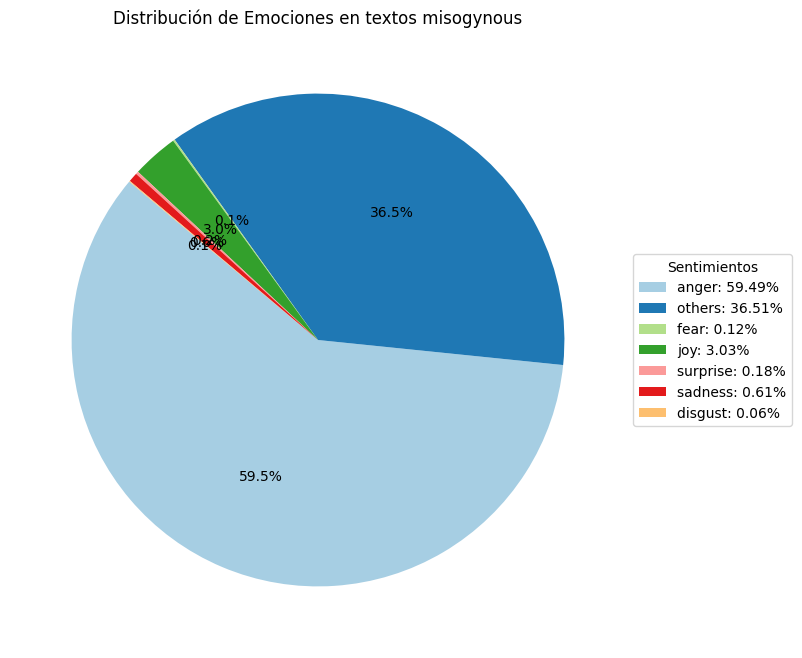

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_emotion_percentages_misogynous.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Emociones en textos misogynous")
legend_labels = [f"{emotion}: {percentage:.2f}%" for emotion, percentage in overall_emotion_percentages_misogynous.items()]
ax.legend(wedges, legend_labels, title="Emociones", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [44]:
print("\nEjemplos de cada tipo de emocion en textos misogynous:")
for sent_type, example in examples_per_emotion_misogynous.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos misogynous:
anger: ['@Nanchinho A ver si haces algo que sirva para mejorar el mundo, hija de puta @barbijaputa', '@Otb_35 Que te calles so guarra.', '@ian_delaCalva @IrantzuVarela @pikaramagazine Oye por qué no molestas a tu puta madre?', '@EdiiXI @lidiahdlgo Cállate tu !! Perra', '@BedMM @NayBetania Tú eres la culpable, perra >:v', 'Yo no puedo creer que las propias mujeres naturalicen una violación o acoso y lo justifiquen con que la mujer es la que “provoca”. Que mente de mierda la puta madre', 'LA MUJER ES MUY ZORRA,SABE COMO Y Q HACER,PARA CAGAR A UN TIPO,MAS SI EL TIPO ESTA ENAMORADO,o es un boludo,que le cree todo,le compra todo,le da todos los gustos,y termina cagado,,Yo solo quiero recuperar a mi hijo,,esa mina,se lo llevo,no me deja verlo, https://t.co/LC56ZBBOli', '@pprecuero @EdGrimaldo Ni tas trabajando perra callate.', 'Nada más vulgar y de mala educación entrar a mi casa y gritarme sin saber de que me habla. TE MERECES EL I


-----------------------------------------------

### Tweets no misogynous

-----------------------------------------------


In [45]:
text_not_misogynous = [text for text in df_ibereval[df_ibereval["misogynous"] == 0]["text"].tolist()]
results_emotion_analysis_not_misogynous = [analyze_emotion(text) for text in tqdm(text_not_misogynous)]

  0%|          | 8/1658 [00:00<00:21, 77.93it/s]


-----------------------
Texto analizado: Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3
Emoción detectada: others
Probabilidades: {'others': 0.9815187454223633, 'joy': 0.0013672540662810206, 'sadness': 0.0013585332781076431, 'anger': 0.00588965741917491, 'surprise': 0.0041065881960093975, 'disgust': 0.002112339483574033, 'fear': 0.0036468347534537315}

-----------------------
Texto analizado: @Causafiebres Claro, es que ha puesto imbécil y muchas se han dado por aludidas, por eso ahora están con ella a acoso y derribo.
Emoción detectada: anger
Probabilidades: {'others': 0.3795000910758972, 'joy': 0.004119607154279947, 'sadness': 0.009710158221423626, 'anger': 0.5471256971359253, 'surprise': 0.004352930001914501, 'disgust': 0.052624769508838654, 'fear': 0.0025667534209787846}

-----------------------
Texto analizado: Quiero pegarte pq estás bien imbécil y después darte un besito. 🙂
Emoción detectada: 

  1%|          | 16/1658 [00:00<00:21, 77.08it/s]


-----------------------
Texto analizado: @KiraraPixel Ah no, ella no es zorra es libre, el que es imbécil es el que tiene pareja y no hace más que ir detrás de otros XD
Emoción detectada: anger
Probabilidades: {'others': 0.13397620618343353, 'joy': 0.012020879425108433, 'sadness': 0.012339933775365353, 'anger': 0.7576530575752258, 'surprise': 0.002145234262570739, 'disgust': 0.08066489547491074, 'fear': 0.001199855119921267}

-----------------------
Texto analizado: @DalasReview @jk_rowling Hijo de puta muerete asqueroso no te mereces esa mierda
Emoción detectada: anger
Probabilidades: {'others': 0.002441123593598604, 'joy': 0.0013889961410313845, 'sadness': 0.00244089774787426, 'anger': 0.7879273891448975, 'surprise': 0.0010810578241944313, 'disgust': 0.20284774899482727, 'fear': 0.0018727983115240932}


  1%|▏         | 24/1658 [00:00<00:21, 77.12it/s]


-----------------------
Texto analizado: @Wachit0 @100Akshat @_Midoriyaa_ @NeohSJ La idea está la polla con cebolla pero obviamente no todos van a entrar por desconfianza, pero entrarán los que quieran ir y tengan confianza
Emoción detectada: others
Probabilidades: {'others': 0.9631765484809875, 'joy': 0.01489188615232706, 'sadness': 0.006552716717123985, 'anger': 0.005618887487798929, 'surprise': 0.0030783151742070913, 'disgust': 0.0022678931709378958, 'fear': 0.004413647577166557}

-----------------------
Texto analizado: @ngelSnchezC1 @jfitzgerald_86 @JavaliVerruga @LeticiaDolera No son horas de estar tocándonos en coño a 1 de enero, caballeros, dispérsense.
Emoción detectada: anger
Probabilidades: {'others': 0.18570835888385773, 'joy': 0.0021310073789209127, 'sadness': 0.01759541966021061, 'anger': 0.735916256904602, 'surprise': 0.006476968061178923, 'disgust': 0.0398443378508091, 'fear': 0.012327650561928749}

-----------------------
Texto analizado: le dije a mi mamá que extraña

  2%|▏         | 33/1658 [00:00<00:20, 78.68it/s]


-----------------------
Texto analizado: @vanessagirona @KRLS @mossos Vienes a las mías..., 'políticos' no España, con Franco eso no pasaba teníais lo que queríais, todos por igual, el fanatismo por la independencia llegó después con atontaos a los que votamos, yo soy de c's por innovar no por o
Emoción detectada: anger
Probabilidades: {'others': 0.08234426379203796, 'joy': 0.014395144768059254, 'sadness': 0.016261186450719833, 'anger': 0.8317171931266785, 'surprise': 0.0008359432104043663, 'disgust': 0.05355774238705635, 'fear': 0.0008885332499630749}

-----------------------
Texto analizado: @Reforma @aurelionuno No seas hijo de puta Nuño según tu eres representante de la educación puto viejo chismoso chupate mi verga.....
Emoción detectada: anger
Probabilidades: {'others': 0.009512968361377716, 'joy': 0.0014580864226445556, 'sadness': 0.001713282661512494, 'anger': 0.9367673397064209, 'surprise': 0.0014867085264995694, 'disgust': 0.04772913083434105, 'fear': 0.0013324785977602005}


  2%|▏         | 41/1658 [00:00<00:20, 78.17it/s]


-----------------------
Texto analizado: @Barbijaputa Por culpa de los petardos tengo unos amigos locos por encontrar a su perrita. Se les escapó y salió huyendo por el ruido. https://t.co/pw4b7kWwoc
Emoción detectada: others
Probabilidades: {'others': 0.36378714442253113, 'joy': 0.015453481115400791, 'sadness': 0.3069866895675659, 'anger': 0.07913404703140259, 'surprise': 0.024658361449837685, 'disgust': 0.02898261323571205, 'fear': 0.1809975802898407}

-----------------------
Texto analizado: DIPUTADOS.HIJOS DE PUTA Q. VAN A PROVOCAR A LOS GENDARMES . QUIENES SON ?? KMAXIMO DEL CAÑO MORO BREGMAN CUANDO LUCHARON ×LOS JUBILADOS??
Emoción detectada: anger
Probabilidades: {'others': 0.0017399127827957273, 'joy': 0.0007740674773231149, 'sadness': 0.0014043927658349276, 'anger': 0.8792691230773926, 'surprise': 0.0011845016852021217, 'disgust': 0.11387985199689865, 'fear': 0.001748218317516148}

-----------------------
Texto analizado: Pegarte en la cara con un sartén > ver Friends. https:

  3%|▎         | 49/1658 [00:00<00:20, 78.57it/s]


-----------------------
Texto analizado: Para el tal uranium ese todo el puto sol en la cara voy a autodestruir la polla
Emoción detectada: anger
Probabilidades: {'others': 0.03935432434082031, 'joy': 0.008935336023569107, 'sadness': 0.0017525363946333528, 'anger': 0.8659161925315857, 'surprise': 0.020506147295236588, 'disgust': 0.05785466358065605, 'fear': 0.005680747330188751}

-----------------------
Texto analizado: @OrgMujeresCI Estoy de acuerdo, pero no sé puede minimizar o relativizar la violación o el acoso sexual. Sea de rocas y famosas o no
Emoción detectada: anger
Probabilidades: {'others': 0.1895640343427658, 'joy': 0.002699272707104683, 'sadness': 0.02741304226219654, 'anger': 0.7215448617935181, 'surprise': 0.0029910868033766747, 'disgust': 0.05380919948220253, 'fear': 0.0019784558098763227}

-----------------------
Texto analizado: @anaisbernal Pásalo muy bien,te lo mereces 😘😘
Emoción detectada: joy
Probabilidades: {'others': 0.018988555297255516, 'joy': 0.9739171266555

  3%|▎         | 57/1658 [00:00<00:20, 77.05it/s]


-----------------------
Texto analizado: @HuxGeneraI « hijo de perra. Por supuesto no lo haría, solo el muy bastardo se lo merecía por intentar siempre menospreciarle .... Si los golpes no funcionaban, habría de intimidarlo aún de la manera más repugnante —
Emoción detectada: anger
Probabilidades: {'others': 0.0017033407930284739, 'joy': 0.0010283644078299403, 'sadness': 0.0024683841038495302, 'anger': 0.794212281703949, 'surprise': 0.001092595630325377, 'disgust': 0.19818337261676788, 'fear': 0.0013116466579958797}

-----------------------
Texto analizado: @erreleny @Fel_blan Buena descripción, aunque se te ha olvidado decir la puta moralina. Todos tienen que ENSEÑARTE y EDUCARTE con su puta moralina de los cojones. Es una serie muy milenial.
Emoción detectada: anger
Probabilidades: {'others': 0.13248418271541595, 'joy': 0.006283487658947706, 'sadness': 0.003739285981282592, 'anger': 0.8290120363235474, 'surprise': 0.0023253299295902252, 'disgust': 0.025088516995310783, 'fear': 0.001

  4%|▍         | 65/1658 [00:00<00:21, 73.85it/s]


-----------------------
Texto analizado: @FreddyGuevaraC @NTN24 Callate q estas preso hijo de tu puta mae
Emoción detectada: anger
Probabilidades: {'others': 0.00939569529145956, 'joy': 0.0013619118835777044, 'sadness': 0.001390828867442906, 'anger': 0.9107202887535095, 'surprise': 0.0016189167508855462, 'disgust': 0.07382557541131973, 'fear': 0.0016867979429662228}

-----------------------
Texto analizado: Tengo frío en mis piernitas.... ahhh pero quería venir en perra enseñando pierna no?
Emoción detectada: others
Probabilidades: {'others': 0.9098376035690308, 'joy': 0.02158263325691223, 'sadness': 0.015375372022390366, 'anger': 0.010672897100448608, 'surprise': 0.007307812105864286, 'disgust': 0.003870522603392601, 'fear': 0.03135327249765396}

-----------------------
Texto analizado: Todos estan negados a enseñarme a manejar hijos de puta ya los voy a atropellar tarde o temprano
Emoción detectada: anger
Probabilidades: {'others': 0.002519849222153425, 'joy': 0.0009005391038954258,

  4%|▍         | 73/1658 [00:00<00:21, 74.84it/s]


-----------------------
Texto analizado: Una violación cada 8 horas en españa Más de 1000 asesinatos machistas desde 2003 Todas hemos sufrido acoso callejero alguna vez Pero oye, son casos aislados y somos unas exageradas porque 'vivimos en uno de los mejores países del mundo' https://t.co/mcSF1sGWQn
Emoción detectada: anger
Probabilidades: {'others': 0.012170886620879173, 'joy': 0.001219889149069786, 'sadness': 0.008540281094610691, 'anger': 0.8706834316253662, 'surprise': 0.007055660244077444, 'disgust': 0.0977424830198288, 'fear': 0.002587338211014867}

-----------------------
Texto analizado: @raykrai tú eres ninini: ni estudias, ni trabajas, ni haces puta gracia
Emoción detectada: anger
Probabilidades: {'others': 0.39670178294181824, 'joy': 0.005935597233474255, 'sadness': 0.005535472184419632, 'anger': 0.5562285780906677, 'surprise': 0.0019458724418655038, 'disgust': 0.03182525560259819, 'fear': 0.0018273836467415094}

-----------------------
Texto analizado: Hoy es lunes con l 

  5%|▍         | 81/1658 [00:01<00:20, 75.73it/s]


-----------------------
Texto analizado: @IrantzuVarela Mezclas conceptos, hablar de acoso es una cosa, de sexo o violación es otra. El acoso es no aceptar un no, es usar palabras groseras, pero no saludar, presentarse, invitar a un café una sola vez, aceptando el si o el no como respuesta, o in
Emoción detectada: anger
Probabilidades: {'others': 0.3862394094467163, 'joy': 0.0011614133836701512, 'sadness': 0.022752795368433, 'anger': 0.5620598196983337, 'surprise': 0.00209409580565989, 'disgust': 0.02393362484872341, 'fear': 0.0017588305054232478}

-----------------------
Texto analizado: @MashiRafael Ya cállate rechucha de tu madre y traga de tu misma medicina hijo de la gran puta!!! Tirano cobarde y dictador
Emoción detectada: anger
Probabilidades: {'others': 0.0035902466624975204, 'joy': 0.0009885152103379369, 'sadness': 0.0015695503680035472, 'anger': 0.9253422617912292, 'surprise': 0.0008218214497901499, 'disgust': 0.06634484976530075, 'fear': 0.0013426983496174216}

------------

  5%|▌         | 89/1658 [00:01<00:20, 75.55it/s]


-----------------------
Texto analizado: @Mzavalagc Oiga ¿y todas las victimas de acoso y violacion consecuencia de la espiral de violencia desatada por @FelipeCalderon para desviar la atención del fraude de 2006? Esas que no tienen voz por no ser figura pública ¿usted ahora sí las va a represen
Emoción detectada: anger
Probabilidades: {'others': 0.27821066975593567, 'joy': 0.0011711540864780545, 'sadness': 0.014609442092478275, 'anger': 0.616723358631134, 'surprise': 0.011201148852705956, 'disgust': 0.0721036046743393, 'fear': 0.005980607122182846}

-----------------------
Texto analizado: Hijos de puta! Os merecéis lo peor... Q asco me dais! 😭😠 https://t.co/MOHv2yINgd
Emoción detectada: anger
Probabilidades: {'others': 0.0009652113076299429, 'joy': 0.0011153713567182422, 'sadness': 0.003240391844883561, 'anger': 0.7422231435775757, 'surprise': 0.0009182711946777999, 'disgust': 0.2495880126953125, 'fear': 0.0019496661843732}

-----------------------
Texto analizado: @TimoFARC @ONU_es

  6%|▌         | 97/1658 [00:01<00:20, 76.67it/s]


-----------------------
Texto analizado: @cobaiabaia Al menos en 13rsw, creo que no idealizan el suicidio ni el acoso o la violación y dan un mensaje, sin embargo en esta serie me da la sensación de que pintan como super guay ser un psicópata.
Emoción detectada: anger
Probabilidades: {'others': 0.18542896211147308, 'joy': 0.001961119007319212, 'sadness': 0.23054519295692444, 'anger': 0.3647983968257904, 'surprise': 0.007177107501775026, 'disgust': 0.1888057440519333, 'fear': 0.021283423528075218}

-----------------------
Texto analizado: @DeluxeSabado @gusgonzalves Un imbécil que dice ahora el payaso este la zarigueña y gema de las infidelidades de Kiko Rivera eh sois escoria
Emoción detectada: anger
Probabilidades: {'others': 0.0013406474608927965, 'joy': 0.0008436799398623407, 'sadness': 0.0014215887058526278, 'anger': 0.8324933052062988, 'surprise': 0.0008379018981941044, 'disgust': 0.16198326647281647, 'fear': 0.0010795859852805734}

-----------------------
Texto analizado: @xVolk

  6%|▋         | 105/1658 [00:01<00:20, 77.35it/s]


-----------------------
Texto analizado: @Barbijaputa este pequeñajo lleva dos días pegado a mi por culpa de los putos petardos https://t.co/4jBvYLFG3O
Emoción detectada: anger
Probabilidades: {'others': 0.013959481380879879, 'joy': 0.003446926362812519, 'sadness': 0.006043172441422939, 'anger': 0.9201013445854187, 'surprise': 0.0033544600009918213, 'disgust': 0.04495658725500107, 'fear': 0.00813810620456934}

-----------------------
Texto analizado: 'No eres una perra para advertir enseñando los dientes. Ahora, ven conmigo. Siéntate, observemos a los humanos celebrar su nuevo ciclo anual.'
Emoción detectada: others
Probabilidades: {'others': 0.9593451619148254, 'joy': 0.036199551075696945, 'sadness': 0.0010609334567561746, 'anger': 0.0007470157579518855, 'surprise': 0.0019370655063539743, 'disgust': 0.00017255502461921424, 'fear': 0.0005377634079195559}

-----------------------
Texto analizado: @cristinadevonne Ni tú eres perra ni yo soy un gato, mi corazón de repuesto, se muere por 

  7%|▋         | 113/1658 [00:01<00:19, 77.75it/s]


-----------------------
Texto analizado: @anaisbernal @sextaNoticias Ocultarse para actuar, esconder el cuerpo del delito, inventarse coartadas, etc., no son índices de que sabes lo que has hecho, sabes que está muy mal hecho y por ello estás muy cuerdo?
Emoción detectada: anger
Probabilidades: {'others': 0.012578247115015984, 'joy': 0.00046962982742115855, 'sadness': 0.0037530765403062105, 'anger': 0.8628475069999695, 'surprise': 0.0033778687939047813, 'disgust': 0.11319974809885025, 'fear': 0.0037739670369774103}

-----------------------
Texto analizado: @PadreJosePalmar CÁLLATE LA JETA PADRE HIJO DE PERRA.!!! https://t.co/VgE9Vq8WTC
Emoción detectada: anger
Probabilidades: {'others': 0.0026561289560049772, 'joy': 0.0012133404379710555, 'sadness': 0.0014612143859267235, 'anger': 0.9189882874488831, 'surprise': 0.001243501901626587, 'disgust': 0.07301637530326843, 'fear': 0.0014210381777957082}


  7%|▋         | 122/1658 [00:01<00:19, 79.79it/s]


-----------------------
Texto analizado: Prisión preventiva contra jefe policial acusado de violación y acoso sexual - En audiencia inicial el juez de Paz de Guazapa, resolvió este día enviar a prisión preventiva al inspector de la Policía Nacional Civil, Pablo de la Cruz Díaz Bernabe, a qui... https://t.co/jK51nEYcXV
Emoción detectada: others
Probabilidades: {'others': 0.9918510317802429, 'joy': 0.0012184284860268235, 'sadness': 0.0011837371857836843, 'anger': 0.0016343105817213655, 'surprise': 0.002302402164787054, 'disgust': 0.0005065345321781933, 'fear': 0.0013035546289756894}

-----------------------
Texto analizado: @PhilipMarlowe10 @quimforn Tu eres un poco bastante hijo de la gran puta no? Y no es una pregunta cabronazo. Es una jodida afirmación #alertaporhijodeputa #alertacabronazo #alertatuputamadre
Emoción detectada: anger
Probabilidades: {'others': 0.006261663977056742, 'joy': 0.001218325924128294, 'sadness': 0.001066309167072177, 'anger': 0.9400632977485657, 'surprise': 0

  8%|▊         | 139/1658 [00:01<00:20, 74.19it/s]


-----------------------
Texto analizado: @LaailaMontiel Ensuciar a alguien por resentida por así decirlo o algún motivo que no sea acoso , violación o maltrato es una pelotudes tremenda !!! Dejen vivir a la gente que no hizo nada y ensucien al que en verdad se lo merece.
Emoción detectada: anger
Probabilidades: {'others': 0.0011843210086226463, 'joy': 0.00045571441296488047, 'sadness': 0.0036364940460771322, 'anger': 0.9164908528327942, 'surprise': 0.0007921180222183466, 'disgust': 0.07656580209732056, 'fear': 0.0008746525854803622}

-----------------------
Texto analizado: hijo de puta t dije q te iba a enseñar de sonido
Emoción detectada: anger
Probabilidades: {'others': 0.33613476157188416, 'joy': 0.05062152445316315, 'sadness': 0.0081449830904603, 'anger': 0.48046210408210754, 'surprise': 0.03979367017745972, 'disgust': 0.07559570670127869, 'fear': 0.009247226640582085}

-----------------------
Texto analizado: 'Y ésta canción se la dedico a mi perra (Laika) . Tú eres mi Laiki Mi 

  9%|▉         | 156/1658 [00:02<00:19, 77.63it/s]


-----------------------
Texto analizado: Relaja la polla que nadie se merece a semejante imbecil como tú, no te preocupes que nadie se va a acercar a un idiota integral https://t.co/Y5A65WAUtj
Emoción detectada: anger
Probabilidades: {'others': 0.0052802469581365585, 'joy': 0.0021243251394480467, 'sadness': 0.002104296814650297, 'anger': 0.9062210321426392, 'surprise': 0.0009874239331111312, 'disgust': 0.08217880129814148, 'fear': 0.0011039114324375987}

-----------------------
Texto analizado: @anaisbernal @AmparoRubiales Por ello está la ley que no ha salido por culpa de los dos partidos de derechas PP y CS. La ley de la violencia de género es muy necesaria que se revise no es no. Así es el patriarcado no puede seguir campando por sus respeto,
Emoción detectada: anger
Probabilidades: {'others': 0.13446514308452606, 'joy': 0.002195482375100255, 'sadness': 0.009661426767706871, 'anger': 0.8063395023345947, 'surprise': 0.0009983459021896124, 'disgust': 0.04506698250770569, 'fear': 0.00

 10%|█         | 173/1658 [00:02<00:18, 79.59it/s]


-----------------------
Texto analizado: Minimo denuncia por acoso sexual e intento de violacion telepatica https://t.co/ToVK3NlOtH
Emoción detectada: anger
Probabilidades: {'others': 0.418280690908432, 'joy': 0.0019711186178028584, 'sadness': 0.009509673342108727, 'anger': 0.4536358118057251, 'surprise': 0.025893637910485268, 'disgust': 0.06816791743040085, 'fear': 0.022541139274835587}

-----------------------
Texto analizado: @peri_getafe Callate q se me piro la cabeza y al final no puje q puta cabeza
Emoción detectada: anger
Probabilidades: {'others': 0.1083618551492691, 'joy': 0.016902176663279533, 'sadness': 0.006415904965251684, 'anger': 0.7230774164199829, 'surprise': 0.0903409868478775, 'disgust': 0.0403837226331234, 'fear': 0.014517947100102901}

-----------------------
Texto analizado: Te pego con un Fierro en la cara y lo Doblas todo culia imagínate lo dura que la tenes
Emoción detectada: others
Probabilidades: {'others': 0.5723413228988647, 'joy': 0.018902473151683807, 's

 11%|█▏        | 190/1658 [00:02<00:18, 80.25it/s]


-----------------------
Texto analizado: El mismo chorro cara dura nos viene a vender las cadenas que nos robó en invierno, ojalá pronto terminés donde merecés hijo de re mil puta
Emoción detectada: anger
Probabilidades: {'others': 0.0014346017269417644, 'joy': 0.0013030718546360731, 'sadness': 0.0020801157224923372, 'anger': 0.814843475818634, 'surprise': 0.0010807245271280408, 'disgust': 0.17765136063098907, 'fear': 0.0016066579846665263}

-----------------------
Texto analizado: @BusiPiscinas Será el texto? 🤔 Que la gente es muy guarra...
Emoción detectada: others
Probabilidades: {'others': 0.7954763174057007, 'joy': 0.00492093013599515, 'sadness': 0.008809424005448818, 'anger': 0.10731044411659241, 'surprise': 0.046879179775714874, 'disgust': 0.027346845716238022, 'fear': 0.009256904944777489}

-----------------------
Texto analizado: @Relatofeminista Su puta madre (No lo paro de oír).
Emoción detectada: others
Probabilidades: {'others': 0.4207068979740143, 'joy': 0.08269490301609

 13%|█▎        | 208/1658 [00:02<00:18, 80.51it/s]


-----------------------
Texto analizado: Que hijos de puta como estos estén en la calle solo pueden provocar este tipo d cosas. El detenido por el crimen de Víctor Laínez ya cumplió condena por dejar tetrapléjico a un policía en Barcelona https://t.co/3hwGtBPxTj
Emoción detectada: anger
Probabilidades: {'others': 0.0014608161291107535, 'joy': 0.0005396580672822893, 'sadness': 0.0022242467384785414, 'anger': 0.7317848205566406, 'surprise': 0.00144083215855062, 'disgust': 0.2596769332885742, 'fear': 0.0028727592434734106}

-----------------------
Texto analizado: Y no minimizar acoso ,no hay que llegar al punto de una violacion para hacer algo https://t.co/Jblj2L8kkx
Emoción detectada: anger
Probabilidades: {'others': 0.08747103810310364, 'joy': 0.0009569186368025839, 'sadness': 0.012814509682357311, 'anger': 0.8390915393829346, 'surprise': 0.005018121562898159, 'disgust': 0.050880879163742065, 'fear': 0.0037669846788048744}

-----------------------
Texto analizado: @ramongrauserra @fma

 13%|█▎        | 217/1658 [00:02<00:18, 76.31it/s]


-----------------------
Texto analizado: @schmidtpil El imbecil creia que habia quimica... Como la pelicula de Demi moore.. el acoso es un asunto de poder y control.. La causa del abuso es el isoso arbitrario de los limites de la dignidad para controlar otra persona a si capricho....
Emoción detectada: anger
Probabilidades: {'others': 0.00294311810284853, 'joy': 0.00034814426908269525, 'sadness': 0.0038681079167872667, 'anger': 0.9137397408485413, 'surprise': 0.0011267431546002626, 'disgust': 0.07701393961906433, 'fear': 0.000960164179559797}

-----------------------
Texto analizado: CUANDO VAN A ENTENDER QUE CON ESOS TEMAS NO SE BROMEAN SI TU HACES BROMAS SOBRE LA PEDOFILIA, VIOLACION O ACOSO SEXUAL ERES UNA MIERDA DE PERSONA
Emoción detectada: anger
Probabilidades: {'others': 0.002073037438094616, 'joy': 0.0005500902771018445, 'sadness': 0.0027671940624713898, 'anger': 0.9161040186882019, 'surprise': 0.0007232024800032377, 'disgust': 0.07687535136938095, 'fear': 0.000907058769371360

 14%|█▎        | 226/1658 [00:02<00:18, 77.79it/s]


-----------------------
Texto analizado: @AjitPaiFCC mereces morirte pedazo de mierda hijo de puta ojalá te entren un millón de tumores en el p uto cerebro hijo de la gran zorra.
Emoción detectada: anger
Probabilidades: {'others': 0.002502838848158717, 'joy': 0.0016065295785665512, 'sadness': 0.0024797916412353516, 'anger': 0.8052629232406616, 'surprise': 0.001284669153392315, 'disgust': 0.18465742468833923, 'fear': 0.002205868950113654}

-----------------------
Texto analizado: @LaDivinaDiva Callate maldita perra. O seguro eres un pobre marico detras de un user femenino. Chavista colaborador
Emoción detectada: anger
Probabilidades: {'others': 0.005261735524982214, 'joy': 0.0012235908070579171, 'sadness': 0.0020970937330275774, 'anger': 0.8848651051521301, 'surprise': 0.0010266791796311736, 'disgust': 0.10417857766151428, 'fear': 0.0013471904676407576}

-----------------------
Texto analizado: Ya era hora coño una puta actuación como se merecía bravo Cepeda. #OTGala9
Emoción detectada

 14%|█▍        | 235/1658 [00:03<00:17, 79.52it/s]


-----------------------
Texto analizado: @laverde1976 Podrá sentir lo que usted quiera, pero no es violación ni acoso sexual. Y es usted quien debe detenerlo.
Emoción detectada: others
Probabilidades: {'others': 0.6997957229614258, 'joy': 0.0034398469142615795, 'sadness': 0.011560413055121899, 'anger': 0.2211310714483261, 'surprise': 0.00561405997723341, 'disgust': 0.05095038190484047, 'fear': 0.007508441805839539}

-----------------------
Texto analizado: Sacar a un imbécil borracho no es la mejor idea para acreditar la realidad del acoso que practican los golpistas de la estelada. https://t.co/SVF5zLapb2
Emoción detectada: anger
Probabilidades: {'others': 0.002457006135955453, 'joy': 0.000519630266353488, 'sadness': 0.002012956654652953, 'anger': 0.8947750329971313, 'surprise': 0.0005174968391656876, 'disgust': 0.09907286614179611, 'fear': 0.0006449812208302319}

-----------------------
Texto analizado: @anaisbernal Esto no puede ser ni puta vergüenza tienen estos jueces
Emoción det

 15%|█▍        | 244/1658 [00:03<00:17, 80.64it/s]


-----------------------
Texto analizado: Comemela XDDD y la cara también!! 🤣🤣🤣🤣🤣 — No nos pasemos 👀 https://t.co/t3o5yHY0zb
Emoción detectada: others
Probabilidades: {'others': 0.5990725755691528, 'joy': 0.23372024297714233, 'sadness': 0.004130828194320202, 'anger': 0.10713404417037964, 'surprise': 0.03240848705172539, 'disgust': 0.020203810185194016, 'fear': 0.003329999977722764}

-----------------------
Texto analizado: -¿Porque la esatua de la libertad es mujer? -Porque se nescesitaba una cabeza hueca para hacer un mirador
Emoción detectada: others
Probabilidades: {'others': 0.9551492929458618, 'joy': 0.0026829522103071213, 'sadness': 0.0046812319196760654, 'anger': 0.02356538362801075, 'surprise': 0.00823421124368906, 'disgust': 0.004153961781412363, 'fear': 0.001533044152893126}

-----------------------
Texto analizado: Aguante la represión la puta madre!!! A estos negros de mierda hay que cagarlos a palos y enseñarles quien manda!
Emoción detectada: anger
Probabilidades: {'other

 15%|█▌        | 253/1658 [00:03<00:17, 79.58it/s]


-----------------------
Texto analizado: @Tomichillado @agusbertin_ Sos un hijo de puta pero te mereces q te de un sanguche de milanesa
Emoción detectada: anger
Probabilidades: {'others': 0.024217801168560982, 'joy': 0.0035749541129916906, 'sadness': 0.0050423587672412395, 'anger': 0.6749992966651917, 'surprise': 0.003530109766870737, 'disgust': 0.28507572412490845, 'fear': 0.003559782402589917}

-----------------------
Texto analizado: @HenriFalconLara No digas nada que tú eres cómplice de lo que está pasando... y recuerda seguirás siendo la perra más perra de Venezuela
Emoción detectada: anger
Probabilidades: {'others': 0.01797465793788433, 'joy': 0.0020262019243091345, 'sadness': 0.004869464319199324, 'anger': 0.8227173686027527, 'surprise': 0.0012320809764787555, 'disgust': 0.1496744006872177, 'fear': 0.0015058695571497083}

-----------------------
Texto analizado: @ElInformanteMX @Cabify_Mexico Pinche bastardo ojalá un dia me lo tope para enseñarle a no ser un hijo de su puta mad

 16%|█▌        | 262/1658 [00:03<00:17, 81.05it/s]


-----------------------
Texto analizado: @joohexnlee // QUE NO TE PEGO UNA PEGATINA EN LA CARA NO MÁS
Emoción detectada: others
Probabilidades: {'others': 0.9698202610015869, 'joy': 0.0009520626626908779, 'sadness': 0.006683818995952606, 'anger': 0.012813529931008816, 'surprise': 0.005461183842271566, 'disgust': 0.0031682925764471292, 'fear': 0.001100899768061936}

-----------------------
Texto analizado: Movimiento SEMEN! https://t.co/O9SInApXXR
Emoción detectada: others
Probabilidades: {'others': 0.5074625015258789, 'joy': 0.3201613426208496, 'sadness': 0.0016267651226371527, 'anger': 0.003191185649484396, 'surprise': 0.1598445475101471, 'disgust': 0.002315475605428219, 'fear': 0.00539817102253437}

-----------------------
Texto analizado: Jejeje 'Puta Madre .... No me lo saques' jejeje tú eres lo máximo Kendall https://t.co/8cDbJPVYJq
Emoción detectada: joy
Probabilidades: {'others': 0.12655659019947052, 'joy': 0.8399603366851807, 'sadness': 0.0007746526971459389, 'anger': 0.001925

 16%|█▋        | 271/1658 [00:03<00:17, 80.30it/s]


-----------------------
Texto analizado: Merecido después de dos semanas enseñando la ruta más perra en busca la historia de fedex 😌😌😌 https://t.co/b1rwNUrA4o
Emoción detectada: joy
Probabilidades: {'others': 0.13857446610927582, 'joy': 0.8520358204841614, 'sadness': 0.0007324180332943797, 'anger': 0.00044948613503947854, 'surprise': 0.007498397491872311, 'disgust': 0.00031349738128483295, 'fear': 0.00039598162402398884}

-----------------------
Texto analizado: @anaisbernal Sigo pensando con el vómito en la garganta a punto de echarlo que a estos hay que gastarlos y al juez también. Por muy bruta que quede en este momento hasta la castración me parece poco
Emoción detectada: anger
Probabilidades: {'others': 0.0022268665488809347, 'joy': 0.0005865462590008974, 'sadness': 0.0033909594640135765, 'anger': 0.7713855504989624, 'surprise': 0.003725426970049739, 'disgust': 0.21497349441051483, 'fear': 0.0037111807614564896}

-----------------------
Texto analizado: @hydrasitoo Mira hydrox de

 17%|█▋        | 288/1658 [00:03<00:19, 68.87it/s]


-----------------------
Texto analizado: @RinconFortnite Me parece que si la foto gente ya es guarra usando los arbustos del mapa y no los de objetos ya con esto es el siguiente level para guarrear porque eres invisible y no se te oye
Emoción detectada: anger
Probabilidades: {'others': 0.35607466101646423, 'joy': 0.003941553179174662, 'sadness': 0.013615664094686508, 'anger': 0.5913836359977722, 'surprise': 0.003832224290817976, 'disgust': 0.029483376070857048, 'fear': 0.0016689324984326959}

-----------------------
Texto analizado: @telecincoes @gusgonzalves Te mereces quedarte sin nada¡Tu crees que si a la mujer que yo quiero le llamaran puta yo no me iba a levantar....Y ADEMAS QUE MAS DA ,SU TRABAJO ,VAMOS A VER,ERES UN COBARDE Y UNA MIERDA DE TIO,Que decepcion...mas vale quedarte
Emoción detectada: anger
Probabilidades: {'others': 0.0017427157144993544, 'joy': 0.0011248030932620168, 'sadness': 0.004140161443501711, 'anger': 0.7847162485122681, 'surprise': 0.0010349954245612025, 'd

 18%|█▊        | 296/1658 [00:03<00:22, 59.64it/s]


-----------------------
Texto analizado: Por favor... http://t.co/NS6D55DTdu
Emoción detectada: others
Probabilidades: {'others': 0.46886274218559265, 'joy': 0.000981452176347375, 'sadness': 0.05311841890215874, 'anger': 0.40999269485473633, 'surprise': 0.01646551489830017, 'disgust': 0.03789158910512924, 'fear': 0.012687599286437035}

-----------------------
Texto analizado: @BebeVitaReal @BebeMiloYT Te madro bebe milo verdad se te ve en la cara que te pego
Emoción detectada: others
Probabilidades: {'others': 0.9810118675231934, 'joy': 0.002343487460166216, 'sadness': 0.003821827471256256, 'anger': 0.004187788348644972, 'surprise': 0.005384503398090601, 'disgust': 0.001854965346865356, 'fear': 0.0013954954920336604}

-----------------------
Texto analizado: @LeticiaDolera El arte de la vida es aprender y enseñar y seguir aprendiendo,para seguir enseñando......
Emoción detectada: others
Probabilidades: {'others': 0.8171448707580566, 'joy': 0.1790710836648941, 'sadness': 0.001124758855

 19%|█▊        | 310/1658 [00:04<00:22, 60.44it/s]


-----------------------
Texto analizado: @Pambisita_1568 @s0ymia Sucio* coges* sobra* zorra* novia* jajajajajaj* eres muy imbécil wey osea que asco das nunca en tu vida has visto un diccionario o que?
Emoción detectada: anger
Probabilidades: {'others': 0.015033555217087269, 'joy': 0.0023268908262252808, 'sadness': 0.006273843813687563, 'anger': 0.7986432313919067, 'surprise': 0.004275149200111628, 'disgust': 0.17063872516155243, 'fear': 0.0028086176607757807}

-----------------------
Texto analizado: @el_dinamo Callate viejo culiao. Hijo de puta. Las mil perras q te parieron....complice de asesinatos y torturas a compatriotas. Muerete de una vez.....maldito.
Emoción detectada: anger
Probabilidades: {'others': 0.0017761790659278631, 'joy': 0.0012757487129420042, 'sadness': 0.0022719234693795443, 'anger': 0.8615649938583374, 'surprise': 0.0008076944504864514, 'disgust': 0.1307930201292038, 'fear': 0.0015105174388736486}

-----------------------
Texto analizado: @passion_vigna Igual lei 

 20%|█▉        | 324/1658 [00:04<00:21, 62.48it/s]


-----------------------
Texto analizado: @WilfredoNc @diegobuenavent1 @dcabellor @alejabolivarian @chavezcandanga Que hijo de perra eres cállate idiota
Emoción detectada: anger
Probabilidades: {'others': 0.007039611227810383, 'joy': 0.001637585461139679, 'sadness': 0.0014535699738189578, 'anger': 0.9288163781166077, 'surprise': 0.002218192210420966, 'disgust': 0.05708051100373268, 'fear': 0.001754051772877574}

-----------------------
Texto analizado: No entiendo por que nunca me puedo quedar callada cuando me dicen algo la puta madre siempre tengo que insultar😡
Emoción detectada: anger
Probabilidades: {'others': 0.003963947296142578, 'joy': 0.0005509878974407911, 'sadness': 0.0009345081052742898, 'anger': 0.9699422717094421, 'surprise': 0.0015827908646315336, 'disgust': 0.021504061296582222, 'fear': 0.0015214571030810475}

-----------------------
Texto analizado: @jabuffarini te mereces lo peor hijo de puta. Preparate para la rotura de ligamentos mala leche de mierda. Bostarini la co

 20%|█▉        | 331/1658 [00:04<00:22, 59.18it/s]


-----------------------
Texto analizado: @Luis050876 @EspanaTovio @CeDemocratico mmmmm ese es el argumento cínico que usan algunos para justificar una violación o acoso
Emoción detectada: anger
Probabilidades: {'others': 0.005096700508147478, 'joy': 0.0005261242622509599, 'sadness': 0.0038677186239510775, 'anger': 0.899146318435669, 'surprise': 0.0009040834265761077, 'disgust': 0.08960861712694168, 'fear': 0.0008505293517373502}

-----------------------
Texto analizado: @Flowypanda Pero Flow, las mujeres son seres de luz! Gracias, lo peor de todo es que la gente le da rt a su puta mierda de tweet manipulador...
Emoción detectada: anger
Probabilidades: {'others': 0.00121986900921911, 'joy': 0.000753621687181294, 'sadness': 0.002195697510614991, 'anger': 0.8835455775260925, 'surprise': 0.0006961477338336408, 'disgust': 0.11071576923131943, 'fear': 0.0008733484428375959}

-----------------------
Texto analizado: @perezcamilo0 @PauYornetOk ya callate te voy a bloquear hijo de puta
Emoción

 20%|██        | 338/1658 [00:04<00:21, 60.23it/s]


-----------------------
Texto analizado: Tengo el Twitter de Celeste en mi celular y yo no puedo creer que con poner 'Milton callate' se llene de favs, la puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.00917100254446268, 'joy': 0.000946956395637244, 'sadness': 0.005018666386604309, 'anger': 0.9056554436683655, 'surprise': 0.00800265371799469, 'disgust': 0.06782505661249161, 'fear': 0.003380185691639781}


 21%|██        | 345/1658 [00:04<00:21, 61.54it/s]


-----------------------
Texto analizado: @takenbypilots EL DE LA IZQUIERDA TE PEGO UNA PATADA EN LA CARA QUE COSITA MONA AHRSJLSV
Emoción detectada: others
Probabilidades: {'others': 0.9398520588874817, 'joy': 0.03164175525307655, 'sadness': 0.002219963585957885, 'anger': 0.0017064488492906094, 'surprise': 0.02035416103899479, 'disgust': 0.0015644291415810585, 'fear': 0.0026612496003508568}

-----------------------
Texto analizado: Wey ya cállate cómete la puta pluma y ya cállate
Emoción detectada: anger
Probabilidades: {'others': 0.06620879471302032, 'joy': 0.0034214118495583534, 'sadness': 0.004836640320718288, 'anger': 0.8839999437332153, 'surprise': 0.005001305602490902, 'disgust': 0.031302932649850845, 'fear': 0.005229031667113304}

-----------------------
Texto analizado: @anaisbernal Si no tienes cuenta en Suiza...no mereces la pena😢😢
Emoción detectada: sadness
Probabilidades: {'others': 0.004125882871448994, 'joy': 0.0006228951388038695, 'sadness': 0.9927085041999817, 'anger':

 22%|██▏       | 359/1658 [00:04<00:21, 60.20it/s]


-----------------------
Texto analizado: @EsDeNegritos un RT para difundir SEMEN! Movimiento machista internacional. Únete como activista!!
Emoción detectada: others
Probabilidades: {'others': 0.8362053632736206, 'joy': 0.14116941392421722, 'sadness': 0.0024154509883373976, 'anger': 0.010266343131661415, 'surprise': 0.004803796298801899, 'disgust': 0.0032104356214404106, 'fear': 0.0019291328499093652}

-----------------------
Texto analizado: @LaRetuerka @mivecinayyo @MonederoJC Tú eres un hijo de perra!!!
Emoción detectada: anger
Probabilidades: {'others': 0.0037900139577686787, 'joy': 0.001819309894926846, 'sadness': 0.0014220307348296046, 'anger': 0.8827329874038696, 'surprise': 0.0018216692842543125, 'disgust': 0.10696308314800262, 'fear': 0.0014508793829008937}

-----------------------
Texto analizado: @gabii_Rp Mereces ser cartonero hijo de puta jaja
Emoción detectada: others
Probabilidades: {'others': 0.8454747796058655, 'joy': 0.031027575954794884, 'sadness': 0.004758846480399

 22%|██▏       | 373/1658 [00:05<00:21, 59.91it/s]


-----------------------
Texto analizado: El acoso cibernético y la violación a la intimidad son faltas graves. #DENÚNCIALO
Emoción detectada: anger
Probabilidades: {'others': 0.18772433698177338, 'joy': 0.0024729296565055847, 'sadness': 0.006182749290019274, 'anger': 0.6602925062179565, 'surprise': 0.007965517230331898, 'disgust': 0.11694709211587906, 'fear': 0.018414858728647232}

-----------------------
Texto analizado: Ahora soplar verdades y evidencias en la cara de los homeópatas es acoso y violencia. https://t.co/XC0Bz4beFO Pobrechitos que han vendido un 14% menos de sus “medicamentos INVENT” y ahora se quejan... #STOPBullyingHomeopático ⚪️
Emoción detectada: anger
Probabilidades: {'others': 0.001702439971268177, 'joy': 0.0005233715055510402, 'sadness': 0.0026666244957596064, 'anger': 0.8551802039146423, 'surprise': 0.0005816181073896587, 'disgust': 0.1382533460855484, 'fear': 0.0010923920199275017}

-----------------------
Texto analizado: @JKCorden Oh por favor cinico de mierd

 23%|██▎       | 386/1658 [00:05<00:22, 55.98it/s]


-----------------------
Texto analizado: @HangryLesbian Pero en temas de Filosofía no tenenos ni puta idea Alicia está ahí para enseñarnos
Emoción detectada: others
Probabilidades: {'others': 0.9923621416091919, 'joy': 0.0012908412609249353, 'sadness': 0.0020620739087462425, 'anger': 0.002749277278780937, 'surprise': 0.0005318729090504348, 'disgust': 0.00048354524187743664, 'fear': 0.0005202856846153736}

-----------------------
Texto analizado: Hoy @ArandinaCF clama contra el #abusosexual tras el caso de los ex jugadores del club. #sucesos #Arandina https://t.co/yyg9ASxWlQ
Emoción detectada: others
Probabilidades: {'others': 0.9831762313842773, 'joy': 0.0006706747808493674, 'sadness': 0.003978137858211994, 'anger': 0.0034407235216349363, 'surprise': 0.003358470741659403, 'disgust': 0.0015527167124673724, 'fear': 0.003823075443506241}

-----------------------
Texto analizado: #Aranda se manifiesta contra los #abusos #sexuales en los prolegómenos del #partido entre el #Arandina y el #N

 24%|██▎       | 392/1658 [00:05<00:23, 54.32it/s]


-----------------------
Texto analizado: Fos Yo te pego en la cara si me echas humo en la cara alv https://t.co/uRdzzasX4E
Emoción detectada: anger
Probabilidades: {'others': 0.1313316822052002, 'joy': 0.0037629157304763794, 'sadness': 0.004646528046578169, 'anger': 0.7242860198020935, 'surprise': 0.005518230609595776, 'disgust': 0.12289834767580032, 'fear': 0.007556310389190912}

-----------------------
Texto analizado: Tras las acusaciones de violación y acoso sexual, #HarveyWeinstein es golpeado en #Arizona https://t.co/rRheX3cCMp
Emoción detectada: others
Probabilidades: {'others': 0.9547461867332458, 'joy': 0.0015600478509441018, 'sadness': 0.010933943092823029, 'anger': 0.003356402972713113, 'surprise': 0.011885294690728188, 'disgust': 0.0038232968654483557, 'fear': 0.0136948823928833}

-----------------------
Texto analizado: Mi novia es hermosa hijos de perra https://t.co/zyf0z9IHAi
Emoción detectada: anger
Probabilidades: {'others': 0.03777081146836281, 'joy': 0.0415482632815

 24%|██▍       | 398/1658 [00:05<00:23, 52.67it/s]


-----------------------
Texto analizado: Ya me joderia demostrar que soy racista, etnocentrista, machito y frivolizar con el acoso y la violacion en 4 lineas. Que miedo da perder privilegios eh https://t.co/jdrs9wOsZn
Emoción detectada: anger
Probabilidades: {'others': 0.0015854451339691877, 'joy': 0.0007710158242844045, 'sadness': 0.0029739884193986654, 'anger': 0.8445274829864502, 'surprise': 0.0009695726330392063, 'disgust': 0.1468098759651184, 'fear': 0.002362629631534219}

-----------------------
Texto analizado: Y pensar que la perra desgraciada me muerde cuando trataba de enseñarle trucos o a saltar la cuerda. ;_;
Emoción detectada: others
Probabilidades: {'others': 0.562355101108551, 'joy': 0.03632587939500809, 'sadness': 0.20761293172836304, 'anger': 0.13837186992168427, 'surprise': 0.010049821808934212, 'disgust': 0.03240460902452469, 'fear': 0.012879852205514908}


 24%|██▍       | 404/1658 [00:05<00:24, 50.26it/s]


-----------------------
Texto analizado: #HaceMuchoQue no me la comes
Emoción detectada: others
Probabilidades: {'others': 0.9626922011375427, 'joy': 0.010753330774605274, 'sadness': 0.008229321800172329, 'anger': 0.005240206606686115, 'surprise': 0.005735251121222973, 'disgust': 0.0037823503371328115, 'fear': 0.003567412029951811}

-----------------------
Texto analizado: Me preguntaron por qué mi perro tiene collar rosado y mi perra uno verde. 'No será al revés?'. No amis porfa callate.
Emoción detectada: anger
Probabilidades: {'others': 0.4324600100517273, 'joy': 0.006491121370345354, 'sadness': 0.01023774966597557, 'anger': 0.49126136302948, 'surprise': 0.009223139844834805, 'disgust': 0.04042104259133339, 'fear': 0.009905649349093437}

-----------------------
Texto analizado: @logela También he visto usar “escarceos amorosos” para referirse a sus intentos de violacion y acoso. Es penoso.
Emoción detectada: anger
Probabilidades: {'others': 0.005514649674296379, 'joy': 0.0007127151

 25%|██▌       | 415/1658 [00:06<00:25, 47.99it/s]


-----------------------
Texto analizado: Detienen a tres #jugadores de la #Arandina por presuntos #abusossexuales a una #menor https://t.co/vgkgFox4a5 #movimientojupsin #gentejupsin NO al #acoso
Emoción detectada: others
Probabilidades: {'others': 0.7633856534957886, 'joy': 0.008203720673918724, 'sadness': 0.003999682608991861, 'anger': 0.17872193455696106, 'surprise': 0.00897237379103899, 'disgust': 0.031656183302402496, 'fear': 0.0050604455173015594}

-----------------------
Texto analizado: A estás niñas no le enseñaron que uno puede ser “dama” y “perra” a la vez ...
Emoción detectada: others
Probabilidades: {'others': 0.9506451487541199, 'joy': 0.004591452889144421, 'sadness': 0.027694519609212875, 'anger': 0.006920902989804745, 'surprise': 0.005878174677491188, 'disgust': 0.002437226939946413, 'fear': 0.0018324678530916572}

-----------------------
Texto analizado: @joancach @DaleFiera @mauroboselli Toñito otra vez tu??? Ya cállate y disfuta el triunfo de nuestro equipo ta perra 

 26%|██▌       | 430/1658 [00:06<00:20, 59.55it/s]


-----------------------
Texto analizado: @carolino54 Tio ke Guarra ke eres Parece mentira ke te tirases 50 años de criado de los Ayala y no te enseñaran modales. Tendrás ke lavarte la boca con lejía como te hacían tus señores cuando decias tantos tacos. Ke vocabulario mas soez,¿Donde lo has apre
Emoción detectada: anger
Probabilidades: {'others': 0.006776303984224796, 'joy': 0.00116514612454921, 'sadness': 0.0026032449677586555, 'anger': 0.867815375328064, 'surprise': 0.0013948763953521848, 'disgust': 0.1187986433506012, 'fear': 0.0014464381383731961}

-----------------------
Texto analizado: Por algo ser la polla es bueno y un coñazo es malo
Emoción detectada: others
Probabilidades: {'others': 0.7225384712219238, 'joy': 0.05329402536153793, 'sadness': 0.011265991255640984, 'anger': 0.16478270292282104, 'surprise': 0.012079637497663498, 'disgust': 0.0315820574760437, 'fear': 0.004457160364836454}

-----------------------
Texto analizado: @zabdiarrechame CALLATE ANA TOY MAL CONTIGO PER

 27%|██▋       | 447/1658 [00:06<00:17, 70.34it/s]


-----------------------
Texto analizado: @kleopatreus Tú eres bien perra 😂😂💪🏽
Emoción detectada: others
Probabilidades: {'others': 0.8933964967727661, 'joy': 0.09688016772270203, 'sadness': 0.0014324883231893182, 'anger': 0.003999168053269386, 'surprise': 0.0025373236276209354, 'disgust': 0.0010186199797317386, 'fear': 0.0007358072325587273}

-----------------------
Texto analizado: @CastigadorY Es q esta escoria de rufián, hasta en la q él considera su tierra, le insultan. Es q es imbecil integral
Emoción detectada: anger
Probabilidades: {'others': 0.0016371260862797499, 'joy': 0.0010893646394833922, 'sadness': 0.0021408016327768564, 'anger': 0.7838894724845886, 'surprise': 0.0010542903328314424, 'disgust': 0.20877563953399658, 'fear': 0.0014133381191641092}

-----------------------
Texto analizado: la calle es una zorra pero baby tu eres más por eso cuándo llego me vuelvo a enamorar
Emoción detectada: others
Probabilidades: {'others': 0.8132871985435486, 'joy': 0.08008119463920593, 

 28%|██▊       | 464/1658 [00:06<00:15, 74.80it/s]


-----------------------
Texto analizado: @DVDFRRP @niluspc @sextaNoticias Imbécil dice!! Luego vais de educados y pacíficos y sois auténtica escoria....basura
Emoción detectada: anger
Probabilidades: {'others': 0.0018755504861474037, 'joy': 0.002012810204178095, 'sadness': 0.0023302792105823755, 'anger': 0.8242461681365967, 'surprise': 0.0009288487490266562, 'disgust': 0.16744661331176758, 'fear': 0.0011597380507737398}

-----------------------
Texto analizado: Lo que hace Nicolás Maduro no es acoso, es violación y no se lo hace sólo a la oposición, se lo hace a todos en Venezuela https://t.co/3z7Eynbctq
Emoción detectada: anger
Probabilidades: {'others': 0.40537455677986145, 'joy': 0.0024813911877572536, 'sadness': 0.008710461668670177, 'anger': 0.5023521780967712, 'surprise': 0.005247201770544052, 'disgust': 0.06952203810214996, 'fear': 0.006312139332294464}

-----------------------
Texto analizado: @zepedajantonio Tú eres el hijo de perra, voy a explotar perro
Emoción detectada: an

 28%|██▊       | 472/1658 [00:06<00:16, 72.55it/s]


-----------------------
Texto analizado: @jordi_canyas @ZARA @barcelona_cat Menudo imbécil eres, de lo que cobran los trabajadores te importa una mierda. Menuda escoria...
Emoción detectada: anger
Probabilidades: {'others': 0.0017313770949840546, 'joy': 0.0010241222335025668, 'sadness': 0.001878457609564066, 'anger': 0.8880393505096436, 'surprise': 0.0007124257390387356, 'disgust': 0.10559149831533432, 'fear': 0.0010227803140878677}

-----------------------
Texto analizado: @SrLunatik ¿A que me suda la polla tu opinión? Eres imbécil y hay que decírtelo.
Emoción detectada: anger
Probabilidades: {'others': 0.0051284004002809525, 'joy': 0.0016405022470280528, 'sadness': 0.00180681177880615, 'anger': 0.9252464175224304, 'surprise': 0.0007435432053171098, 'disgust': 0.06438175588846207, 'fear': 0.0010525735560804605}

-----------------------
Texto analizado: Y a mercurio? Cuando acabe con la luna
Emoción detectada: others
Probabilidades: {'others': 0.8077982664108276, 'joy': 0.013211073353

 29%|██▉       | 480/1658 [00:06<00:16, 71.99it/s]


-----------------------
Texto analizado: @EternoBlanco_ Cállate perra por un partido no hay vergüenza para alguien que lleva 5 titulos
Emoción detectada: anger
Probabilidades: {'others': 0.015162779949605465, 'joy': 0.0010251619387418032, 'sadness': 0.0030253587756305933, 'anger': 0.9272778630256653, 'surprise': 0.001050968887284398, 'disgust': 0.05179433152079582, 'fear': 0.0006634930032305419}

-----------------------
Texto analizado: El karma existe, algún día recibirás lo que mereces por haber sido tan hijx de puta 😇
Emoción detectada: anger
Probabilidades: {'others': 0.005771910306066275, 'joy': 0.0030476877000182867, 'sadness': 0.010462051257491112, 'anger': 0.7525765299797058, 'surprise': 0.001309506595134735, 'disgust': 0.22333988547325134, 'fear': 0.003492435673251748}

-----------------------
Texto analizado: Iusport: << El israelí Gilady seguirá en el COI pese a las acusaciones de acoso y violación https://t.co/bW9ogxSuz3 >> https://t.co/pDTlcX2V77
Emoción detectada: others

 29%|██▉       | 488/1658 [00:07<00:16, 71.14it/s]


-----------------------
Texto analizado: @Culossexys un RT para SEMEN, Movimiento machista internacional!
Emoción detectada: others
Probabilidades: {'others': 0.8822295069694519, 'joy': 0.010178865864872932, 'sadness': 0.007958008907735348, 'anger': 0.07194507122039795, 'surprise': 0.007802118547260761, 'disgust': 0.01631891168653965, 'fear': 0.0035674097016453743}

-----------------------
Texto analizado: Alguien por favor me puede decir cuando en una denuncia por acoso o violación COMPROBADA, la sociedad se ha puesto de lado del agresor? Es para una amiga. https://t.co/eTgykUcA2f
Emoción detectada: others
Probabilidades: {'others': 0.6897279620170593, 'joy': 0.0015262450324371457, 'sadness': 0.029052603989839554, 'anger': 0.2072610706090927, 'surprise': 0.026554014533758163, 'disgust': 0.019664110615849495, 'fear': 0.026214027777314186}

-----------------------
Texto analizado: @pildoracida No a desafinado asi que callate la puta boca y asume ya que es una artistaza de los pies a la

 30%|██▉       | 496/1658 [00:07<00:15, 72.70it/s]


-----------------------
Texto analizado: NO TE PEGO UN SILLAZO EN LA CARA PORQUE RESPETO A LA SILLA
Emoción detectada: others
Probabilidades: {'others': 0.953932523727417, 'joy': 0.011188896372914314, 'sadness': 0.004578334279358387, 'anger': 0.020369116216897964, 'surprise': 0.00269331899471581, 'disgust': 0.005986235570162535, 'fear': 0.0012515789130702615}

-----------------------
Texto analizado: Mi hermana está escuchando la puta BSO de Guardianes de la Galaxia, cuando vence Star Lord a Ronan. LA ESTOY ENSEÑANDO BIEN.
Emoción detectada: others
Probabilidades: {'others': 0.6595713496208191, 'joy': 0.3176746666431427, 'sadness': 0.002487052232027054, 'anger': 0.006832910235971212, 'surprise': 0.009023047052323818, 'disgust': 0.0020247260108590126, 'fear': 0.002386171370744705}

-----------------------
Texto analizado: #HaceMuchoQue no friegas el suelo
Emoción detectada: others
Probabilidades: {'others': 0.9700570106506348, 'joy': 0.008788189850747585, 'sadness': 0.00779094872996211

 30%|███       | 504/1658 [00:07<00:15, 74.50it/s]


-----------------------
Texto analizado: @Zurine3 Gastarse la pasta en investigar en cosmeticos para el coño tiene cojones!! ¿No debería gastarse ese dinero en investigaciones más serias? Vamos, digo yo.
Emoción detectada: anger
Probabilidades: {'others': 0.004134461749345064, 'joy': 0.00044636352686211467, 'sadness': 0.0015929596265777946, 'anger': 0.9576641321182251, 'surprise': 0.00458855926990509, 'disgust': 0.030204443261027336, 'fear': 0.0013691156636923552}

-----------------------
Texto analizado: Estoy de Cataluña y de los catalanes hasta la polla por culpa de los independentistas, dicho esto: ICETA PRESIDENT
Emoción detectada: anger
Probabilidades: {'others': 0.003756954101845622, 'joy': 0.0019728783518075943, 'sadness': 0.0027702345978468657, 'anger': 0.9435794353485107, 'surprise': 0.00045801859232597053, 'disgust': 0.04605961963534355, 'fear': 0.0014029322192072868}

-----------------------
Texto analizado: @Zurine3 Como pueden permitir eso? Si fuera una hermana o hija de

 31%|███       | 513/1658 [00:07<00:15, 76.19it/s]


-----------------------
Texto analizado: @YoconYunes no es contigo Pendejo con quien el gran Obrador deba debatir.. tu eres un corrupto más del sistema hijo de tu puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.005171190481632948, 'joy': 0.0014369336422532797, 'sadness': 0.0020629619248211384, 'anger': 0.9087721705436707, 'surprise': 0.0009229498100467026, 'disgust': 0.08052156865596771, 'fear': 0.0011122176656499505}

-----------------------
Texto analizado: @Gremio ahora decidle al imbécil que tenéis de entrenador que ladre algo sobre Cristiano. A CHUPAD POLLA, retrasados.
Emoción detectada: anger
Probabilidades: {'others': 0.0017339285695925355, 'joy': 0.001172394142486155, 'sadness': 0.001359691726975143, 'anger': 0.9454816579818726, 'surprise': 0.0005730885313823819, 'disgust': 0.04879387840628624, 'fear': 0.0008854132029227912}

-----------------------
Texto analizado: Rafa Hernando ojalá mi polla en tu culo sonando.
Emoción detectada: others
Probabilidades: {'o

 31%|███▏      | 521/1658 [00:07<00:14, 76.12it/s]


-----------------------
Texto analizado: Estoy felizzzzzzzzzzzzz!! Igual quiero decir que flor merecía ser salvada hijos de puta!! La rompió bailando
Emoción detectada: joy
Probabilidades: {'others': 0.004268816206604242, 'joy': 0.9893057346343994, 'sadness': 0.0007761839660815895, 'anger': 0.0012708037393167615, 'surprise': 0.0026014146860688925, 'disgust': 0.001333574648015201, 'fear': 0.0004434328875504434}

-----------------------
Texto analizado: @ItzDebiddogg Callate puta madre https://t.co/YdLDEjvIFy
Emoción detectada: anger
Probabilidades: {'others': 0.007210324518382549, 'joy': 0.000997787108644843, 'sadness': 0.0016555689508095384, 'anger': 0.9516998529434204, 'surprise': 0.0012492630630731583, 'disgust': 0.0355198010802269, 'fear': 0.0016673097852617502}

-----------------------
Texto analizado: @okdiario Ni dios, ni ala, ni su puta madre!, el dia que nos olvidemos de tonterias todo sera mas facil de entender....
Emoción detectada: anger
Probabilidades: {'others': 0.0249478

 32%|███▏      | 529/1658 [00:07<00:14, 76.40it/s]


-----------------------
Texto analizado: @TowandaRebels #arandina #pozoblando 2 nuevos casos de abuso sexual. Va a ser que estamos rodeadas de #manadas
Emoción detectada: surprise
Probabilidades: {'others': 0.1638588309288025, 'joy': 0.005077047739177942, 'sadness': 0.017550190910696983, 'anger': 0.05131407454609871, 'surprise': 0.45133334398269653, 'disgust': 0.07809783518314362, 'fear': 0.23276863992214203}

-----------------------
Texto analizado: igual posta odio los pies capaz tenes pie feo y me jodes apoyandomelo en la cara y te pego un hachazo
Emoción detectada: anger
Probabilidades: {'others': 0.06903117895126343, 'joy': 0.006673873867839575, 'sadness': 0.012634199112653732, 'anger': 0.7554917335510254, 'surprise': 0.003586594248190522, 'disgust': 0.13935402035713196, 'fear': 0.01322832889854908}

-----------------------
Texto analizado: @elchiringuitotv @As_TomasRoncero #ChiringuitoKepa tu eres gilipollas roncero!! Donde está vuestra puta factoría?
Emoción detectada: anger
Pr

 32%|███▏      | 537/1658 [00:07<00:14, 76.51it/s]


-----------------------
Texto analizado: CALLATE YA NO TE PUEDES ESTAR RIENDO CADA PUTA FRASE CALLATE A LA VERRRRRGA YAAAA
Emoción detectada: anger
Probabilidades: {'others': 0.021555615589022636, 'joy': 0.0028104311786592007, 'sadness': 0.0022786289919167757, 'anger': 0.9473657011985779, 'surprise': 0.0033404084388166666, 'disgust': 0.020509222522377968, 'fear': 0.0021399238612502813}

-----------------------
Texto analizado: @Tuizz_ Vamos a ver, 1 spy support pero no me meto tanto como un objetive y....HIJO DE PUTA QUE TU ERES LARGA LIMPIA PARA ENTRAR MAMONAZO 😂😂😂
Emoción detectada: others
Probabilidades: {'others': 0.7282370328903198, 'joy': 0.16982609033584595, 'sadness': 0.002394230803474784, 'anger': 0.0741783007979393, 'surprise': 0.014680641703307629, 'disgust': 0.009195836260914803, 'fear': 0.0014879499794915318}

-----------------------
Texto analizado: @Kristian__Perry Jajajajajaj 😂 tu eres el que maneja, yo la copiloto y Ale la perra 🌚
Emoción detectada: others
Probabilida

 33%|███▎      | 545/1658 [00:07<00:14, 75.00it/s]


-----------------------
Texto analizado: #ElSalvador: Jefe policial detenido por violación y acoso sexual https://t.co/ZmSTVJbuKm
Emoción detectada: others
Probabilidades: {'others': 0.9893704652786255, 'joy': 0.0013065969105809927, 'sadness': 0.0003849402128253132, 'anger': 0.000913679541554302, 'surprise': 0.005478191189467907, 'disgust': 0.0007157436921261251, 'fear': 0.0018303710967302322}

-----------------------
Texto analizado: @EPN @revistaQP @sebastianpinera callate mexicano hijo de perra,
Emoción detectada: anger
Probabilidades: {'others': 0.005334402900189161, 'joy': 0.0015957746654748917, 'sadness': 0.0015918713761493564, 'anger': 0.9033005237579346, 'surprise': 0.001342413597740233, 'disgust': 0.08537169545888901, 'fear': 0.001463279826566577}

-----------------------
Texto analizado: @manuelrosalesg, eres otra escoria, en la cara tan espantosa que tienes en estos momentos, se aprecia la mierda que llevas por dentro! Y si eres socialistas qué haces en el imperio? Ojalá y 

 33%|███▎      | 553/1658 [00:07<00:14, 74.56it/s]


-----------------------
Texto analizado: #PorSiNoLoViste Denuncian en la #UACM “ambiente de impunidad” en casos de hostigamiento, acoso, violación y violencia física ★ https://t.co/ZTORXzPowh https://t.co/I0HzcEjt9l
Emoción detectada: others
Probabilidades: {'others': 0.973879337310791, 'joy': 0.0005489463219419122, 'sadness': 0.0019023393979296088, 'anger': 0.015325181186199188, 'surprise': 0.0034953737631440163, 'disgust': 0.0028527674730867147, 'fear': 0.0019960268400609493}

-----------------------
Texto analizado: JACKIE Y HYDE MERECIAN ESTAR JUNTOS LA PUTA MADRE QUIERO ROMPER TODO
Emoción detectada: sadness
Probabilidades: {'others': 0.21485182642936707, 'joy': 0.03564992919564247, 'sadness': 0.23062443733215332, 'anger': 0.1878262609243393, 'surprise': 0.2161862701177597, 'disgust': 0.08342176675796509, 'fear': 0.03143945336341858}

-----------------------
Texto analizado: @PepeBeisbol Deja tu dolor, maldito resentido. Tú eres la primera perra magayllinera que siempre está pend

 34%|███▍      | 561/1658 [00:08<00:15, 72.63it/s]


-----------------------
Texto analizado: @Duune_ @Juan3256426 @Emocristo CALLATE TU HIJO DE PERRA ay las mayus
Emoción detectada: anger
Probabilidades: {'others': 0.01938324235379696, 'joy': 0.0019086544634774327, 'sadness': 0.0016465835506096482, 'anger': 0.931205689907074, 'surprise': 0.0020445389673113823, 'disgust': 0.04199006408452988, 'fear': 0.001821306417696178}

-----------------------
Texto analizado: @danlntifada @fatinascidi @manolivizoso @Zurine3 @Jvillaver2 https://t.co/HG4ljNlwR3, coño entonces tu eres de lo que te guias por el antes de cristo y despues de cristo,cuando llegamos los Españoles,y le contagiamos todas clases de enfermedades Europeas 
Emoción detectada: anger
Probabilidades: {'others': 0.21512214839458466, 'joy': 0.00203557126224041, 'sadness': 0.02906523086130619, 'anger': 0.6383181810379028, 'surprise': 0.007348454091697931, 'disgust': 0.10292557626962662, 'fear': 0.0051848250441253185}

-----------------------
Texto analizado: @quintoemperador Si zoro es

 34%|███▍      | 569/1658 [00:08<00:14, 73.39it/s]


-----------------------
Texto analizado: Hasta la polla de no poder quedarme dormido por culpa de los mocos
Emoción detectada: anger
Probabilidades: {'others': 0.007114189211279154, 'joy': 0.004916131496429443, 'sadness': 0.0031974127050489187, 'anger': 0.9510464072227478, 'surprise': 0.0017127522733062506, 'disgust': 0.027383141219615936, 'fear': 0.004629977513104677}

-----------------------
Texto analizado: @TiaFeminazi te equivocas, significa Svete Ea Mfregar Ela Ncocina.
Emoción detectada: others
Probabilidades: {'others': 0.9906108975410461, 'joy': 0.0025151476729661226, 'sadness': 0.002241171896457672, 'anger': 0.0021428908221423626, 'surprise': 0.001295357709750533, 'disgust': 0.0006597405881620944, 'fear': 0.0005347199039533734}

-----------------------
Texto analizado: Qué bajón no tener auriculares , no le banco más al nenito este en el bondi, callate hijo de perra papá Noel no existe , puto
Emoción detectada: anger
Probabilidades: {'others': 0.029370399191975594, 'joy': 0.

 35%|███▍      | 577/1658 [00:08<00:14, 75.09it/s]


-----------------------
Texto analizado: Yo a mi perra: tú eres mi regalo de reyes ♡ Mi madre: *con cara de asco* qué cursi...
Emoción detectada: others
Probabilidades: {'others': 0.7256264686584473, 'joy': 0.1713562309741974, 'sadness': 0.03415172919631004, 'anger': 0.04814782366156578, 'surprise': 0.004825115203857422, 'disgust': 0.011048385873436928, 'fear': 0.004844113253057003}

-----------------------
Texto analizado: no sé como enseñar a mi gata a que no se meta en la puta olla
Emoción detectada: others
Probabilidades: {'others': 0.382443368434906, 'joy': 0.15497921407222748, 'sadness': 0.009182681329548359, 'anger': 0.21359187364578247, 'surprise': 0.15567484498023987, 'disgust': 0.0271293967962265, 'fear': 0.05699864774942398}

-----------------------
Texto analizado: Feliz Novidad @Juanpelota, tu eres una fuerte Perra https://t.co/keYmgcOiCS
Emoción detectada: joy
Probabilidades: {'others': 0.015585505403578281, 'joy': 0.9799699187278748, 'sadness': 0.0005938193644396961, 'a

 35%|███▌      | 585/1658 [00:08<00:14, 75.93it/s]


-----------------------
Texto analizado: @ierrejon Día 8 de Diciembre a 3 Grados Celsius. Por favor Iñigo dime si esto es precariedad, acoso, violacion de derechos... y sí es el ejército y sí hay mujeres. Creo que cada uno elige su trabajo. Seguramente esas chicas cobren algo más que las que Ud.
Emoción detectada: anger
Probabilidades: {'others': 0.3250012993812561, 'joy': 0.0008200652082450688, 'sadness': 0.024315383285284042, 'anger': 0.576902449131012, 'surprise': 0.011838662438094616, 'disgust': 0.04819708317518234, 'fear': 0.012925033457577229}

-----------------------
Texto analizado: @anaisbernal Estos personajes consiguen sacarme las pasiones más bajas. Me encantaría que terminara en la puta calle
Emoción detectada: others
Probabilidades: {'others': 0.2879599630832672, 'joy': 0.18810507655143738, 'sadness': 0.01056506484746933, 'anger': 0.12515540421009064, 'surprise': 0.27688488364219666, 'disgust': 0.07647357136011124, 'fear': 0.034855976700782776}

-----------------------
T

 36%|███▌      | 593/1658 [00:08<00:13, 76.14it/s]


-----------------------
Texto analizado: 'COMO???? NO NO NO PUEDE SER QUE CARAJO NO MERECIA ESO QUE HIJO DE PUTA' la reaccion de mi tia con >>>las series Mi hermano con >>>sus videojuegos Y yo con >>>los libros Diferent place same feeling
Emoción detectada: others
Probabilidades: {'others': 0.605396032333374, 'joy': 0.02611260861158371, 'sadness': 0.017262030392885208, 'anger': 0.10042808949947357, 'surprise': 0.21963487565517426, 'disgust': 0.022254861891269684, 'fear': 0.008911479264497757}

-----------------------
Texto analizado: @Benavidesgraa 12 veces en media hora? Pero esta chica es la puta ama!!!! LOL
Emoción detectada: surprise
Probabilidades: {'others': 0.015166428871452808, 'joy': 0.08166159689426422, 'sadness': 0.0004489472776185721, 'anger': 0.001961540197953582, 'surprise': 0.8959503173828125, 'disgust': 0.0014505399158224463, 'fear': 0.003360672388225794}

-----------------------
Texto analizado: @levmauc Cállate de una puta vez. ¿Quieres saber que se siente al matar u

 36%|███▌      | 601/1658 [00:08<00:13, 76.50it/s]


-----------------------
Texto analizado: @hectorbecerrilr Conchudo no tienes sangre en la cara la escoria eres tú no avanzamos por personas que no suman entre ellas estás tú!
Emoción detectada: anger
Probabilidades: {'others': 0.002900953171774745, 'joy': 0.0010708498302847147, 'sadness': 0.002419886412099004, 'anger': 0.8585201501846313, 'surprise': 0.0008774840389378369, 'disgust': 0.13313919305801392, 'fear': 0.001071431557647884}

-----------------------
Texto analizado: Perro que perra y cobarde que eres pedacito de mierda es lo que tu eres VI O LA DOR.
Emoción detectada: anger
Probabilidades: {'others': 0.002723526442423463, 'joy': 0.0014376523904502392, 'sadness': 0.002565427217632532, 'anger': 0.7996172904968262, 'surprise': 0.0012462215963751078, 'disgust': 0.1907625049352646, 'fear': 0.0016474616713821888}

-----------------------
Texto analizado: Una chica no es una guarra, una zorra, una puta, una buscan por su manera de vestir.
Emoción detectada: anger
Probabilidades: {'o

 37%|███▋      | 609/1658 [00:08<00:13, 76.78it/s]


-----------------------
Texto analizado: @parejasexnovato Busca en https://t.co/l5H8kI9cz8. Pagina muy guarra. Talvez ahí
Emoción detectada: others
Probabilidades: {'others': 0.9781330823898315, 'joy': 0.0021888057235628366, 'sadness': 0.0020042441319674253, 'anger': 0.0014635080005973577, 'surprise': 0.011710157617926598, 'disgust': 0.0016573038883507252, 'fear': 0.0028429727535694838}

-----------------------
Texto analizado: @Faitelson_ESPN Hijo de perra ya callate chingada madre! @cuauhtemocb10 dale otro santo puyazo mi emperador azteca para que deje de mamar
Emoción detectada: anger
Probabilidades: {'others': 0.035337042063474655, 'joy': 0.0043401774019002914, 'sadness': 0.0022486713714897633, 'anger': 0.9235049486160278, 'surprise': 0.00489887734875083, 'disgust': 0.027995232492685318, 'fear': 0.0016750986687839031}

-----------------------
Texto analizado: #MeToo Escándalos de acoso sexual y el riesgo de banalizar la violación https://t.co/GJKFEFa4Tn vía @HiloDirecto
Emoción de

 37%|███▋      | 617/1658 [00:08<00:13, 77.52it/s]


-----------------------
Texto analizado: @JuanitoSay Pero cállate hijo de puta debe de paliar más que vos el
Emoción detectada: anger
Probabilidades: {'others': 0.042901597917079926, 'joy': 0.0029103560373187065, 'sadness': 0.005302854347974062, 'anger': 0.8506624698638916, 'surprise': 0.004118694458156824, 'disgust': 0.0917457640171051, 'fear': 0.0023582426365464926}

-----------------------
Texto analizado: @EccehomoSetrina ¡¡si no me haces caso te pego en la cara marica!!
Emoción detectada: anger
Probabilidades: {'others': 0.0803898423910141, 'joy': 0.004826996475458145, 'sadness': 0.0014382763765752316, 'anger': 0.8444634079933167, 'surprise': 0.00738720316439867, 'disgust': 0.05825488641858101, 'fear': 0.003239342011511326}

-----------------------
Texto analizado: Nueve mujeres más denuncian al magnate del hip hop, Russell Simmons, de violación y acoso sexual https://t.co/doN87MBQQZ
Emoción detectada: others
Probabilidades: {'others': 0.9391085505485535, 'joy': 0.002500287257134

 38%|███▊      | 625/1658 [00:08<00:13, 75.26it/s]


-----------------------
Texto analizado: @SadracH Cállate conchetumare e insulta a la madre perra culiá. Mamon culiao.
Emoción detectada: anger
Probabilidades: {'others': 0.006980067119002342, 'joy': 0.001668706419877708, 'sadness': 0.0022472520358860493, 'anger': 0.9379920363426208, 'surprise': 0.0008971091592684388, 'disgust': 0.048792894929647446, 'fear': 0.001421972643584013}

-----------------------
Texto analizado: @Wismichu Callate hijo de puta... Déjame dormir más coño
Emoción detectada: anger
Probabilidades: {'others': 0.008981429040431976, 'joy': 0.0013903176877647638, 'sadness': 0.0012356014922261238, 'anger': 0.9560348987579346, 'surprise': 0.0017949278699234128, 'disgust': 0.029015185311436653, 'fear': 0.0015476389089599252}

-----------------------
Texto analizado: @VickyGomes0 @matisztajn CALLATE HIJO DE RE MIL PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.007064657285809517, 'joy': 0.0014889659360051155, 'sadness': 0.0014522828860208392, 'anger': 0.8992452

 38%|███▊      | 634/1658 [00:08<00:13, 77.05it/s]


-----------------------
Texto analizado: @jdd94 merengue callate la puta boca. que no pintas nada! guarro!
Emoción detectada: anger
Probabilidades: {'others': 0.01164204254746437, 'joy': 0.006871717981994152, 'sadness': 0.0013512916630133986, 'anger': 0.9359753727912903, 'surprise': 0.001355308573693037, 'disgust': 0.04189297556877136, 'fear': 0.0009113049600273371}

-----------------------
Texto analizado: Tener un grupo de 28 miembros ayudo en algo al fin, COMEMELA HAIN
Emoción detectada: others
Probabilidades: {'others': 0.819980263710022, 'joy': 0.07333937287330627, 'sadness': 0.011028474196791649, 'anger': 0.06649652868509293, 'surprise': 0.010312484577298164, 'disgust': 0.01750154234468937, 'fear': 0.0013414480490610003}

-----------------------
Texto analizado: @agoan2009 aaaaa cállate q t voy a tener miedoooo si sacamos los trapos al sol t mato perra pq me has abandonada jajajajajajajaja nos vemos el miercoles si es q no t vas al lago etc etc ❤❤❤
Emoción detectada: others
Prob

 39%|███▊      | 642/1658 [00:09<00:13, 76.31it/s]


-----------------------
Texto analizado: Russell Simmons recibe nueve denuncias más por violación y acoso sexual https://t.co/41y1DLKAYI
Emoción detectada: others
Probabilidades: {'others': 0.9757269024848938, 'joy': 0.0012230591382831335, 'sadness': 0.0014509055763483047, 'anger': 0.0039850580506026745, 'surprise': 0.00991133414208889, 'disgust': 0.0032835055608302355, 'fear': 0.004419253207743168}

-----------------------
Texto analizado: @TetasHD Movimiento SEMEN RT please!
Emoción detectada: others
Probabilidades: {'others': 0.9415292739868164, 'joy': 0.03593597561120987, 'sadness': 0.002543617971241474, 'anger': 0.0030177044682204723, 'surprise': 0.010486518032848835, 'disgust': 0.002445635851472616, 'fear': 0.0040412163361907005}

-----------------------
Texto analizado: Sidra el gaitero, comemela por el mundo entero
Emoción detectada: others
Probabilidades: {'others': 0.9113532900810242, 'joy': 0.0658039003610611, 'sadness': 0.004321519285440445, 'anger': 0.008814566768705845, 

 39%|███▉      | 650/1658 [00:09<00:13, 77.18it/s]


-----------------------
Texto analizado: @diegocruzva @lila_tresmil @Relatofeminista Como coño se va a resistir la pobre chica con 3 tios violabdola DESGRACIDO !!!!!!!!!!!!!!!!!!!!!!!!!! No eres mejor que ellos para nada, verguenza te debería dar! Verguenza!!!!!!!¡!!!!!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.0016141310334205627, 'joy': 0.0008113172953017056, 'sadness': 0.0032468850258737803, 'anger': 0.7969300150871277, 'surprise': 0.0020369396079331636, 'disgust': 0.19324162602424622, 'fear': 0.002119100419804454}

-----------------------
Texto analizado: @Fernando_12x @femitana @MIAREsproject Habla de machismo, por el acoso callejero, intento de violación y reacción violenta ante un 'no' y es justamente un ejemplo de por qué muchas veces la mujer no se resiste aunque no quiera
Emoción detectada: others
Probabilidades: {'others': 0.4793599843978882, 'joy': 0.0022953138686716557, 'sadness': 0.059633366763591766, 'anger': 0.41633301973342896, 'surprise': 0.00190173345

 40%|███▉      | 659/1658 [00:09<00:12, 78.43it/s]


-----------------------
Texto analizado: Ahhh.siiii...el idiota de antes. Te paso las fotos de esta noche. Tu eres un hijo de puta especial. Pra ti si....
Emoción detectada: anger
Probabilidades: {'others': 0.0056628878228366375, 'joy': 0.0021253202576190233, 'sadness': 0.0026248095091432333, 'anger': 0.8267056345939636, 'surprise': 0.002008378505706787, 'disgust': 0.15955884754657745, 'fear': 0.0013141543604433537}

-----------------------
Texto analizado: No hay nada que merezca más la pena, que mi perra 🖤
Emoción detectada: joy
Probabilidades: {'others': 0.014604070223867893, 'joy': 0.9815388321876526, 'sadness': 0.0012839960400015116, 'anger': 0.000531613128259778, 'surprise': 0.0010157666401937604, 'disgust': 0.0005760977510362864, 'fear': 0.0004495931789278984}

-----------------------
Texto analizado: Ni tú eres una zorra hambrienta ni yo un incorregible depredador.
Emoción detectada: anger
Probabilidades: {'others': 0.2561522424221039, 'joy': 0.008162803947925568, 'sadness': 0

 40%|████      | 668/1658 [00:09<00:12, 79.58it/s]


-----------------------
Texto analizado: [13/12 19:53] Maga Zorra💘: Amiga te mereces esto y más, ojala este pibe valga la pena y te llene de sonrisas [13/12 19:53] Maga Zorra💘: Q te corra la tanga y no el RIMMEL NO LA PUEDO NO AMAR
Emoción detectada: joy
Probabilidades: {'others': 0.03431597724556923, 'joy': 0.9556090831756592, 'sadness': 0.002579845255240798, 'anger': 0.0011813308810815215, 'surprise': 0.0035840668715536594, 'disgust': 0.001439649029634893, 'fear': 0.0012899725697934628}

-----------------------
Texto analizado: Me ha parecido una puta mierda que no se cumpla esto,porque se merecian cantar esto. Si,lo digo. https://t.co/jQXulXOf7i
Emoción detectada: anger
Probabilidades: {'others': 0.0016346991760656238, 'joy': 0.0008440163801424205, 'sadness': 0.0032462815288454294, 'anger': 0.8725425004959106, 'surprise': 0.0012178950710222125, 'disgust': 0.11931824684143066, 'fear': 0.0011963058495894074}

-----------------------
Texto analizado: Señores, esa ES la definición de a

 41%|████      | 676/1658 [00:09<00:12, 79.43it/s]


-----------------------
Texto analizado: Estou farta desa historia de #notodosloshombres... ata cando nos asasinan vos tedes que poñer de vítimas??
Emoción detectada: anger
Probabilidades: {'others': 0.008655370213091373, 'joy': 0.0022142434027045965, 'sadness': 0.006338338367640972, 'anger': 0.9113959670066833, 'surprise': 0.0020402874797582626, 'disgust': 0.06572948396205902, 'fear': 0.003626288613304496}

-----------------------
Texto analizado: @Zurine3 @protestona1 Por dioss que puta vergüenza es esta! 😠
Emoción detectada: anger
Probabilidades: {'others': 0.00218726578168571, 'joy': 0.00048353400779888034, 'sadness': 0.0009946570498868823, 'anger': 0.9370571970939636, 'surprise': 0.0025079159531742334, 'disgust': 0.0553361140191555, 'fear': 0.0014332762220874429}

-----------------------
Texto analizado: @____Knight____ @ZorraFeminazi @soccte @wirimone @BrojaMayTwit @KittensPs @IrantzuVarela No todos los privilegios son derechos. Ejemplo ocupar más espacio del necesario es propio

 41%|████▏     | 684/1658 [00:09<00:12, 78.24it/s]


-----------------------
Texto analizado: @Barbijaputa Yo ya a la mínima me pido médica para todo. Cansada de tanto imbécil que como este, dice que hace mucho... Mucho para su privilegio.
Emoción detectada: anger
Probabilidades: {'others': 0.0017694408306851983, 'joy': 0.00043580413330346346, 'sadness': 0.0021632718853652477, 'anger': 0.9329809546470642, 'surprise': 0.0005231495015323162, 'disgust': 0.061049044132232666, 'fear': 0.0010783859761431813}

-----------------------
Texto analizado: @_anapastor_ Haz una búsqueda en Twitter con el filtro 'Ana Pastor guarra' y verás cuántos perfiles hay de okupas. Un ejemplo: 👇 https://t.co/SzZ9EdZamr
Emoción detectada: others
Probabilidades: {'others': 0.7595022916793823, 'joy': 0.0035517720971256495, 'sadness': 0.0035520121455192566, 'anger': 0.19811630249023438, 'surprise': 0.004691982176154852, 'disgust': 0.02695821225643158, 'fear': 0.003627403639256954}

-----------------------
Texto analizado: @sonoeduardo no seas pinche hijo de puta mej

 42%|████▏     | 692/1658 [00:09<00:12, 78.51it/s]


-----------------------
Texto analizado: Es que no sois conscientes algunos de lo mal que lo pasan los perros por culpa de los petardos de la polla
Emoción detectada: anger
Probabilidades: {'others': 0.0030618389137089252, 'joy': 0.0009331635665148497, 'sadness': 0.007844940759241581, 'anger': 0.9233150482177734, 'surprise': 0.000644736341200769, 'disgust': 0.06204394996166229, 'fear': 0.0021563065238296986}

-----------------------
Texto analizado: @TarekWiliamSaab Tu eres de los bocones que lloran y dicen 'ya por favor ya' cuando le parten la cara. Se te nota a leguas perra.
Emoción detectada: anger
Probabilidades: {'others': 0.004594305995851755, 'joy': 0.0010385368950664997, 'sadness': 0.00402017030864954, 'anger': 0.8621141910552979, 'surprise': 0.0007650647894479334, 'disgust': 0.12623021006584167, 'fear': 0.0012375193182379007}

-----------------------
Texto analizado: @marca Quien fue el hijo de puta malparido que escribió este artículo ? Si tú eres un hijo de puta léelo bien 

 42%|████▏     | 700/1658 [00:09<00:12, 76.18it/s]


-----------------------
Texto analizado: @Kinoli7 Hubiera sido mejor que no enseñaran nada en el trailer,hubiera sido la puta ostia llegar a esa parte jugando y encontrarte con todo el percal XDDDD
Emoción detectada: others
Probabilidades: {'others': 0.8285321593284607, 'joy': 0.03078296221792698, 'sadness': 0.007269400171935558, 'anger': 0.009686392731964588, 'surprise': 0.11521320044994354, 'disgust': 0.003972668666392565, 'fear': 0.004543188493698835}

-----------------------
Texto analizado: LA PUTA MADRE POR FINN CHIELLINI PURO LOCO GRACIAS BENATIA TE MERECES EL PINCHE CIELO #ForzaJuve Vamos Juventus
Emoción detectada: joy
Probabilidades: {'others': 0.02044336311519146, 'joy': 0.9715486764907837, 'sadness': 0.0003162775537930429, 'anger': 0.0006628299597650766, 'surprise': 0.0061038099229335785, 'disgust': 0.0005437244544737041, 'fear': 0.0003812282520812005}

-----------------------
Texto analizado: @Relatofeminista 'A mí sólo me gustan las tías si son guarras'. Para mí está cla

 43%|████▎     | 708/1658 [00:09<00:12, 76.50it/s]


-----------------------
Texto analizado: ¿todavía piensan que una mujer es perra porque habla de sexo? O ya dejaron atrás ese estúpido pensamiento.
Emoción detectada: anger
Probabilidades: {'others': 0.005301441065967083, 'joy': 0.0007437927415594459, 'sadness': 0.008251024410128593, 'anger': 0.9143831729888916, 'surprise': 0.001570416963659227, 'disgust': 0.06766293942928314, 'fear': 0.002087213331833482}

-----------------------
Texto analizado: Hijo de puta, te crees la victima siempre y no te das cuenta que te mereces muchas cosas que te pasan, ni te das cuenta del daño que haces guevon https://t.co/UkHyw3KaTs
Emoción detectada: anger
Probabilidades: {'others': 0.0017332951538264751, 'joy': 0.0007722383597865701, 'sadness': 0.003976702224463224, 'anger': 0.8674841523170471, 'surprise': 0.0008450650493614376, 'disgust': 0.12375970184803009, 'fear': 0.0014289087848737836}

-----------------------
Texto analizado: Obviamente he llegado a tu perfil a causa del tweet del imbecil ese qu

 43%|████▎     | 716/1658 [00:10<00:12, 77.20it/s]


-----------------------
Texto analizado: Una persona guarra es alguien que no mantiene una correcta higiene personal, ¿qué tiene eso que ver con enseñar el cuerpo?
Emoción detectada: anger
Probabilidades: {'others': 0.12412935495376587, 'joy': 0.003298982046544552, 'sadness': 0.007945503108203411, 'anger': 0.7973802089691162, 'surprise': 0.00542752631008625, 'disgust': 0.0594492070376873, 'fear': 0.0023692504037171602}

-----------------------
Texto analizado: roman tu eres la puta de vince :v #RAW
Emoción detectada: others
Probabilidades: {'others': 0.9889692068099976, 'joy': 0.00684625469148159, 'sadness': 0.000445399375166744, 'anger': 0.0006364939617924392, 'surprise': 0.002102283062413335, 'disgust': 0.0004943848471157253, 'fear': 0.0005059968098066747}

-----------------------
Texto analizado: @Favorit0 Difundamos Movimiento SEMEN! Un RT de ayuda!
Emoción detectada: joy
Probabilidades: {'others': 0.2486935257911682, 'joy': 0.7048150300979614, 'sadness': 0.007056977599859238, 'an

 44%|████▎     | 724/1658 [00:10<00:12, 74.82it/s]


-----------------------
Texto analizado: @feminiciD10S @lopezobrador_ Callate hijo de perra eso no lo veras, te iras a chingar tu madre junto con el pri pinche asalariado de mierda, y cuando quieras nos rompemos la madre pendejo
Emoción detectada: anger
Probabilidades: {'others': 0.003651887644082308, 'joy': 0.0017898689256981015, 'sadness': 0.0024928066413849592, 'anger': 0.8932406902313232, 'surprise': 0.0006314630736596882, 'disgust': 0.09708670526742935, 'fear': 0.001106651034206152}

-----------------------
Texto analizado: @andahazi Rata ya te va a tocar y en tu familia una enfermedad lenta y cruel es lo que te mereces hijo de una perra porque de ahí venís,nada dura para siempre Divertite ahora ya llegará la hora...
Emoción detectada: anger
Probabilidades: {'others': 0.009423632174730301, 'joy': 0.0036658141762018204, 'sadness': 0.009033300913870335, 'anger': 0.7408249974250793, 'surprise': 0.0010727382032200694, 'disgust': 0.23427629470825195, 'fear': 0.0017031775787472725}

--

 44%|████▍     | 733/1658 [00:10<00:11, 77.14it/s]


-----------------------
Texto analizado: LA CONCHA DE SUS MADRES LOCO AGUANTE FEDE Y LAURITA PROGRAMA DEL ORTO LA PUTA AUW TE PARIO MERECÍAN GANAR FORROS DEL ORTO LOS ODIO NO LOS VUELVO A MIRAR NUNCA MÁS EN MI VIDA NO PUEDE SER QUE SEAN TAN GILES PROGRAMA MÁS ARREGLADO QUE NO SE AGUANTE LAURITA FERNÁNDEZ LOCO
Emoción detectada: anger
Probabilidades: {'others': 0.0020691226236522198, 'joy': 0.000798998458776623, 'sadness': 0.0016630608588457108, 'anger': 0.906217098236084, 'surprise': 0.0008020513923838735, 'disgust': 0.08751937001943588, 'fear': 0.0009302814723923802}

-----------------------
Texto analizado: @LeticiaDolera Yo creo, que la mayoría de las veces, a quien hay que enseñar es a los padres, que son los que carecen de algo que se lleva en los genes, pero que nadie se lo enseñó.
Emoción detectada: others
Probabilidades: {'others': 0.9220443367958069, 'joy': 0.001579019706696272, 'sadness': 0.06084732711315155, 'anger': 0.011855569668114185, 'surprise': 0.0005870740860700607, 

 45%|████▍     | 741/1658 [00:10<00:11, 77.65it/s]


-----------------------
Texto analizado: @feminicidio No solo eso sino que hay miles de denuncias falsas de acoso y de violación y escraches arruinando la vida a hombres inocentes. ¿Cuál es el motivo de la marcha? ¿Brecha salarial? no existe. Eligen distintas carreras. Y es mas en algunos casos 
Emoción detectada: anger
Probabilidades: {'others': 0.005304793361574411, 'joy': 0.0002897415542975068, 'sadness': 0.008679610677063465, 'anger': 0.9147083163261414, 'surprise': 0.0010609662858769298, 'disgust': 0.06869705021381378, 'fear': 0.0012595586013048887}

-----------------------
Texto analizado: Que odioso cuando te hablan apenas abríS UN OJO LA PUTA MADRE CÁLLATE QUE TODAVÍA NO REACCIONÓ
Emoción detectada: anger
Probabilidades: {'others': 0.010356249287724495, 'joy': 0.0011001346865668893, 'sadness': 0.0015996367437765002, 'anger': 0.9499492049217224, 'surprise': 0.003718047169968486, 'disgust': 0.030125608667731285, 'fear': 0.00315114576369524}

-----------------------
Texto analiza

 45%|████▌     | 749/1658 [00:10<00:11, 77.27it/s]


-----------------------
Texto analizado: @Esteban12297663 Gracias. 🐶 Pues comemela. 😏
Emoción detectada: others
Probabilidades: {'others': 0.9609573483467102, 'joy': 0.026382768526673317, 'sadness': 0.0022937979083508253, 'anger': 0.005875647999346256, 'surprise': 0.0021097275894135237, 'disgust': 0.0014610046055167913, 'fear': 0.0009197329054586589}

-----------------------
Texto analizado: Soy español, así que cállate la boca. Jake está diciendo que dejes de hablar en francés, perra, esto es español, aprende tus idiomas antes de hablar conmigo, compañero.
Emoción detectada: anger
Probabilidades: {'others': 0.044045787304639816, 'joy': 0.004619220271706581, 'sadness': 0.00365259125828743, 'anger': 0.9138182997703552, 'surprise': 0.0017420371295884252, 'disgust': 0.030493799597024918, 'fear': 0.001628254889510572}

-----------------------
Texto analizado: @_Nakoi tú eres guapísimo hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.4000185430049896, 'joy': 0.07492990791

 46%|████▌     | 757/1658 [00:10<00:11, 75.63it/s]


-----------------------
Texto analizado: @palbarjh @edusolanosolano Es correcto una cosa es acoso pero una violacion Pau tiene razón es delicafob
Emoción detectada: others
Probabilidades: {'others': 0.6415596604347229, 'joy': 0.0022855799179524183, 'sadness': 0.018572615459561348, 'anger': 0.2680716812610626, 'surprise': 0.015570361167192459, 'disgust': 0.046864114701747894, 'fear': 0.00707597192376852}

-----------------------
Texto analizado: Dizque que no vaya a llegar un hijueputa al final porque te pego en la cara y no volvés a saber de mí JAJAJAJAJAJ el drama
Emoción detectada: anger
Probabilidades: {'others': 0.25965622067451477, 'joy': 0.013646974228322506, 'sadness': 0.040281135588884354, 'anger': 0.5911857485771179, 'surprise': 0.014511309564113617, 'disgust': 0.07295200973749161, 'fear': 0.007766617927700281}

-----------------------
Texto analizado: @diarioshow @soymajulozano Otraaaa más !! Pero no tienen otra cosa que contar ?? Acoso, violacion , manoseo....me tocó el cul

 46%|████▌     | 765/1658 [00:10<00:11, 76.48it/s]


-----------------------
Texto analizado: @IrantzuVarela Reportado. Este imbecil nos dice hasta cuando y cuanto nos tenemos que maquillar. Bloquealo. Aburre hasta a las ovejas.
Emoción detectada: anger
Probabilidades: {'others': 0.059112876653671265, 'joy': 0.0022932137362658978, 'sadness': 0.0025181809905916452, 'anger': 0.7898545861244202, 'surprise': 0.002968164160847664, 'disgust': 0.14068558812141418, 'fear': 0.002567318733781576}

-----------------------
Texto analizado: Mi papá me estaba enseñando a pelear y me agarro a upa y el hijo de perra me tiro a la pileta... GRACIAS MI AMORR ME CAGUE DE FRÍO
Emoción detectada: others
Probabilidades: {'others': 0.43486282229423523, 'joy': 0.41112738847732544, 'sadness': 0.04382731392979622, 'anger': 0.052636995911598206, 'surprise': 0.03120623342692852, 'disgust': 0.011137445457279682, 'fear': 0.01520183403044939}

-----------------------
Texto analizado: @PaleKinga Comemela tú a mi a ver si acabas algún día
Emoción detectada: others
Proba

 47%|████▋     | 774/1658 [00:10<00:11, 77.72it/s]


-----------------------
Texto analizado: Por que no se mueren manga de boludos. Acoso es acoso aca y en tu culo chau https://t.co/RnvqHQ59zE
Emoción detectada: anger
Probabilidades: {'others': 0.0016800434095785022, 'joy': 0.00046176949399523437, 'sadness': 0.0024634210858494043, 'anger': 0.8883328437805176, 'surprise': 0.0008304968941956758, 'disgust': 0.10473871231079102, 'fear': 0.001492637093178928}

-----------------------
Texto analizado: Mi hermano me acaba de enseñar un juego de puzzles de móvil en el que no puedes tocar la pantalla Y ME ESTOY CAGANDO EN LA PUTA
Emoción detectada: surprise
Probabilidades: {'others': 0.04599539563059807, 'joy': 0.07916238903999329, 'sadness': 0.008240950293838978, 'anger': 0.13682490587234497, 'surprise': 0.6282156705856323, 'disgust': 0.034699905663728714, 'fear': 0.06686078757047653}

-----------------------
Texto analizado: Se habla mucho del debate de anoche. ¿Podría SEMEN algún día participar en la política? http://t.co/CAyIM7lw3X
Emoción 

 47%|████▋     | 782/1658 [00:10<00:11, 75.65it/s]


-----------------------
Texto analizado: ¿Quién les enseñará a los hijos fe puta a ser hijos de puta?
Emoción detectada: anger
Probabilidades: {'others': 0.008661551401019096, 'joy': 0.0020954411011189222, 'sadness': 0.0069999839179217815, 'anger': 0.8999509811401367, 'surprise': 0.002831011079251766, 'disgust': 0.07682599127292633, 'fear': 0.002634989097714424}

-----------------------
Texto analizado: @inmasug @FarrePuri @KRLS Claro,ha servido para darle en la cara al PP una ostia.Ahora empieza el acoso y derribo del PP contra la Arrambada.
Emoción detectada: anger
Probabilidades: {'others': 0.0656447485089302, 'joy': 0.0238896906375885, 'sadness': 0.0033519924618303776, 'anger': 0.8363240361213684, 'surprise': 0.007050716318190098, 'disgust': 0.06196524575352669, 'fear': 0.0017735313158482313}

-----------------------
Texto analizado: @sofialorennzo Ya, ni los hombres somos todos malos, ni las mujeres son todas una putas, simplemente hay muchas putas y muchos hijos de puta pero no 

 48%|████▊     | 790/1658 [00:10<00:11, 76.25it/s]


-----------------------
Texto analizado: como puede ser que justifiquen un acoso o una violación porque 'estaba borracho' loco yo también el finde estaba borracha y no por eso viole a una mina DEJEN DE JUSTIFICAR MACHITOS
Emoción detectada: anger
Probabilidades: {'others': 0.0016127267153933644, 'joy': 0.0004475635359995067, 'sadness': 0.0032292285468429327, 'anger': 0.9169296622276306, 'surprise': 0.0015963948098942637, 'disgust': 0.07453463226556778, 'fear': 0.0016497878823429346}

-----------------------
Texto analizado: 5. El típico gilipollas que te grita puta y de todo por llevar un escote o ir enseñando un poco las nalgas. VOY A VESTIR COMO YO QUIERA SUBNORMAL DE MIERDA.
Emoción detectada: anger
Probabilidades: {'others': 0.004972852300852537, 'joy': 0.0020138686522841454, 'sadness': 0.001370954909361899, 'anger': 0.9325739145278931, 'surprise': 0.0011887328000739217, 'disgust': 0.05665483698248863, 'fear': 0.0012247737031430006}

-----------------------
Texto analizado: @prssr

 48%|████▊     | 798/1658 [00:11<00:11, 74.59it/s]


-----------------------
Texto analizado: Me levanté de malhumor cc. Hoy no esto pa esto. Cállate la puta, boca https://t.co/808mlKYMo8
Emoción detectada: anger
Probabilidades: {'others': 0.008033900521695614, 'joy': 0.0014159498969092965, 'sadness': 0.002558044856414199, 'anger': 0.9587342143058777, 'surprise': 0.0008382676751352847, 'disgust': 0.026612501591444016, 'fear': 0.0018071106169372797}

-----------------------
Texto analizado: @Barbijaputa Por suerte sigue siendo lo suficientemente imbécil para decir 'cuando vamos a dejar de vernos como rivales' para que la gente no piense que ha aprendido al respecto.
Emoción detectada: anger
Probabilidades: {'others': 0.002117035910487175, 'joy': 0.0006661679944954813, 'sadness': 0.006666096393018961, 'anger': 0.8883866667747498, 'surprise': 0.0005356271867640316, 'disgust': 0.10062573850154877, 'fear': 0.0010026766685768962}

-----------------------
Texto analizado: @anaisbernal Es un completo imbécil al que le siguen muchos como él que 

 49%|████▊     | 806/1658 [00:11<00:11, 74.23it/s]


-----------------------
Texto analizado: La casa de mi novia es la puta leche, vecinos streamers, casa del porno, lo tiene todo!
Emoción detectada: joy
Probabilidades: {'others': 0.18971110880374908, 'joy': 0.7572551965713501, 'sadness': 0.001707613468170166, 'anger': 0.005132079590111971, 'surprise': 0.03839031979441643, 'disgust': 0.004764388781040907, 'fear': 0.003039366565644741}

-----------------------
Texto analizado: 'Easyjet quiere duplicar el número de mujeres piloto' Verás tú para aparcar el avión.. http://t.co/46NuLkm09x
Emoción detectada: others
Probabilidades: {'others': 0.983191192150116, 'joy': 0.004547714721411467, 'sadness': 0.0004293301026336849, 'anger': 0.0007835203432478011, 'surprise': 0.008786090649664402, 'disgust': 0.0004501533694565296, 'fear': 0.0018119922606274486}

-----------------------
Texto analizado: @verobecker Por la violacion de la democracia en Centro y Sur América. .. donde la escoria de izquierda quiere imponer su fracaso.
Emoción detectada: an

 49%|████▉     | 814/1658 [00:11<00:11, 75.53it/s]


-----------------------
Texto analizado: @NunkMasKK CALLATE IMBÉCIL. LA GENTE MARCHA CONTRA EL GOBIERNO HIJO DE PUTA QUE TENEMOS 😒
Emoción detectada: anger
Probabilidades: {'others': 0.004059915896505117, 'joy': 0.0013362913159653544, 'sadness': 0.001982008572667837, 'anger': 0.9311205148696899, 'surprise': 0.0007652350468561053, 'disgust': 0.05970499664545059, 'fear': 0.0010311385849490762}

-----------------------
Texto analizado: Únete a SEMEN!! http://t.co/SADfduwmgE
Emoción detectada: others
Probabilidades: {'others': 0.7242105603218079, 'joy': 0.24707894027233124, 'sadness': 0.0014985061716288328, 'anger': 0.004695942159742117, 'surprise': 0.016185086220502853, 'disgust': 0.002709771739318967, 'fear': 0.0036211924161762}

-----------------------
Texto analizado: Lo de ir al game es para las Origin cards estas de polla porque no todos disponemos de una tarjeta de credito para comprar nuestras mierdas EH BURGUESES DE MIERDA
Emoción detectada: anger
Probabilidades: {'others': 0.003

 50%|████▉     | 823/1658 [00:11<00:10, 77.41it/s]


-----------------------
Texto analizado: Me despierto con mi vieja gritandome 'Se murio el perro', la puta madre, esta mujer es peor que yo con las bromas
Emoción detectada: anger
Probabilidades: {'others': 0.17001385986804962, 'joy': 0.012409118935465813, 'sadness': 0.012622416950762272, 'anger': 0.6096992492675781, 'surprise': 0.06596129387617111, 'disgust': 0.09075451642274857, 'fear': 0.038539569824934006}

-----------------------
Texto analizado: @EdBatiPoeta Cómo le hacen, yo no puedo ni enseñar a dar la patita a mi perra.
Emoción detectada: others
Probabilidades: {'others': 0.5457115173339844, 'joy': 0.024357667192816734, 'sadness': 0.12340222299098969, 'anger': 0.18499018251895905, 'surprise': 0.05639714375138283, 'disgust': 0.04048408567905426, 'fear': 0.024657128378748894}

-----------------------
Texto analizado: @Albiitanolove @JRuizOrtiz96 Una de dos, o dices que todas las mujeres son tontas, o no tienes ni zorra idea del significado de las palabras que usas, Por otro lad

 50%|█████     | 832/1658 [00:11<00:10, 79.11it/s]


-----------------------
Texto analizado: @ClaseObreraSXX @PayLark4 @Relatofeminista Si no estoy apoyando su ideologia soy un machista hijo de puta asesino resentido social
Emoción detectada: anger
Probabilidades: {'others': 0.00405149906873703, 'joy': 0.0017278642626479268, 'sadness': 0.002468483755365014, 'anger': 0.7419856190681458, 'surprise': 0.0009454547544009984, 'disgust': 0.24700447916984558, 'fear': 0.0018166021909564734}

-----------------------
Texto analizado: @Antoo_1704 Estuve 7 HORAS ayudando a mi perra para que tenga a los perritos, hace 2 DÍAS que no dormía jajaja me lo merecía
Emoción detectada: joy
Probabilidades: {'others': 0.45026546716690063, 'joy': 0.5006656050682068, 'sadness': 0.02225787378847599, 'anger': 0.007908654399216175, 'surprise': 0.013133197091519833, 'disgust': 0.002443107543513179, 'fear': 0.003326065605506301}

-----------------------
Texto analizado: Sois igual de sucios, hijos de puta y vais predicando valores. No merecéis llevar ninguna camiset

 51%|█████     | 840/1658 [00:11<00:10, 78.60it/s]


-----------------------
Texto analizado: @Ren_Masters @luisjuantp ¿Será broma no? ¿Estas relacionando algo tan grave como los casos de acoso o violación con la etnia, religión o preferencia sexual de una persona?
Emoción detectada: anger
Probabilidades: {'others': 0.16425538063049316, 'joy': 0.0006169024272821844, 'sadness': 0.011499345302581787, 'anger': 0.7487720847129822, 'surprise': 0.012866218574345112, 'disgust': 0.05572911724448204, 'fear': 0.006260951515287161}

-----------------------
Texto analizado: @PrincipeVaron @_Brix__ @Re152005 @Barbijaputa @Yiyefly Coño que callados estáis 😂😂😂😂😂
Emoción detectada: others
Probabilidades: {'others': 0.90248042345047, 'joy': 0.023936482146382332, 'sadness': 0.0056251282803714275, 'anger': 0.04687877371907234, 'surprise': 0.009574968367815018, 'disgust': 0.009659107774496078, 'fear': 0.0018451156793162227}

-----------------------
Texto analizado: Una imbecil y tarada racista ... Las joyas del “proces” . Escoria https://t.co/sZWc5gb1T1
Em

 51%|█████     | 848/1658 [00:11<00:10, 78.02it/s]


-----------------------
Texto analizado: Poco a poco, SEMEN arranca. Únete como activista!!
Emoción detectada: joy
Probabilidades: {'others': 0.2888542413711548, 'joy': 0.7026707530021667, 'sadness': 0.0008054756908677518, 'anger': 0.0010000078473240137, 'surprise': 0.004450928885489702, 'disgust': 0.0008073460776358843, 'fear': 0.0014112507924437523}

-----------------------
Texto analizado: @VideosDeTetas Tetacas, RT Movimiento SEMEN, please!
Emoción detectada: others
Probabilidades: {'others': 0.9645015001296997, 'joy': 0.012717834673821926, 'sadness': 0.00326299830339849, 'anger': 0.008530191145837307, 'surprise': 0.007120189256966114, 'disgust': 0.0020462044049054384, 'fear': 0.0018210759153589606}

-----------------------
Texto analizado: @PauCastorena Mejor escúpeme en la cara maldita escoria
Emoción detectada: anger
Probabilidades: {'others': 0.005220768507570028, 'joy': 0.0010717466939240694, 'sadness': 0.0019328970229253173, 'anger': 0.8195606470108032, 'surprise': 0.0019297

 52%|█████▏    | 856/1658 [00:11<00:10, 75.59it/s]


-----------------------
Texto analizado: @AnitaBotwin Presentar a las firmantes del manifiesto como defensoras de la violación y el acoso es, como poco, exagerado, yo creo que malintencionado
Emoción detectada: anger
Probabilidades: {'others': 0.005421822890639305, 'joy': 0.00048470377805642784, 'sadness': 0.00219677179120481, 'anger': 0.8967599272727966, 'surprise': 0.004438322503119707, 'disgust': 0.08762652426958084, 'fear': 0.0030719300266355276}

-----------------------
Texto analizado: #JUGONES Pedrerol, tienes la polla de Guardiola atravesada en la garganta y no puedes ni respirar de la tirria que le tienes.Mira que Guardiola no es santo de mi devoción, pero pasar de puntillas por el descomunal trabajo que está haciendo con el City te convierte en un mediocre
Emoción detectada: anger
Probabilidades: {'others': 0.001569060143083334, 'joy': 0.000886648369487375, 'sadness': 0.0025935110170394182, 'anger': 0.8650868535041809, 'surprise': 0.0005054153152741492, 'disgust': 0.12842614

 52%|█████▏    | 864/1658 [00:11<00:10, 75.65it/s]


-----------------------
Texto analizado: @yasmxx_ @laurited tener polla no te convierte en violador potencial porque para empezar no todos los hombres tienen polla, asi que si, es innecesario y transfobo. el machismo lo producen los hombres, no las pollas
Emoción detectada: anger
Probabilidades: {'others': 0.009173181839287281, 'joy': 0.001275797258131206, 'sadness': 0.0035928143188357353, 'anger': 0.9090908765792847, 'surprise': 0.0007729604258202016, 'disgust': 0.07489537447690964, 'fear': 0.0011989767663180828}

-----------------------
Texto analizado: @donchetoalaire si de por sí la jente anda confundida en esto días i usted enseñando eso perra falla de san Andrés ya detónate
Emoción detectada: anger
Probabilidades: {'others': 0.43060070276260376, 'joy': 0.002819022862240672, 'sadness': 0.03020496666431427, 'anger': 0.4760584533214569, 'surprise': 0.012298368848860264, 'disgust': 0.03200589492917061, 'fear': 0.01601256988942623}

-----------------------
Texto analizado: @Relatofem

 53%|█████▎    | 873/1658 [00:12<00:10, 77.76it/s]


-----------------------
Texto analizado: @joseantoniokast @clautierna Callate NAZI CTM tu y todos los hijos de puta de derecha se tomaron todos los poderes durante 16 años enjuiciando y desapareciendo gente , matandola y tienes cara de hablar estupideses
Emoción detectada: anger
Probabilidades: {'others': 0.0018107612850144506, 'joy': 0.0009125029318965971, 'sadness': 0.0016373387770727277, 'anger': 0.8868848085403442, 'surprise': 0.0006999399629421532, 'disgust': 0.1069319099187851, 'fear': 0.0011227232171222568}

-----------------------
Texto analizado: @Zurine3 @robotronk1 Así no me como yo un coño ni de coña.
Emoción detectada: anger
Probabilidades: {'others': 0.15900683403015137, 'joy': 0.005996644496917725, 'sadness': 0.006633127573877573, 'anger': 0.7326143980026245, 'surprise': 0.03819006681442261, 'disgust': 0.051062386482954025, 'fear': 0.0064965179190039635}

-----------------------
Texto analizado: Cuando un tío te pide una foto guarra y tus amigas te aconsejan que le enví

 53%|█████▎    | 881/1658 [00:12<00:10, 75.68it/s]


-----------------------
Texto analizado: es un acoso, no una violación en sí me parece https://t.co/N1tpjzrDak
Emoción detectada: anger
Probabilidades: {'others': 0.018306314945220947, 'joy': 0.000512531551066786, 'sadness': 0.007137197535485029, 'anger': 0.8561281561851501, 'surprise': 0.005748459603637457, 'disgust': 0.10782203823328018, 'fear': 0.004345250315964222}

-----------------------
Texto analizado: wey callate el hocico una sola perra vez en tu vida por favor
Emoción detectada: anger
Probabilidades: {'others': 0.04377347603440285, 'joy': 0.0025015820283442736, 'sadness': 0.0050520580261945724, 'anger': 0.904204785823822, 'surprise': 0.004797827918082476, 'disgust': 0.03513282537460327, 'fear': 0.0045374068431556225}

-----------------------
Texto analizado: El riesgo constante de acoso y violación para las niñas y adolescents migrantes y refugiadas se produce en toda su trayectoria por parte de agresores que incluyen proveedores de servicios y personas que deberían protege

 54%|█████▎    | 889/1658 [00:12<00:10, 76.21it/s]


-----------------------
Texto analizado: @cvaloor Tú ni tu puta coalición me van a enseñar de izquierdas... fracasados!
Emoción detectada: anger
Probabilidades: {'others': 0.002420852892100811, 'joy': 0.0015358590753749013, 'sadness': 0.0014081596164032817, 'anger': 0.91949862241745, 'surprise': 0.0006644263048656285, 'disgust': 0.07364733517169952, 'fear': 0.0008247701916843653}

-----------------------
Texto analizado: @Pipescorcia te amo mi hermano, tu eres mi única perra fiel
Emoción detectada: joy
Probabilidades: {'others': 0.028768736869096756, 'joy': 0.9668594598770142, 'sadness': 0.0012102564796805382, 'anger': 0.0006386958411894739, 'surprise': 0.0010784845799207687, 'disgust': 0.0007398537709377706, 'fear': 0.000704535108525306}

-----------------------
Texto analizado: Hay gente imbécil y luego está la que le echa la culpa a DolarToday de que el país esté como la escoria más grande que se haya podido parir.
Emoción detectada: anger
Probabilidades: {'others': 0.0012162966886

 54%|█████▍    | 898/1658 [00:12<00:09, 77.95it/s]


-----------------------
Texto analizado: La vida es puta Y la mujer es una señora
Emoción detectada: others
Probabilidades: {'others': 0.961829662322998, 'joy': 0.013142785057425499, 'sadness': 0.00811344850808382, 'anger': 0.008299946784973145, 'surprise': 0.002585675800219178, 'disgust': 0.00382536300458014, 'fear': 0.002203055890277028}

-----------------------
Texto analizado: ¡Ya ridículas! Parece que nunca en su perra vida han comido #RoscadeReyes
Emoción detectada: anger
Probabilidades: {'others': 0.007834076881408691, 'joy': 0.0018323010299354792, 'sadness': 0.0033682796638458967, 'anger': 0.9217379689216614, 'surprise': 0.002917215460911393, 'disgust': 0.060549523681402206, 'fear': 0.0017607343615964055}

-----------------------
Texto analizado: @JuliGts96 @elperiodico @jordievole Pues comemela
Emoción detectada: others
Probabilidades: {'others': 0.7228401899337769, 'joy': 0.025603244081139565, 'sadness': 0.004990746732801199, 'anger': 0.20458923280239105, 'surprise': 0.00741

 55%|█████▍    | 906/1658 [00:12<00:09, 77.65it/s]


-----------------------
Texto analizado: No es o era sueco, si no, australiano. En Suecia la policía lo acusa de violación y acoso sexual a dos mujeres. https://t.co/TQEKM0KSkF
Emoción detectada: others
Probabilidades: {'others': 0.929372251033783, 'joy': 0.0019243601709604263, 'sadness': 0.003913708031177521, 'anger': 0.012495316565036774, 'surprise': 0.025565769523382187, 'disgust': 0.012550133280456066, 'fear': 0.014178493991494179}

-----------------------
Texto analizado: Pero en serio se la comerias? O sea si te dicen tu comemela — Hombre pues en el medio de la calle no, pero vamos obvio JAJAJAJDJAJ https://t.co/YC6vhMlKRT
Emoción detectada: others
Probabilidades: {'others': 0.796031653881073, 'joy': 0.006929703056812286, 'sadness': 0.009522432461380959, 'anger': 0.0794648677110672, 'surprise': 0.08130855113267899, 'disgust': 0.022632475942373276, 'fear': 0.004110304173082113}

-----------------------
Texto analizado: @chater9000 @myriambregman @NicolasdelCano @Solanopo Hijos de

 55%|█████▌    | 914/1658 [00:12<00:09, 76.80it/s]


-----------------------
Texto analizado: @TorakitoJ y una polla JAJJAJAAJAJAJAJ esa es mia imbecil que me pongo nervioso (en serio)
Emoción detectada: others
Probabilidades: {'others': 0.6038990020751953, 'joy': 0.19280989468097687, 'sadness': 0.002814158098772168, 'anger': 0.15243569016456604, 'surprise': 0.021198727190494537, 'disgust': 0.02123115584254265, 'fear': 0.00561137730255723}

-----------------------
Texto analizado: @NicolasdelCano @aquisiclaudia Callate hijo de puta pelotudo cómplice de la derecha! Llamaste a votar en blanco porque decías que eran lo mismo sorete! Acá tenés 'lo mismo' ahora forro!!
Emoción detectada: anger
Probabilidades: {'others': 0.001996811479330063, 'joy': 0.0010942324297502637, 'sadness': 0.00129891955293715, 'anger': 0.918649435043335, 'surprise': 0.0007047899998724461, 'disgust': 0.07545784115791321, 'fear': 0.0007979640504345298}

-----------------------
Texto analizado: @CervantesFAQs Rodrigo Lanza es un asesino y tu eres un hijo de puta malnac

 56%|█████▌    | 922/1658 [00:12<00:09, 77.12it/s]


-----------------------
Texto analizado: @ponchogomezg Existe mucho acoso y violación a los derechos humanos dentro de los planteles Ojalá que se atiendan de manera eficiente ya que muchas veces quedan en el olvidó las quejas y se siguen cometiendo atropellos.
Emoción detectada: anger
Probabilidades: {'others': 0.01728074997663498, 'joy': 0.0004119699005968869, 'sadness': 0.019010983407497406, 'anger': 0.883548378944397, 'surprise': 0.0024670634884387255, 'disgust': 0.06705018132925034, 'fear': 0.010230619460344315}

-----------------------
Texto analizado: que estan haciendo los dos han enseñado la polla en la cara y me la deje asi
Emoción detectada: others
Probabilidades: {'others': 0.9635352492332458, 'joy': 0.006356994155794382, 'sadness': 0.006276244297623634, 'anger': 0.005928790662437677, 'surprise': 0.010637584142386913, 'disgust': 0.004031640477478504, 'fear': 0.003233470721170306}

-----------------------
Texto analizado: un chabon me dijo, muy confiado cabe aclarar, que en 

 56%|█████▌    | 930/1658 [00:12<00:09, 74.42it/s]


-----------------------
Texto analizado: @TitoHunterLoL puto homófobo de mierda te voy a meter la polla en la garganta para que no vuelvas a decir gilipolleces
Emoción detectada: anger
Probabilidades: {'others': 0.003415220882743597, 'joy': 0.0020139161497354507, 'sadness': 0.0010489672422409058, 'anger': 0.8870067000389099, 'surprise': 0.0010855169966816902, 'disgust': 0.10386481881141663, 'fear': 0.001564897713251412}

-----------------------
Texto analizado: @cosecharoja Me parece una aberración la violación y el acoso, creo que a las denuncias frente a la ley y/o a los medios hay que hacerla inmediatamente para q se tomen medidas in situ y no tiempo después, con sólo el hecho viralizar y escrachar a la perso
Emoción detectada: anger
Probabilidades: {'others': 0.001989776734262705, 'joy': 0.00029853213345631957, 'sadness': 0.0027989873196929693, 'anger': 0.9053614139556885, 'surprise': 0.0011826377594843507, 'disgust': 0.08692353963851929, 'fear': 0.0014451602473855019}

----------

 57%|█████▋    | 938/1658 [00:12<00:09, 75.60it/s]


-----------------------
Texto analizado: @Csanchezberzain @DLasAmericas Callate hijo de perra no soy masista. Tu eres de la misma calaña q quintana. Hijo de puta no toenes moral para reclamar nada. !!!
Emoción detectada: anger
Probabilidades: {'others': 0.002287117764353752, 'joy': 0.0009839626727625728, 'sadness': 0.0016215023351833224, 'anger': 0.8745481371879578, 'surprise': 0.0008540875860489905, 'disgust': 0.11862606555223465, 'fear': 0.0010790600208565593}

-----------------------
Texto analizado: Y en la cara de muchos venezolanos amiga mia! Miserable @RicardoSanchezX eres una escoria https://t.co/fWUXi1dGfY
Emoción detectada: anger
Probabilidades: {'others': 0.0026522353291511536, 'joy': 0.0012992459814995527, 'sadness': 0.00418210681527853, 'anger': 0.7455341219902039, 'surprise': 0.0010276960674673319, 'disgust': 0.24394260346889496, 'fear': 0.0013620966346934438}

-----------------------
Texto analizado: #ninjasdelcholloenp RETO: te reto a pegarte en la cara la mayor cantid

 57%|█████▋    | 946/1658 [00:13<00:09, 76.65it/s]


-----------------------
Texto analizado: @GetawayCar78 Hierba mala nunca muere, dicen. Es un pedazo de imbecil que ojala le cerraran el canal. Es el Logan/Jake paul español. Escoria
Emoción detectada: anger
Probabilidades: {'others': 0.0017951251938939095, 'joy': 0.001327158766798675, 'sadness': 0.0023108001332730055, 'anger': 0.6820122599601746, 'surprise': 0.0011043777922168374, 'disgust': 0.30992549657821655, 'fear': 0.0015247580595314503}

-----------------------
Texto analizado: @ivanmoreirab @rjimenez_perez Iván mejor trabaja pedazo de imbécil deja de paracitar en la politica escoria inutil https://t.co/Xq8wVCcBDc
Emoción detectada: anger
Probabilidades: {'others': 0.003447572700679302, 'joy': 0.0009469047072343528, 'sadness': 0.0018614627188071609, 'anger': 0.9094000458717346, 'surprise': 0.0005536107928492129, 'disgust': 0.08279911428689957, 'fear': 0.0009912947425618768}

-----------------------
Texto analizado: Voy a provocar a la perra del hijo del jefe a ver si me muerde u

 58%|█████▊    | 954/1658 [00:13<00:09, 76.61it/s]


-----------------------
Texto analizado: @backsideval35 Jajajaja 😁 yo sé tú eres esa perra 🐩 que termina mordiendo el santa 🎅
Emoción detectada: others
Probabilidades: {'others': 0.6185941100120544, 'joy': 0.3726559579372406, 'sadness': 0.001474010874517262, 'anger': 0.000995370326563716, 'surprise': 0.004815261345356703, 'disgust': 0.0005678836605511606, 'fear': 0.0008973898948170245}

-----------------------
Texto analizado: Dustin Hoffman se enfrenta a nuevas acusaciones de acoso y violación https://t.co/5Oz6Sm7kNo Cinemanía #cine #peliculas https://t.co/C4JzaxSTIj
Emoción detectada: others
Probabilidades: {'others': 0.9861801266670227, 'joy': 0.0006942134932614863, 'sadness': 0.0009736334322951734, 'anger': 0.00245395814999938, 'surprise': 0.004519531037658453, 'disgust': 0.0017362612998113036, 'fear': 0.0034421756863594055}

-----------------------
Texto analizado: @martinezlleixa @1daniel197 Callate hijo de perra
Emoción detectada: anger
Probabilidades: {'others': 0.007377146743

 58%|█████▊    | 962/1658 [00:13<00:09, 75.68it/s]


-----------------------
Texto analizado: Hijo de puta, ojalá te violen en la puta cárcel hasta matarte, mereces sufrir eres un hijo de puta https://t.co/hfrhAS1CmK
Emoción detectada: anger
Probabilidades: {'others': 0.001555657829158008, 'joy': 0.0016387359937652946, 'sadness': 0.0031709244940429926, 'anger': 0.7757254242897034, 'surprise': 0.0012720099184662104, 'disgust': 0.21442949771881104, 'fear': 0.0022076768800616264}

-----------------------
Texto analizado: @ComicsGodfather Sos crack, ojalá tengas un 2018 de la puta madre. Te lo mereces.
Emoción detectada: joy
Probabilidades: {'others': 0.005007121711969376, 'joy': 0.9916332960128784, 'sadness': 0.00042337027844041586, 'anger': 0.0004378425655886531, 'surprise': 0.0012449781643226743, 'disgust': 0.0008005524869076908, 'fear': 0.00045277588651515543}

-----------------------
Texto analizado: Que asco la concha bien de tu madre, ortiva hijo de puta te mereces lo peor https://t.co/8SWUpqjrvj
Emoción detectada: anger
Probabilidad

 59%|█████▊    | 970/1658 [00:13<00:08, 76.86it/s]


-----------------------
Texto analizado: La gente que dice que pasa en los putos libros que tienen en la cabeza, me da igual que sean 5 que 350 páginas, cállate la puta boca
Emoción detectada: anger
Probabilidades: {'others': 0.003681164002045989, 'joy': 0.001057473011314869, 'sadness': 0.0017253144178539515, 'anger': 0.9553623795509338, 'surprise': 0.0016379227163270116, 'disgust': 0.034994881600141525, 'fear': 0.0015408622566610575}

-----------------------
Texto analizado: Como no lo cago a palos un abuelo o abuela .se lo merecía el hijo de puta . #AnimalesSueltos @fantinofantino espero que le hagas preguntas al hueso sl pelotudo de MACRI .habla del lavado de MACRI forro https://t.co/EcJwJCVlec
Emoción detectada: anger
Probabilidades: {'others': 0.0023938496597111225, 'joy': 0.0011137197725474834, 'sadness': 0.0018168191891163588, 'anger': 0.8361801505088806, 'surprise': 0.0011771676363423467, 'disgust': 0.15606418251991272, 'fear': 0.0012541123433038592}

-----------------------
T

 59%|█████▉    | 978/1658 [00:13<00:08, 76.95it/s]


-----------------------
Texto analizado: I want to write you a song se merecia mas y la puta madre la letra es lo mas hermoso y la melodia es paz total la concha de la lora SE MERECIA MAS
Emoción detectada: others
Probabilidades: {'others': 0.6959870457649231, 'joy': 0.027416041120886803, 'sadness': 0.06818068772554398, 'anger': 0.16134266555309296, 'surprise': 0.02366277202963829, 'disgust': 0.018236825242638588, 'fear': 0.005174020770937204}

-----------------------
Texto analizado: @Tetas_Y_Culos RT Movimiento SEMEN!
Emoción detectada: others
Probabilidades: {'others': 0.7885207533836365, 'joy': 0.17446696758270264, 'sadness': 0.001067145261913538, 'anger': 0.00216822512447834, 'surprise': 0.029685400426387787, 'disgust': 0.0017906265566125512, 'fear': 0.0023007928393781185}

-----------------------
Texto analizado: Hola soy Leo y tú? AHHH sí, tú eres Pendejo porque MARCAS VUELTA CUANDO YA LA ESTÁS DANDO hijo de tu puta madre
Emoción detectada: others
Probabilidades: {'others': 0.5

 59%|█████▉    | 986/1658 [00:13<00:08, 76.72it/s]


-----------------------
Texto analizado: Vos brasilero de mierda t mereces lo peor como podes burlarte del submarino hijo de puta.
Emoción detectada: anger
Probabilidades: {'others': 0.0024443678557872772, 'joy': 0.0012095330748707056, 'sadness': 0.0026174692902714014, 'anger': 0.7813970446586609, 'surprise': 0.0010743701132014394, 'disgust': 0.20958471298217773, 'fear': 0.0016725629102438688}

-----------------------
Texto analizado: Me tienen arta con decirme puta, que no disfruten el sexo no es un drama mío ridículas
Emoción detectada: anger
Probabilidades: {'others': 0.0036893629003316164, 'joy': 0.001343430601991713, 'sadness': 0.0028820354491472244, 'anger': 0.9424479007720947, 'surprise': 0.0014205167535692453, 'disgust': 0.04628825932741165, 'fear': 0.001928427373059094}

-----------------------
Texto analizado: -pero Ivar mató a Sigurd y Björn quiere hacer honor a Rag- -PERO CALLATE LA PUTA MADRE QUE NO SABES DECIR OTRA COSA https://t.co/i0OUFlx0M1
Emoción detectada: anger
Pr

 60%|█████▉    | 994/1658 [00:13<00:08, 76.31it/s]


-----------------------
Texto analizado: @hectorbecerrilr Cállate mantenido por el pueblo , Hijo de Puta ; a ver si te dan trabajo en Chiclayo te odian , Cagada
Emoción detectada: anger
Probabilidades: {'others': 0.004145659971982241, 'joy': 0.0012142420746386051, 'sadness': 0.001906059798784554, 'anger': 0.8928954601287842, 'surprise': 0.0006321605760604143, 'disgust': 0.09820947796106339, 'fear': 0.0009969844250008464}

-----------------------
Texto analizado: Un día me dieron un consejo muy bueno: si no vas a decir nada inteligente, CÁLLATE LA PUTA BOCA. Aplicároslo porfa.
Emoción detectada: anger
Probabilidades: {'others': 0.12256480008363724, 'joy': 0.006736121606081724, 'sadness': 0.006242853589355946, 'anger': 0.8215575814247131, 'surprise': 0.0024238803889602423, 'disgust': 0.03542168438434601, 'fear': 0.0050531127490103245}

-----------------------
Texto analizado: Mauro la puta madre no te mereces irte de ninguna manera, lo voy a extrañar muchísimo
Emoción detectada: sadness

 60%|██████    | 1002/1658 [00:13<00:08, 75.94it/s]


-----------------------
Texto analizado: @RicardoPatinoEC @ODigitalEc Callate maricon hijo de puta caga sabana y narcotraficante ya largate del pais chucha de tu madre que chucha quieren ya robaron ya llevaron droga en la valija diplomatica a belgica y no se que mas chucha quieren ya robaron y s
Emoción detectada: anger
Probabilidades: {'others': 0.0029370728880167007, 'joy': 0.0007801034953445196, 'sadness': 0.0014597265981137753, 'anger': 0.9182469248771667, 'surprise': 0.0007103627431206405, 'disgust': 0.07485273480415344, 'fear': 0.001013091066852212}

-----------------------
Texto analizado: @JLozanoA @RicardoAnayaC Si ese Wey es un lacayo tú eres la puta del PRI
Emoción detectada: others
Probabilidades: {'others': 0.6269761323928833, 'joy': 0.007408361881971359, 'sadness': 0.005849616136401892, 'anger': 0.28460222482681274, 'surprise': 0.003815040225163102, 'disgust': 0.06812358647584915, 'fear': 0.00322512723505497}

-----------------------
Texto analizado: Ramos es lo peor y t

 61%|██████    | 1010/1658 [00:13<00:08, 72.22it/s]


-----------------------
Texto analizado: Menuda puta mierda...Otra vez ha vuelto a ganar Cepeda cuando no se lo merecía #OTGala7
Emoción detectada: anger
Probabilidades: {'others': 0.0075620124116539955, 'joy': 0.004103300627321005, 'sadness': 0.004288645926862955, 'anger': 0.9368166923522949, 'surprise': 0.0077414000406861305, 'disgust': 0.038650766015052795, 'fear': 0.000837173021864146}

-----------------------
Texto analizado: @hramosallup Maldito hijo de puta, tu eres cómplice de toda esta vagabundería, falso, vendido, arrastrado, cierra ese pico que ya nadie te cree, políticamente estás muerto basura.
Emoción detectada: anger
Probabilidades: {'others': 0.0021026786416769028, 'joy': 0.0011732392013072968, 'sadness': 0.0019283315632492304, 'anger': 0.8427921533584595, 'surprise': 0.0009962820913642645, 'disgust': 0.1494821459054947, 'fear': 0.0015252053271979094}

-----------------------
Texto analizado: Es que nadie va a ser capaz de no cagarla de una puta vez? Coño ya con las to

 62%|██████▏   | 1027/1658 [00:14<00:08, 77.07it/s]


-----------------------
Texto analizado: @abiipaolinelli Callate que con vos tampoco se puede ver una puta película, gila
Emoción detectada: anger
Probabilidades: {'others': 0.017779260873794556, 'joy': 0.001956718508154154, 'sadness': 0.0041726455092430115, 'anger': 0.9293345808982849, 'surprise': 0.0016173734329640865, 'disgust': 0.04371034726500511, 'fear': 0.0014291106490418315}

-----------------------
Texto analizado: QUE HERMOSA MUJER ES NORMANI LA PUTA MADRE
Emoción detectada: surprise
Probabilidades: {'others': 0.09760669618844986, 'joy': 0.14900143444538116, 'sadness': 0.015646889805793762, 'anger': 0.03531940281391144, 'surprise': 0.6586424708366394, 'disgust': 0.019135305657982826, 'fear': 0.024647824466228485}

-----------------------
Texto analizado: @DaamiWeht @LuViera_Carp La puta madre Damián cállate jajajaja
Emoción detectada: anger
Probabilidades: {'others': 0.46368810534477234, 'joy': 0.010950373485684395, 'sadness': 0.005320470314472914, 'anger': 0.464092433452606

 62%|██████▏   | 1035/1658 [00:14<00:08, 74.76it/s]


-----------------------
Texto analizado: Sabes provocar eructos aposta sin necesidad de beber cocacola ni nada con gas? — Sois una puta pesadilla. https://t.co/e8arK9voDg
Emoción detectada: anger
Probabilidades: {'others': 0.0060821943916380405, 'joy': 0.0013020115438848734, 'sadness': 0.0011459335219115019, 'anger': 0.8970515727996826, 'surprise': 0.0024719738867133856, 'disgust': 0.09068246930837631, 'fear': 0.0012638317421078682}

-----------------------
Texto analizado: @andahazi Un buen cáncer en los huevos te mereces revenido hijo de puta. De intelectual nada, sólo un ignorante
Emoción detectada: anger
Probabilidades: {'others': 0.003986497409641743, 'joy': 0.002014084253460169, 'sadness': 0.0026759966276586056, 'anger': 0.7618296146392822, 'surprise': 0.0011724719079211354, 'disgust': 0.2266385704278946, 'fear': 0.001682789414189756}

-----------------------
Texto analizado: @thebossniki Tu eres un imbécil maleducado que no tienes ni puta idea. Dicho esto paso de ti.
Emoción de

 63%|██████▎   | 1044/1658 [00:14<00:08, 76.72it/s]


-----------------------
Texto analizado: Un día largo CALLATE HIJO DE PUTA ESTABAS JUGANDO AL PÁDEL
Emoción detectada: anger
Probabilidades: {'others': 0.34849295020103455, 'joy': 0.019490418955683708, 'sadness': 0.0055078002624213696, 'anger': 0.5699415802955627, 'surprise': 0.016591161489486694, 'disgust': 0.03392273932695389, 'fear': 0.0060533685609698296}

-----------------------
Texto analizado: Soy tan hija de puta que estoy segura que el karma me va hacer mierda, pero me la voy a fumar de callada 💪
Emoción detectada: anger
Probabilidades: {'others': 0.00297084404155612, 'joy': 0.0026389413978904486, 'sadness': 0.0058225966058671474, 'anger': 0.7603889107704163, 'surprise': 0.0013688558246940374, 'disgust': 0.22378499805927277, 'fear': 0.003024887526407838}

-----------------------
Texto analizado: @Martinpdisalvo tu eres lo mejor que le paso a la humanidad pero eres lo peor que le paso a el hijo de puta de yao camierda porque porque somos la coscu army y el ojete a viral le vam

 63%|██████▎   | 1052/1658 [00:14<00:07, 76.50it/s]


-----------------------
Texto analizado: @TuestyGam3r @HappyLittleToad QUE APRENDAS A ESCRIBIR HIJO DE LA GRAN PUTA CÁLLATE YA COÑO
Emoción detectada: anger
Probabilidades: {'others': 0.006089732516556978, 'joy': 0.0012558558955788612, 'sadness': 0.001073275925591588, 'anger': 0.9582353830337524, 'surprise': 0.0014999331906437874, 'disgust': 0.030524296686053276, 'fear': 0.0013214601203799248}

-----------------------
Texto analizado: @zamue23 @ivancastello Tú eres un poeta, pero sin puta idea de fútbol. Si hace mal su trabajo, a la mierda. Aquí o en Perú.
Emoción detectada: anger
Probabilidades: {'others': 0.005292242858558893, 'joy': 0.000749197555705905, 'sadness': 0.0033709502313286066, 'anger': 0.8989617228507996, 'surprise': 0.00037541953497566283, 'disgust': 0.0906081274151802, 'fear': 0.0006424077437259257}

-----------------------
Texto analizado: Lo estaba retando a facundo y me grita 'sh puta callate'! Pendejo del orto me quiere hacer callar y siquiera le sale pronunciarlo 

 64%|██████▍   | 1060/1658 [00:14<00:07, 75.33it/s]


-----------------------
Texto analizado: @juncosCataa Ninguna mujer es puta y el que lo diga es un rancio 😁
Emoción detectada: anger
Probabilidades: {'others': 0.14716550707817078, 'joy': 0.013776401989161968, 'sadness': 0.00879813265055418, 'anger': 0.556674599647522, 'surprise': 0.004329099785536528, 'disgust': 0.266044557094574, 'fear': 0.0032116740476340055}

-----------------------
Texto analizado: HARTA ME TIENEN CON EL “mi artista no se banco años de burlas” QUE IMPORTA LA PUTA MADRE CÁLLATE LA BOCA QUE TÚ TWEET NO VA HACER QUE CAMBIEN DE OPINIÓN.
Emoción detectada: anger
Probabilidades: {'others': 0.0030617057345807552, 'joy': 0.0007422419730573893, 'sadness': 0.0024545614141970873, 'anger': 0.9578216671943665, 'surprise': 0.0007269945926964283, 'disgust': 0.03396987169981003, 'fear': 0.0012229870771989226}

-----------------------
Texto analizado: Comemela toda!! Vía #VecinaBella https://t.co/920PCltyXa
Emoción detectada: anger
Probabilidades: {'others': 0.26304319500923157, 

 64%|██████▍   | 1068/1658 [00:14<00:07, 74.12it/s]


-----------------------
Texto analizado: - Es que tu eres muy fría... - Acaso tengo cara de una puta fogata o que?
Emoción detectada: others
Probabilidades: {'others': 0.8584825992584229, 'joy': 0.028744425624608994, 'sadness': 0.006427214480936527, 'anger': 0.04673347249627113, 'surprise': 0.03438107296824455, 'disgust': 0.011233248747885227, 'fear': 0.0139979999512434}

-----------------------
Texto analizado: @RobleisIUTU PUTA que emoción!💛 Gracias por ser un Yotuber Genial y enseñarnos que tu fandom es uno de los mejores 💛💛💛
Emoción detectada: joy
Probabilidades: {'others': 0.0035835697781294584, 'joy': 0.9935345649719238, 'sadness': 0.00022918697504792362, 'anger': 0.0002301847271155566, 'surprise': 0.0019089974230155349, 'disgust': 0.00025319113046862185, 'fear': 0.0002603831235319376}

-----------------------
Texto analizado: CUANDO ESTÁS DE NOVIA ES NORMAL QUE UNA PERSONA SE PONGA TANNNNN HIJA DE PUTA??????
Emoción detectada: anger
Probabilidades: {'others': 0.0403215736150741

 65%|██████▍   | 1076/1658 [00:14<00:08, 72.20it/s]


-----------------------
Texto analizado: @Rescock bueno pero callate la puta boca no?
Emoción detectada: anger
Probabilidades: {'others': 0.02981259860098362, 'joy': 0.002386948326602578, 'sadness': 0.0015191992279142141, 'anger': 0.9235550165176392, 'surprise': 0.002898379461839795, 'disgust': 0.037929508835077286, 'fear': 0.001898380694910884}

-----------------------
Texto analizado: @juanma_rguez pues blokea a quien te de la gana comepollas de florentino gordo q no ves la puta realidad callate ya botijo
Emoción detectada: anger
Probabilidades: {'others': 0.006500838790088892, 'joy': 0.0021086442284286022, 'sadness': 0.0014197173295542598, 'anger': 0.9188379049301147, 'surprise': 0.0007681194692850113, 'disgust': 0.06941964477300644, 'fear': 0.0009451035875827074}

-----------------------
Texto analizado: Por qué viene aca a tratar de enseñarnos moralidad HIJOS DE LA VALIENTE PUTA enseñen eso a sus hijos sobrinos no a personas que ni conocen
Emoción detectada: anger
Probabilidades:

 65%|██████▌   | 1084/1658 [00:14<00:08, 70.67it/s]


-----------------------
Texto analizado: @elchiringuitotv Cállate la puta boca paquete 😡😡😡😡😡😡
Emoción detectada: anger
Probabilidades: {'others': 0.004077903460711241, 'joy': 0.001094028353691101, 'sadness': 0.0011959988623857498, 'anger': 0.9611066579818726, 'surprise': 0.001064598560333252, 'disgust': 0.030117562040686607, 'fear': 0.0013432397972792387}

-----------------------
Texto analizado: Ya hay que ser hijo de puta para no darle a tu perro alimentos cárnicos sólo porque tú eres vegano hiper mega cool activist pro animal life
Emoción detectada: anger
Probabilidades: {'others': 0.004771552514284849, 'joy': 0.0012928183423355222, 'sadness': 0.003537894459441304, 'anger': 0.880085289478302, 'surprise': 0.0017525041475892067, 'disgust': 0.107266366481781, 'fear': 0.0012935188133269548}

-----------------------
Texto analizado: Jajajaja! Qué tíos cachondos los albañiles: https://t.co/bbRkSBowj7 Cómo bromean.
Emoción detectada: joy
Probabilidades: {'others': 0.24958044290542603, 'jo

 66%|██████▌   | 1092/1658 [00:14<00:07, 71.47it/s]


-----------------------
Texto analizado: @SuspendemeeEsta @femitana Haz un favor a las mujeres y DESAPARECE. Deja de respirar, no te mereces el aire que respiras, hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.0031159643549472094, 'joy': 0.0007477893377654254, 'sadness': 0.0024856047239154577, 'anger': 0.8722136616706848, 'surprise': 0.0006205214885994792, 'disgust': 0.1195969507098198, 'fear': 0.0012196020688861609}

-----------------------
Texto analizado: Esta tarde me dan un regalo de reyes que aún no había llegado. Ya os enseñaré la puta pasada...
Emoción detectada: joy
Probabilidades: {'others': 0.030101217329502106, 'joy': 0.9163751602172852, 'sadness': 0.0015178585890680552, 'anger': 0.0018789871828630567, 'surprise': 0.04628878831863403, 'disgust': 0.001502864994108677, 'fear': 0.0023352259304374456}

-----------------------
Texto analizado: Jajajajajajjajajajajajajjaa ay Dios la mujer es maldad me voy de aqui, que puta pavera.
Emoción detectada: others
Pr

 66%|██████▋   | 1101/1658 [00:15<00:07, 74.84it/s]


-----------------------
Texto analizado: @FilmusDaniel Callate hijo de puta. Fuiste una mierda y vas a terminar tu vida siendo una mierda.
Emoción detectada: anger
Probabilidades: {'others': 0.0021641431376338005, 'joy': 0.0019135752227157354, 'sadness': 0.0034099784679710865, 'anger': 0.7665730118751526, 'surprise': 0.000899169419426471, 'disgust': 0.22348259389400482, 'fear': 0.0015575106954202056}

-----------------------
Texto analizado: Mal nacido, retorcido, lameculo de los gringos, tu eres una mugre. Eres igual de hijo de puta que Arana https://t.co/oDOCpdbc6s
Emoción detectada: anger
Probabilidades: {'others': 0.002062734216451645, 'joy': 0.0017647279892116785, 'sadness': 0.002473492408171296, 'anger': 0.6750535368919373, 'surprise': 0.0012343312846496701, 'disgust': 0.31540241837501526, 'fear': 0.0020086953882128}

-----------------------
Texto analizado: Aula 21, chica de jersey amarillo con rayas. No me importa una puta mierda lo que te entre en el examen. Cállate por favor

 67%|██████▋   | 1109/1658 [00:15<00:07, 74.35it/s]


-----------------------
Texto analizado: Feliz cumpleaños @RamonxxxnomaR, un año más siendo LEYENDA! Que tengas un día de puta madre y celébralo como te mereces! Un abrazo!
Emoción detectada: joy
Probabilidades: {'others': 0.0012916511623188853, 'joy': 0.9962463974952698, 'sadness': 0.0003326196747366339, 'anger': 0.0003485244233161211, 'surprise': 0.0007892755093052983, 'disgust': 0.0006535216234624386, 'fear': 0.00033791791065596044}

-----------------------
Texto analizado: @C5N @AlbericoBarrios Nada perdón ni la puteada que te mereces, hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.006092209834605455, 'joy': 0.001870647887699306, 'sadness': 0.002218222012743354, 'anger': 0.8520178198814392, 'surprise': 0.0014481573598459363, 'disgust': 0.13507947325706482, 'fear': 0.0012734381016343832}

-----------------------
Texto analizado: @elrod_g @jonawoodz35 Jajajajajajajajajajajaajaj mike cb yo te amo cc tu eres una puta comida cb sabe que nos debe una comidita 😂😂😂😂😂😂😂

 67%|██████▋   | 1117/1658 [00:15<00:07, 74.65it/s]


-----------------------
Texto analizado: Solo me encanta provocarlo. ser su puta especial. ser su niña en sus piernas. ser tan dama cuando gime. ser tan esencial en su vida ser su señora mi señor. Natacha https://t.co/LGv12FGWaV
Emoción detectada: others
Probabilidades: {'others': 0.5975167155265808, 'joy': 0.38486671447753906, 'sadness': 0.0035007204860448837, 'anger': 0.0032973468769341707, 'surprise': 0.005429268814623356, 'disgust': 0.0031402003951370716, 'fear': 0.00224908534437418}

-----------------------
Texto analizado: @eliasricci22 Vos en ese estado no me podes decir nada asi callate la puta que te pario😑😑
Emoción detectada: anger
Probabilidades: {'others': 0.02262415923178196, 'joy': 0.000755218556150794, 'sadness': 0.0019555084872990847, 'anger': 0.9310513734817505, 'surprise': 0.0016345110489055514, 'disgust': 0.04057573899626732, 'fear': 0.0014034241903573275}

-----------------------
Texto analizado: Encima que ya estoy cagado mi hermano habla dormido,hijo de puta cáll

 68%|██████▊   | 1126/1658 [00:15<00:06, 76.82it/s]


-----------------------
Texto analizado: @inakibustos @ismarengue11 @muyevil Mentira! Tu crees que el hijo puta de Messi va a enseñar la camiseta o se va a encarar con la grada si hubiese un capitán como Hierro sin ir más lejos? Le sacaba de ahí a hostias! #FaltaMadridismo
Emoción detectada: anger
Probabilidades: {'others': 0.002420043805614114, 'joy': 0.0013276584213599563, 'sadness': 0.0010051947319880128, 'anger': 0.9253318309783936, 'surprise': 0.0011615734547376633, 'disgust': 0.06807407736778259, 'fear': 0.0006796701927669346}

-----------------------
Texto analizado: Que por enseñar el canalillo me llamen puta, enserio no saben lo que tienen en casa
Emoción detectada: anger
Probabilidades: {'others': 0.022640487179160118, 'joy': 0.0009137931047007442, 'sadness': 0.004531873390078545, 'anger': 0.8643995523452759, 'surprise': 0.004320522304624319, 'disgust': 0.09984312206506729, 'fear': 0.0033506564795970917}

-----------------------
Texto analizado: CREO QUE LA FRASE QUE HE DICH

 68%|██████▊   | 1134/1658 [00:15<00:06, 77.52it/s]


-----------------------
Texto analizado: ya no uses el puto “we” — Cállate puto maricon hijo de perra https://t.co/186gAlnjrG
Emoción detectada: anger
Probabilidades: {'others': 0.007019061595201492, 'joy': 0.0015153150307014585, 'sadness': 0.001453633070923388, 'anger': 0.9534196257591248, 'surprise': 0.0011657985160127282, 'disgust': 0.034320712089538574, 'fear': 0.0011058589443564415}

-----------------------
Texto analizado: @lniestismoFCB Callate ya puta basura humana.
Emoción detectada: anger
Probabilidades: {'others': 0.0029299394227564335, 'joy': 0.0010742410086095333, 'sadness': 0.0015253635356202722, 'anger': 0.8927451372146606, 'surprise': 0.0009080148302018642, 'disgust': 0.09952095150947571, 'fear': 0.001296333852224052}

-----------------------
Texto analizado: @MashiRafael Vergüenza mundial dan ! Ratas! 🐀 y vos correa hijo de puta no te mereces la ciudadanía ecuatoriana igual q ese Jorge Glas! Repudio total a la mañoseria y caretucada de tu gobierno!
Emoción detectada: 

 69%|██████▉   | 1142/1658 [00:15<00:06, 76.92it/s]


-----------------------
Texto analizado: @obrequejorge1 Cállate nazi hijo de la perra que de vómito'
Emoción detectada: anger
Probabilidades: {'others': 0.014825841411948204, 'joy': 0.003016217378899455, 'sadness': 0.0014018549118191004, 'anger': 0.8761836886405945, 'surprise': 0.002023332519456744, 'disgust': 0.0999724343419075, 'fear': 0.002576714614406228}

-----------------------
Texto analizado: @Queraltmt @JComajuncosa @numer344 Ni puta idea tienes d nada como todos pq os enseñaron lo q les dio la gana para haceros indepes y perpetuar a pujol y cyu en el poder Yo estudie en Alemania pq soy hijo d emigrantes y por eso tengo una visión neutral. Y 
Emoción detectada: anger
Probabilidades: {'others': 0.020697565749287605, 'joy': 0.0036820874083787203, 'sadness': 0.008587431162595749, 'anger': 0.8370033502578735, 'surprise': 0.0005615819245576859, 'disgust': 0.12835824489593506, 'fear': 0.0011097271926701069}

-----------------------
Texto analizado: @vigalondo No hay nada como empez

 69%|██████▉   | 1150/1658 [00:15<00:06, 75.41it/s]


-----------------------
Texto analizado: @TehSinapsis Suele pasar, te tengo que enseñar uno donde 600 comentarios de 700 me dicen lo mismo, qué puta risa!!
Emoción detectada: joy
Probabilidades: {'others': 0.19914188981056213, 'joy': 0.7577536106109619, 'sadness': 0.0021589300595223904, 'anger': 0.006478134077042341, 'surprise': 0.028896678239107132, 'disgust': 0.003032629145309329, 'fear': 0.0025382277090102434}

-----------------------
Texto analizado: El video de Faby enseñandole a abrir un champagne a Agos JAJAJAJAJAJAJAJAJAJA la puta madre que buen videoo
Emoción detectada: joy
Probabilidades: {'others': 0.2267153561115265, 'joy': 0.5814483761787415, 'sadness': 0.01288552861660719, 'anger': 0.015298147685825825, 'surprise': 0.1409362554550171, 'disgust': 0.012822582386434078, 'fear': 0.00989372655749321}

-----------------------
Texto analizado: Iros de una puta vez Zidane y Benzema. Ya no merecéis llevar esa camiseta ni ese escudo...
Emoción detectada: anger
Probabilidades: {'ot

 70%|██████▉   | 1158/1658 [00:15<00:06, 73.63it/s]


-----------------------
Texto analizado: @EnterateCali CALLATE QUE LA LLUVIA DAÑO TODO ANDATE A DORMIR LA PUTA QUE TE PARIO.
Emoción detectada: anger
Probabilidades: {'others': 0.010219977237284184, 'joy': 0.0009932642569765449, 'sadness': 0.0023024813272058964, 'anger': 0.9465794563293457, 'surprise': 0.0010440807091072202, 'disgust': 0.03741756081581116, 'fear': 0.0014431547606363893}

-----------------------
Texto analizado: @guillen95_J Cállate la puta boca que te voy a reventar a hostias, payaso. (?)
Emoción detectada: anger
Probabilidades: {'others': 0.006448378320783377, 'joy': 0.0015589010436087847, 'sadness': 0.0009027650230564177, 'anger': 0.9462435245513916, 'surprise': 0.0013783650938421488, 'disgust': 0.0422406867146492, 'fear': 0.0012273757020011544}

-----------------------
Texto analizado: @Matrisuu @RaccoonLover_ @Soniban_69 que te calles hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.008492887020111084, 'joy': 0.0017150761559605598, 'sadness': 0.0

 70%|███████   | 1167/1658 [00:15<00:06, 75.91it/s]


-----------------------
Texto analizado: @ertenembaum @flandivar Callate hijo de puta, sos el primero en justificar y promover esta mierda.
Emoción detectada: anger
Probabilidades: {'others': 0.001951211947016418, 'joy': 0.0009362611453980207, 'sadness': 0.0014956395607441664, 'anger': 0.8717551827430725, 'surprise': 0.0007265107706189156, 'disgust': 0.12201883643865585, 'fear': 0.0011163807939738035}

-----------------------
Texto analizado: @paco_sanz Ostia tio, si tienes tuister. Tú eres un auténtico sinvergüenza y un hijo de la gran puta jeta. Los que de verdad hemos sufrido tumores cerebrales te deseamos un tormentoso 2018. La policía te jodió tu repugnante negocio.
Emoción detectada: anger
Probabilidades: {'others': 0.0013170347083359957, 'joy': 0.0011032302863895893, 'sadness': 0.0018415363738313317, 'anger': 0.8269699811935425, 'surprise': 0.0008497557719238102, 'disgust': 0.1666262149810791, 'fear': 0.001292229862883687}

-----------------------
Texto analizado: @mcclives Me 

 71%|███████   | 1175/1658 [00:16<00:06, 76.85it/s]


-----------------------
Texto analizado: No sé qué tan cierto sea eso de 'tenes lo que mereces', conozco mucha gente de la gran puta que tiene como pareja un enorme sorete, así que algo no anda bien con la frasecita eh
Emoción detectada: anger
Probabilidades: {'others': 0.010569366626441479, 'joy': 0.0010309924837201834, 'sadness': 0.010936248116195202, 'anger': 0.7577117085456848, 'surprise': 0.0015540577005594969, 'disgust': 0.21503539383411407, 'fear': 0.00316225434653461}

-----------------------
Texto analizado: Ana War ya puede inventarse la letra y llamarme hijo de puta que la voy a adorar igual #OTDirecto14D
Emoción detectada: others
Probabilidades: {'others': 0.6287172436714172, 'joy': 0.18868902325630188, 'sadness': 0.009626545011997223, 'anger': 0.136239692568779, 'surprise': 0.016376299783587456, 'disgust': 0.017863014712929726, 'fear': 0.002488167490810156}

-----------------------
Texto analizado: Los peronchos nos quieren enseñar a gobernar , hijos de puta
Emoción detec

 71%|███████▏  | 1183/1658 [00:16<00:07, 65.80it/s]


-----------------------
Texto analizado: @stevelean4real pues no te voy a engañar mis tuits son una puta mierda pero pa q pueda enseñárselo a mis colegas y fardar de q me sigues la verdad
Emoción detectada: anger
Probabilidades: {'others': 0.02937411516904831, 'joy': 0.0027906163595616817, 'sadness': 0.007803607732057571, 'anger': 0.8514195680618286, 'surprise': 0.0009364225552417338, 'disgust': 0.10664678364992142, 'fear': 0.0010288456687703729}

-----------------------
Texto analizado: Al hijo de puta que hizo el video de havana con el gallo, te mereces todo, en serio
Emoción detectada: anger
Probabilidades: {'others': 0.0036001421976834536, 'joy': 0.0012186903040856123, 'sadness': 0.00348635739646852, 'anger': 0.7368472814559937, 'surprise': 0.002423187019303441, 'disgust': 0.25005781650543213, 'fear': 0.0023664897307753563}

-----------------------
Texto analizado: Doy gracias a mis profes x enseñarme a usar un compás pero llevo un cuarto se puta vida vivido y aun no he tenido k u

 72%|███████▏  | 1190/1658 [00:16<00:07, 60.50it/s]


-----------------------
Texto analizado: flor vigna te mereces todo la puta madre
Emoción detectada: others
Probabilidades: {'others': 0.616711437702179, 'joy': 0.03881264850497246, 'sadness': 0.019375966861844063, 'anger': 0.21827080845832825, 'surprise': 0.05674085393548012, 'disgust': 0.042801633477211, 'fear': 0.007286691572517157}

-----------------------
Texto analizado: @Orii_zapata Callateeeee, Si serás hermosa la puta madre!!!! Te amamos
Emoción detectada: joy
Probabilidades: {'others': 0.2774218022823334, 'joy': 0.541136622428894, 'sadness': 0.017951728776097298, 'anger': 0.12098809331655502, 'surprise': 0.019636956974864006, 'disgust': 0.018126409500837326, 'fear': 0.004738359246402979}

-----------------------
Texto analizado: 😧¿De donde salió este pendejo?!. Un reflejo de la escoria social que abunda por todos lados... Pinche imbécil https://t.co/iuIK00DVdA
Emoción detectada: anger
Probabilidades: {'others': 0.0023525292053818703, 'joy': 0.0013490102719515562, 'sadness': 

 73%|███████▎  | 1204/1658 [00:16<00:07, 58.71it/s]


-----------------------
Texto analizado: desgracia por? y tu novia? — Porque odio esta puta ciudad de mierda :3 Mi novia es de aquí también. https://t.co/qTBtRjUQVG
Emoción detectada: anger
Probabilidades: {'others': 0.04249409958720207, 'joy': 0.006173481699079275, 'sadness': 0.008336188271641731, 'anger': 0.8405581116676331, 'surprise': 0.001572772511281073, 'disgust': 0.09927694499492645, 'fear': 0.001588406041264534}

-----------------------
Texto analizado: @selinac66283070 Es más, a mí debería importarme una puta mierda que tú por la playa vayas enseñando el rabo. Es asunto tuyo.No mío. Ni de nadie más. De la misma forma, si tú usas tu desnudez PARA TRABAJAR, es asunto tuyo. Y si yo quiero verte en pelotas,
Emoción detectada: anger
Probabilidades: {'others': 0.010322599671781063, 'joy': 0.0010979572543874383, 'sadness': 0.005658646579831839, 'anger': 0.9405169486999512, 'surprise': 0.0007283227168954909, 'disgust': 0.040917765349149704, 'fear': 0.0007577692740596831}

----------

 73%|███████▎  | 1218/1658 [00:16<00:07, 59.95it/s]


-----------------------
Texto analizado: La Gendarmería fue directo a provocar, son unos hijos de puta. Hay que bajar a este gobierno de mierda
Emoción detectada: anger
Probabilidades: {'others': 0.0011359809432178736, 'joy': 0.0009490602533333004, 'sadness': 0.0015207113465294242, 'anger': 0.8235868811607361, 'surprise': 0.0010420192265883088, 'disgust': 0.16978122293949127, 'fear': 0.001984080532565713}

-----------------------
Texto analizado: @_Martinowo_ Cállate tonto pasemos un buen año que seguro que nos va de puta madre hazte caso
Emoción detectada: anger
Probabilidades: {'others': 0.1278608739376068, 'joy': 0.01279850397258997, 'sadness': 0.00393809424713254, 'anger': 0.8144271969795227, 'surprise': 0.003641947405412793, 'disgust': 0.03496736288070679, 'fear': 0.0023660045117139816}

-----------------------
Texto analizado: @Lucas_Castel Te amo la puta madre. Te mereces todo esto❤
Emoción detectada: joy
Probabilidades: {'others': 0.011367592960596085, 'joy': 0.983409881591796

 74%|███████▍  | 1225/1658 [00:16<00:07, 60.41it/s]


-----------------------
Texto analizado: En el hormiguero están enseñando los filtros de snapchat como si fueran una novedad. Qué puta pena.
Emoción detectada: anger
Probabilidades: {'others': 0.02944183349609375, 'joy': 0.0015674394089728594, 'sadness': 0.3720570504665375, 'anger': 0.42279765009880066, 'surprise': 0.010769925080239773, 'disgust': 0.14036618173122406, 'fear': 0.022999970242381096}

-----------------------
Texto analizado: @PoleoRafael Mira hijo de puta mejor cállate la gran jeta malparido a ella y a cualquier virgen la pueden vestir como le den la gana tú eres el culpable de esta desgracia de 20que callo sobre Venezuela y eso no lo vamos a olvidar hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.002336128382012248, 'joy': 0.001066982513293624, 'sadness': 0.0027392632327973843, 'anger': 0.8610967397689819, 'surprise': 0.0009232638403773308, 'disgust': 0.13065537810325623, 'fear': 0.0011822646483778954}

-----------------------
Texto analizado: @eldest

 74%|███████▍  | 1232/1658 [00:17<00:06, 61.02it/s]


-----------------------
Texto analizado: @Andreu_andre @DakkuMusic HIJO DE LA GRAN PUTA CALLATE
Emoción detectada: anger
Probabilidades: {'others': 0.0100913280621171, 'joy': 0.00133606162853539, 'sadness': 0.0010673808865249157, 'anger': 0.9301064014434814, 'surprise': 0.001928579993546009, 'disgust': 0.05394186079502106, 'fear': 0.0015284138498827815}

-----------------------
Texto analizado: Cepeda es el que peor lo hace de toda la puta academia. Hace muchas semanas que merecía estar fuera.
Emoción detectada: anger
Probabilidades: {'others': 0.01173094566911459, 'joy': 0.0010345535119995475, 'sadness': 0.004738252144306898, 'anger': 0.9137328863143921, 'surprise': 0.0024219132028520107, 'disgust': 0.06488979607820511, 'fear': 0.0014516747323796153}

-----------------------
Texto analizado: Me mata cuando en el celular te sale 'alarma pérdida' cuando te quedas dormido YA SE QUE ME QUEDÉ DORMIDA HIJO DE PUTA CALLATE
Emoción detectada: anger
Probabilidades: {'others': 0.11636809259653

 75%|███████▍  | 1239/1658 [00:17<00:06, 61.87it/s]


-----------------------
Texto analizado: soñé q le decía a simon poxyran q su novia es re linda y q estoy enamorada de juan, la re puta madre si tan solo fuese real 💔
Emoción detectada: sadness
Probabilidades: {'others': 0.3895461857318878, 'joy': 0.04931987076997757, 'sadness': 0.47922635078430176, 'anger': 0.011294042691588402, 'surprise': 0.027341021224856377, 'disgust': 0.015361333265900612, 'fear': 0.02791118249297142}

-----------------------
Texto analizado: Taburete: 'A casa de Dron, a casa de Dron, nos vamos a casa, a casa de Dron – Cállate de una puta vez, niño de papá y vete con él a la cárcel que es donde debería estar
Emoción detectada: anger
Probabilidades: {'others': 0.00907212682068348, 'joy': 0.002504690084606409, 'sadness': 0.0013892761198803782, 'anger': 0.9141214489936829, 'surprise': 0.001428687246516347, 'disgust': 0.06997169554233551, 'fear': 0.0015121494652703404}

-----------------------
Texto analizado: #GHDirecto hostia puta, que mala madre e sido. No sabia 

 75%|███████▌  | 1246/1658 [00:17<00:06, 60.71it/s]


-----------------------
Texto analizado: @abc_es Hijos de puta! Que en la tierra vive más gente! Enseñarnos la polla y quién encule con más dolor al otro gana. Y el que más gana... El resto del mundo! Anormales!
Emoción detectada: anger
Probabilidades: {'others': 0.0011877696961164474, 'joy': 0.0017269715899601579, 'sadness': 0.0027937893755733967, 'anger': 0.8954815864562988, 'surprise': 0.0007094648899510503, 'disgust': 0.09711407124996185, 'fear': 0.0009863936575129628}

-----------------------
Texto analizado: SE LO MERECÍA TANTO LA PUTA MADRE VAMOS FLORENCIA ES SEMIFINALISTA
Emoción detectada: others
Probabilidades: {'others': 0.8403741717338562, 'joy': 0.0700262188911438, 'sadness': 0.012364532798528671, 'anger': 0.0316026471555233, 'surprise': 0.0373285673558712, 'disgust': 0.006064017303287983, 'fear': 0.002239986788481474}

-----------------------
Texto analizado: Son mentías preciosa; tu siempre serás mi bebe. #sorento tú eres mi gordita y el #GLI es mi perra 😂🤘🏽 https://t.c

 76%|███████▌  | 1253/1658 [00:17<00:06, 61.40it/s]


-----------------------
Texto analizado: @Pablo_Iglesias_ Tu no te sientes ni te as sentido nunca español. Tu eres un populista q tuviste suerte con la puta crisis, pero poco a poco la gente te va conociendo y por eso cada vez os vota menos gente. Con lo mal q lo están haciendo otros partidos y 
Emoción detectada: anger
Probabilidades: {'others': 0.0025183260440826416, 'joy': 0.0012640508357435465, 'sadness': 0.004507116507738829, 'anger': 0.8638854622840881, 'surprise': 0.000438875169493258, 'disgust': 0.12648284435272217, 'fear': 0.0009032316156663001}

-----------------------
Texto analizado: QUE NO SON NI LAS OCHO DE LA MAÑANA, CALLATE Y ECHATE A DORMIR EN VEZ DE HABLAR DE LA PUTA ESPICHA.
Emoción detectada: anger
Probabilidades: {'others': 0.014490996487438679, 'joy': 0.0017353435978293419, 'sadness': 0.0007993714534677565, 'anger': 0.9540587067604065, 'surprise': 0.0014431638410314918, 'disgust': 0.025924861431121826, 'fear': 0.0015474746469408274}

-----------------------
Texto

 76%|███████▌  | 1260/1658 [00:17<00:06, 62.74it/s]


-----------------------
Texto analizado: Así que tú eres el hijo de puta que se está comiendo todos los ñus... Vente que vamos a hablar https://t.co/E7H7lsvFic
Emoción detectada: anger
Probabilidades: {'others': 0.1008906289935112, 'joy': 0.0034067858941853046, 'sadness': 0.0015699395444244146, 'anger': 0.8019713759422302, 'surprise': 0.0065186163410544395, 'disgust': 0.08296693861484528, 'fear': 0.002675710478797555}

-----------------------
Texto analizado: @jhasmani_campos Cállate hijo de tu puta madre, traicionero cabrón te vas al Salqui cabrón, te tenía como ídolo ahora te deseo la muerte, traicionero, vergüenza pendejo. Maldito pasaste la vereda.
Emoción detectada: anger
Probabilidades: {'others': 0.003512986935675144, 'joy': 0.0016628258163109422, 'sadness': 0.0025750668719410896, 'anger': 0.8826684951782227, 'surprise': 0.0009930607629939914, 'disgust': 0.10749326646327972, 'fear': 0.001094238949008286}

-----------------------
Texto analizado: @FilmusDaniel @A24COM Esto lo pr

 76%|███████▋  | 1267/1658 [00:17<00:06, 63.28it/s]


-----------------------
Texto analizado: LOOOUUUU SOS UN AMOR LA PUTA MADRE, VOS TAMBIÉN TE MERECES EL MUNDO 💙✨💗 https://t.co/Hlj2oqpIzE
Emoción detectada: joy
Probabilidades: {'others': 0.06923331320285797, 'joy': 0.9134419560432434, 'sadness': 0.004385121166706085, 'anger': 0.0034618654754012823, 'surprise': 0.0058943540789186954, 'disgust': 0.0018786301370710135, 'fear': 0.0017047659493982792}

-----------------------
Texto analizado: movimiento naran CÁLLATE EL HOCICO HIJO DE TU PUTA MADRE OTRO MEME COMO ESOS Y TE VOY A AGARRAR A VERGAZOS
Emoción detectada: anger
Probabilidades: {'others': 0.07680300623178482, 'joy': 0.007091658655554056, 'sadness': 0.003770750481635332, 'anger': 0.8522660732269287, 'surprise': 0.0058187153190374374, 'disgust': 0.04990674927830696, 'fear': 0.004342974629253149}

-----------------------
Texto analizado: '¿Mesut porque tú eres bien flaca y yo tengo esta pansota?' Mi hermanita de 3 años, la puta madre lo que dice
Emoción detectada: others
Probabilida

 77%|███████▋  | 1274/1658 [00:17<00:06, 62.87it/s]


-----------------------
Texto analizado: @eldestapeweb VAGO HIJO DE PUTA. ALGUIEN SE TIENE QUE VENGAR DE VOS. TENES QUE PAGAR TODAS UNA POR UNA. MERECES LO PEOR
Emoción detectada: anger
Probabilidades: {'others': 0.00208927970379591, 'joy': 0.0011863404652103782, 'sadness': 0.0023453368339687586, 'anger': 0.7486748695373535, 'surprise': 0.0014867716236039996, 'disgust': 0.2420521080493927, 'fear': 0.0021652760915458202}

-----------------------
Texto analizado: Trabajé 12 horas,me merecía tomarme el colectivo vacío y con aire. La puta madre
Emoción detectada: anger
Probabilidades: {'others': 0.06338972598314285, 'joy': 0.005540619138628244, 'sadness': 0.020990047603845596, 'anger': 0.8274766802787781, 'surprise': 0.026270117610692978, 'disgust': 0.047273747622966766, 'fear': 0.009059025906026363}

-----------------------
Texto analizado: @D3STR0_ @FCBarcelona_es Soy cule y antiperico, pero tú eres un hijo de la gran puta
Emoción detectada: anger
Probabilidades: {'others': 0.0093524344

 77%|███████▋  | 1281/1658 [00:17<00:06, 61.94it/s]


-----------------------
Texto analizado: mi viejo acaba de decir “negros de mierda vayan a laburar” CALLATE HIJO DE RE MIL PUTA
Emoción detectada: anger
Probabilidades: {'others': 0.004133634734898806, 'joy': 0.0017257134895771742, 'sadness': 0.0017666206695139408, 'anger': 0.8723908066749573, 'surprise': 0.0014621565351262689, 'disgust': 0.11634272336959839, 'fear': 0.002178374445065856}

-----------------------
Texto analizado: @voz_populi Vete a tomar por culo gilipollas, tu Felipe tendrías q estar en la puta mina y cállate la boca!! Que no tienes ni idea aquí en España sigue estando la misma puta dictadura solamente que adornada con consumismo.
Emoción detectada: anger
Probabilidades: {'others': 0.0023675255943089724, 'joy': 0.0013145064003765583, 'sadness': 0.0016045579686760902, 'anger': 0.9411298036575317, 'surprise': 0.0006578027969226241, 'disgust': 0.052020225673913956, 'fear': 0.0009056238923221827}

-----------------------
Texto analizado: @moillorens Como escuece perro. V

 78%|███████▊  | 1288/1658 [00:18<00:06, 57.97it/s]


-----------------------
Texto analizado: 1- no se pintan para crear un efecto en ti 2- por merecer os mereceis una puta mierda https://t.co/88AN9WNs1i
Emoción detectada: anger
Probabilidades: {'others': 0.0021397951059043407, 'joy': 0.000659693730995059, 'sadness': 0.002552051329985261, 'anger': 0.8641469478607178, 'surprise': 0.000736015907023102, 'disgust': 0.12860752642154694, 'fear': 0.0011579778511077166}

-----------------------
Texto analizado: no hace falta q haya violación o casos extremos para q haya acoso, lamentablemente es algo muy común hoy en día, si todas las sufrimos es pq la mayoría de los hombres lo hace
Emoción detectada: anger
Probabilidades: {'others': 0.07163750380277634, 'joy': 0.002265553455799818, 'sadness': 0.3436293303966522, 'anger': 0.44290679693222046, 'surprise': 0.003085037926211953, 'disgust': 0.12789228558540344, 'fear': 0.008583508431911469}

-----------------------
Texto analizado: Mi madre: dios como me doe a garganta Mi padre: come mel Mi madre: 

 78%|███████▊  | 1294/1658 [00:18<00:06, 56.18it/s]


-----------------------
Texto analizado: #A24 Rossi la reprecionla provocaron ustedes golpista hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.003840426914393902, 'joy': 0.0012753764167428017, 'sadness': 0.0015994980931282043, 'anger': 0.8343963027000427, 'surprise': 0.0009297276264987886, 'disgust': 0.15631698071956635, 'fear': 0.001641690032556653}

-----------------------
Texto analizado: @joseantoniokast @TrinidadMaria17 Cállate re concha de tu madre hijo de perra con caca @biobio @Chileokulto @Cooperativa
Emoción detectada: anger
Probabilidades: {'others': 0.006923477165400982, 'joy': 0.0014184258179739118, 'sadness': 0.0014680986059829593, 'anger': 0.9197743535041809, 'surprise': 0.001399102620780468, 'disgust': 0.06741389632225037, 'fear': 0.0016026338562369347}

-----------------------
Texto analizado: Lo quiero tanto al gil culiao, me hace los días con sus tonterías. Odio que me lleve la contraria, pero puta que lo extrañaba. No te alejes más, pequeño Zky. 

 78%|███████▊  | 1300/1658 [00:18<00:06, 55.64it/s]


-----------------------
Texto analizado: en nombre del pueblo venezolano manuel bartual callate la puta boca ya imbecil
Emoción detectada: anger
Probabilidades: {'others': 0.010677885264158249, 'joy': 0.0009029029170051217, 'sadness': 0.0017863084794953465, 'anger': 0.9463601112365723, 'surprise': 0.0011127723846584558, 'disgust': 0.03773229196667671, 'fear': 0.0014277519658207893}

-----------------------
Texto analizado: @OnionWarrior1 Tu eres un hijo de puta, queremos cosas sobre sexo
Emoción detectada: anger
Probabilidades: {'others': 0.0160372294485569, 'joy': 0.0012885605683550239, 'sadness': 0.0018150132382288575, 'anger': 0.8806750774383545, 'surprise': 0.0017848360585048795, 'disgust': 0.09710102528333664, 'fear': 0.0012982699554413557}

-----------------------
Texto analizado: Raoul no se merece estar nominado, se merecia estarlo la semana pasada y hoy en la puta calle, gracias. #OTgala7 #OTDirecto11D
Emoción detectada: anger
Probabilidades: {'others': 0.030544063076376915, 

 79%|███████▉  | 1306/1658 [00:18<00:06, 56.19it/s]


-----------------------
Texto analizado: EL ORGULLO QUE SIENTO🏼ES INMENSO, SOS ÚNICO💙 Te lo re mereces porque sos un actorazo de la puta madre https://t.co/Q4FEJabwVX
Emoción detectada: joy
Probabilidades: {'others': 0.0010623589623719454, 'joy': 0.9939647316932678, 'sadness': 0.00041041121585294604, 'anger': 0.00034361964208073914, 'surprise': 0.0029156154487282038, 'disgust': 0.0006707512075081468, 'fear': 0.0006325360736809671}

-----------------------
Texto analizado: @DalasReview Chabon cállate un rato la re puta que te parió, que tipo idiota y ventajero que sos, cortala con ese tema, ya te dieron famita, y no de la buena, déjate de romper las bolas
Emoción detectada: anger
Probabilidades: {'others': 0.005127449054270983, 'joy': 0.0007589819724671543, 'sadness': 0.0015293434262275696, 'anger': 0.9398361444473267, 'surprise': 0.001135499682277441, 'disgust': 0.050629518926143646, 'fear': 0.0009830464841797948}

-----------------------
Texto analizado: @JuezLopezMDP Traidor hijo de

 79%|███████▉  | 1312/1658 [00:18<00:06, 53.94it/s]


-----------------------
Texto analizado: me puse a repasar todo lo que me enseñaron en zoonosis extraño la puta madre
Emoción detectada: others
Probabilidades: {'others': 0.7977799773216248, 'joy': 0.01059771329164505, 'sadness': 0.04714849218726158, 'anger': 0.029598170891404152, 'surprise': 0.0852866992354393, 'disgust': 0.008176729083061218, 'fear': 0.02141224592924118}

-----------------------
Texto analizado: @TurokJr Si, eso es lo “terrorifico” del cine de horror, pero cuál es la gracia de las malditas tonterías, para eso veo una puta comedia 😒
Emoción detectada: anger
Probabilidades: {'others': 0.0039452617056667805, 'joy': 0.0006082815234549344, 'sadness': 0.0018413744401186705, 'anger': 0.9692906737327576, 'surprise': 0.001350106904283166, 'disgust': 0.0220267903059721, 'fear': 0.0009375626686960459}

-----------------------
Texto analizado: @PabloHiriart Tú eres hijo de puta no de Dios
Emoción detectada: anger
Probabilidades: {'others': 0.013339302502572536, 'joy': 0.0016595

 79%|███████▉  | 1318/1658 [00:18<00:06, 52.97it/s]


-----------------------
Texto analizado: @BarraganAdolfo @PinkyGrace_ 😂😂😂😂😂😂😂 odio los y yo másssssss jajajaja o pues a mi... callate la puta boca y escucha joder! JAJAJA
Emoción detectada: anger
Probabilidades: {'others': 0.08862198889255524, 'joy': 0.07355212420225143, 'sadness': 0.003291214117780328, 'anger': 0.7904027104377747, 'surprise': 0.006260744761675596, 'disgust': 0.03562428057193756, 'fear': 0.0022469230461865664}

-----------------------
Texto analizado: @Ricardo202 Imbecil eres tú. Ya sácate ese rancho de la cabeza. Miles de niñas niños y jóvenes padecen de acoso en línea y en la vida real. Pendejadas como esas que tuiteas mantienen vivo el odio hacia jóvenes glbti. Muchos que no tienen ni guía o protecc
Emoción detectada: anger
Probabilidades: {'others': 0.0025087930262088776, 'joy': 0.0007301916484721005, 'sadness': 0.003716746112331748, 'anger': 0.8892400860786438, 'surprise': 0.0005878069787286222, 'disgust': 0.10207700729370117, 'fear': 0.0011394310276955366}

----

 80%|███████▉  | 1324/1658 [00:18<00:06, 51.79it/s]


-----------------------
Texto analizado: Esa gente que te quiere venir a enseñar historia y en su puta vida toco un libro. No me interesa la historia que te enseñaron tus viejos...
Emoción detectada: anger
Probabilidades: {'others': 0.0038356336299329996, 'joy': 0.0010671962518244982, 'sadness': 0.0064573995769023895, 'anger': 0.8694844841957092, 'surprise': 0.0009604944498278201, 'disgust': 0.11697706580162048, 'fear': 0.0012177343014627695}

-----------------------
Texto analizado: @sellanesxsmile ABU LA PUTA AMDEW FELICIDADES TE LO MERECES MUCHISIMO
Emoción detectada: joy
Probabilidades: {'others': 0.014379220083355904, 'joy': 0.9746843576431274, 'sadness': 0.0007209864561446011, 'anger': 0.0009355148067697883, 'surprise': 0.007335010450333357, 'disgust': 0.001004079240374267, 'fear': 0.0009408491314388812}

-----------------------
Texto analizado: @JorgeCalixHN Safate perro hijuelagranputa q putas hablas mierda perro basura bastardo son los pocos adjetivos q te mereces escoria
Emo

 81%|████████  | 1336/1658 [00:18<00:06, 47.28it/s]


-----------------------
Texto analizado: Me he pasado toda mi puta vida teniendo que enseñar el carnet para demostrar que tengo la nacionalidad y que nací aquí. He tenido que decir dos veces o tres mi nombre. Porque María del Carmen con mi cara como que no.
Emoción detectada: anger
Probabilidades: {'others': 0.014709086157381535, 'joy': 0.0012069832300767303, 'sadness': 0.005147135816514492, 'anger': 0.939415693283081, 'surprise': 0.0035407240502536297, 'disgust': 0.034865401685237885, 'fear': 0.001114974613301456}

-----------------------
Texto analizado: Tu cierra la puta boca, que con las manos manchadas de sangre no se habla o no te lo enseñaron tu padres? https://t.co/dCHef9mmQ6
Emoción detectada: anger
Probabilidades: {'others': 0.0022561356890946627, 'joy': 0.000867002469021827, 'sadness': 0.0018002473516389728, 'anger': 0.948051929473877, 'surprise': 0.0006137429154478014, 'disgust': 0.04534148424863815, 'fear': 0.00106945657171309}

-----------------------
Texto analizado: os

 82%|████████▏ | 1352/1658 [00:19<00:05, 60.15it/s]


-----------------------
Texto analizado: Yo con alguien tóxico>>> “Mira, hacemos como que tú eres 2017, y te vas muy para la gran puta mierda...”
Emoción detectada: others
Probabilidades: {'others': 0.6360441446304321, 'joy': 0.006675437558442354, 'sadness': 0.018895423039793968, 'anger': 0.2978740632534027, 'surprise': 0.003374567488208413, 'disgust': 0.03464609012007713, 'fear': 0.0024902583099901676}

-----------------------
Texto analizado: @Epic339YT DAME MI PUTA CUENTAAAA!!!!!! TU ERES EL MENTIROSO TUS SORTEOS SON FAKE
Emoción detectada: anger
Probabilidades: {'others': 0.002800343092530966, 'joy': 0.0008400845690630376, 'sadness': 0.0010399690363556147, 'anger': 0.94366455078125, 'surprise': 0.00091596256243065, 'disgust': 0.049825653433799744, 'fear': 0.0009134110878221691}

-----------------------
Texto analizado: Hay muchos votantes de Cambiemos q de chicos parece q no les enseñaron q ser hijos de puta esta mal https://t.co/mrJEAFymx1
Emoción detectada: anger
Probabilidades:

 83%|████████▎ | 1368/1658 [00:19<00:04, 68.28it/s]


-----------------------
Texto analizado: @screamuel Callate ya pesado! Contándome tu puta vida
Emoción detectada: anger
Probabilidades: {'others': 0.006753253750503063, 'joy': 0.0019297994440421462, 'sadness': 0.0010333885438740253, 'anger': 0.9660249352455139, 'surprise': 0.0013517756015062332, 'disgust': 0.021988343447446823, 'fear': 0.000918553676456213}

-----------------------
Texto analizado: Puta madre😩 mi novia es una belleza 😍😩
Emoción detectada: others
Probabilidades: {'others': 0.4809859097003937, 'joy': 0.005424416624009609, 'sadness': 0.3751009404659271, 'anger': 0.054622989147901535, 'surprise': 0.05121278017759323, 'disgust': 0.014545746147632599, 'fear': 0.018107203766703606}

-----------------------
Texto analizado: Perdón pero FLICKER MERECÍA ESTAR POR LO MENOS EN UNA NOMINACIÓN LA PUTA MADRE SABÍA QUE LOS PREMIOS SON UNA MIERDA PERO NIALL HORAN LO MERECE LA CONCHA SUYA
Emoción detectada: anger
Probabilidades: {'others': 0.024669403210282326, 'joy': 0.002090896945446

 83%|████████▎ | 1383/1658 [00:19<00:04, 68.57it/s]


-----------------------
Texto analizado: @edward18jgm @PunishedLivinx Tu eres el gilipollas que no has tocado un libro de historia en tu puta vida y vas de listo sin saber de lo que hablas
Emoción detectada: anger
Probabilidades: {'others': 0.004547914955765009, 'joy': 0.0013176845386624336, 'sadness': 0.0018394411308690906, 'anger': 0.9150338768959045, 'surprise': 0.0013394169509410858, 'disgust': 0.07471013814210892, 'fear': 0.001211497001349926}

-----------------------
Texto analizado: Hay que ser miserable para querer ganar visitas enseñando el cuerpo de un chaval que se ha suicidado, valiente hijo de puta
Emoción detectada: anger
Probabilidades: {'others': 0.0011431818129494786, 'joy': 0.0010179554810747504, 'sadness': 0.003628484671935439, 'anger': 0.7543712854385376, 'surprise': 0.001408482319675386, 'disgust': 0.23681524395942688, 'fear': 0.0016153411706909537}

-----------------------
Texto analizado: Es que es de puta risa, os tendría que enseñar todas las transcripciones d

 84%|████████▍ | 1397/1658 [00:19<00:03, 65.41it/s]


-----------------------
Texto analizado: que asco cuando vas sola por la calle y te gritan los viejos babosos estos, callate hijo de puta q podes ser mi padre-.-
Emoción detectada: anger
Probabilidades: {'others': 0.005639650393277407, 'joy': 0.0021374491043388844, 'sadness': 0.002068868139758706, 'anger': 0.8273847103118896, 'surprise': 0.0026499927043914795, 'disgust': 0.154888316988945, 'fear': 0.005230962764471769}

-----------------------
Texto analizado: FELIZ AÑO ESPERO QUE OS VAYA DE PUTA MADRE PORQUE OS LO MERECÉIS HOSTIAAAAAAAAAAA
Emoción detectada: joy
Probabilidades: {'others': 0.008881076239049435, 'joy': 0.9793349504470825, 'sadness': 0.0006514820270240307, 'anger': 0.002645348198711872, 'surprise': 0.0037767651956528425, 'disgust': 0.0033300607465207577, 'fear': 0.0013803165638819337}

-----------------------
Texto analizado: @Ark_antos Y por qué el.peor insulto que se te ocurre contra una mujer es puta?? Es mucho peor ser violador y/o asesino. Siendo putas sólo perdemo

 85%|████████▌ | 1412/1658 [00:20<00:03, 68.10it/s]


-----------------------
Texto analizado: @Kiikemartinez96 Pasalo de puta madre niño, a disfrutala que te lo mereces!!!...no me eches de menos jajajajaja
Emoción detectada: joy
Probabilidades: {'others': 0.0030399919487535954, 'joy': 0.9944421648979187, 'sadness': 0.0005075568333268166, 'anger': 0.0003778989484999329, 'surprise': 0.000698142044711858, 'disgust': 0.0006546857766807079, 'fear': 0.0002795015461742878}

-----------------------
Texto analizado: De verdad hay gente tan ruin y tan hija de puta capaz de inventarse que tiene cáncer y que se esta muriendo?, pero con que fin?, es que no logro entender que ganan diciendo eso... https://t.co/NtgnfdBZ9V
Emoción detectada: anger
Probabilidades: {'others': 0.0007948905695229769, 'joy': 0.00039547073538415134, 'sadness': 0.0032830778509378433, 'anger': 0.8328837752342224, 'surprise': 0.0015169790713116527, 'disgust': 0.1592416912317276, 'fear': 0.0018841285491362214}

-----------------------
Texto analizado: @SergioMassa @GracielaCaman

 86%|████████▌ | 1427/1658 [00:20<00:03, 69.50it/s]


-----------------------
Texto analizado: @lNeko_ @xTiko98 Callate y metete party de una puta vez
Emoción detectada: anger
Probabilidades: {'others': 0.005181529093533754, 'joy': 0.0007966129342094064, 'sadness': 0.0010011307895183563, 'anger': 0.9457041025161743, 'surprise': 0.0010955360485240817, 'disgust': 0.044736817479133606, 'fear': 0.0014843107201159}

-----------------------
Texto analizado: @HendyMonteiro Empiezas de puta madre el año jeje Me alegro la ostia por ti bro, te lo mereces.
Emoción detectada: joy
Probabilidades: {'others': 0.0015299080405384302, 'joy': 0.996150016784668, 'sadness': 0.00023063643311616033, 'anger': 0.00023404177045449615, 'surprise': 0.0010174245107918978, 'disgust': 0.0005417686188593507, 'fear': 0.00029627641197293997}

-----------------------
Texto analizado: @IrantzuVarela @HormingAtomica Del genero se saldrá, lo de ser un imbécil se arrastra, como la sombra, para siempre.
Emoción detectada: anger
Probabilidades: {'others': 0.08436550199985504, '

 87%|████████▋ | 1435/1658 [00:20<00:03, 70.87it/s]


-----------------------
Texto analizado: Quien coño esta votando me cago en la puta os merecéis un machete en la tráquea siempre fiel a las lentejas cabrones https://t.co/ifqcSLX3qi
Emoción detectada: anger
Probabilidades: {'others': 0.0018135847058147192, 'joy': 0.000712751061655581, 'sadness': 0.0014103128341957927, 'anger': 0.9028201699256897, 'surprise': 0.0012737365905195475, 'disgust': 0.09052013605833054, 'fear': 0.0014492312911897898}

-----------------------
Texto analizado: @guarneto @nytimesES Jose tú vives en Venezuela? Eres venezolano? Si ambas respuestas son no te diría que te calles la puta jeta.
Emoción detectada: anger
Probabilidades: {'others': 0.025538107380270958, 'joy': 0.0009527643560431898, 'sadness': 0.0033095884136855602, 'anger': 0.9194599986076355, 'surprise': 0.0027183035854250193, 'disgust': 0.04570051282644272, 'fear': 0.0023207361809909344}

-----------------------
Texto analizado: @elchiringuitotv Dais putisimo ASCO hijos de puta, no mereceis el respeto

 88%|████████▊ | 1452/1658 [00:20<00:02, 73.66it/s]


-----------------------
Texto analizado: ¡Que este año sea bueno para quien se lo merezca y una puta mierda para el que no!
Emoción detectada: anger
Probabilidades: {'others': 0.01463937759399414, 'joy': 0.011661109514534473, 'sadness': 0.012435498647391796, 'anger': 0.8773229122161865, 'surprise': 0.001404407317750156, 'disgust': 0.08087462186813354, 'fear': 0.001662130351178348}

-----------------------
Texto analizado: @PedroArtZGFX @Smoshigames1999 Tu eres mio puta y te callas cabron
Emoción detectada: anger
Probabilidades: {'others': 0.2025720626115799, 'joy': 0.009437673725187778, 'sadness': 0.0034433784894645214, 'anger': 0.7353867888450623, 'surprise': 0.004110733047127724, 'disgust': 0.04152391105890274, 'fear': 0.003525471081957221}

-----------------------
Texto analizado: Yang merecia el segundo puesto, q puta verguenza #FinalGH
Emoción detectada: anger
Probabilidades: {'others': 0.023273799568414688, 'joy': 0.0019296283135190606, 'sadness': 0.010298384353518486, 'anger': 

 89%|████████▊ | 1468/1658 [00:20<00:02, 73.43it/s]


-----------------------
Texto analizado: me estoy echando #ELCHISMESITO (porque mi puta tableta fallo) y NO ES POSIBLE EL DRAMA QUE PUEDE PROVOCAR UN PUTO DIBUJO, DIOSITO.
Emoción detectada: anger
Probabilidades: {'others': 0.027152741327881813, 'joy': 0.002360191661864519, 'sadness': 0.0034330205526202917, 'anger': 0.8931471109390259, 'surprise': 0.049422334879636765, 'disgust': 0.013927343301475048, 'fear': 0.010557207278907299}

-----------------------
Texto analizado: No me viste borracha, no me viste loca por nadie, simplemente no me viste. Así que cállate la puta boca.
Emoción detectada: anger
Probabilidades: {'others': 0.02248293347656727, 'joy': 0.0023893925826996565, 'sadness': 0.007605808787047863, 'anger': 0.9248331785202026, 'surprise': 0.0014750778209418058, 'disgust': 0.03990591689944267, 'fear': 0.0013077055336907506}

-----------------------
Texto analizado: NO A VER CALLATE VALE ME CAGO EN LA PUTA SIGUE Y CALLATE VAMOS ESCRIBE BASTA DE DOLOR EN EL PECHO https://t.co/z

 90%|████████▉ | 1485/1658 [00:21<00:02, 76.94it/s]


-----------------------
Texto analizado: @JoseAGemio13 @ManuelPandolfo @Jose85hu Antes de inventar cállate la puta boca, no sabéis ni qué hacer ya. Escuece, escuece mucho!!!! https://t.co/h0OgLt3mDc
Emoción detectada: anger
Probabilidades: {'others': 0.0012928950600326061, 'joy': 0.0007411384140141308, 'sadness': 0.0026209219358861446, 'anger': 0.9148544669151306, 'surprise': 0.00045411617611534894, 'disgust': 0.07887736707925797, 'fear': 0.0011591073125600815}

-----------------------
Texto analizado: @mfp777 @CONCEPCINMARTNE @japtapias @LaVanguardia Que tonterías dices tío... No tienes ni puta idea de nada... Xd los bots pueden decir todas las cosas emotivas k sus programadores quieran y además ya hay IAs que emula sentimientos hace décadas xd típico 
Emoción detectada: anger
Probabilidades: {'others': 0.2843276858329773, 'joy': 0.007818645797669888, 'sadness': 0.009854738600552082, 'anger': 0.6553040146827698, 'surprise': 0.002556490246206522, 'disgust': 0.039077069610357285, 'fear

 91%|█████████ | 1502/1658 [00:21<00:01, 78.85it/s]


-----------------------
Texto analizado: @CamiOlaviaga Cállate ojalá, encima lo que me había gustado me quedaba grande puta vida
Emoción detectada: anger
Probabilidades: {'others': 0.0472433902323246, 'joy': 0.006080829072743654, 'sadness': 0.008562885224819183, 'anger': 0.879413366317749, 'surprise': 0.0036023687571287155, 'disgust': 0.05326045677065849, 'fear': 0.001836644485592842}

-----------------------
Texto analizado: Que tan hijo de puta tenes que ser, que tan enfermo tenes que estar para hacerle daño a un animal. Te mereces la peor de las muertes.
Emoción detectada: anger
Probabilidades: {'others': 0.0012921373127028346, 'joy': 0.0010448580142110586, 'sadness': 0.009862218983471394, 'anger': 0.6644313335418701, 'surprise': 0.0015000395942479372, 'disgust': 0.31911468505859375, 'fear': 0.002754827728495002}

-----------------------
Texto analizado: — Yo prefiero mandar audios de dos minutos por whatssap en vez de escribir. — Tú eres un hijo de puta.
Emoción detectada: anger
P

 92%|█████████▏| 1519/1658 [00:21<00:01, 80.77it/s]


-----------------------
Texto analizado: @PabloSobrado7 claro, como tu eres un subnormal retrasado venido de otra planeta. Voy a ir a tu puta casa a romperte un brazo.
Emoción detectada: anger
Probabilidades: {'others': 0.0030182639602571726, 'joy': 0.0013551426818594337, 'sadness': 0.0014705508947372437, 'anger': 0.9231493473052979, 'surprise': 0.0009701346862129867, 'disgust': 0.06875716894865036, 'fear': 0.0012793943751603365}

-----------------------
Texto analizado: @3gerardpique Tú eres lo más hijo de puta que ha pisado la tierra. Fuera de la selección cabrón!
Emoción detectada: anger
Probabilidades: {'others': 0.0032574471551924944, 'joy': 0.001512533868663013, 'sadness': 0.0018118462758138776, 'anger': 0.9096415638923645, 'surprise': 0.001056766603142023, 'disgust': 0.08190469443798065, 'fear': 0.0008151396177709103}

-----------------------
Texto analizado: @JovesSCC @guardiacivil Estos miserables q pueden enseñar más q su puta basura nazionalista... No tienen mas nada q ense

 93%|█████████▎| 1536/1658 [00:21<00:01, 76.91it/s]


-----------------------
Texto analizado: @FacuFernandez53 ay facu la puta madree Vas a crecer muchísimo mas, sos un genio y te mereces de todo Te amo🔆 Siempre juntos
Emoción detectada: joy
Probabilidades: {'others': 0.004916844889521599, 'joy': 0.9924692511558533, 'sadness': 0.0005261963815428317, 'anger': 0.0003299534146208316, 'surprise': 0.0009604559745639563, 'disgust': 0.000401327561121434, 'fear': 0.00039595048292540014}

-----------------------
Texto analizado: Jorge, cállate la puta boca xddd Dices eso de que lo de Rubén lo ha beneficiado como si hubiese quedado como víctima y haya ganado por eso cuando si ha ganado ha sido por lo genial concursante que fue en todo momento, no jodas. #FinalGH
Emoción detectada: anger
Probabilidades: {'others': 0.004242112394422293, 'joy': 0.0010755241382867098, 'sadness': 0.002530511235818267, 'anger': 0.9618353843688965, 'surprise': 0.0011442219838500023, 'disgust': 0.028668569400906563, 'fear': 0.0005035981303080916}

-----------------------

 94%|█████████▎| 1552/1658 [00:21<00:01, 76.35it/s]


-----------------------
Texto analizado: MORITE GOLPEADOR HIJO DE RE MIL PUTA NO TENDRÍAN NI QUE DARTE CÁMARA FORRO SOS UNA MIERDA. NO TE MERECES TENER UNA MINA COMO LAURA AL LADO.
Emoción detectada: anger
Probabilidades: {'others': 0.0022028880193829536, 'joy': 0.0010020487243309617, 'sadness': 0.0017908320296555758, 'anger': 0.8062065243721008, 'surprise': 0.0010922702495008707, 'disgust': 0.1860044002532959, 'fear': 0.0017009795410558581}

-----------------------
Texto analizado: Maduro grandisimo hijo de puta cállate la boca no te cansas de cagarla cada vez que abres la boca que tipo tan aberrante y pesado!!
Emoción detectada: anger
Probabilidades: {'others': 0.0023644219618290663, 'joy': 0.0009240411454811692, 'sadness': 0.0010353829711675644, 'anger': 0.8933815360069275, 'surprise': 0.0013575137127190828, 'disgust': 0.09929486364126205, 'fear': 0.0016422689659520984}

-----------------------
Texto analizado: Tiene lo que te mereces jodida rata. Eres un analfabeto y una lacra par

 95%|█████████▍| 1569/1658 [00:22<00:01, 78.71it/s]


-----------------------
Texto analizado: No puedo parar de llorar, de reír, de cantar, de festejar. Como merecíamos esto, la re puta madre que los parió. DALE CAMPEOOOOON
Emoción detectada: joy
Probabilidades: {'others': 0.006538226269185543, 'joy': 0.9839878082275391, 'sadness': 0.00231683230958879, 'anger': 0.002184370532631874, 'surprise': 0.0033366347197443247, 'disgust': 0.0010478210169821978, 'fear': 0.000588337192311883}

-----------------------
Texto analizado: si el Leonel hijo de puta no me quiere enseñar a tocar la guitarra lo voy hacer sola, y ni pija le pienso pagar al rata de mi tío
Emoción detectada: anger
Probabilidades: {'others': 0.007035344839096069, 'joy': 0.004091124981641769, 'sadness': 0.0028504477813839912, 'anger': 0.8792793154716492, 'surprise': 0.0016990653239190578, 'disgust': 0.10344938933849335, 'fear': 0.0015952680259943008}

-----------------------
Texto analizado: No te mereces que te coman el coño peor que yo😎 — Qué os pasa en la puta cabeza para escr

 96%|█████████▌| 1586/1658 [00:22<00:00, 80.47it/s]


-----------------------
Texto analizado: Iros a la PUTA MIERDA Mireya se merecía más quedarse #OTGala7
Emoción detectada: anger
Probabilidades: {'others': 0.0024021072313189507, 'joy': 0.001982554094865918, 'sadness': 0.002817385597154498, 'anger': 0.9139226078987122, 'surprise': 0.0011345089878886938, 'disgust': 0.07683359831571579, 'fear': 0.0009072116226889193}

-----------------------
Texto analizado: @rodotailhade CALLATE NEGRO DEL ORTO...TE LE HACES EL MALO A UNA MUJER...LA RE PUTA MADRE QUE TE PARIO...CAGON!!!!
Emoción detectada: anger
Probabilidades: {'others': 0.0028303179424256086, 'joy': 0.00103343918453902, 'sadness': 0.001329581020399928, 'anger': 0.9405893087387085, 'surprise': 0.0008819967042654753, 'disgust': 0.052288174629211426, 'fear': 0.0010471397545188665}

-----------------------
Texto analizado: @Republicana2018 Callate troll y la concha de tu puta madre. Dejá de decir pelotudeces que sólo te pueden creer los descebrados globoludos.
Emoción detectada: anger
Prob

 97%|█████████▋| 1603/1658 [00:22<00:00, 78.23it/s]


-----------------------
Texto analizado: @SoyPutoImbecil espero quw tengas mas de 9000 cm de polla
Emoción detectada: others
Probabilidades: {'others': 0.9848951697349548, 'joy': 0.006197052542120218, 'sadness': 0.0011677633738145232, 'anger': 0.000975254864897579, 'surprise': 0.004623505286872387, 'disgust': 0.0010346012422814965, 'fear': 0.0011066816514357924}

-----------------------
Texto analizado: @Albiol_XG @PPCatalunya @ALevySoler El 'acoso injustificable' son unas personas q la siguen en un acto enseñando un mobil con una imagen de un lazo! y ademas..amarillo!
Emoción detectada: anger
Probabilidades: {'others': 0.0025568665005266666, 'joy': 0.0008330026175826788, 'sadness': 0.003514085663482547, 'anger': 0.8546606302261353, 'surprise': 0.001287482911720872, 'disgust': 0.13605155050754547, 'fear': 0.0010964064858853817}

-----------------------
Texto analizado: @A3Noticias y tu eres un profesional de futbol hijo puta independentista ? .deja el futbol y meterte a politico cabro

 98%|█████████▊| 1620/1658 [00:22<00:00, 78.29it/s]


-----------------------
Texto analizado: @AlvaritoMorales Eres el mas estupido comentarista que existe en verdad tu eres una escoria para la profesion!
Emoción detectada: anger
Probabilidades: {'others': 0.0027823462150990963, 'joy': 0.0008183777681551874, 'sadness': 0.002311097225174308, 'anger': 0.8112385869026184, 'surprise': 0.0009702821262180805, 'disgust': 0.18045799434185028, 'fear': 0.0014213266549631953}

-----------------------
Texto analizado: Que escoria de juego, se me cierra solo y no me deja abrirlo, flipante no mereceis una mierda.
Emoción detectada: anger
Probabilidades: {'others': 0.00951884500682354, 'joy': 0.0026870304718613625, 'sadness': 0.0033132839016616344, 'anger': 0.8658617734909058, 'surprise': 0.012603705748915672, 'disgust': 0.10280145704746246, 'fear': 0.0032139751128852367}

-----------------------
Texto analizado: Ya empezamos con las tonterías!!! Lo ha hecho de puta madre coño! #OTGala7 Que viva Ana War 💃 https://t.co/vEDfnWkjR7
Emoción detectada: joy

 99%|█████████▊| 1637/1658 [00:22<00:00, 78.11it/s]


-----------------------
Texto analizado: @FaustoCoboM3 @Expresoec @MashiRafael Cállate viejo odiador , escoria como tú ha tenido al país en la miseria por décadas , lo único bueno es que ya estás viejo y estás más cerca del infierno que nunca
Emoción detectada: anger
Probabilidades: {'others': 0.005489469971507788, 'joy': 0.0019472406711429358, 'sadness': 0.006359161343425512, 'anger': 0.725881040096283, 'surprise': 0.0006622597575187683, 'disgust': 0.2581060230731964, 'fear': 0.0015547462971881032}

-----------------------
Texto analizado: QUE LE QUERIAN NOMINAR FIJO POR LA PUTA LISTA DE PRODUCCION TOMA JODERSEEEEEEEEEE TODOS A NOMINAR A QUIEN LO MEREZCA
Emoción detectada: anger
Probabilidades: {'others': 0.010397977195680141, 'joy': 0.0016119814245030284, 'sadness': 0.0021857854444533587, 'anger': 0.9485518932342529, 'surprise': 0.0022930537816137075, 'disgust': 0.03410053253173828, 'fear': 0.0008587188203819096}

-----------------------
Texto analizado: Eso, y que la existencia de 

100%|█████████▉| 1654/1658 [00:23<00:00, 79.95it/s]


-----------------------
Texto analizado: 41. Me encantan los memes y las tonterias de twitter y Facebook, me parto la polla
Emoción detectada: joy
Probabilidades: {'others': 0.17344562709331512, 'joy': 0.4949488639831543, 'sadness': 0.0056340014562010765, 'anger': 0.24795052409172058, 'surprise': 0.015496470034122467, 'disgust': 0.055187027901411057, 'fear': 0.007337475661188364}

-----------------------
Texto analizado: Estoy odiando matemática tan hija de remil puta vas a ser para qué mierda existis NO VOY A ENSEÑAR DERIVADAS EN UN JARDIN DE INFANTES ENTENDELO
Emoción detectada: anger
Probabilidades: {'others': 0.012557728216052055, 'joy': 0.0018152837874367833, 'sadness': 0.005015494301915169, 'anger': 0.9255806803703308, 'surprise': 0.0022192534524947405, 'disgust': 0.04986678808927536, 'fear': 0.0029447812121361494}

-----------------------
Texto analizado: Hasta la polla d todo, profesores que te miran por encima del hombro y te hacen sentir inutil en lugar de enseñarte
Emoción 

100%|██████████| 1658/1658 [00:23<00:00, 71.30it/s]


-----------------------
Texto analizado: Suerte que te meten un delito de odio y no un tiro en la frente como os merecéis, escoria https://t.co/cRpnoDwp5W
Emoción detectada: anger
Probabilidades: {'others': 0.0014304458163678646, 'joy': 0.0012706206180155277, 'sadness': 0.002828865312039852, 'anger': 0.7545375227928162, 'surprise': 0.0008042384288273752, 'disgust': 0.23777994513511658, 'fear': 0.0013483803486451507}

-----------------------
Texto analizado: @Billyermo @borjagalvan este no me ha gustado, puta mierda... TU ERES CAPAZ DE ALGO MEJOR GUILLERMO.
Emoción detectada: anger
Probabilidades: {'others': 0.01127384789288044, 'joy': 0.0031625241972506046, 'sadness': 0.008066147565841675, 'anger': 0.8955132961273193, 'surprise': 0.0008334321901202202, 'disgust': 0.08055635541677475, 'fear': 0.00059442751808092}


In [46]:
total_emotion_counts_not_misogynous = Counter()
examples_per_emotion_not_misogynous = defaultdict(list)

In [47]:
for result in tqdm(results_emotion_analysis_not_misogynous):
  if len(result) == 3:
    emotion, probabilities, text = result
  else:
    continue

  total_emotion_counts_not_misogynous[emotion] += 1

  if len(examples_per_emotion_not_misogynous[emotion]) < 10:
    examples_per_emotion_not_misogynous[emotion].append(text)

total_texts_not_misogynous = sum(total_emotion_counts_not_misogynous.values())
overall_emotion_percentages_not_misogynous = {sent: (count / total_texts_not_misogynous) * 100 for sent, count in total_emotion_counts_not_misogynous.items()}


print("\nDistribución de Emociones en los textos de NO misogynous:")
for emotion, percentage in overall_emotion_percentages_not_misogynous.items():
    print(f"{emotion}: {percentage:.2f}%")

100%|██████████| 1658/1658 [00:00<00:00, 625992.98it/s]


Distribución de Sentimientos en los textos de NO misogynous:
others: 24.31%
anger: 66.47%
joy: 7.18%
sadness: 1.27%
surprise: 0.54%
fear: 0.12%
disgust: 0.12%


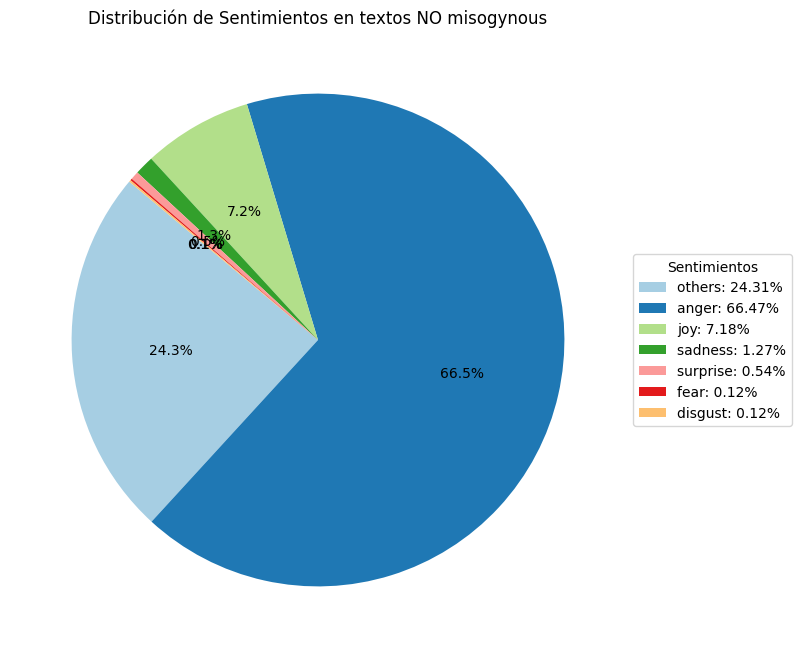

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(overall_emotion_percentages_not_misogynous.values(), startangle=140, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax.set_title("Distribución de Emociones en textos NO misogynous")
legend_labels = [f"{emotion}: {percentage:.2f}%" for emotion, percentage in overall_emotion_percentages_not_misogynous.items()]
ax.legend(wedges, legend_labels, title="Emociones", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [49]:
print("\nEjemplos de cada tipo de emoción en textos NO misogynous:")
for sent_type, example in examples_per_emotion_not_misogynous.items():
    print(f"{sent_type}: {example}\n")


Ejemplos de cada tipo de sentimiento en textos NO misogynous:
others: ["Módulo 01 Invitados Directivos del Sindicato 'Mariano Otero' Tema: 'Mobbing o Acoso Laboral y Violacion a... https://t.co/xyHv9Inct3", "NINGUNA MUJER ES 'PUTA' ❗❗❗ https://t.co/cV0CQM5RIg", '@ShimaTrek dijo que el acoso no es tan grave porque al menos no es violación ?????', '@dsilvao Más que seguro que muchos nacieron producto de acoso y hasta violación 😒. Personalmente, nunca he tenido problemas para conquistar sin recurrir a la intimidación.', '@Wachit0 @100Akshat @_Midoriyaa_ @NeohSJ La idea está la polla con cebolla pero obviamente no todos van a entrar por desconfianza, pero entrarán los que quieran ir y tengan confianza', 'le dije a mi mamá que extrañaba a un pibito y me tiró los pelos jajajajajajajjaja enseñandome como en los viejos tiempos perra', '@Dlagox no sabes cuanto', '@SamuSG_ pues comemela', '+¿Es que solo sabes subir historias de tu perra? -¿Es que hay algo más que merezca la pena?', 'Me maman es

-----------------------------------------------

### Comparación entre todos los tweets, tweets misogynous y no misogynous

-----------------------------------------------


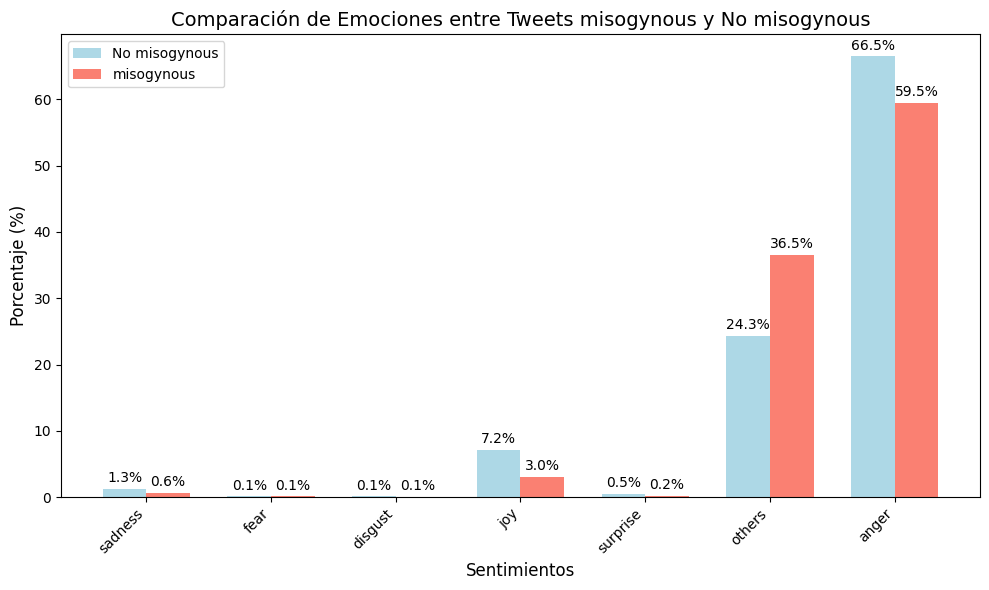

In [50]:
all_emotions = list(set(overall_emotion_percentages_not_misogynous.keys()).union(set(overall_emotion_percentages_misogynous.keys())))

not_misogynous_percentages = [overall_emotion_percentages_not_misogynous.get(emot, 0) for emot in all_emotions]
misogynous_percentages = [overall_emotion_percentages_misogynous.get(emot, 0) for emot in all_emotions]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(all_emotions))

bar1 = ax.bar(index - bar_width/2, not_misogynous_percentages, bar_width, label='Not misogynous', color='lightblue')
bar2 = ax.bar(index + bar_width/2, misogynous_percentages, bar_width, label='Misogynous', color='salmon')

for i, v in enumerate(not_misogynous_percentages):
  ax.text(index[i] - bar_width/2, v + 0.15, f'{v:.1f}', ha='center', fontsize=11, color='black')
for i, v in enumerate(misogynous_percentages):
  ax.text(index[i] + bar_width/2, v + 0.15, f'{v:.1f}', ha='center', fontsize=11, color='black')

ax.set_xlabel('Emotion Types', fontsize=18)
ax.set_ylabel('Percentage (%)', fontsize=18)
ax.set_title('Comparison of Emotion Types Percentages (Misogynous vs Not misogynous)', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(all_emotions, rotation=45, ha='right', fontsize=15)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()